In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import io

In [2]:
whole = pd.read_csv('~/OneDrive/Jupyter/Github/df_Parameter-set.csv', index_col=0)
whole.shape

(239, 45)

In [3]:
whole.head(10)

,index,Sequence,Amyloid,s1,p1,v1,h1,i1,a1,b1,...,i5,a5,b5,s6,p6,v6,h6,i6,a6,b6
0,0,AAELRN,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,1.000000,0.793103,0.294118,0.381862,0.317073,0.365099,0.125767,0.458280,0.275862,0.205882
1,1,AARRFF,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.349166,0.586207,0.676471,0.701671,0.707317,0.728960,0.858896,0.349166,0.586207,0.676471
2,2,AEKLFD,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.349166,0.586207,0.676471,0.381862,0.268293,0.344059,0.073620,0.000000,0.413793,0.147059
3,3,AEMEYL,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.347882,0.413793,0.764706,0.618138,0.463415,0.495050,0.831288,0.396662,0.896552,0.470588
4,4,AENGKS,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.903723,0.655172,0.352941,0.312649,0.146341,0.198020,0.297546,0.353017,0.241379,0.382353
5,5,AEVLAL,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.405648,1.000000,0.235294,0.618138,0.463415,0.495050,0.831288,0.396662,0.896552,0.470588
6,6,AGVNYF,1,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.347882,0.413793,0.764706,0.701671,0.707317,0.728960,0.858896,0.349166,0.586207,0.676471
7,7,AINKIQ,0,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.396662,0.586207,0.882353,0.372315,0.439024,0.488861,0.242331,0.346598,0.793103,0.294118
8,8,ALEEYT,1,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.347882,0.413793,0.764706,0.723150,0.268293,0.321782,0.389571,0.340180,0.275862,0.617647
9,9,AQFIIS,1,0.305489,0.121951,0.123762,0.404908,0.405648,1.0,0.235294,...,0.396662,0.586207,0.882353,0.312649,0.146341,0.198020,0.297546,0.353017,0.241379,0.382353


In [4]:
whole=whole.round(2) # Put the decimal point in 2 digit
whole_zero=whole[whole["Amyloid"]==0].reset_index()#.drop("index",axis=1)
whole_one=whole[whole["Amyloid"]==1].reset_index()

In [5]:
whole_zero.head(10)

,level_0,index,Sequence,Amyloid,s1,p1,v1,h1,i1,a1,...,i5,a5,b5,s6,p6,v6,h6,i6,a6,b6
0,0,0,AAELRN,0,0.31,0.12,0.12,0.40,0.41,1.00,...,1.00,0.79,0.29,0.38,0.32,0.37,0.13,0.46,0.28,0.21
1,1,1,AARRFF,0,0.31,0.12,0.12,0.40,0.41,1.00,...,0.35,0.59,0.68,0.70,0.71,0.73,0.86,0.35,0.59,0.68
2,2,2,AEKLFD,0,0.31,0.12,0.12,0.40,0.41,1.00,...,0.35,0.59,0.68,0.38,0.27,0.34,0.07,0.00,0.41,0.15
3,3,3,AEMEYL,0,0.31,0.12,0.12,0.40,0.41,1.00,...,0.35,0.41,0.76,0.62,0.46,0.50,0.83,0.40,0.90,0.47
4,4,4,AENGKS,0,0.31,0.12,0.12,0.40,0.41,1.00,...,0.90,0.66,0.35,0.31,0.15,0.20,0.30,0.35,0.24,0.38
5,5,5,AEVLAL,0,0.31,0.12,0.12,0.40,0.41,1.00,...,0.41,1.00,0.24,0.62,0.46,0.50,0.83,0.40,0.90,0.47
6,7,7,AINKIQ,0,0.31,0.12,0.12,0.40,0.41,1.00,...,0.40,0.59,0.88,0.37,0.44,0.49,0.24,0.35,0.79,0.29
7,12,12,DADLYL,0,0.38,0.27,0.34,0.07,0.00,0.41,...,0.35,0.41,0.76,0.62,0.46,0.50,0.83,0.40,0.90,0.47
8,13,13,DAVKIS,0,0.38,0.27,0.34,0.07,0.00,0.41,...,0.40,0.59,0.88,0.31,0.15,0.20,0.30,0.35,0.24,0.38
9,15,15,DDSLFF,0,0.38,0.27,0.34,0.07,0.00,0.41,...,0.35,0.59,0.68,0.70,0.71,0.73,0.86,0.35,0.59,0.68


Sequence was settled on the x-axis from 1st position to 6th position and 6 parameters of s, p, v, h, i, a were settled on the y-axis. 
Matrix files (.csv) were saved on the Zero or One folder.

In [6]:
dir_path='Zero'
os.makedirs(dir_path)

FIRST=[1,0,0,0,0,0]
SECOND=[0,1,0,0,0,0]
THIRD=[0,0,1,0,0,0]
FOURTH=[0,0,0,1,0,0]
FIFTH=[0,0,0,0,1,0]
SIXTH=[0,0,0,0,0,1]
FIRSTdf=pd.DataFrame(FIRST)
SECONDdf=pd.DataFrame(SECOND)
THIRDdf=pd.DataFrame(THIRD)
FOURTHdf=pd.DataFrame(FOURTH)
FIFTHdf=pd.DataFrame(FIFTH)
SIXTHdf=pd.DataFrame(SIXTH)


number=137
for i in range(number):
    
    FIRSTp=whole_zero.loc[i,["s1","s2","s3","s4","s5","s6"]]
    SECONDp=whole_zero.loc[i,["s2","p2","h2","i2","a2","b2"]]
    THIRDp=whole_zero.loc[i,["s3","p3","h3","i3","a3","b3"]]
    FOURTHp=whole_zero.loc[i,["s4","p4","h4","i4","a4","b4"]]
    FIFTHp=whole_zero.loc[i,["s5","p5","h5","i5","a5","b5"]]
    SIXTHp=whole_zero.loc[i,["s6","p6","h6","i6","a6","b6"]]

    FIRSTp_df=pd.DataFrame(FIRSTp).T
    SECONDp_df=pd.DataFrame(SECONDp).T
    THIRDp_df=pd.DataFrame(THIRDp).T
    FOURTHp_df=pd.DataFrame(FOURTHp).T
    FIFTHp_df=pd.DataFrame(FIFTHp).T
    SIXTHp_df=pd.DataFrame(SIXTHp).T

    A=np.dot(FIRSTdf,FIRSTp_df)
    B=np.dot(SECONDdf,SECONDp_df)
    C=np.dot(THIRDdf,THIRDp_df)
    D=np.dot(FOURTHdf,FOURTHp_df)
    E=np.dot(FIFTHdf,FIFTHp_df)
    F=np.dot(SIXTHdf,SIXTHp_df)
    
    X=A+B+C+D+E+F
    print(X)
    
    np.savetxt('C:/Users/user/OneDrive/Jupyter/Github/Zero/matrix_Zero_{}.csv'.format(i), X, delimiter=',', fmt='%.2f')

[[0.31 0.31 0.37 0.62 0.56 0.38]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.38 0.32 0.13 0.46 0.28 0.21]]
[[0.31 0.31 0.56 0.56 0.7 0.7]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[0.31 0.37 0.45 0.62 0.7 0.38]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.45 0.54 0.01 0.9 0.66 0.35]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.38 0.27 0.07 0.0 0.41 0.15]]
[[0.31 0.37 0.56 0.37 0.7 0.62]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.56 0.54 0.69 0.35 0.86 0.5]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.62 0.46 0.83 0.4 0.9 0.47]]
[[0.31 0.37 0.38 0.0 0.45 0.31]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.45 0.54 0.01 0.9 0.66 0.35]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.31 0.37 0.88 0.62 0.31 0.62]
 [0.37 0.37 0

[[0.45 0.72 0.88 1.0 1.0 0.72]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.45 0.72 0.88 1.0 0.88 0.37]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.45 0.72 0.88 1.0 0.7 0.37]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.45 0.72 0.88 0.62 1.0 0.37]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.45 0.88 0.37 0.71 0.31 0.38]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.71 0.56 0.35 0.61 0.48 0.44]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.38 0.27 0.07 0.0 0.41 0.15]]
[[0.45 0.77 0.38 0.56 0.38 0.56]
 [0.

[[0.7 0.62 0.37 1.0 1.0 1.0]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]]
[[0.7 0.37 0.62 0.37 0.38 0.7]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]]
[[0.7 0.72 0.7 0.72 1.0 0.31]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.7 0.88 0.31 0.0 0.7 0.71]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.71 0.56 0.35 0.61 0.48 0.44]]
[[0.7 0.7 0.72 0.37 0.7 0.72]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.31 0.31 0.37 0.62 0.56 0.38]
 [0.31 0.12 0.4 0

In [7]:
dir_path='One'
os.makedirs(dir_path)

FIRST=[1,0,0,0,0,0]
SECOND=[0,1,0,0,0,0]
THIRD=[0,0,1,0,0,0]
FOURTH=[0,0,0,1,0,0]
FIFTH=[0,0,0,0,1,0]
SIXTH=[0,0,0,0,0,1]
FIRSTdf=pd.DataFrame(FIRST)
SECONDdf=pd.DataFrame(SECOND)
THIRDdf=pd.DataFrame(THIRD)
FOURTHdf=pd.DataFrame(FOURTH)
FIFTHdf=pd.DataFrame(FIFTH)
SIXTHdf=pd.DataFrame(SIXTH)

number=102
for i in range(number):
    
    FIRSTp=whole_one.loc[i,["s1","p1","h1","i1","a1","b1"]]
    SECONDp=whole_one.loc[i,["s2","p2","h2","i2","a2","b2"]]
    THIRDp=whole_one.loc[i,["s3","p3","h3","i3","a3","b3"]]
    FOURTHp=whole_one.loc[i,["s4","p4","h4","i4","a4","b4"]]
    FIFTHp=whole_one.loc[i,["s5","p5","h5","i5","a5","b5"]]
    SIXTHp=whole_one.loc[i,["s6","p6","h6","i6","a6","b6"]]

    FIRSTp_df=pd.DataFrame(FIRSTp).T
    SECONDp_df=pd.DataFrame(SECONDp).T
    THIRDp_df=pd.DataFrame(THIRDp).T
    FOURTHp_df=pd.DataFrame(FOURTHp).T
    FIFTHp_df=pd.DataFrame(FIFTHp).T
    SIXTHp_df=pd.DataFrame(SIXTHp).T

    A=np.dot(FIRSTdf,FIRSTp_df)
    B=np.dot(SECONDdf,SECONDp_df)
    C=np.dot(THIRDdf,THIRDp_df)
    D=np.dot(FOURTHdf,FOURTHp_df)
    E=np.dot(FIFTHdf,FIFTHp_df)
    F=np.dot(SIXTHdf,SIXTHp_df)
    
    X=A+B+C+D+E+F
    print(X)
    
    np.savetxt('C:/Users/user/OneDrive/Jupyter/Github/One/matrix_One_{}.csv'.format(i), X, delimiter=',', fmt='%.2f')

[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.38 0.27 0.07 0.0 0.41 0.15]
 [0.42 0.32 0.7

[[0.62 0.46 0.83 0.4 0.9 0.47]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.7 0.73 0.6 0.35 0.41 0.76]]
[[0.62 0.46 0.83 0.4 0.9 0.47]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]]
[[0.56 0.54 0.69 0.35 0.86 0.5]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.44 0.24 0.35 0.79 0.29]]
[[0.56 0.54 0.69 0.35 0.86 0.5]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.88 0.34 0.68 0.39 0.48 1.0]]
[[0.56 0.54 0.69 0.35 0.86 0.5]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.56 0.54 0.69 0.35 0.86 0.5]
 [0.88 0.34

Make the image file (.png) from matrix files (.csv) on Zero or One folder. 

C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_0.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_1.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_10.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_100.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_101.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_102.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_103.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_104.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_105.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_106.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_107.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_108.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_109.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_11.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_110.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_111.cs

C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_95.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_96.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_97.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_98.csv
C:/Users/user/OneDrive/Jupyter/Github/Zero\matrix_Zero_99.csv


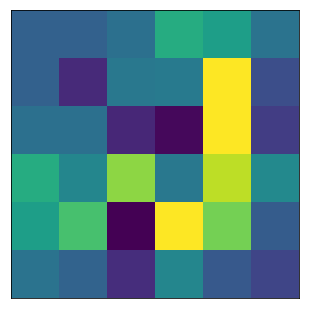

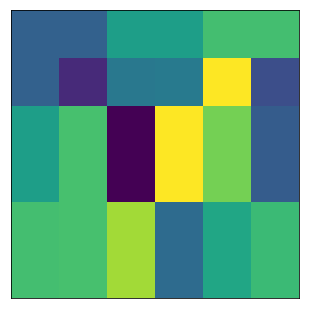

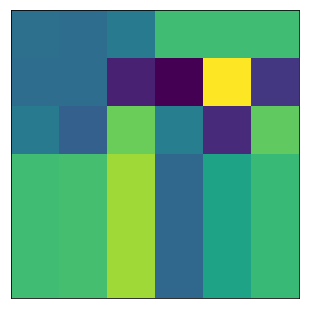

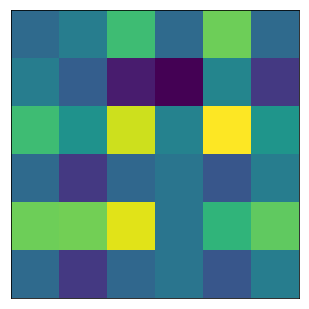

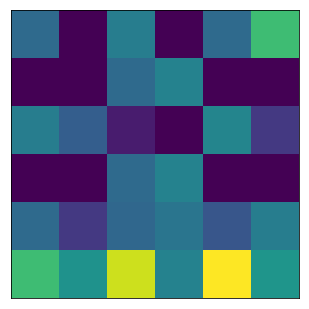

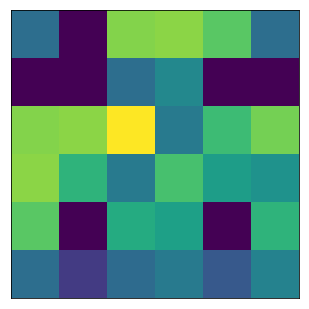

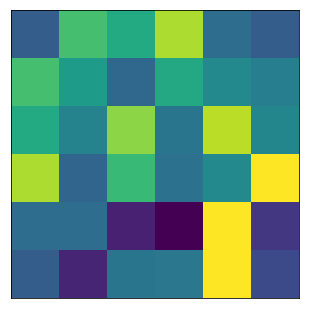

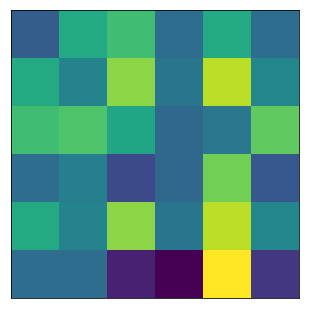

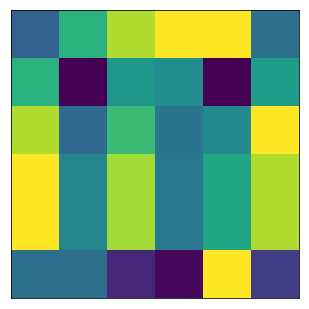

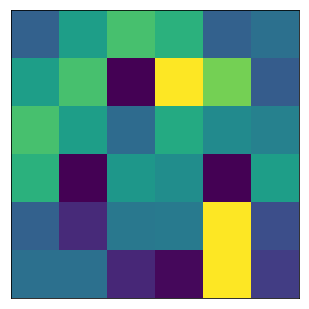

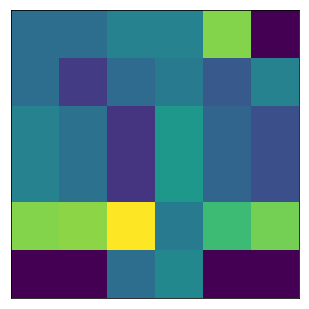

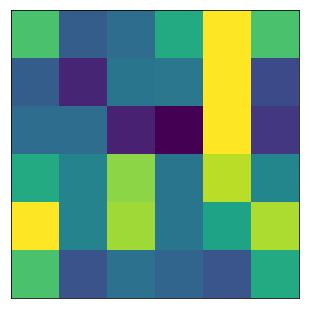

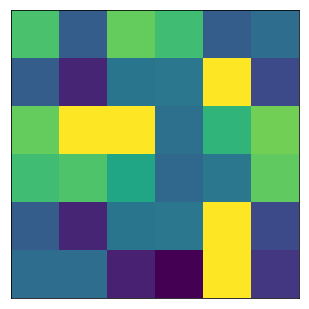

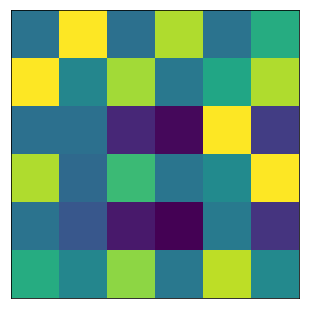

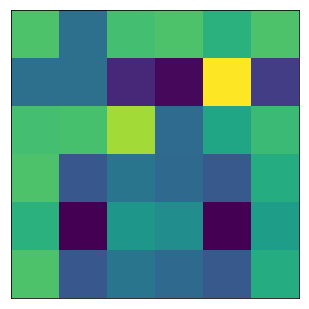

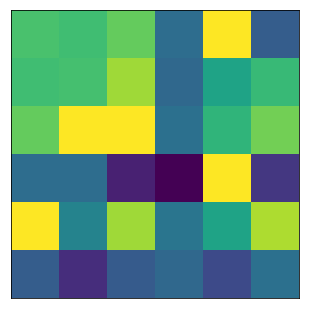

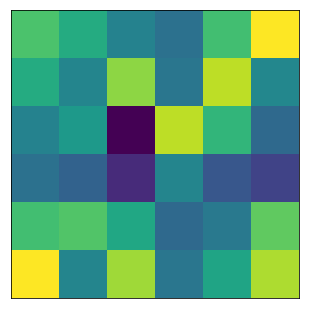

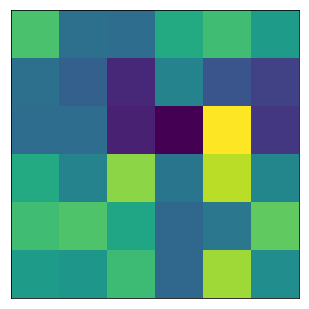

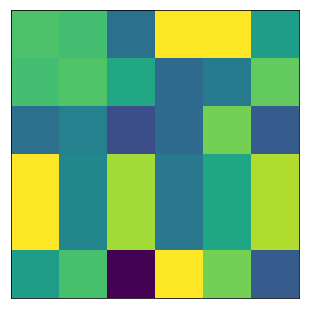

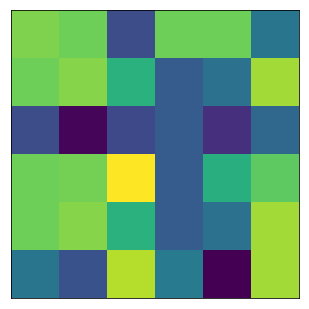

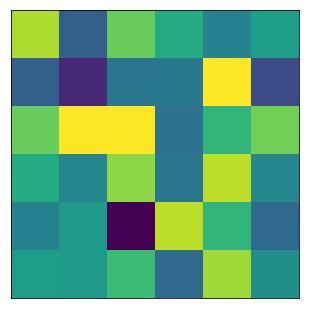

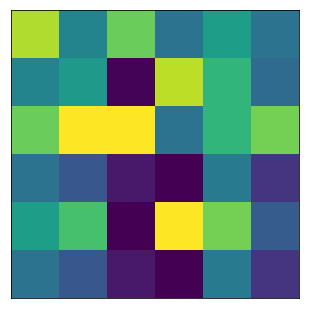

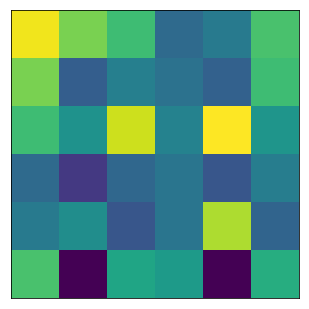

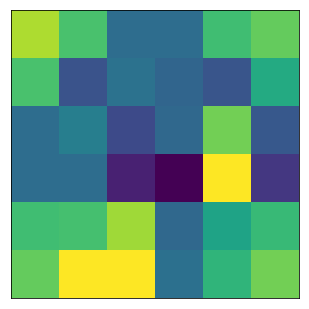

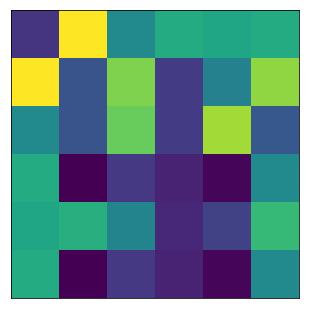

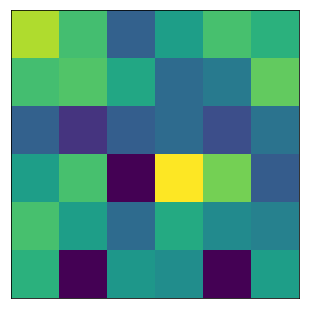

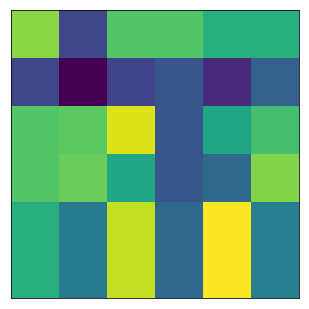

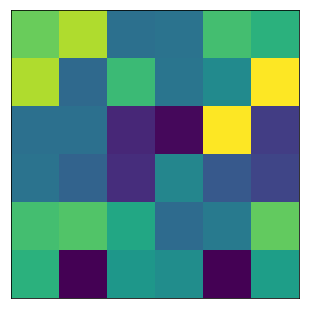

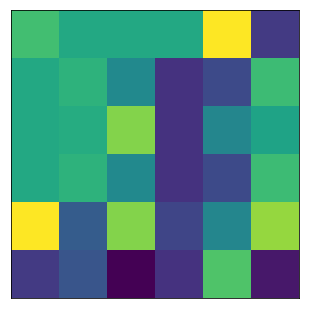

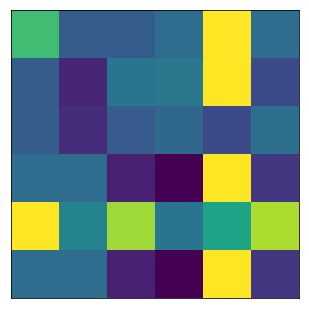

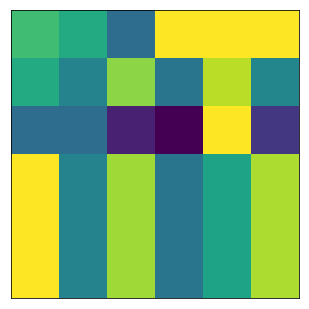

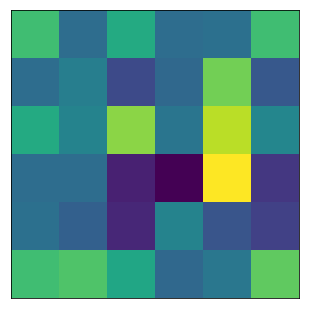

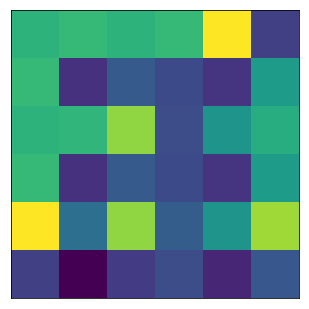

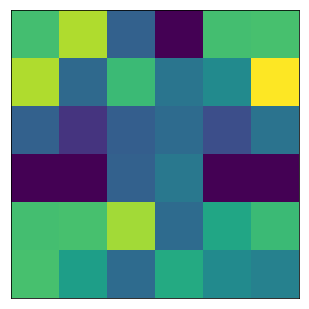

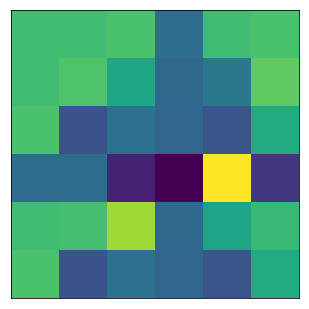

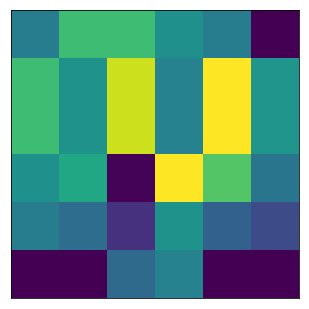

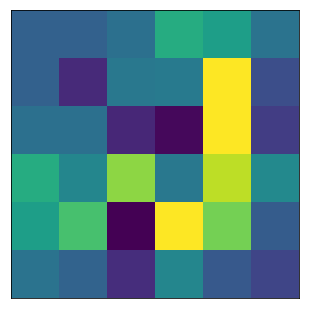

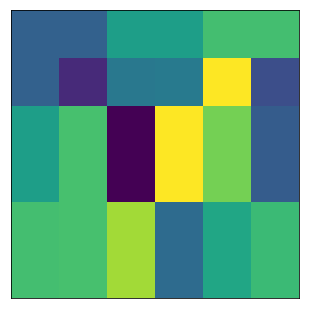

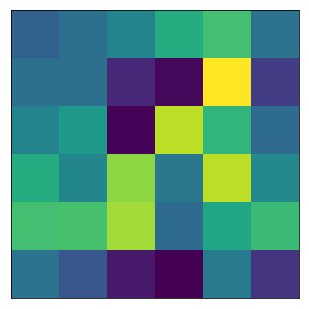

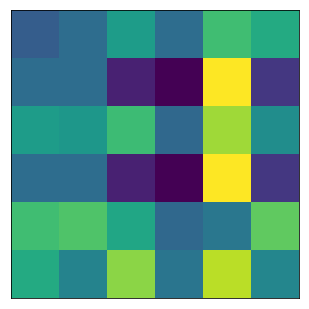

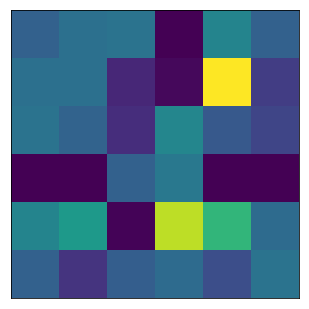

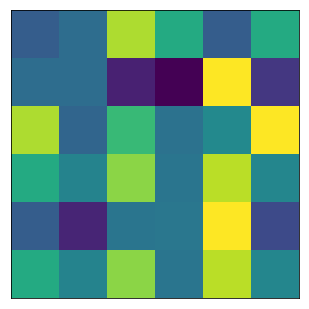

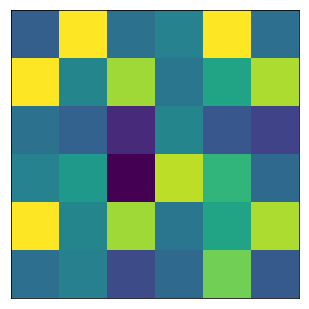

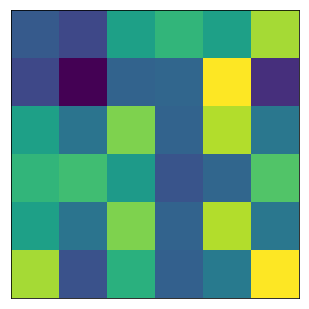

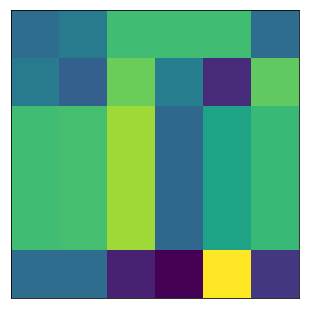

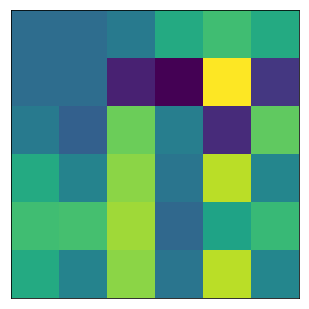

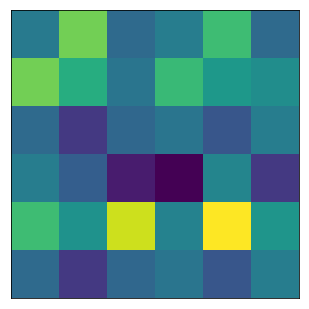

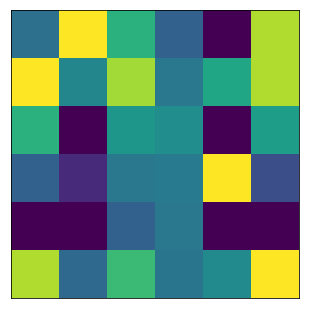

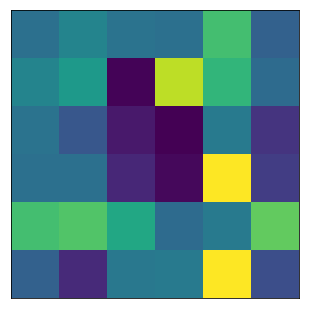

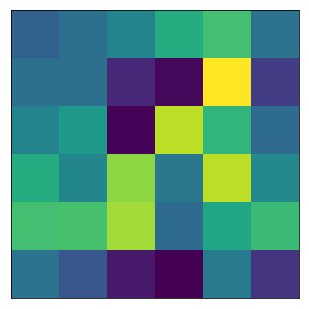

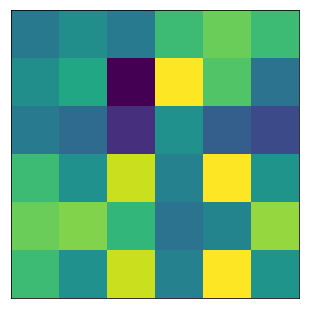

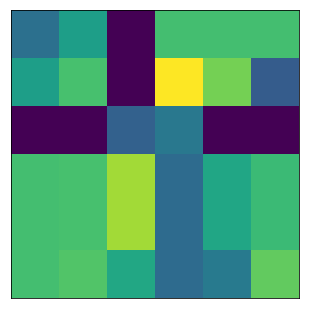

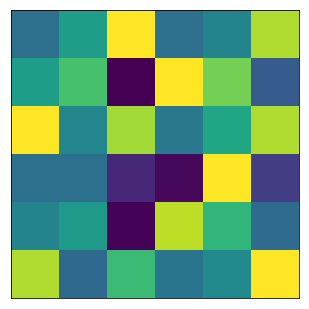

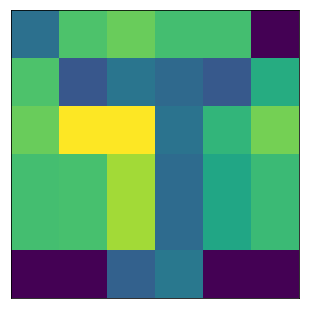

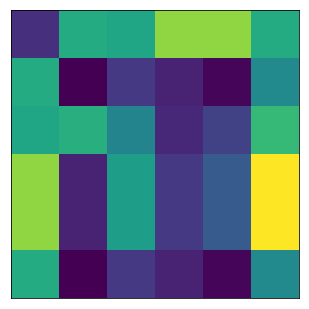

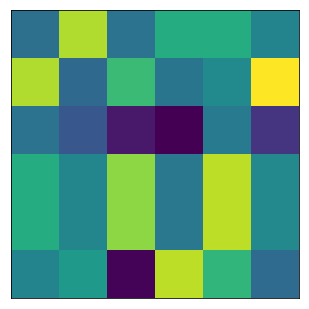

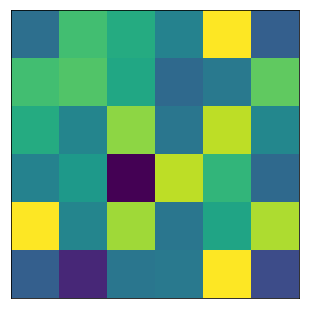

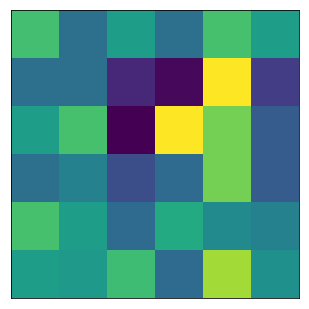

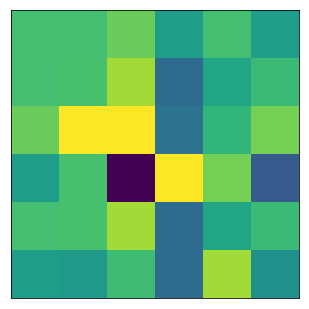

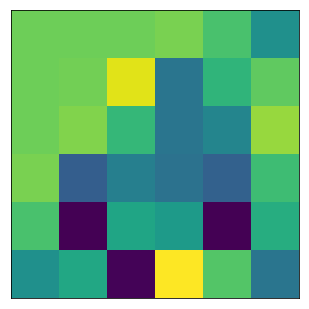

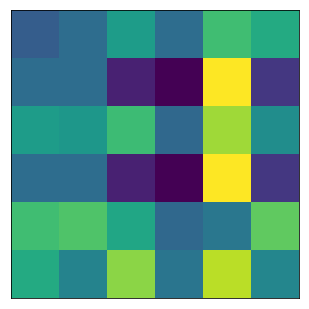

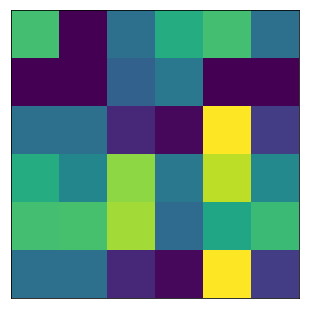

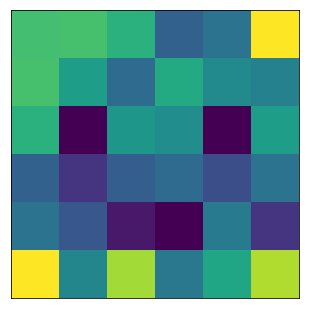

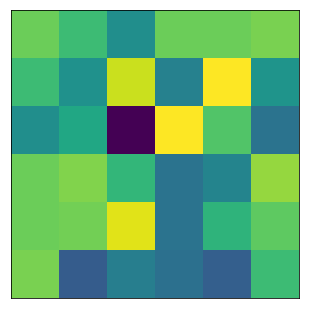

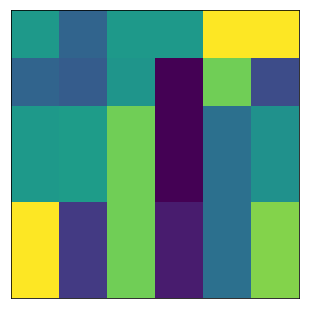

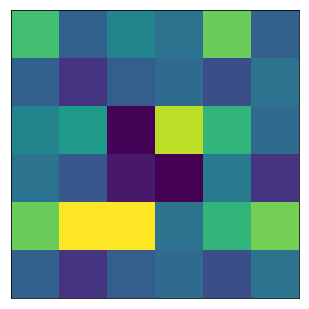

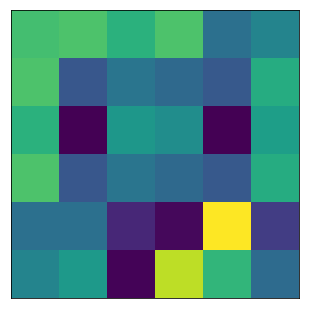

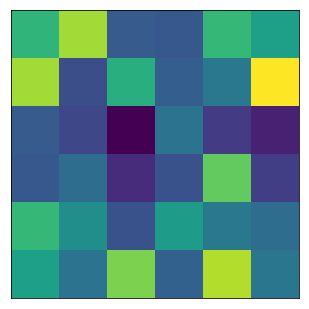

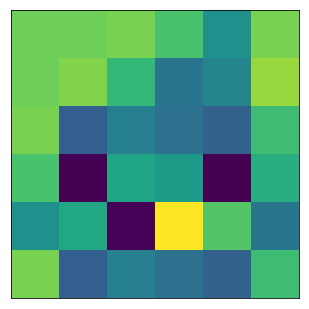

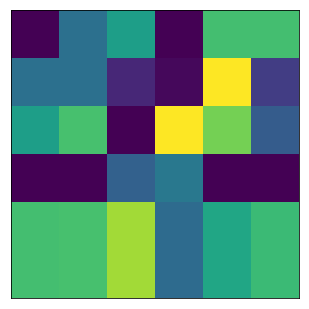

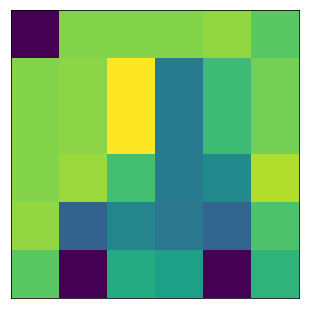

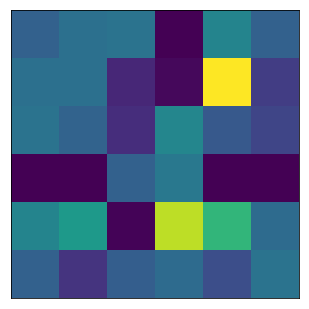

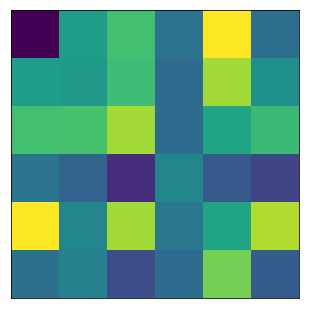

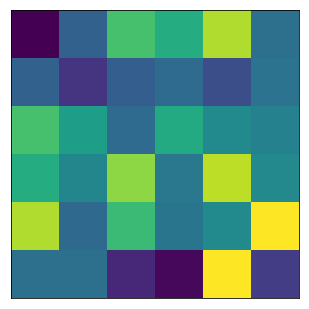

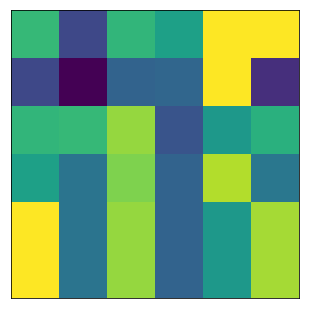

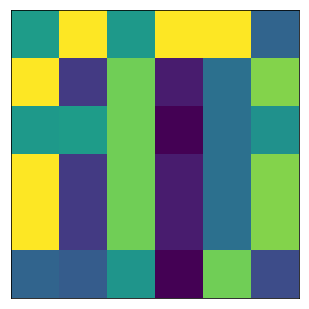

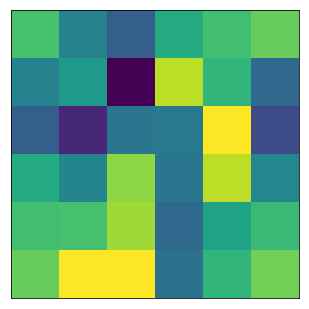

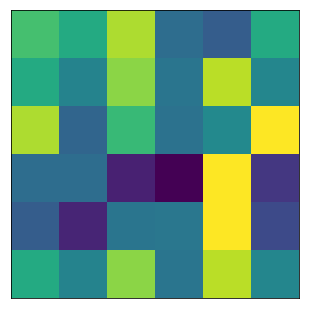

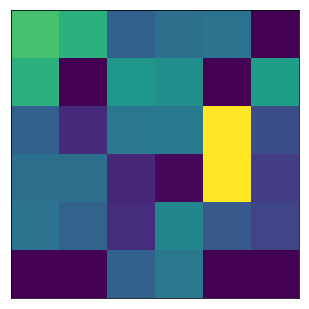

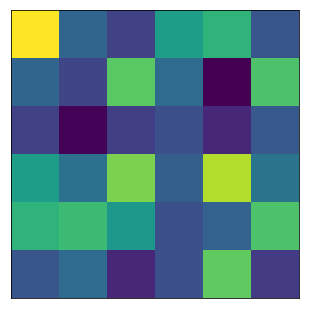

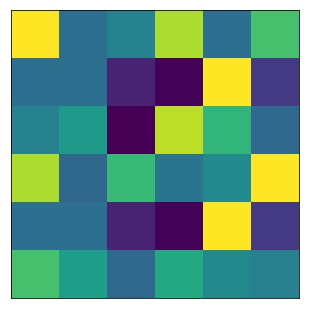

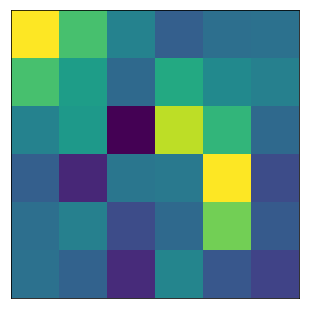

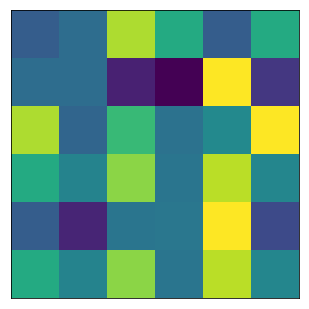

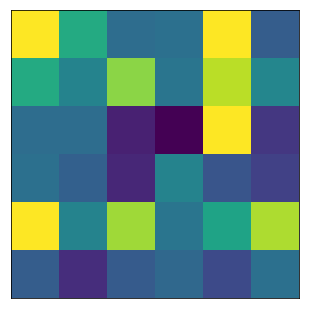

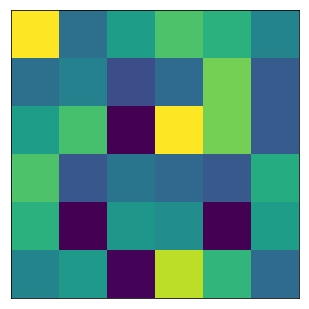

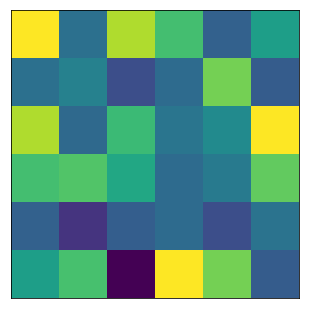

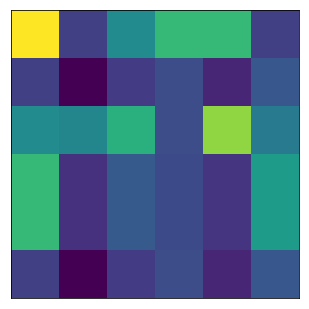

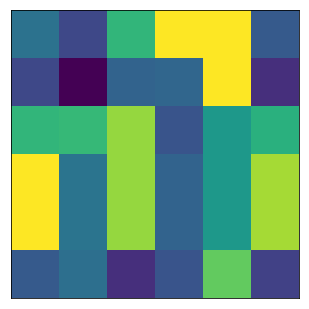

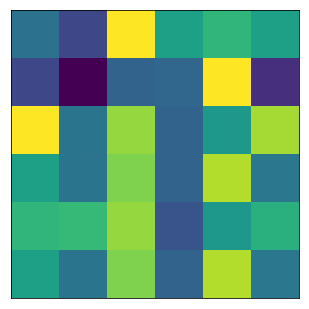

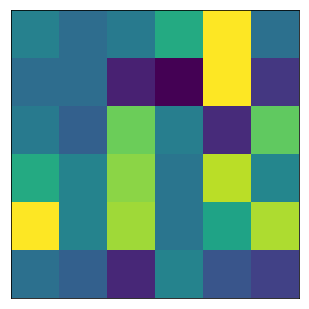

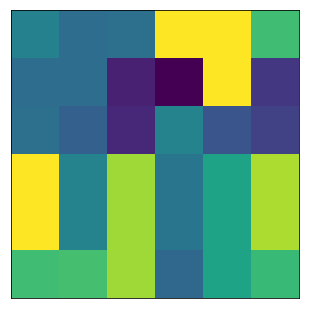

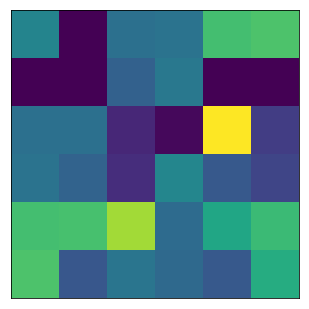

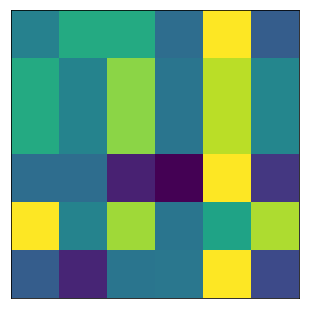

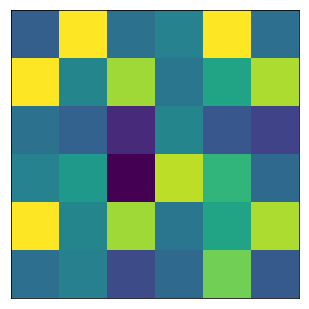

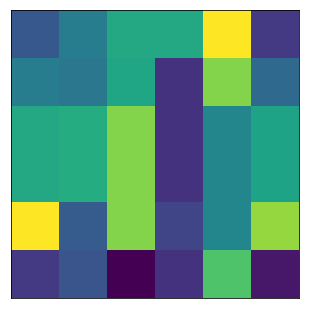

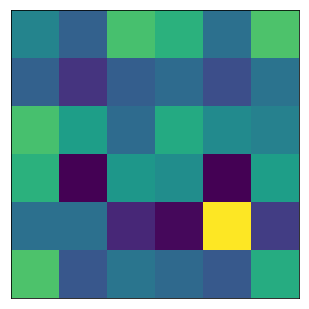

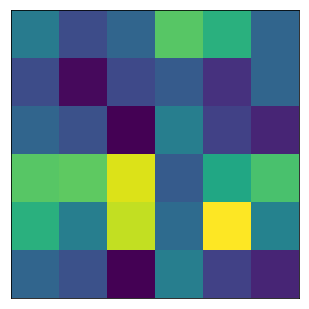

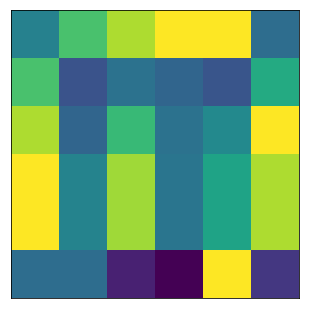

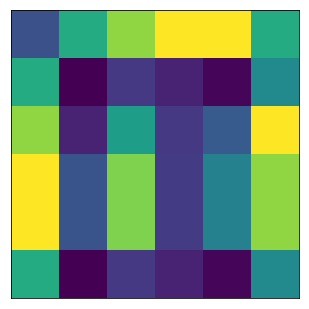

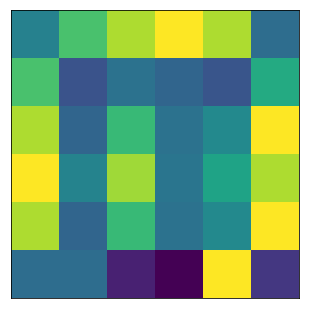

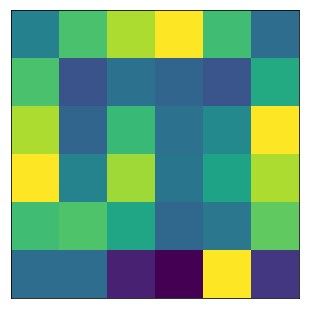

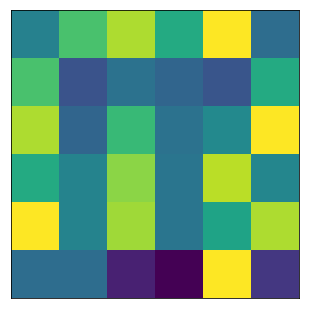

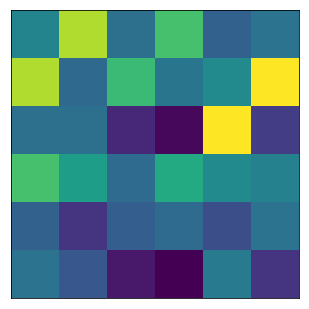

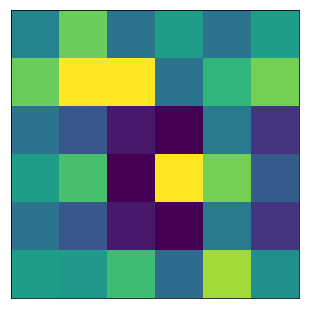

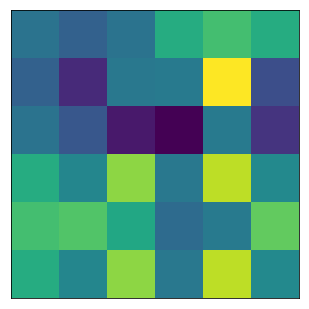

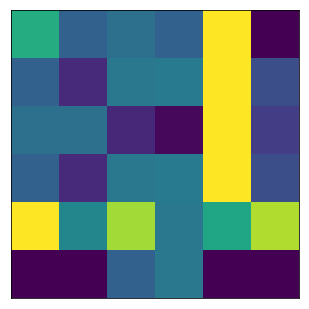

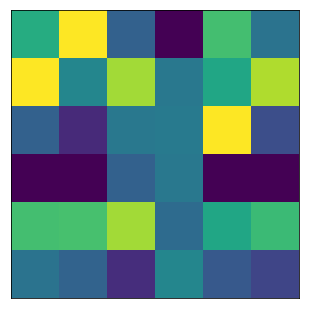

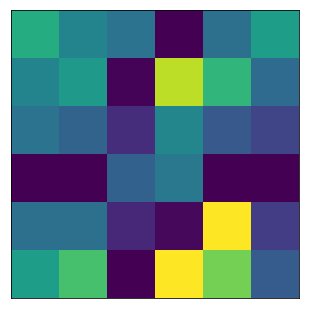

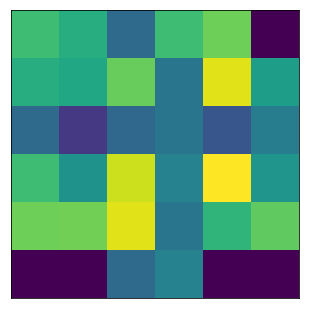

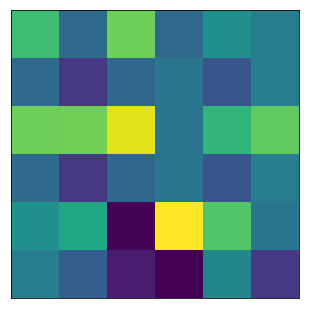

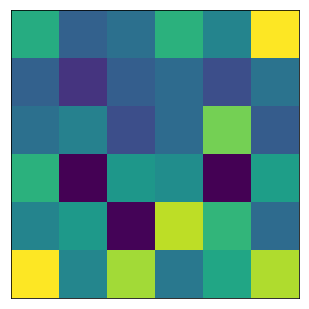

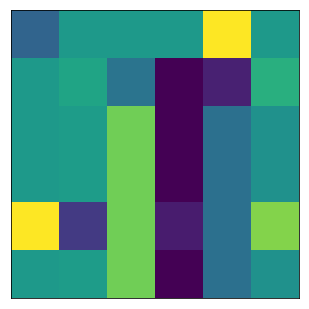

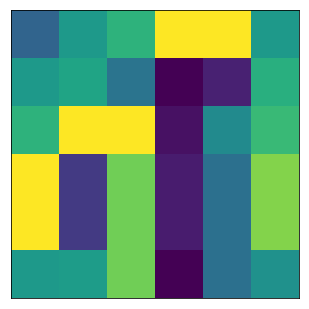

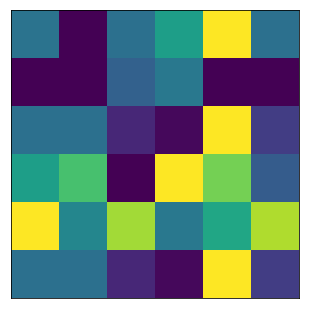

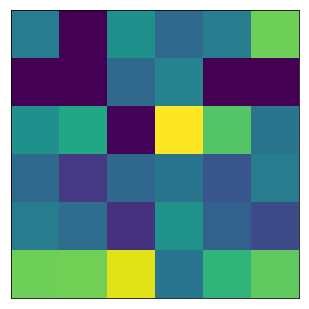

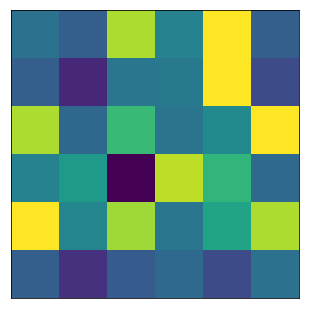

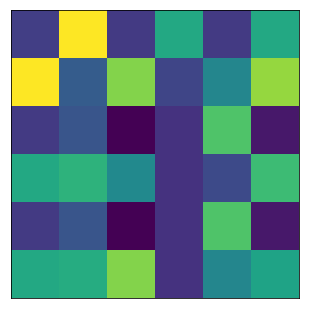

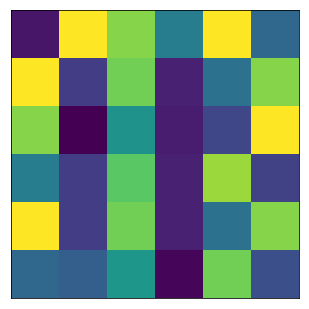

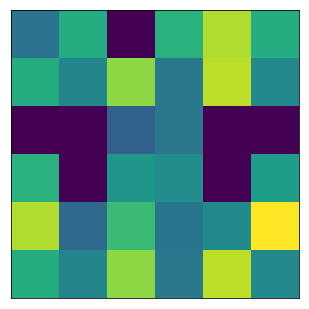

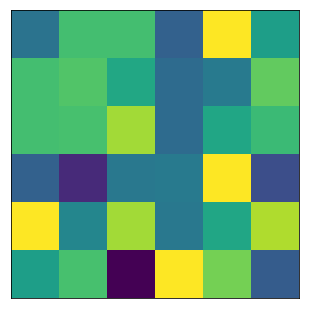

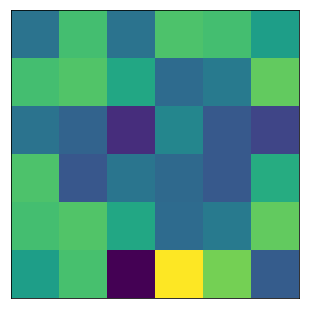

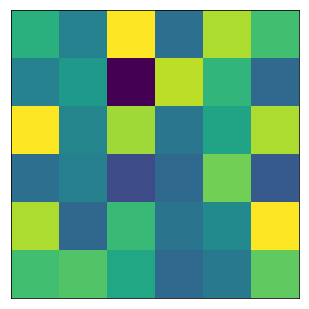

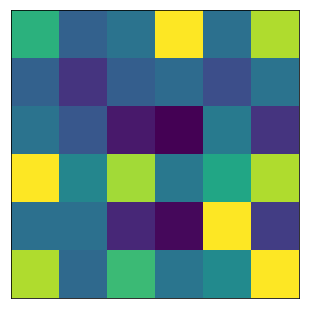

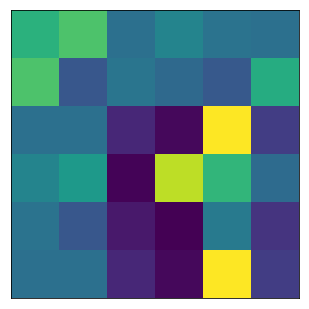

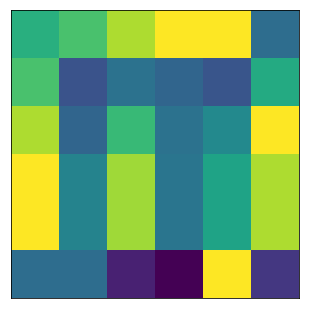

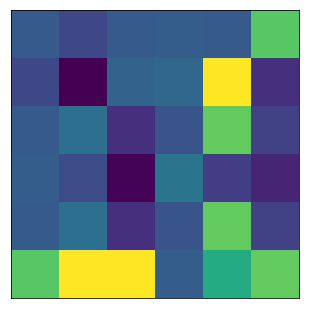

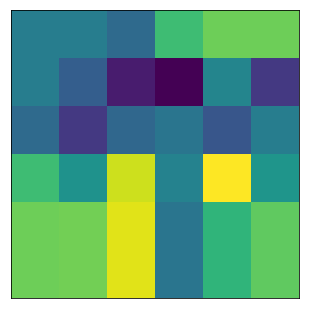

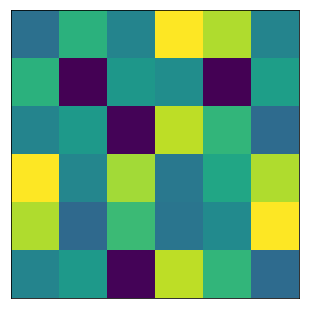

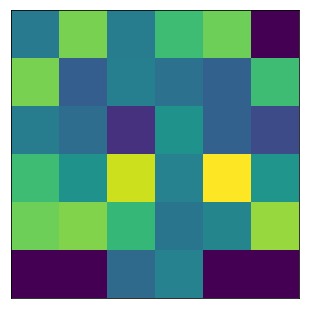

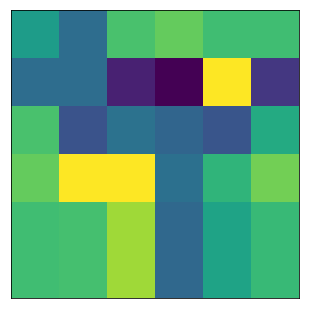

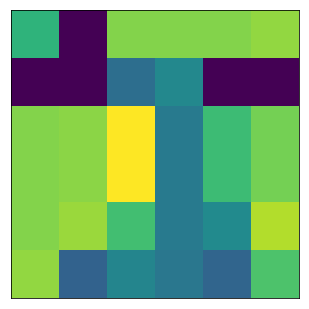

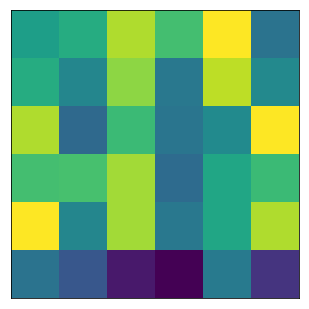

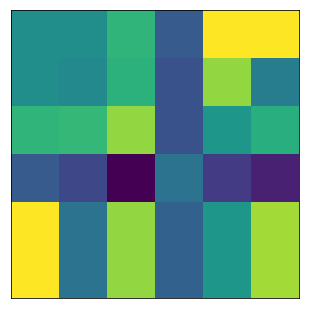

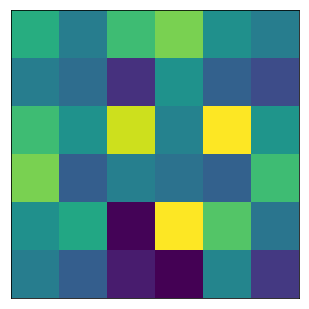

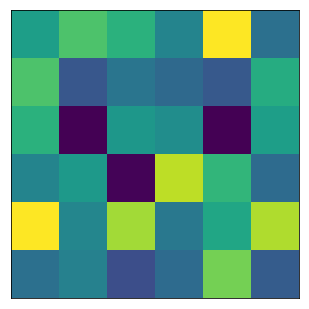

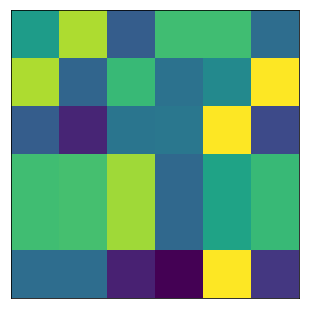

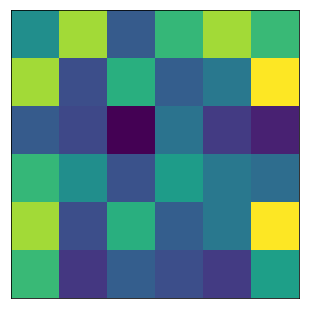

In [12]:
dir_path='Image/Whole'
os.makedirs(dir_path)

import os, glob
dir = 'C:/Users/user/OneDrive/Jupyter/Github/Zero/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x-line deletion
    ax.tick_params(labelleft="off",left="off") # y-line deletion
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(data)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_0.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_1.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_10.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_100.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_101.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_11.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_12.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_13.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_14.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_15.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_16.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_17.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_18.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_19.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_2.csv
C:/Users/user/OneDrive/Jupyter/Github/One\matrix_One_20.csv
C:/Users/user/OneDrive/Jupyter/Github/One

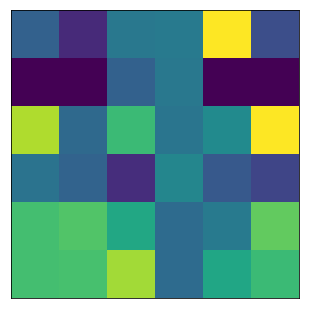

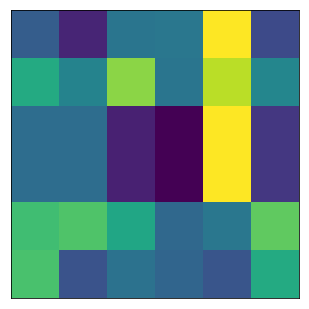

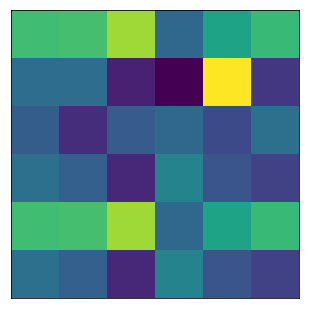

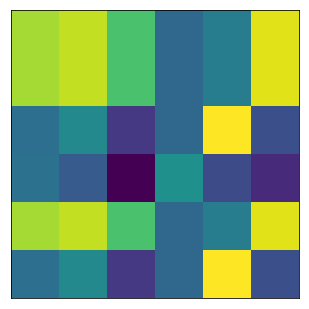

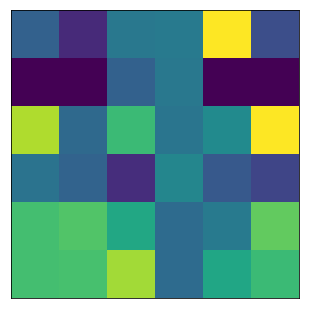

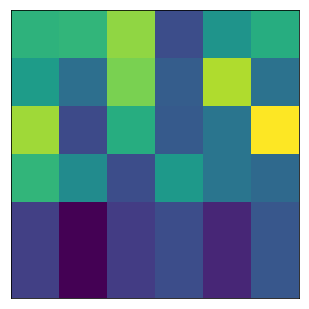

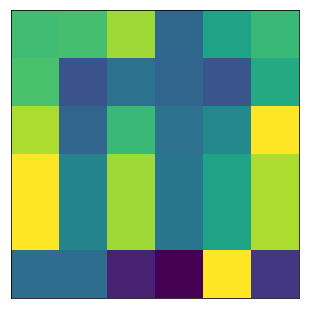

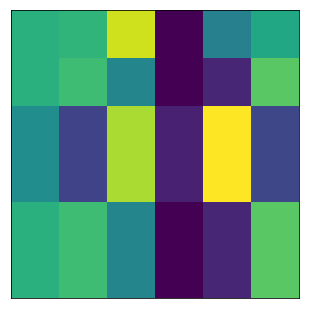

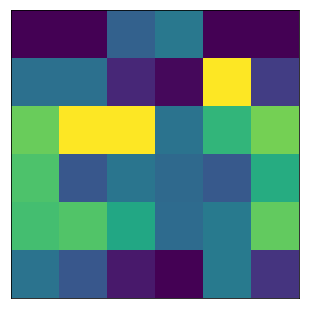

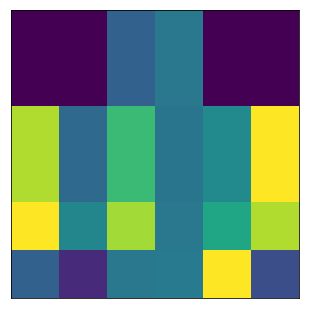

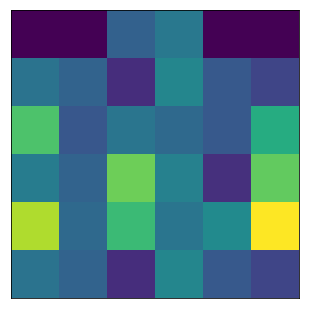

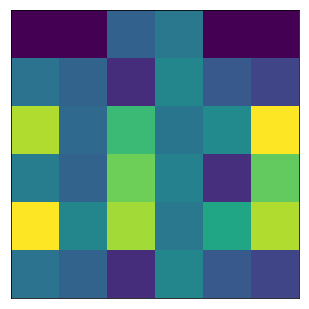

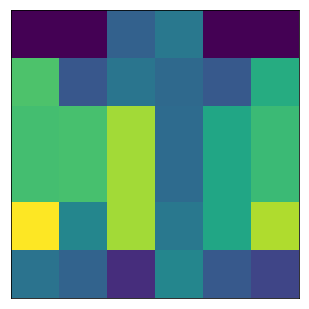

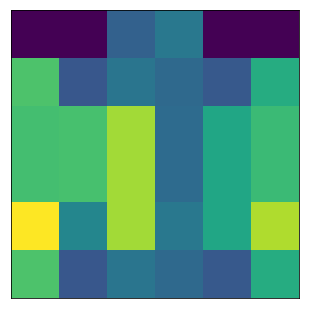

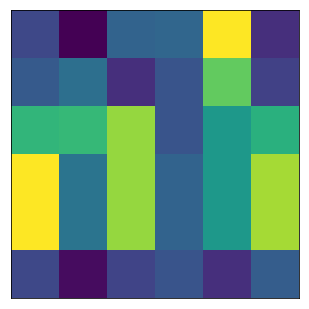

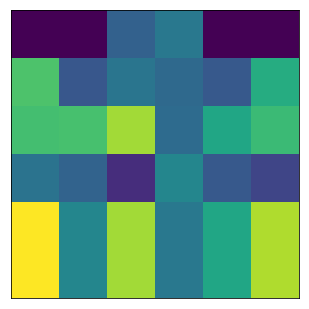

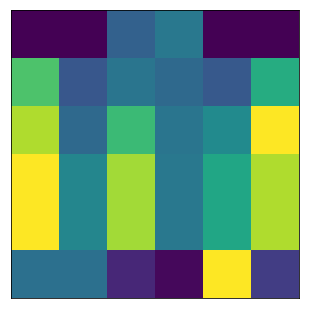

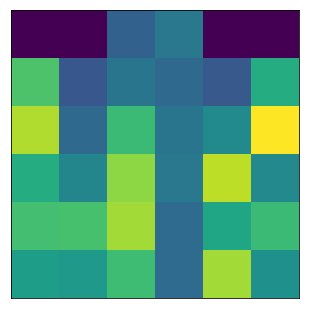

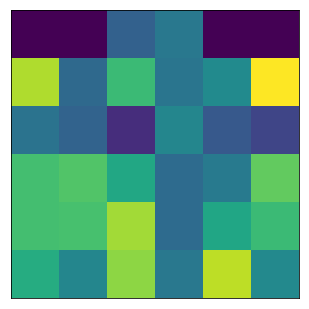

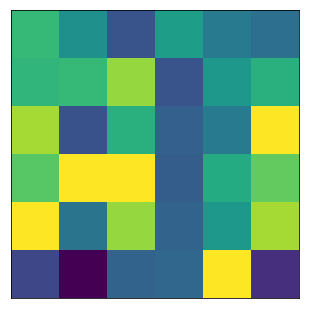

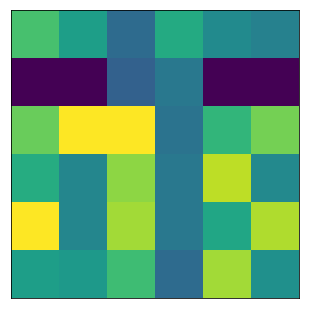

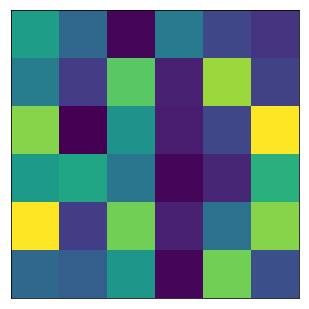

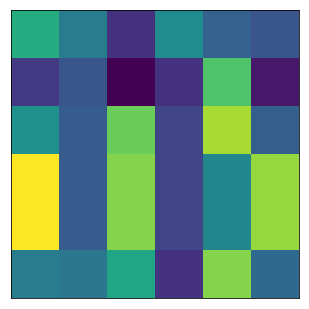

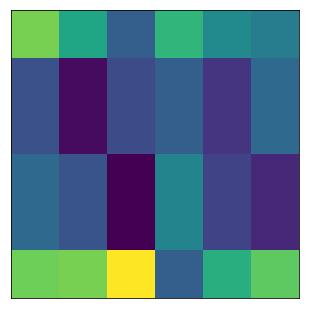

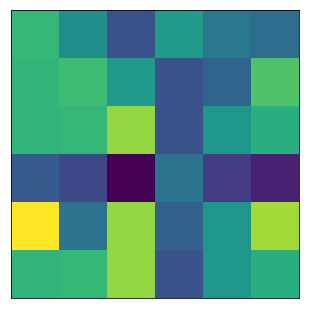

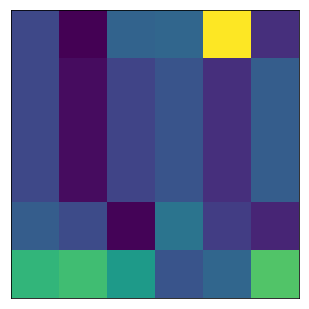

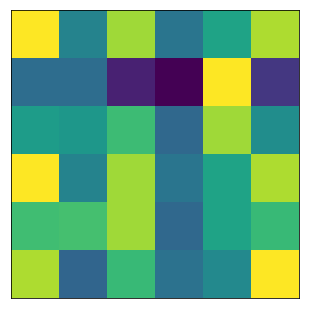

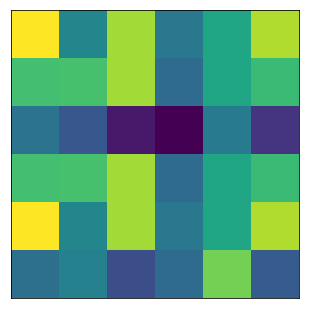

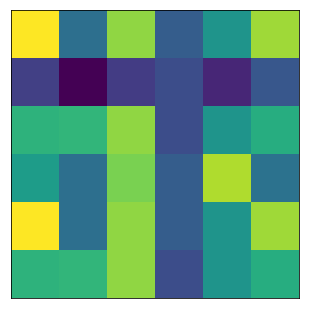

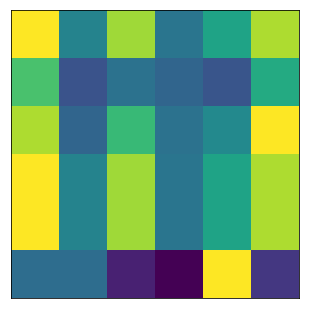

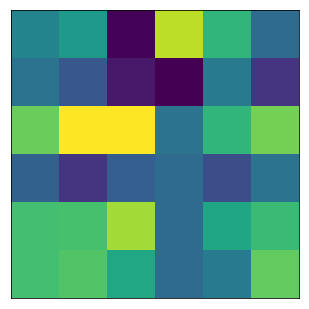

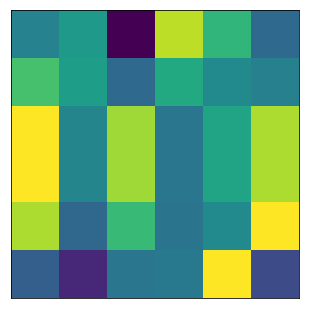

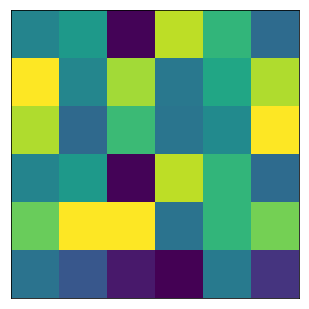

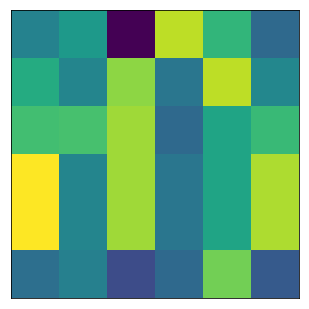

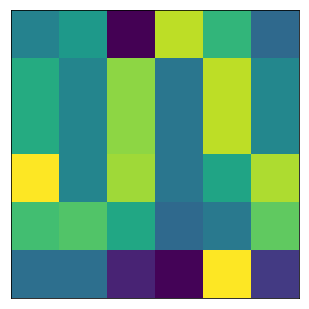

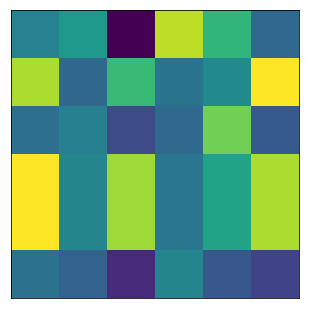

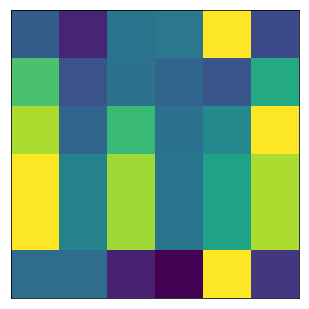

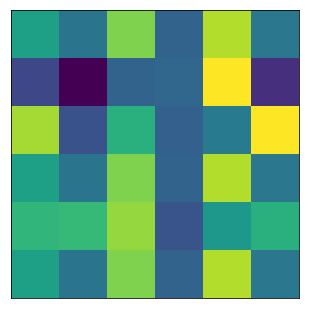

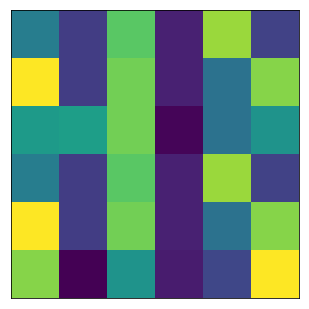

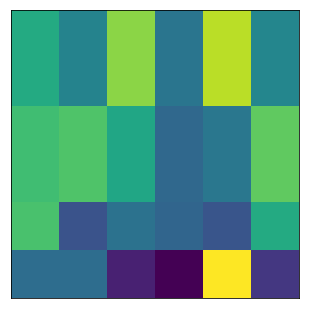

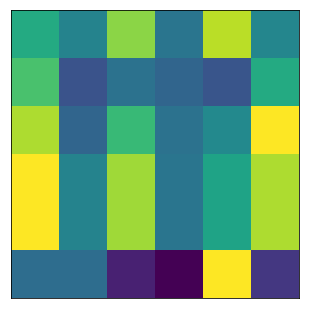

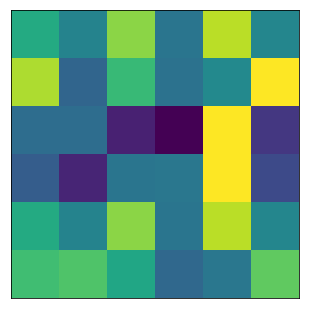

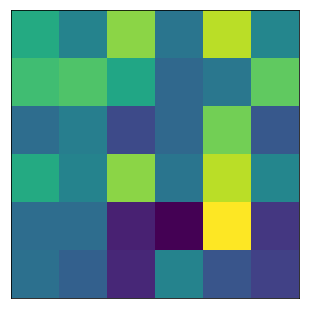

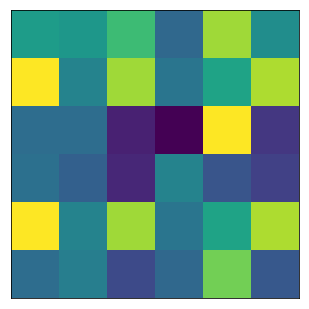

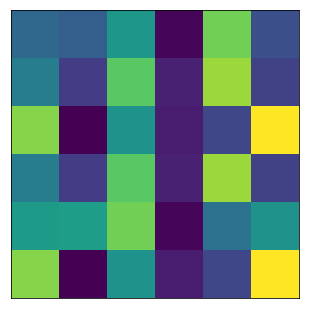

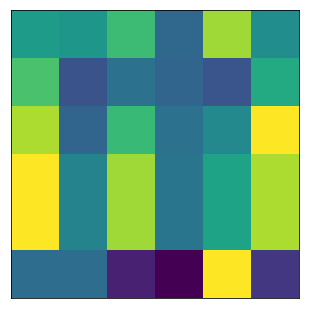

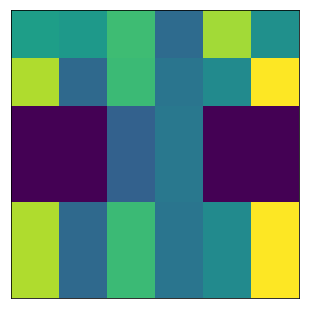

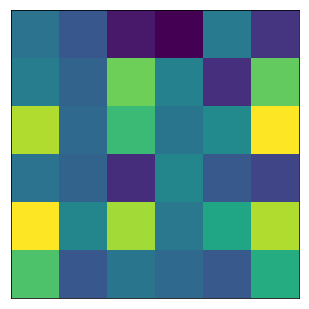

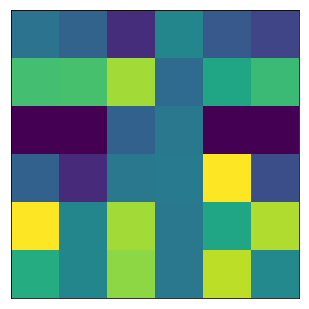

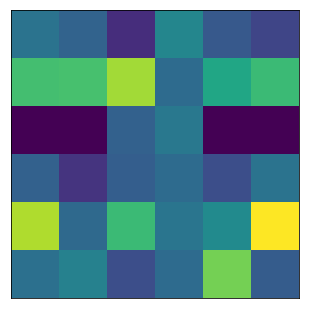

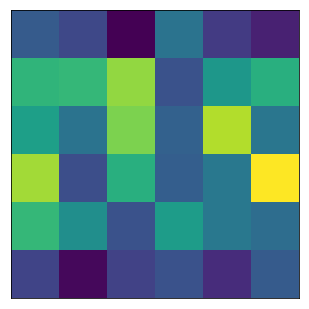

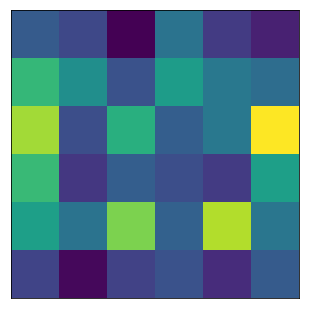

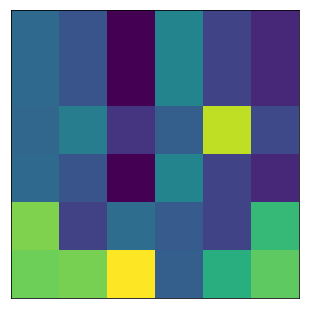

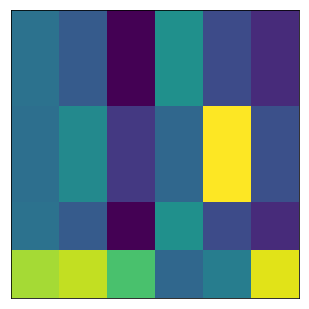

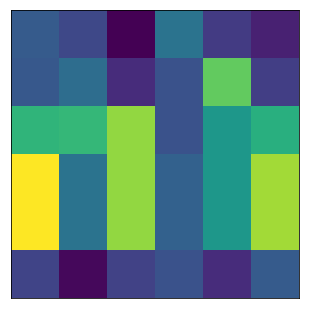

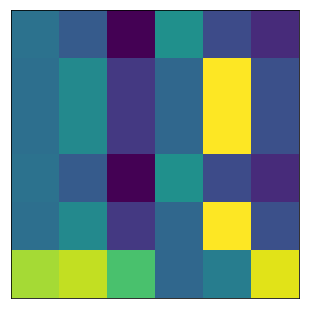

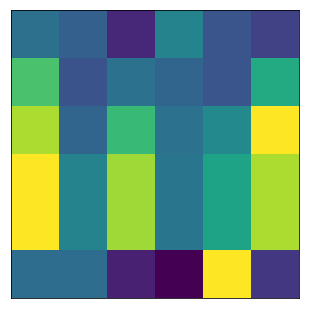

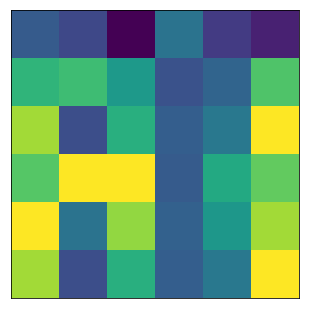

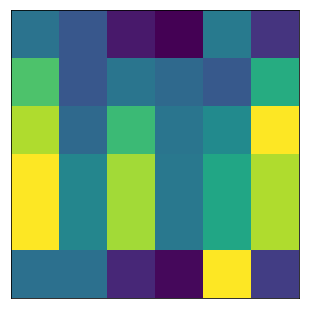

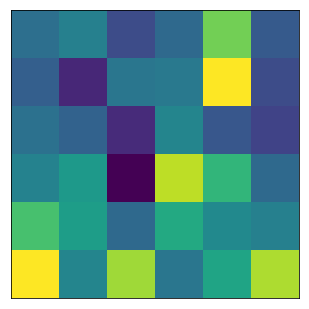

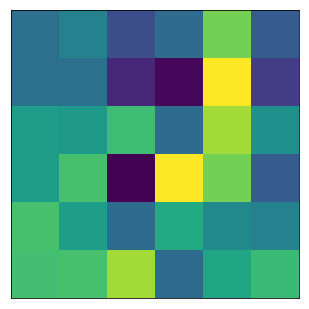

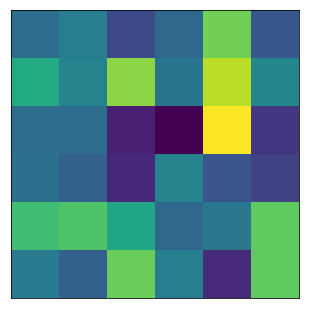

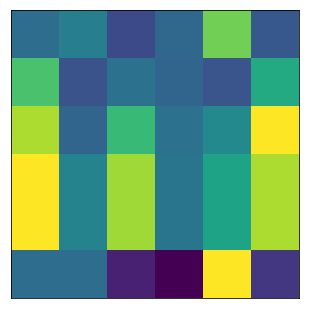

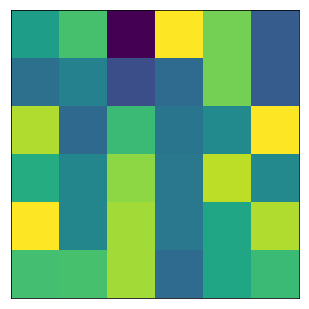

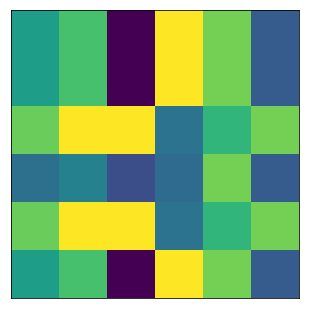

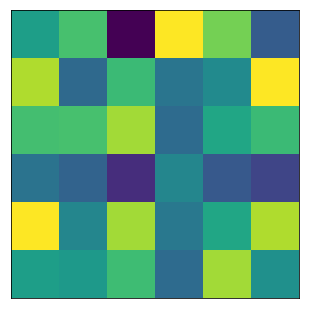

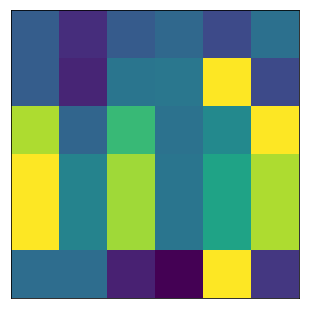

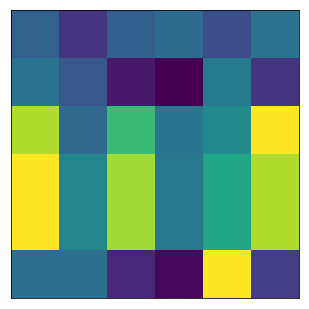

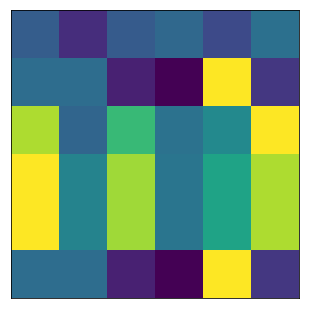

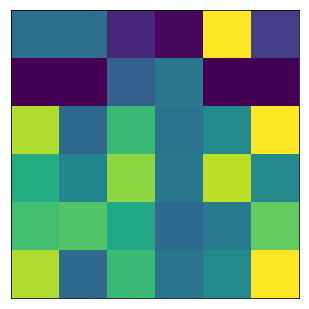

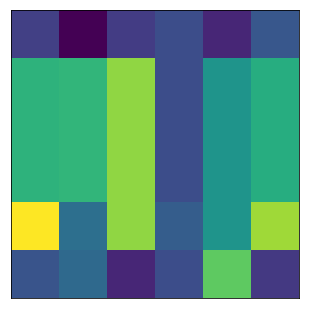

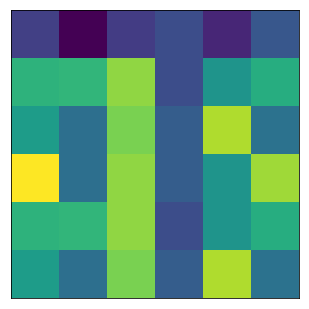

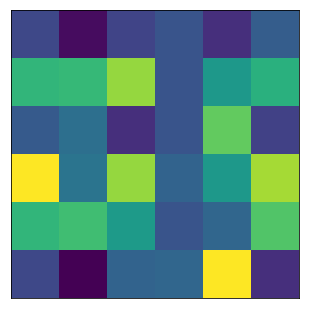

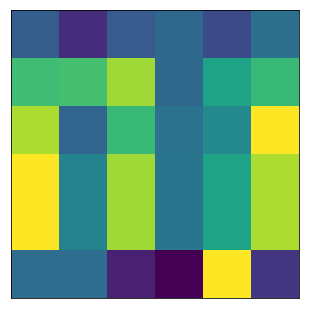

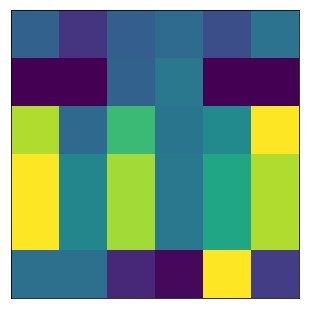

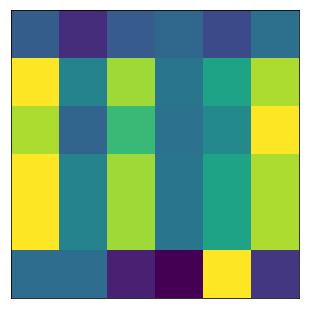

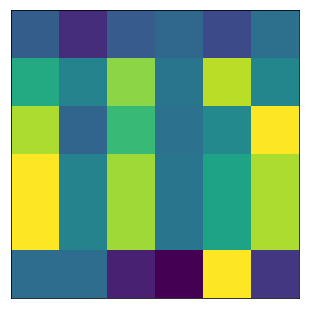

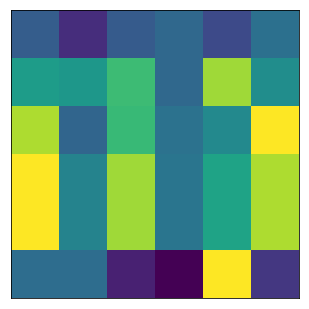

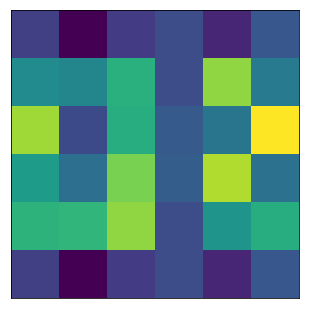

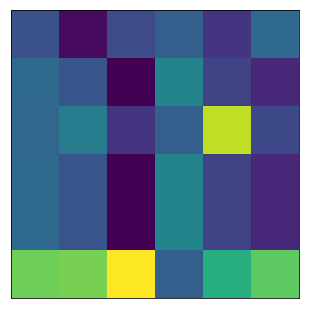

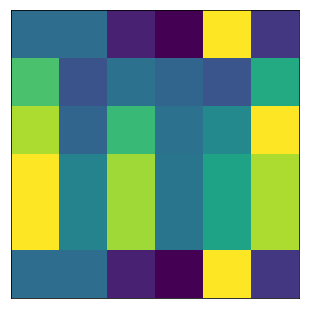

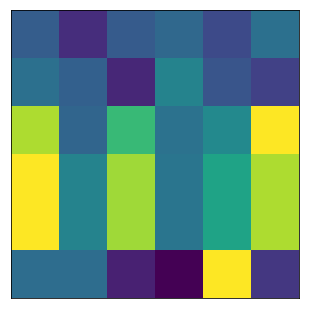

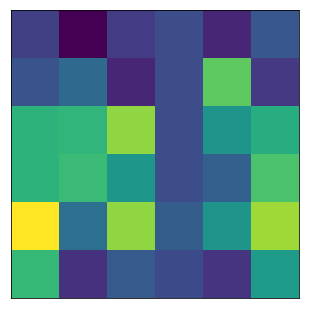

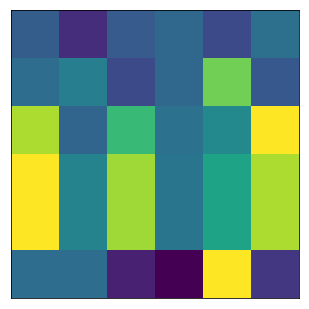

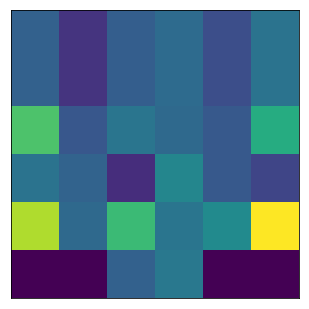

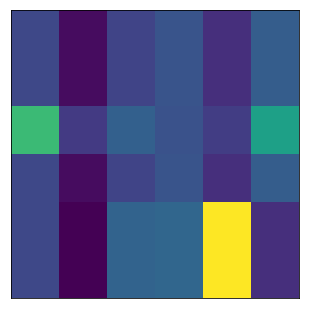

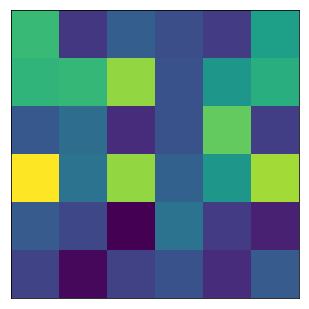

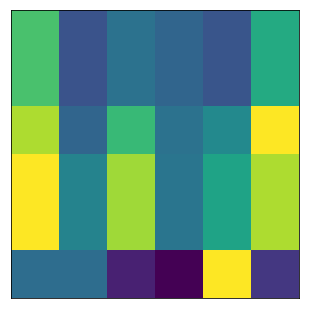

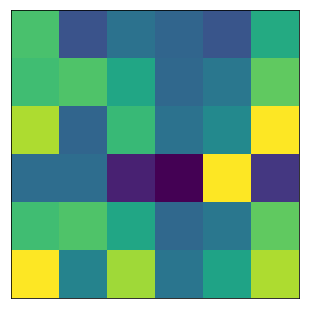

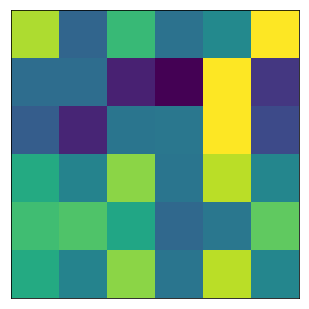

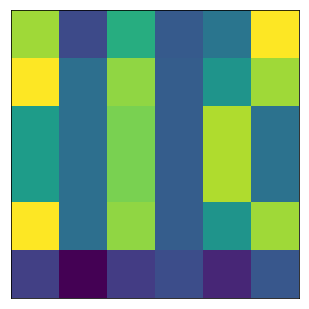

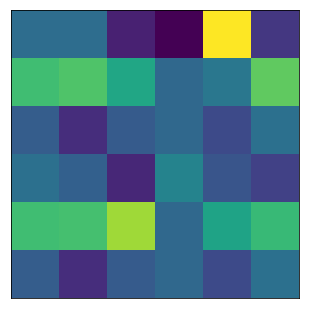

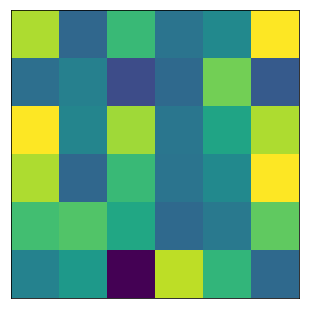

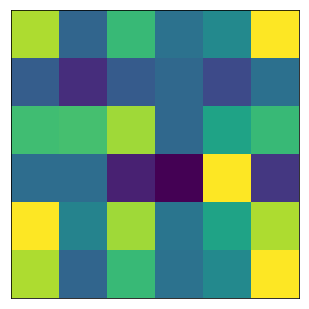

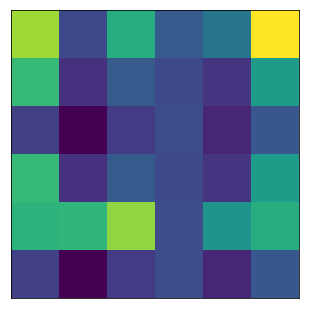

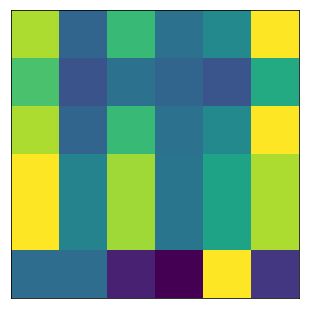

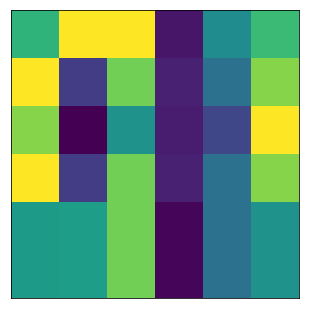

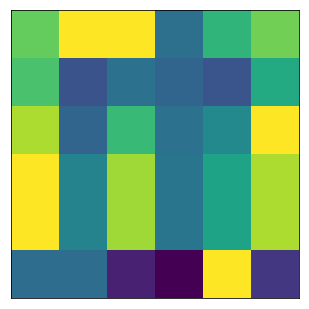

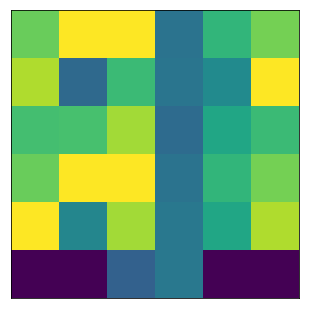

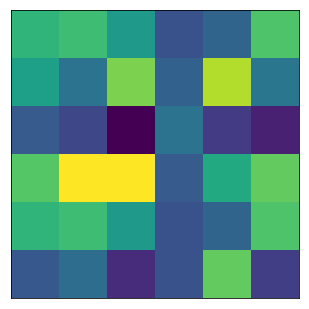

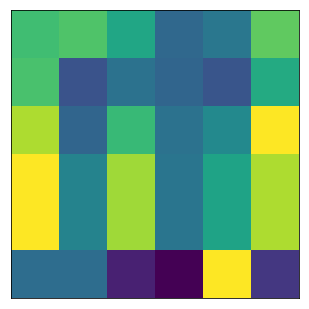

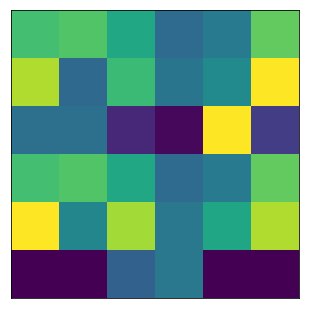

In [13]:
dir = 'C:/Users/user/OneDrive/Jupyter/Github/One/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
   
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(data)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Rotate 0 for clockwise in Image/Whole and save in Image/Whole_rotateflip directory

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_0.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_1.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_10.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_100.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_101.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_11.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_13.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_14.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_15.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_16.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_17.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_18.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_19.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whol

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_115.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_116.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_117.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_118.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_119.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_120.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_121.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_122.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_123.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_124.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_125.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_126.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_127.png
C:/Users/user/OneDriv

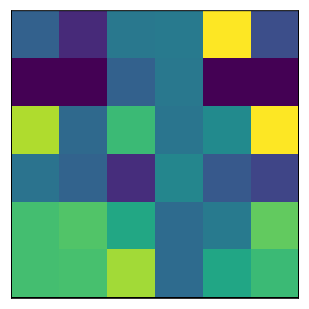

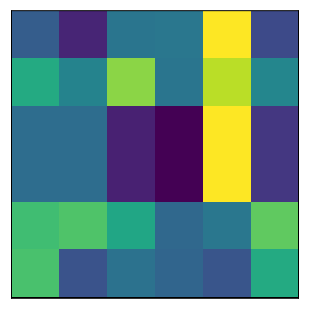

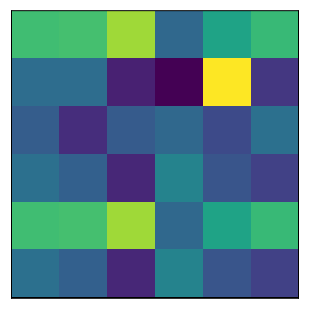

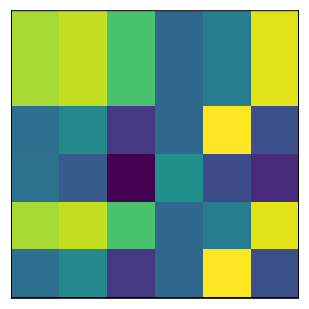

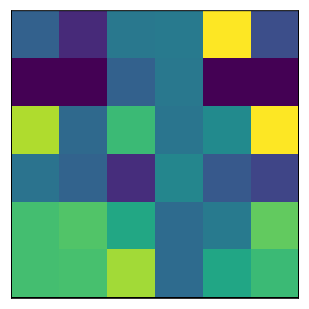

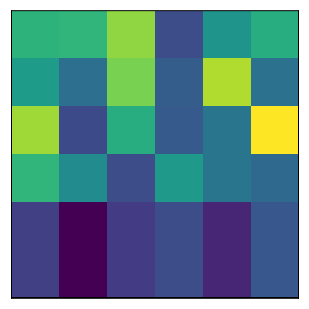

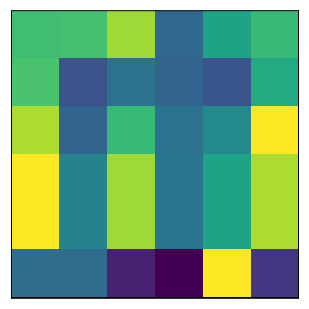

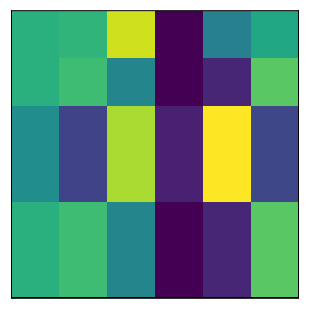

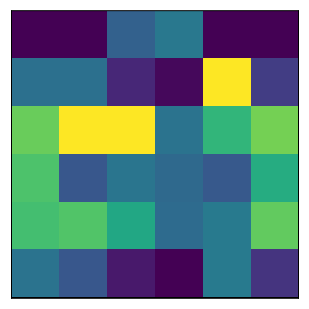

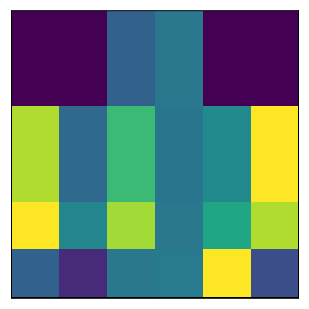

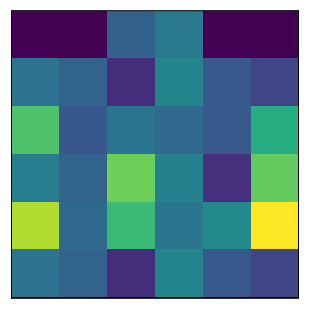

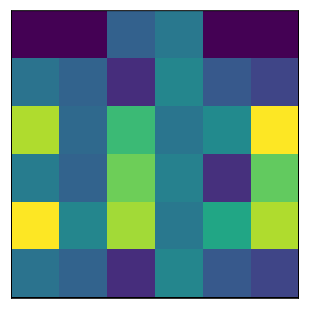

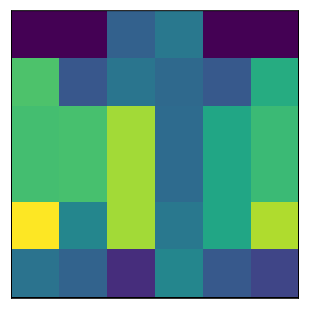

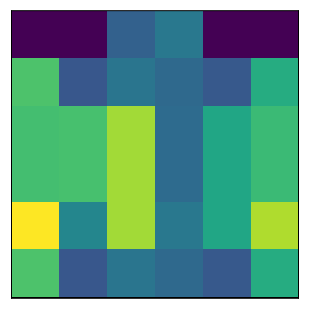

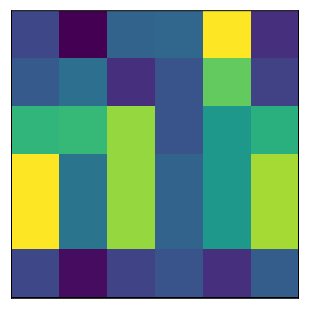

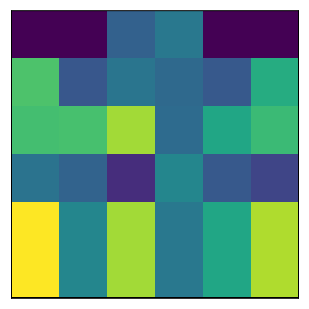

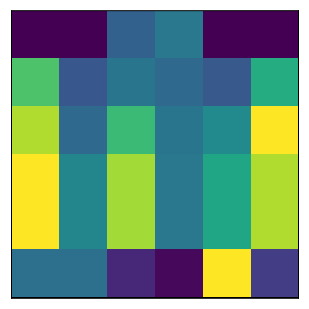

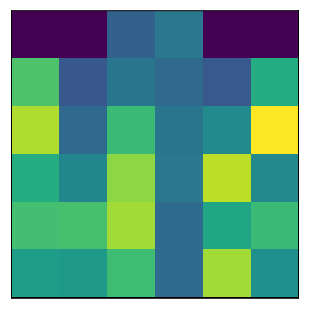

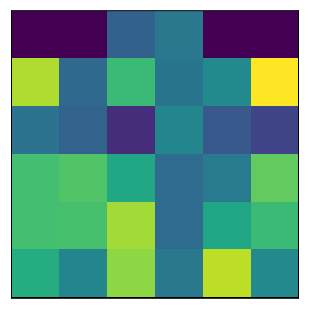

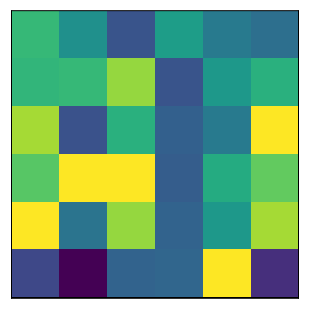

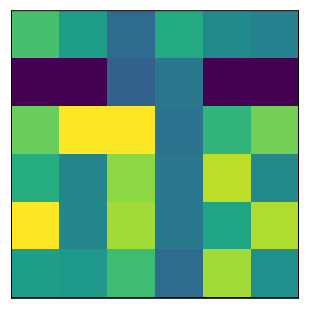

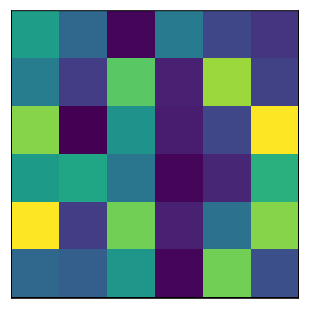

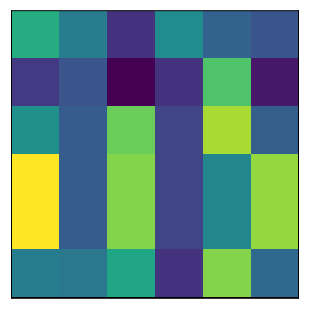

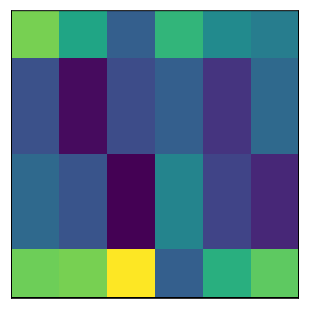

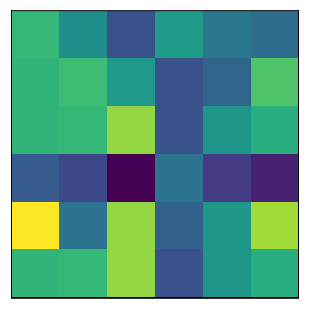

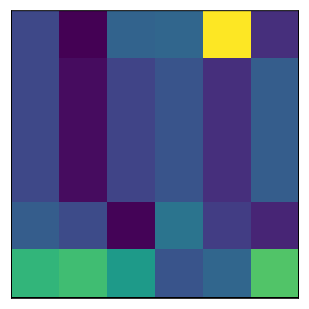

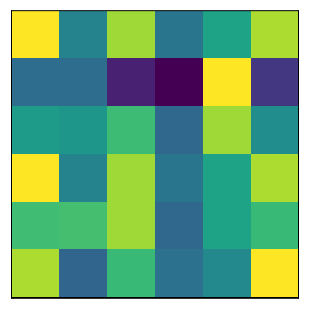

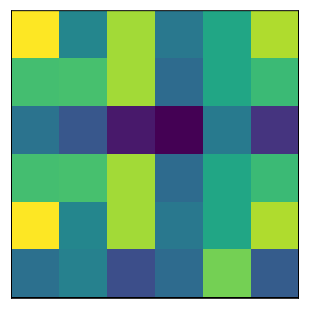

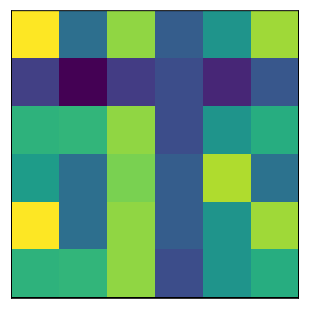

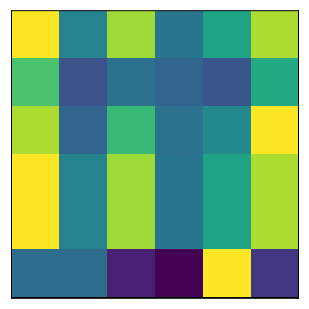

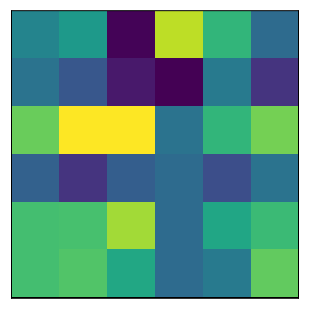

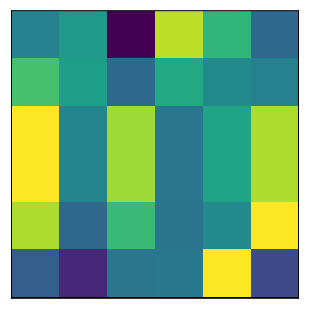

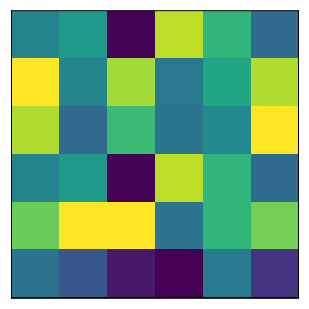

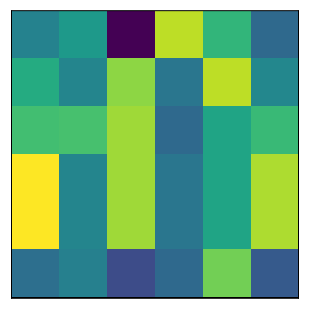

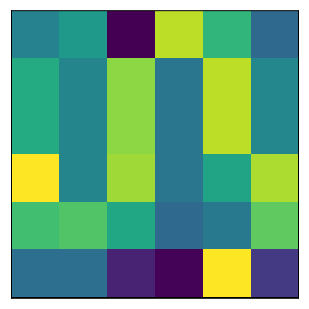

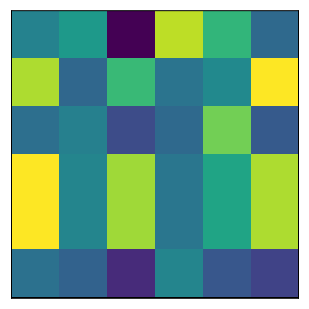

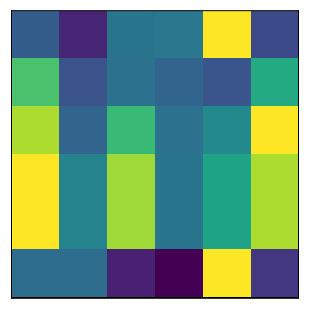

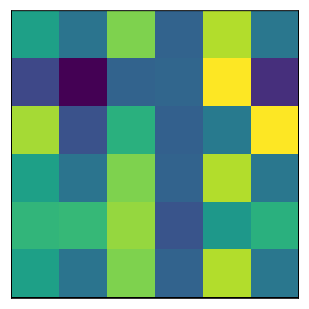

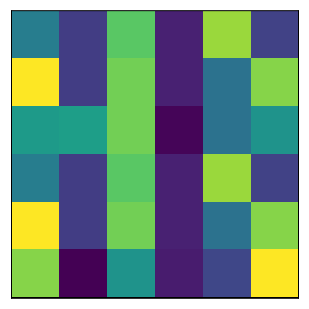

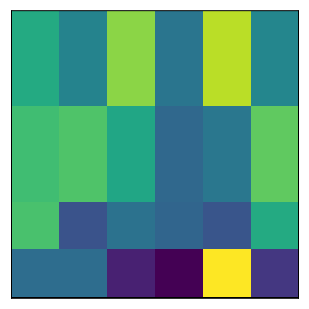

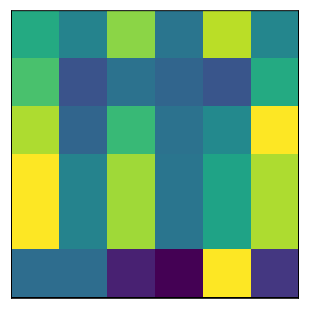

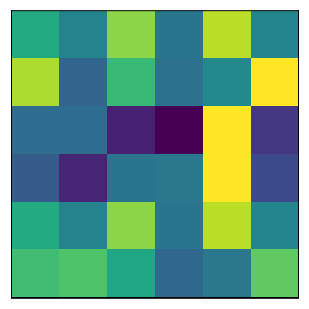

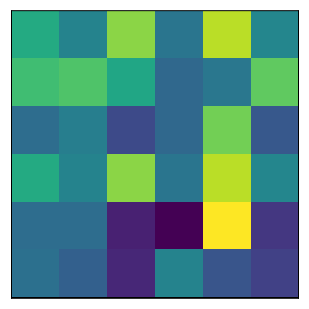

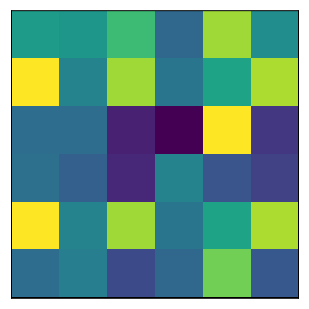

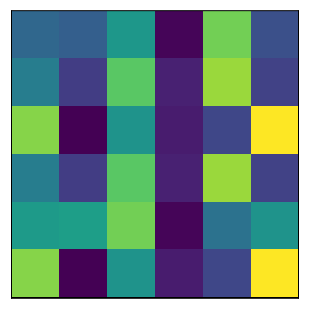

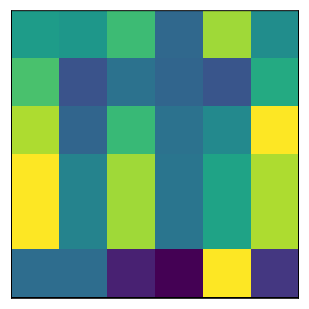

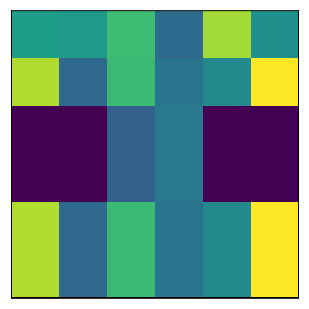

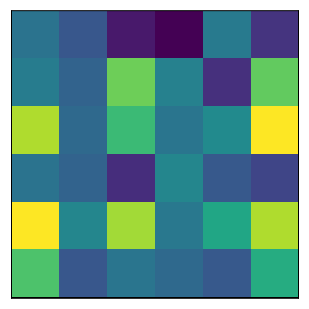

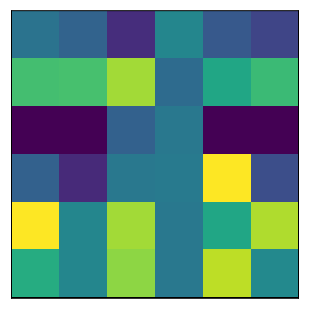

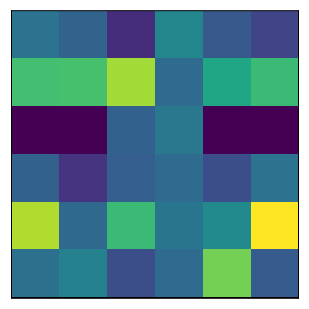

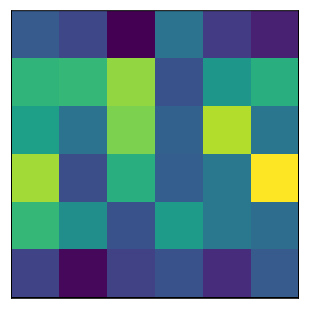

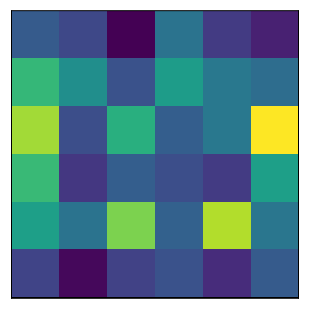

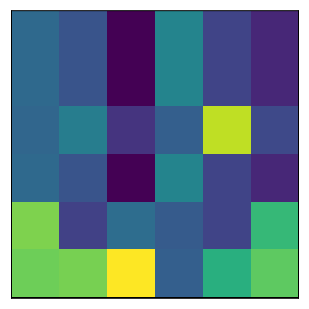

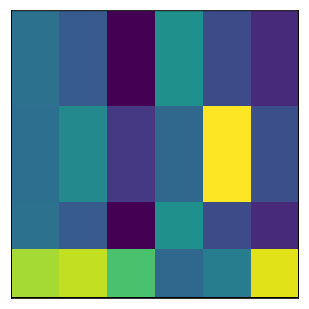

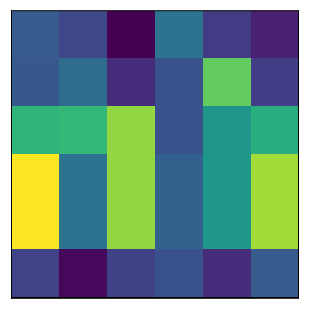

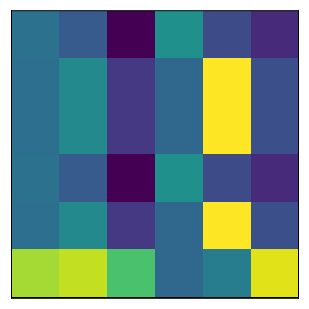

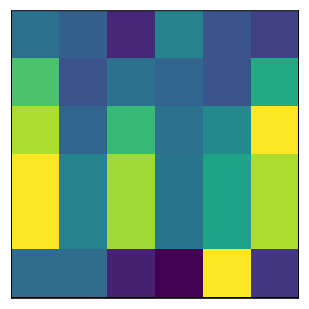

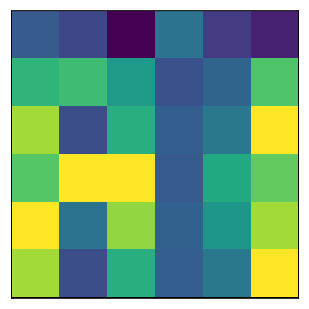

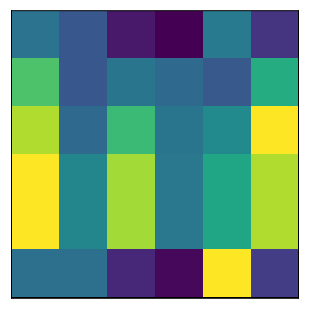

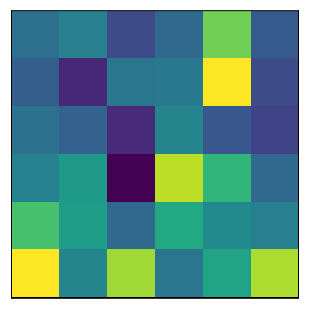

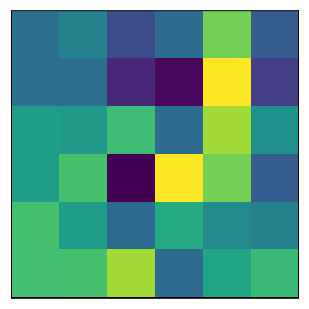

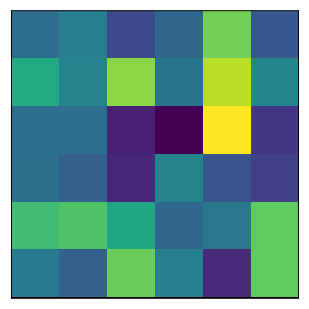

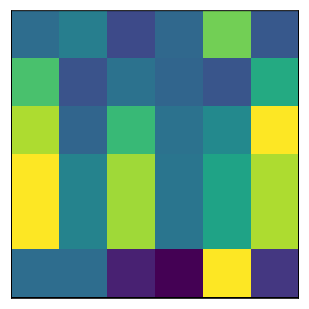

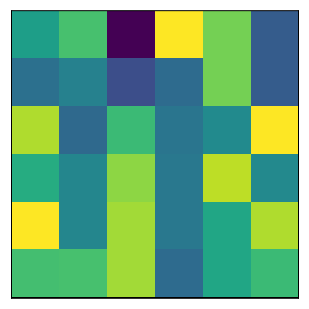

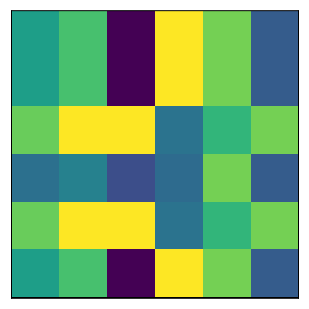

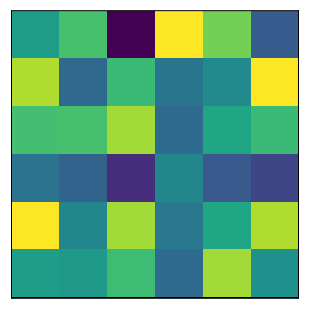

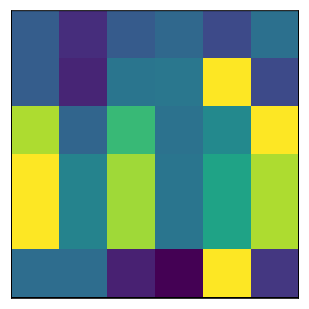

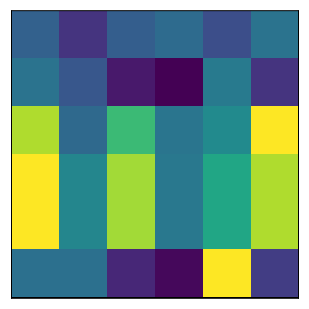

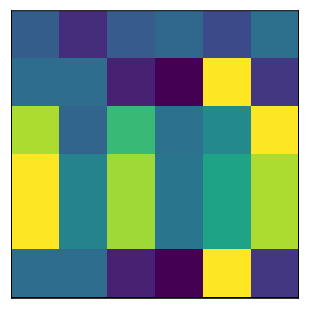

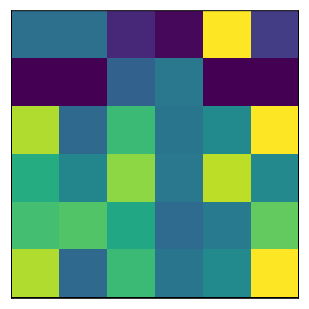

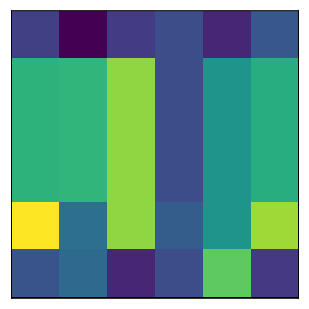

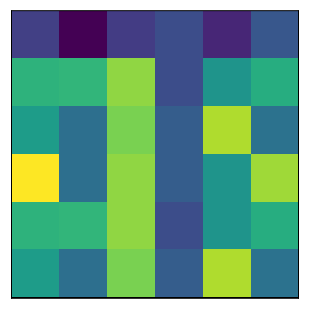

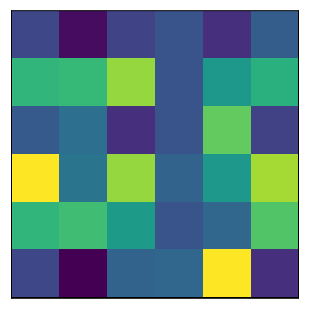

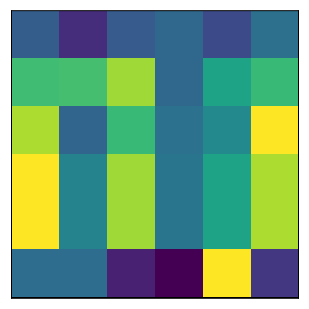

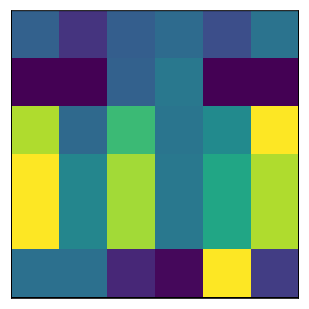

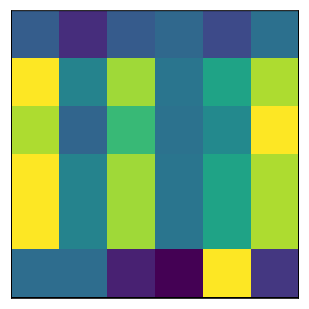

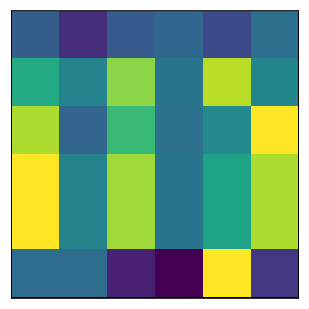

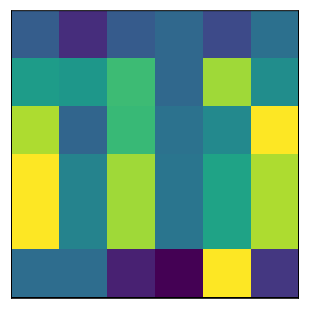

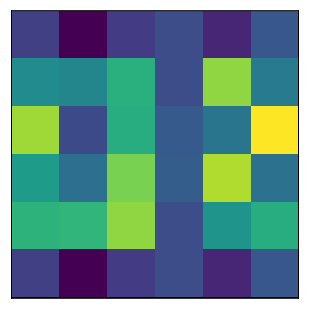

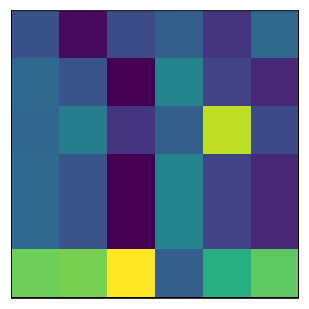

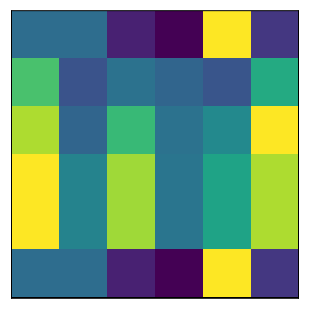

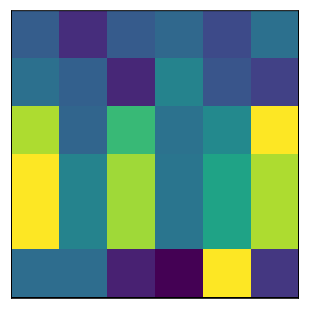

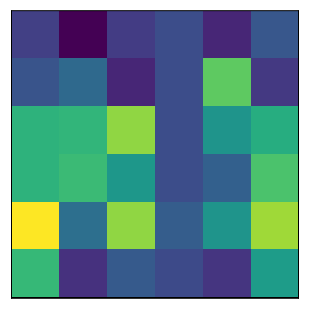

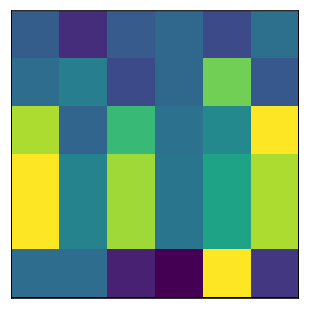

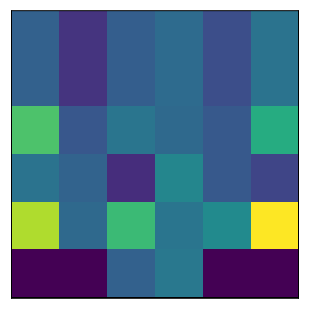

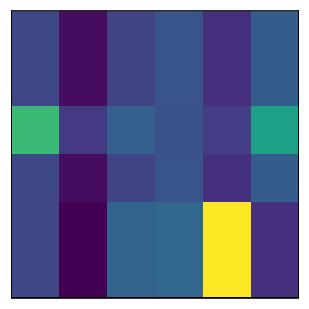

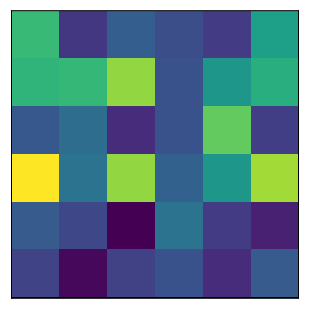

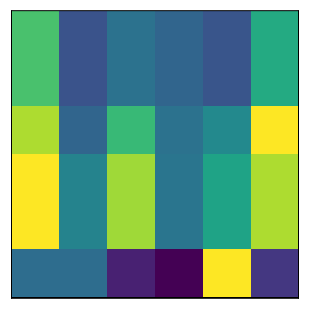

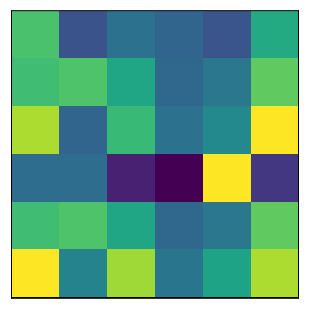

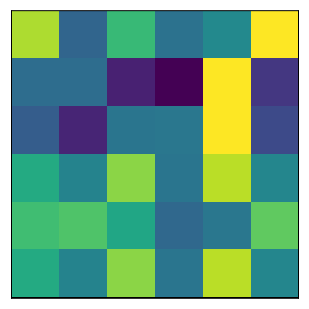

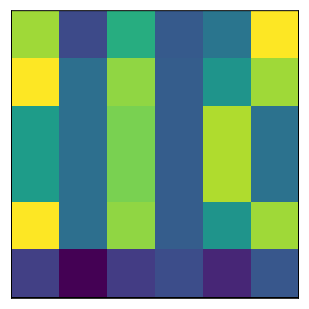

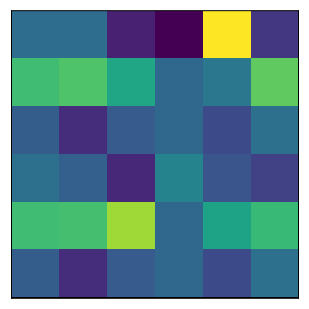

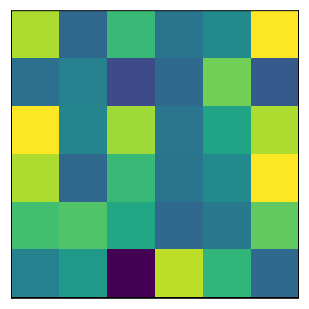

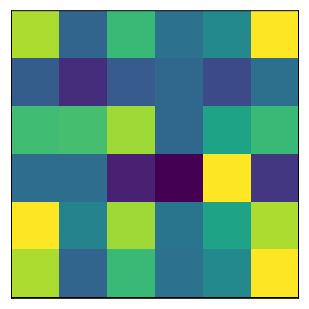

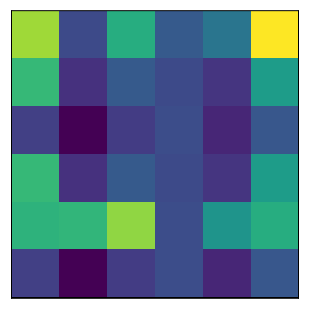

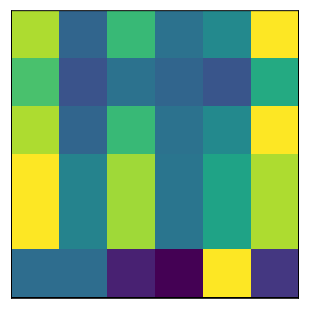

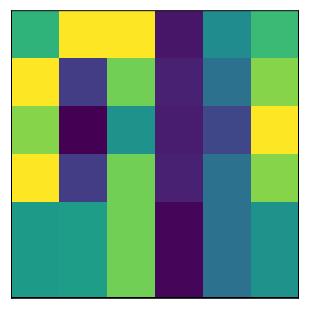

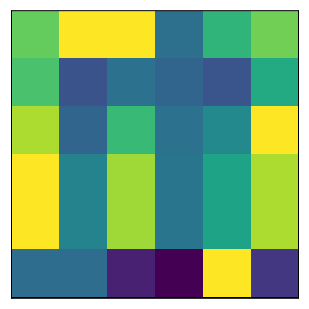

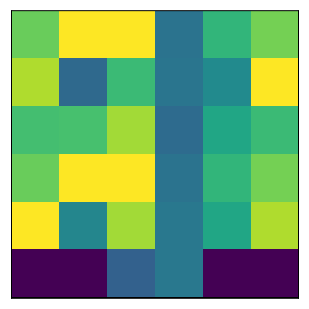

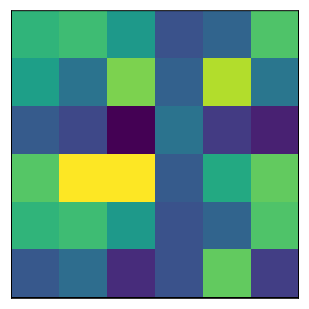

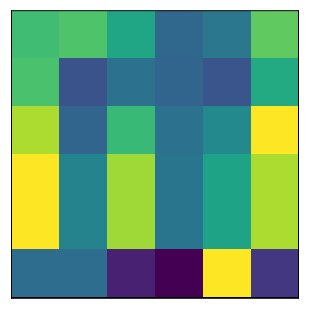

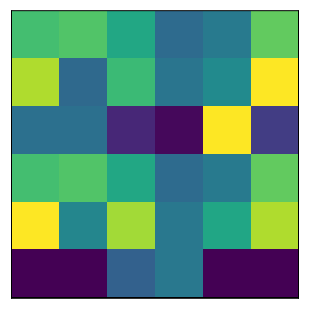

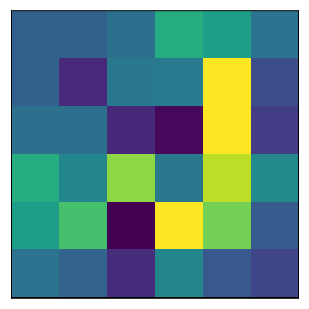

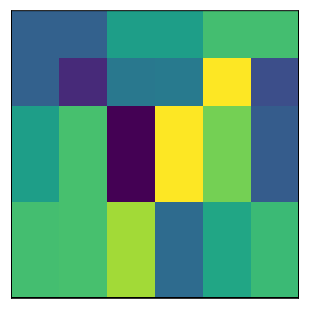

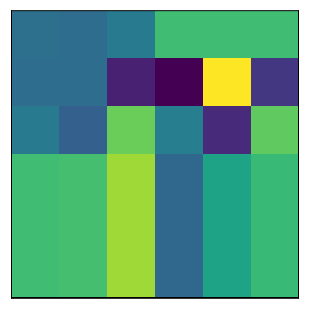

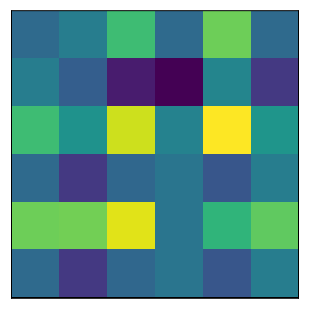

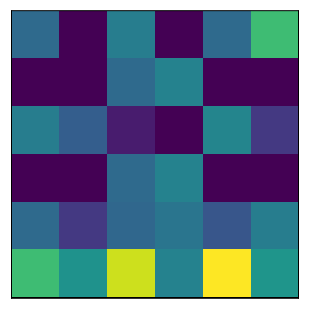

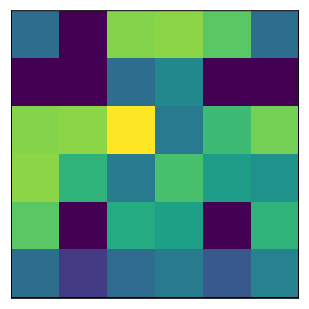

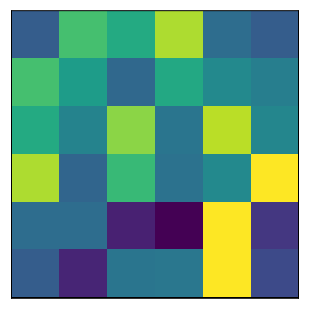

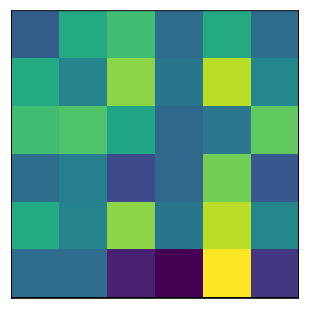

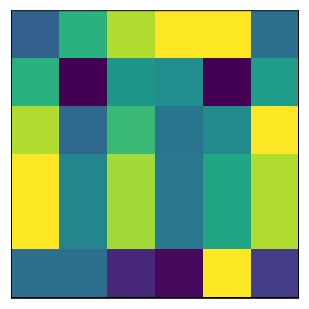

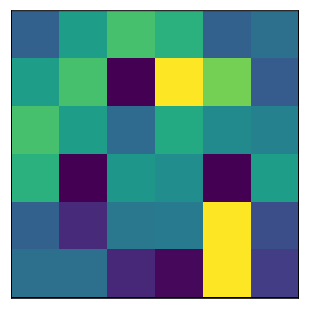

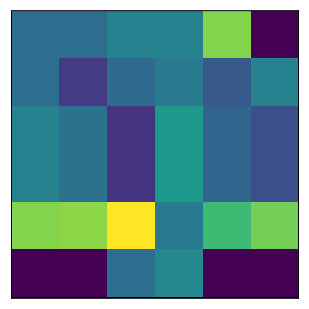

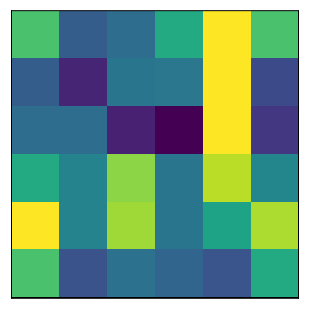

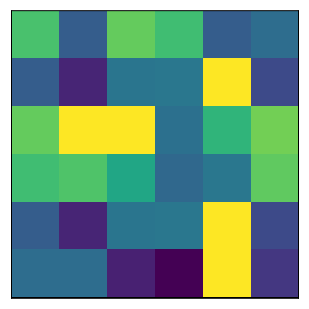

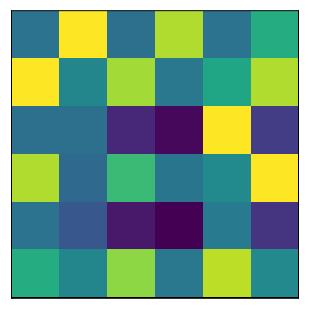

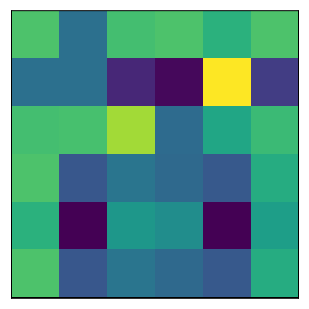

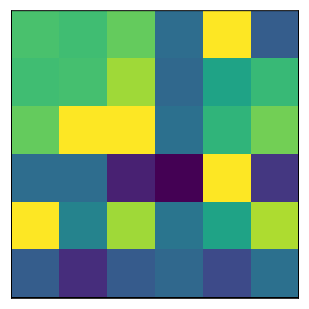

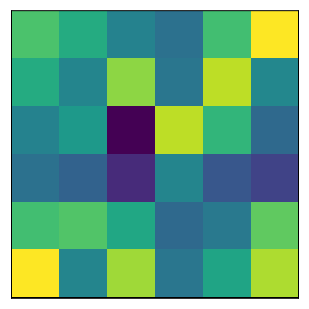

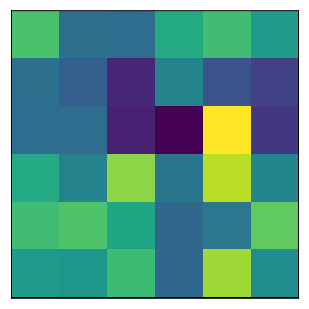

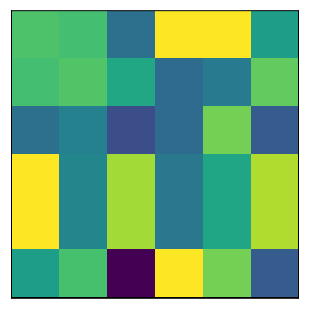

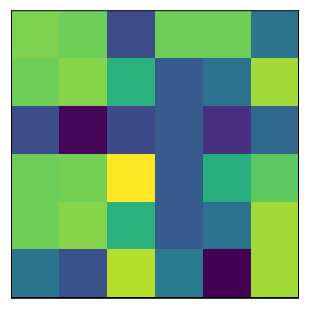

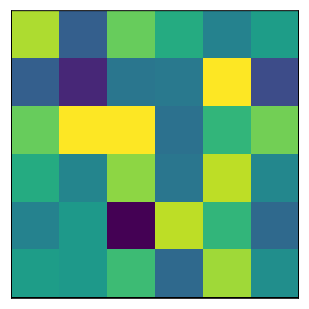

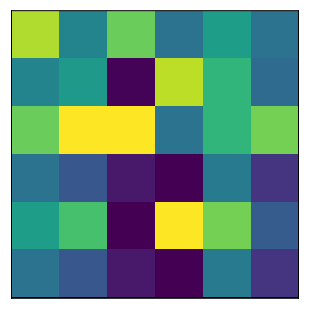

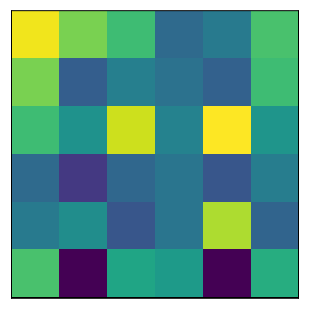

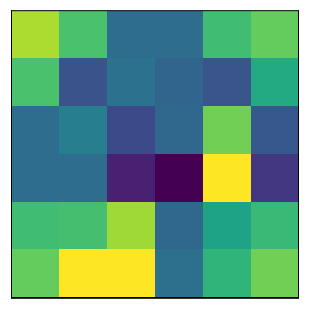

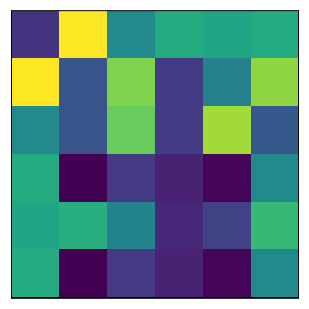

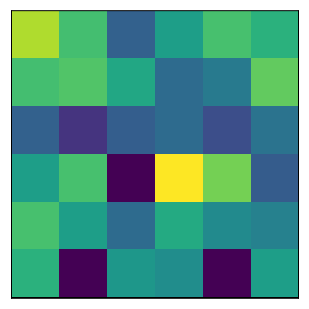

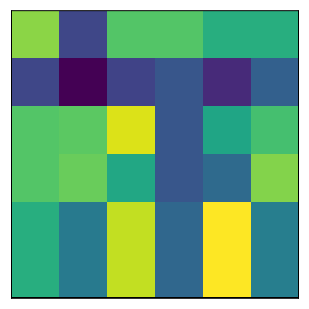

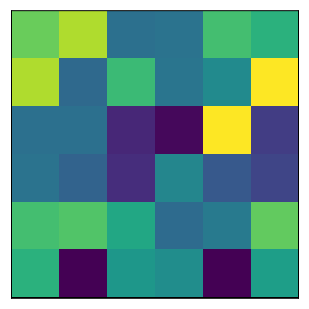

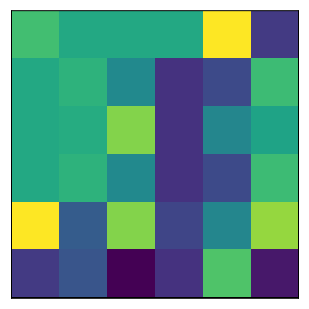

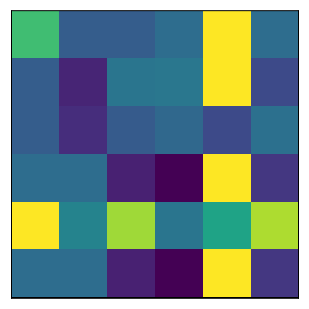

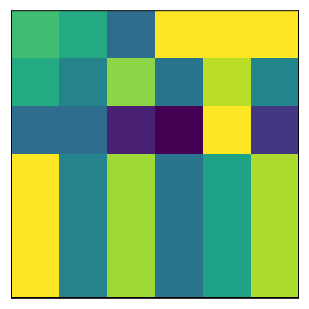

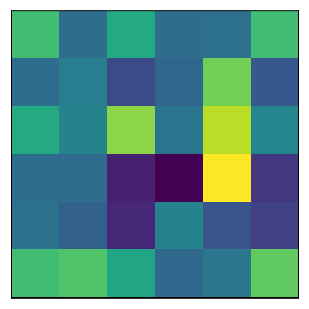

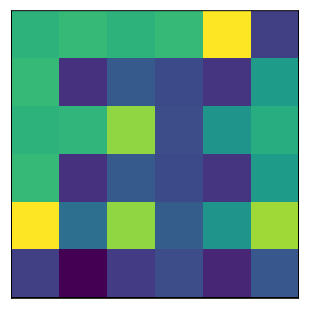

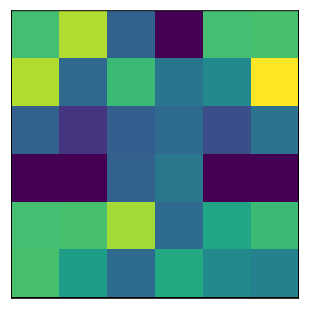

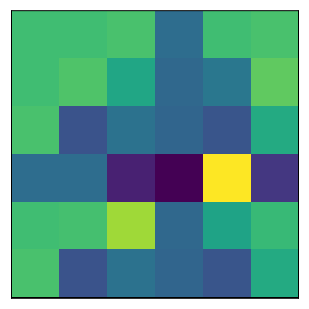

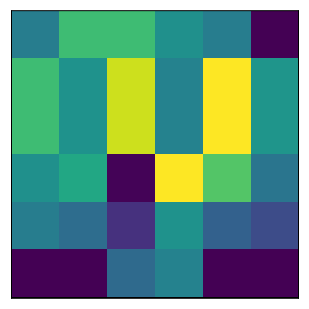

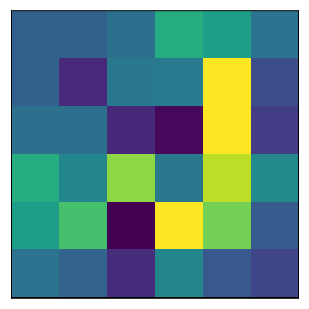

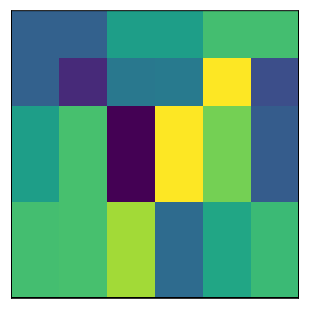

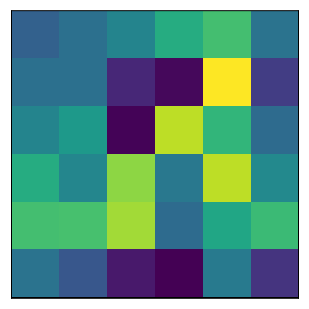

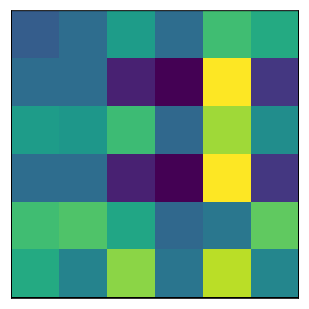

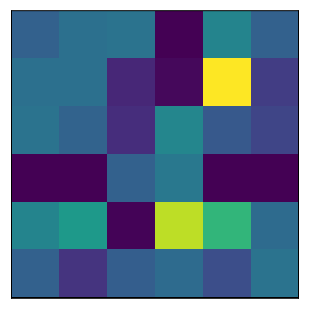

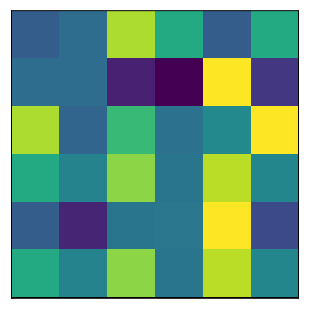

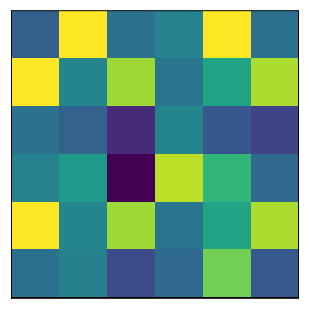

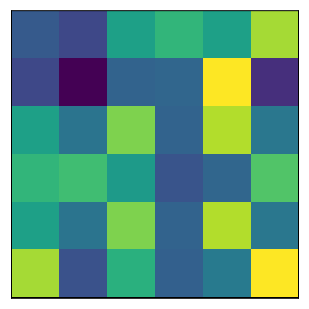

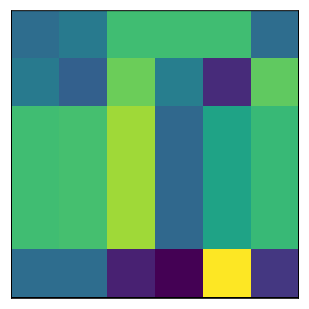

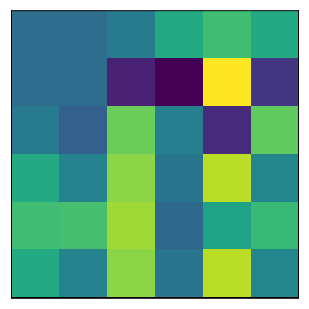

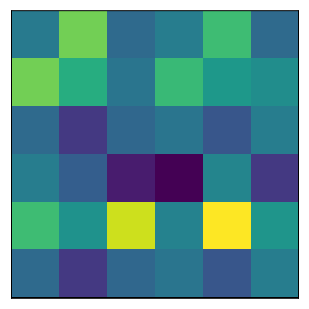

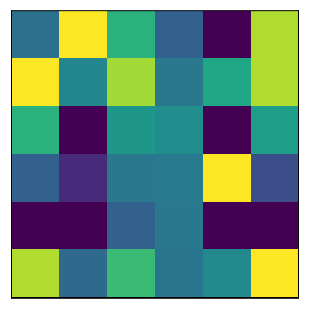

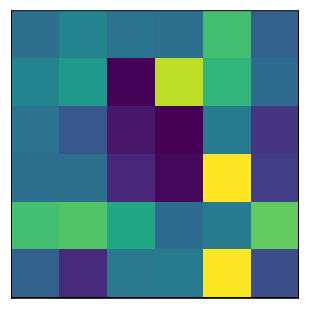

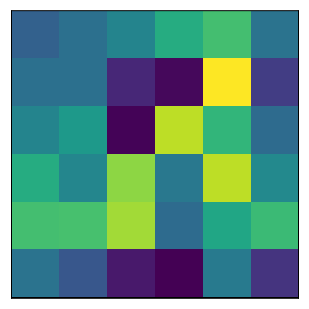

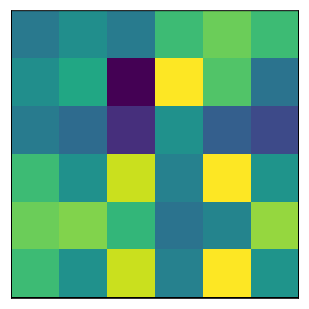

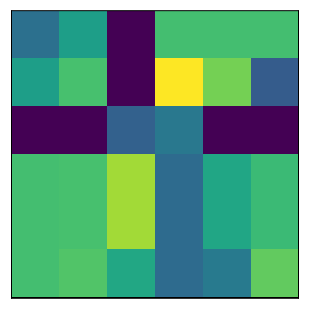

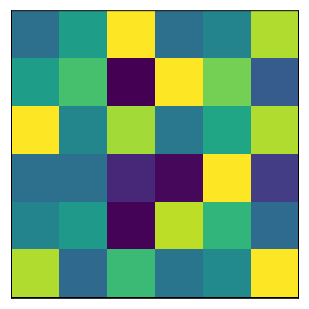

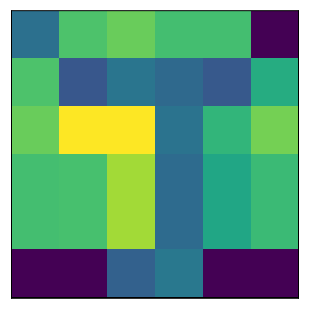

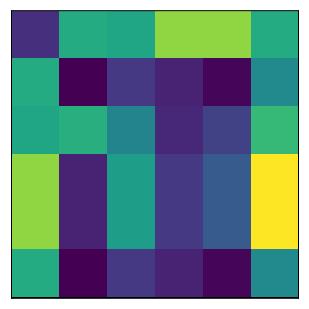

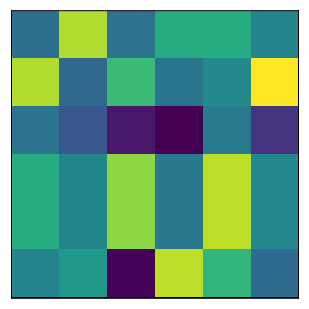

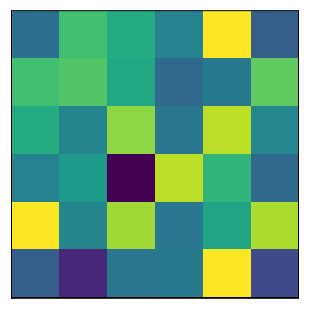

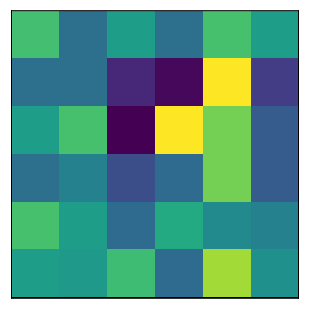

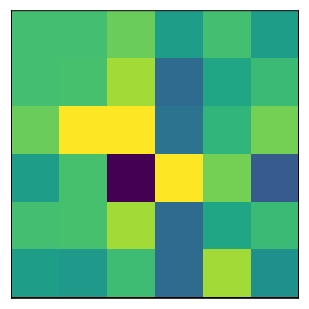

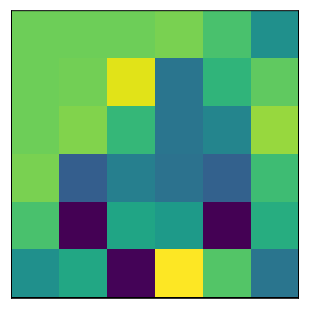

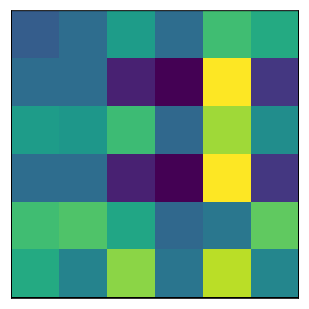

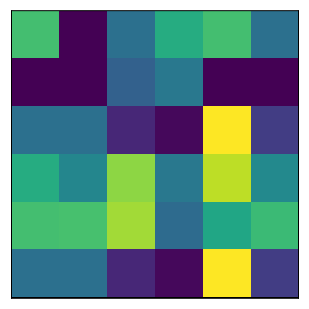

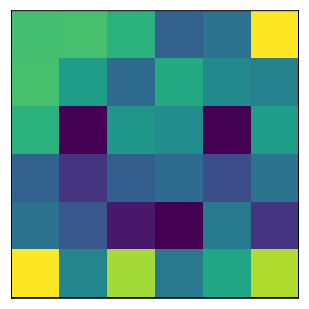

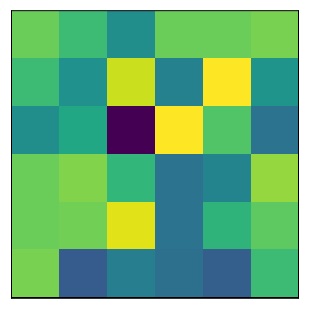

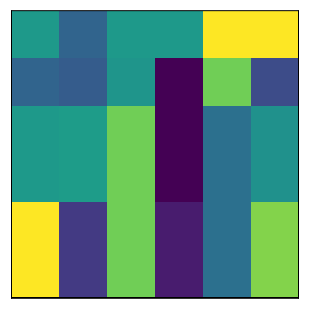

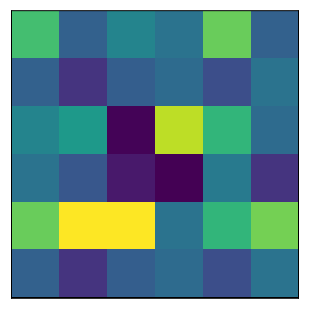

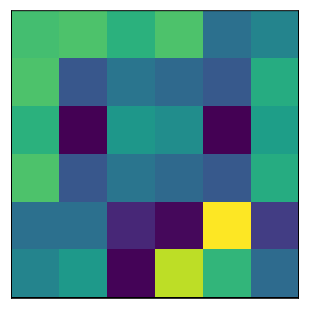

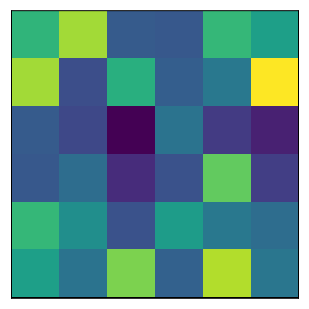

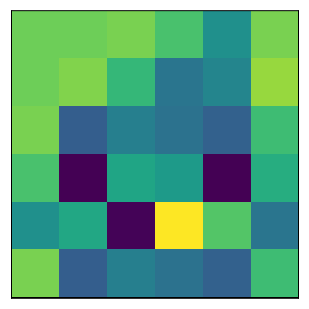

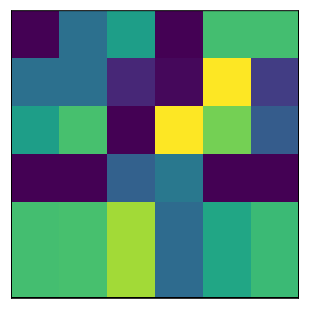

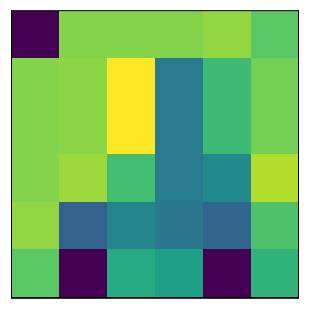

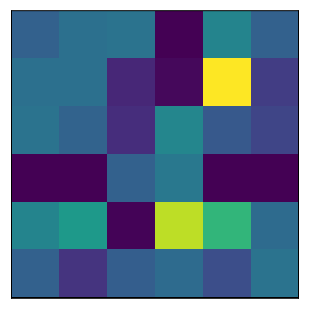

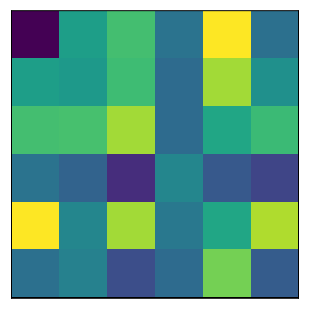

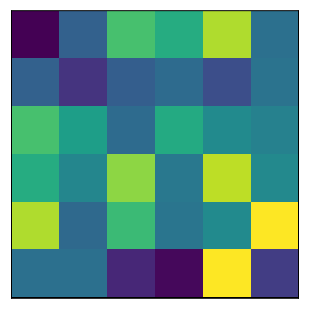

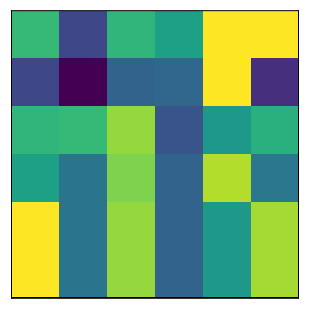

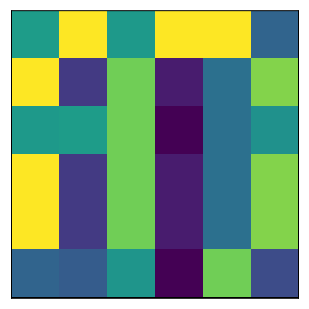

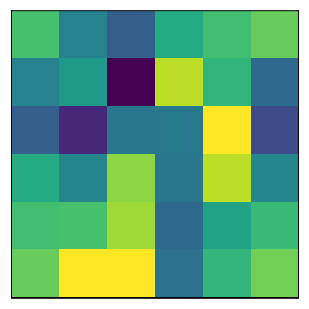

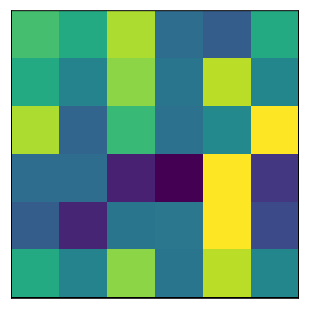

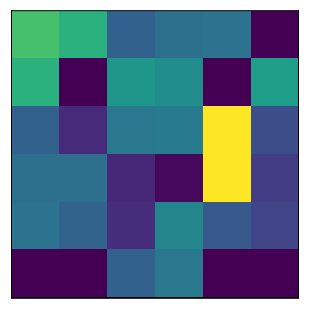

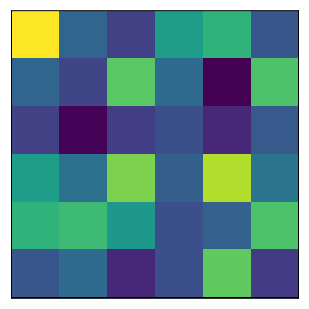

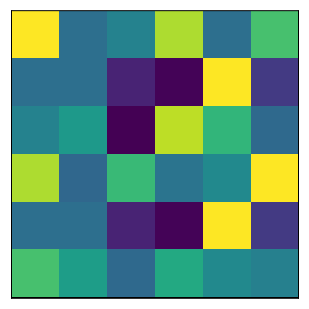

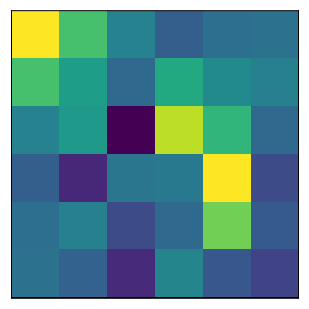

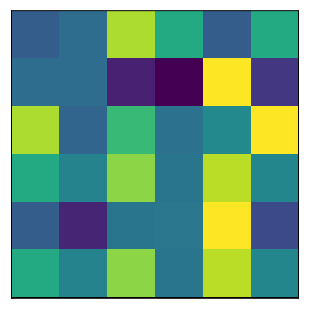

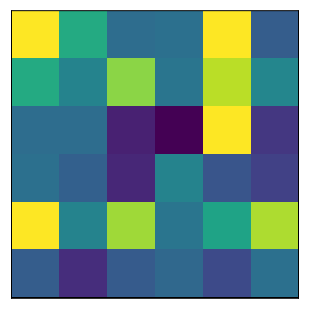

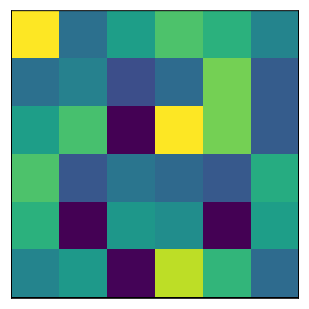

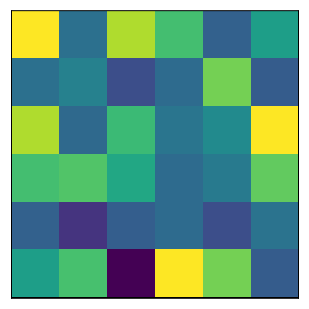

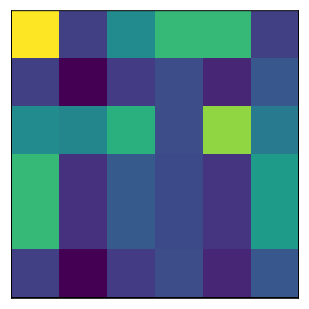

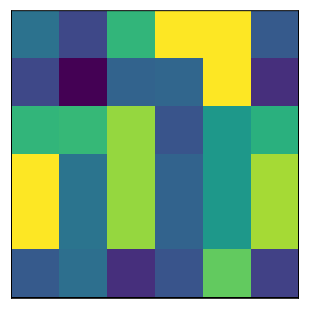

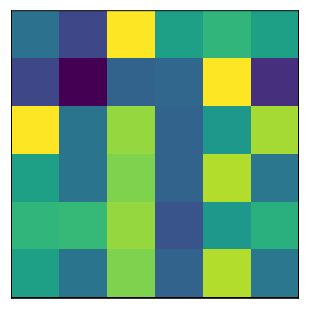

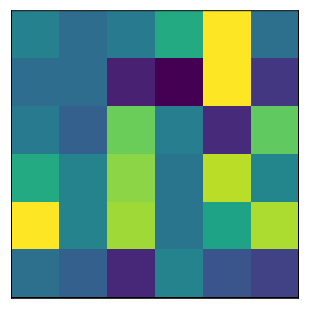

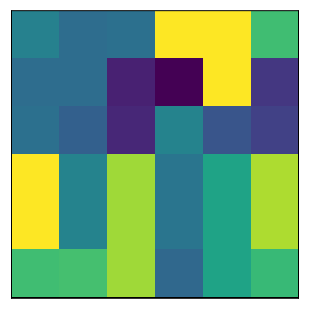

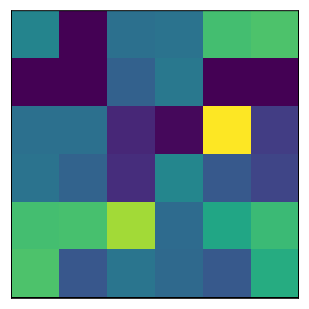

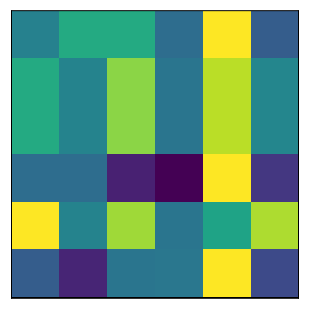

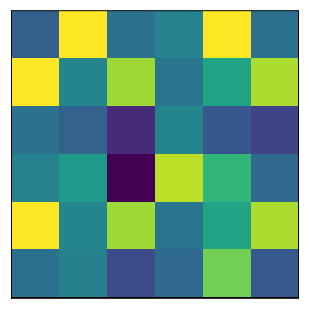

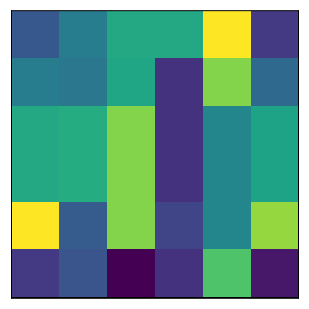

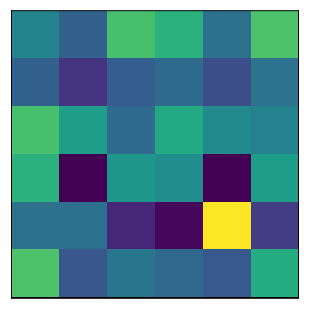

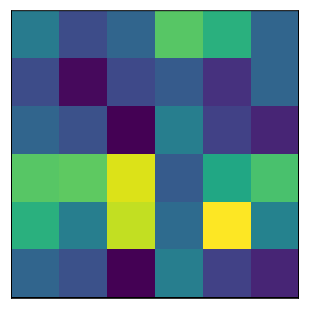

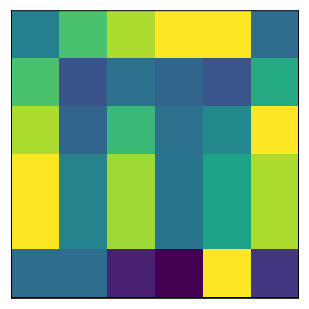

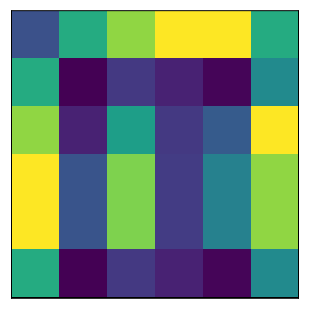

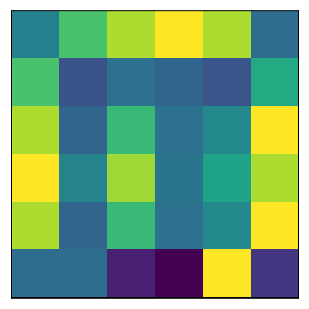

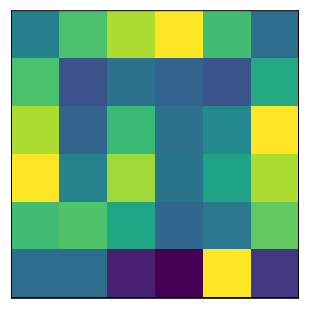

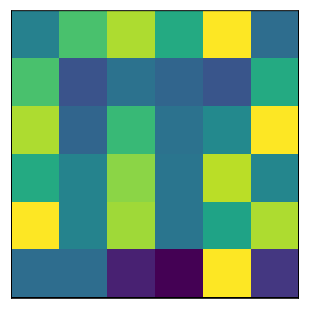

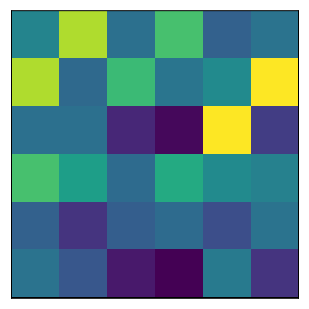

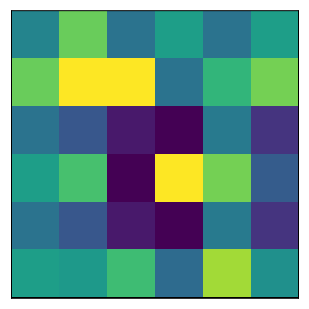

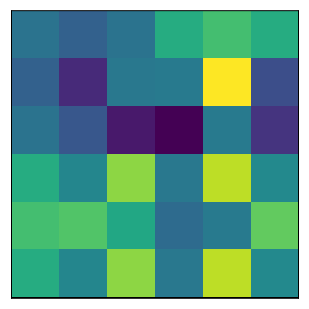

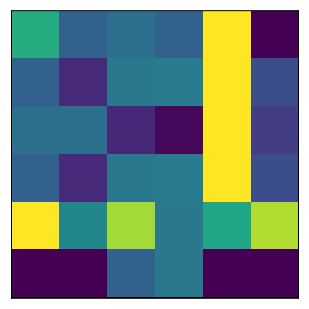

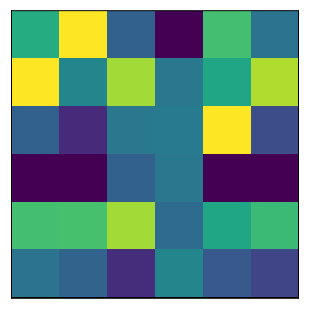

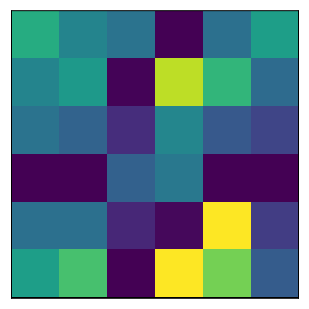

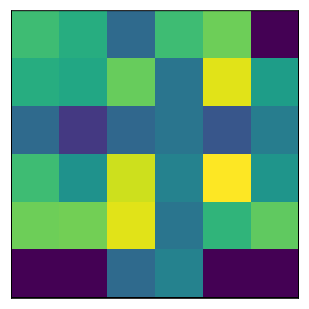

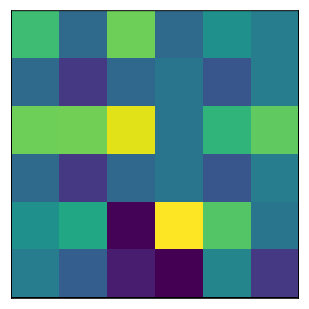

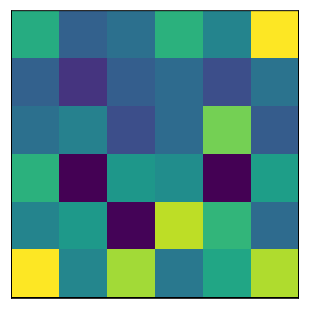

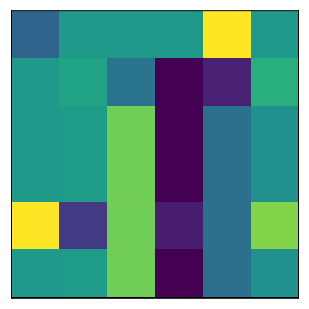

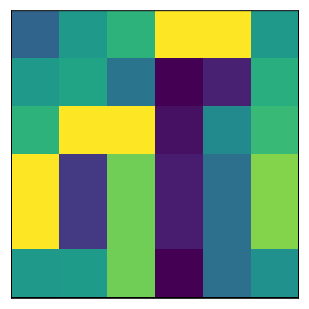

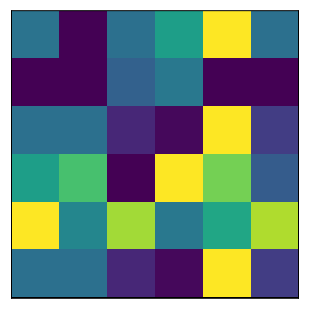

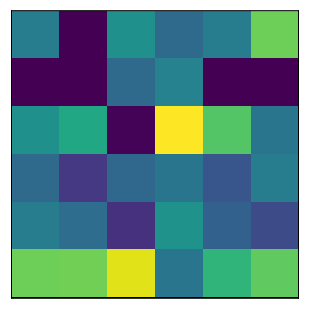

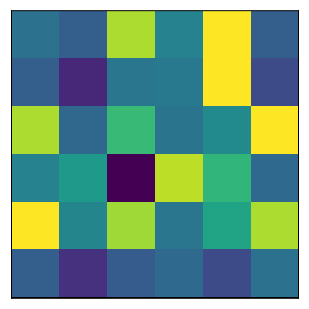

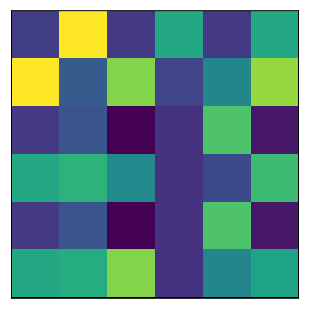

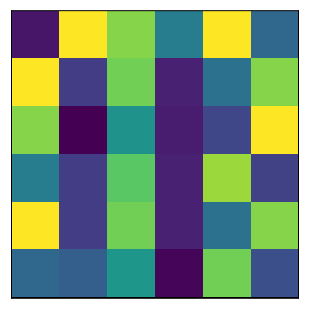

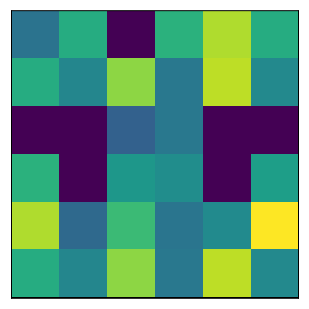

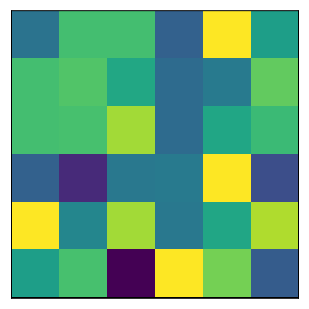

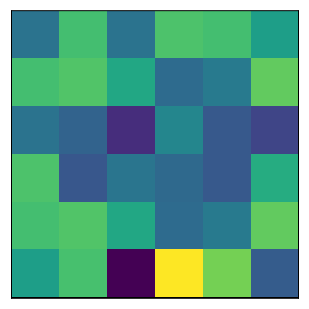

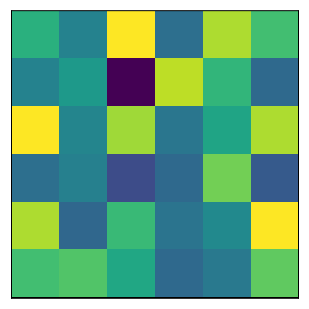

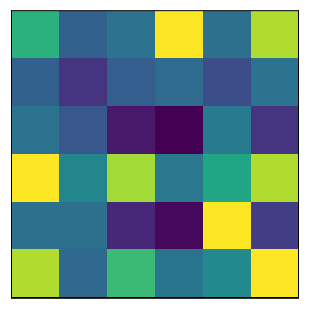

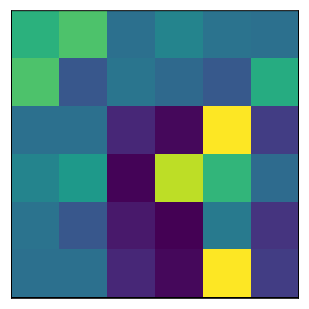

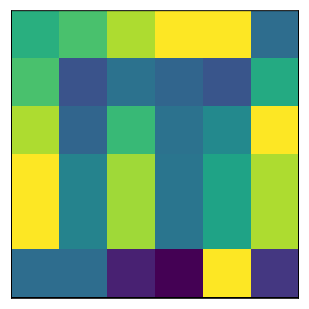

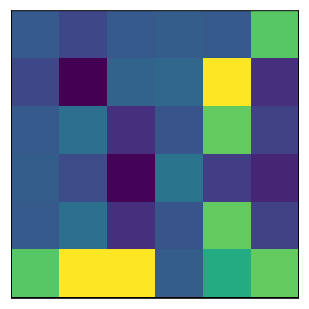

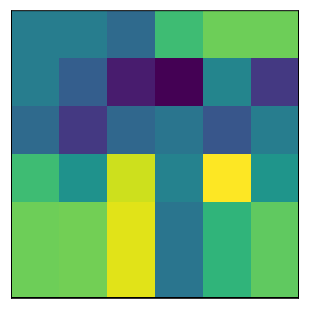

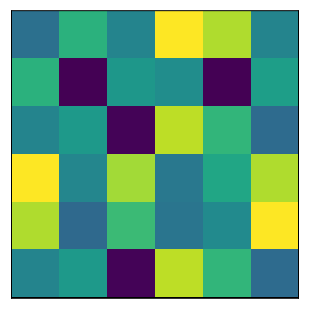

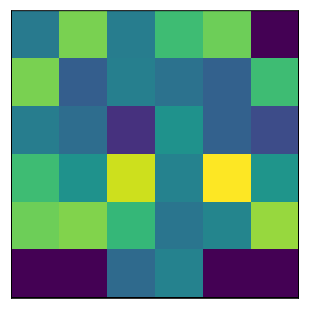

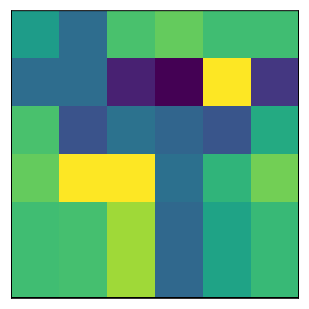

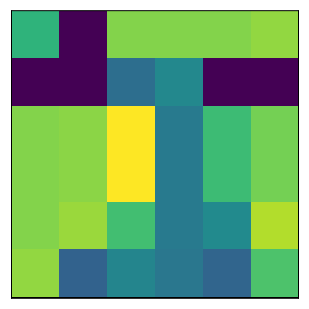

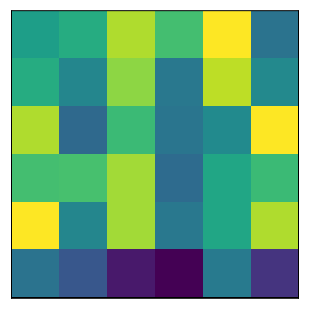

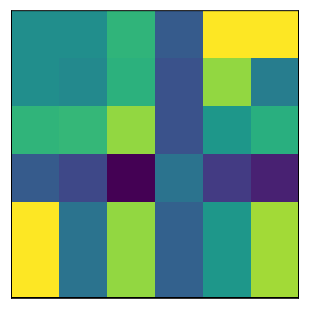

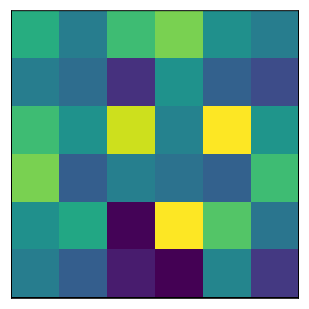

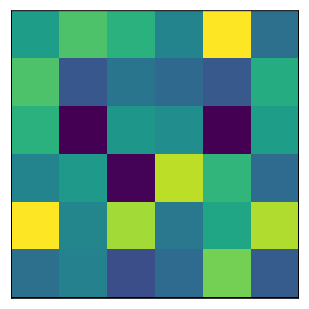

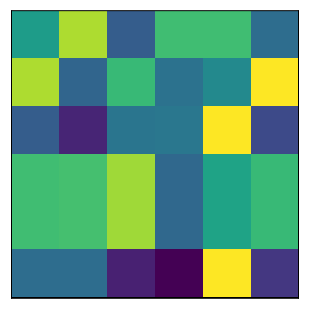

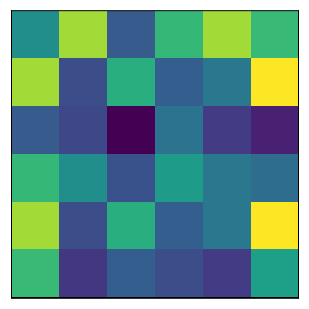

In [14]:
from PIL import Image
import os, glob
import cv2 as cv

dir_path='Image/Whole_rotateflip'
os.makedirs(dir_path)

dir = 'C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/*.png'
df_list=[]
book_dict = {}


for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip/0_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Rotate 90 for clockwise in Image/Whole and save in Image/Whole_rotateflip directory

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_0.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_1.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_10.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_100.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_101.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_11.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_13.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_14.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_15.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_16.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_17.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_18.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_19.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whol

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_115.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_116.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_117.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_118.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_119.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_120.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_121.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_122.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_123.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_124.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_125.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_126.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_127.png
C:/Users/user/OneDriv

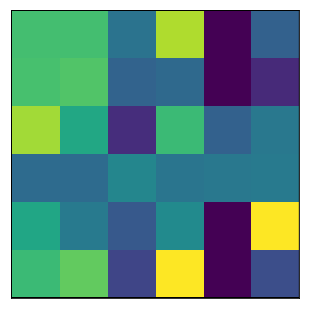

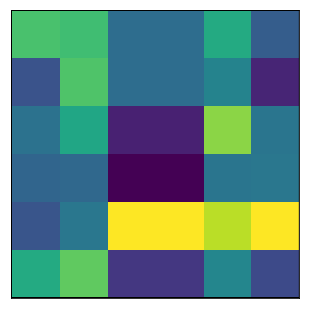

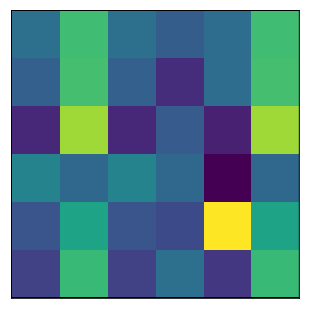

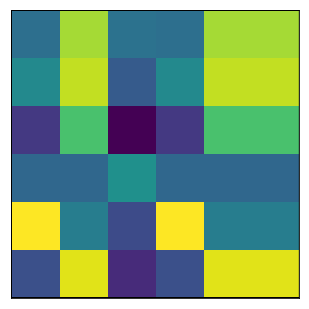

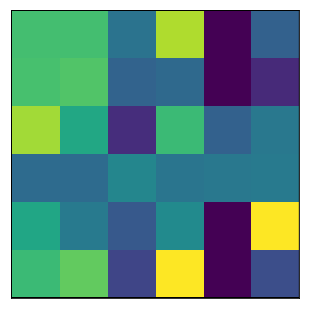

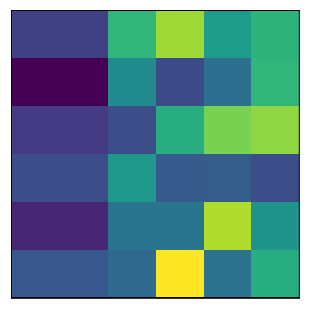

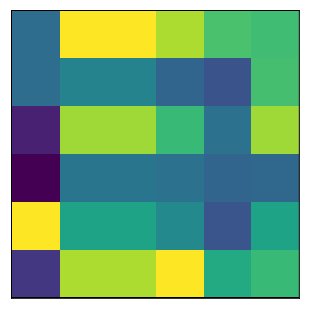

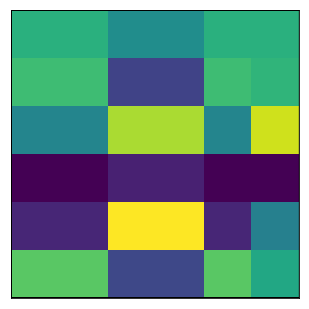

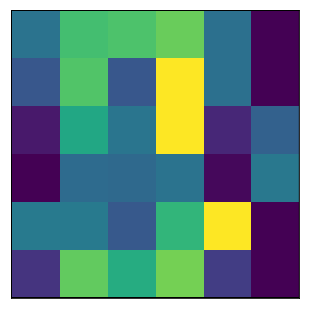

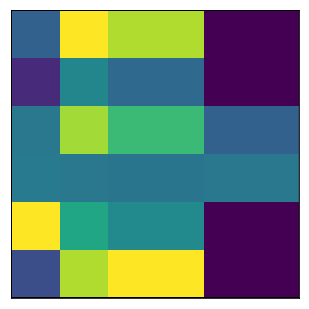

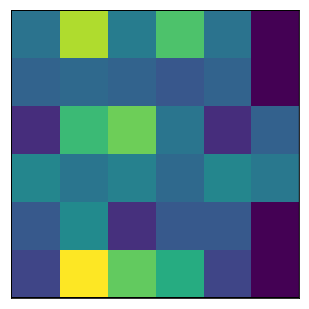

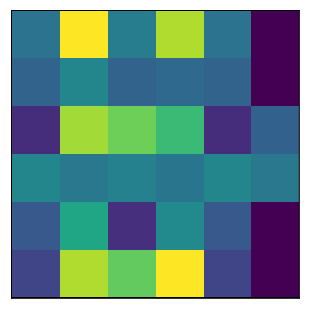

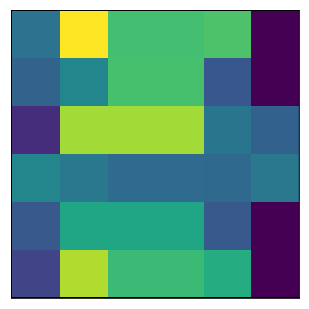

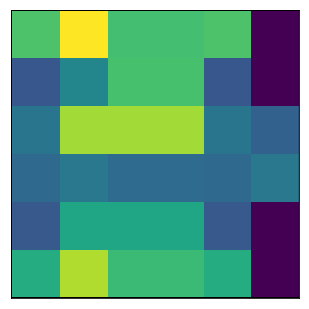

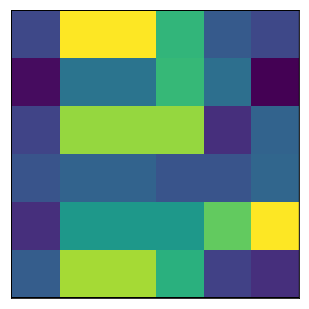

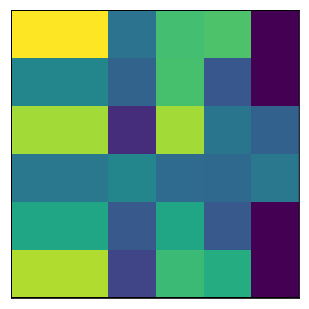

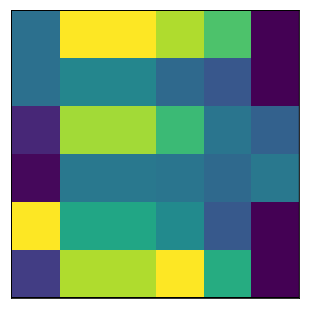

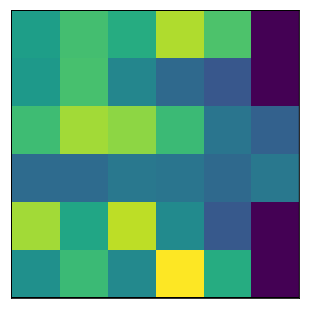

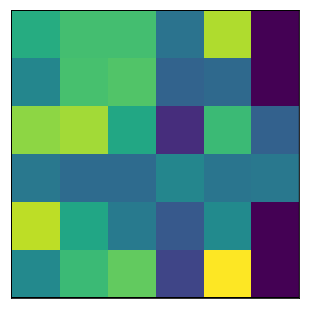

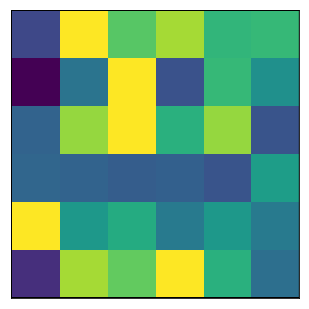

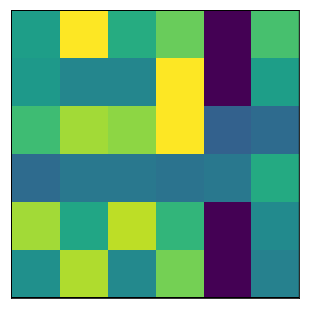

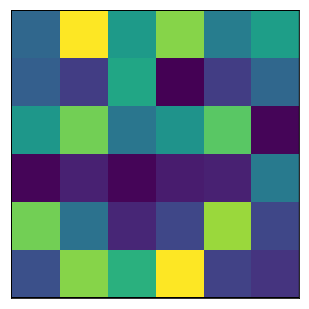

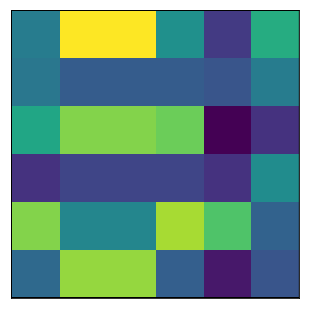

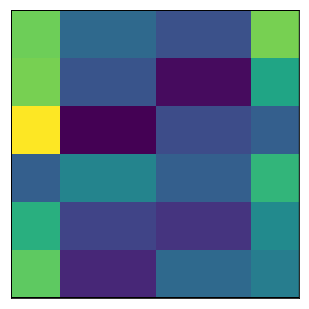

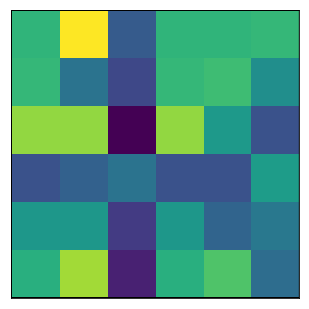

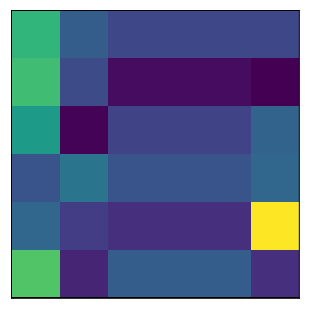

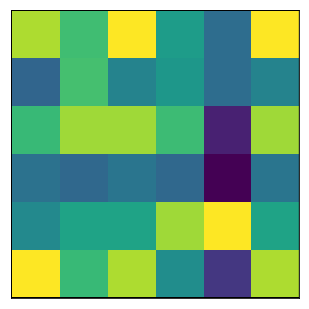

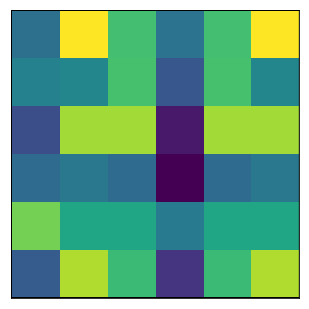

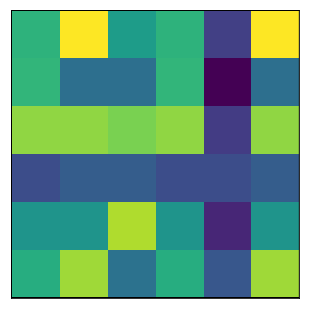

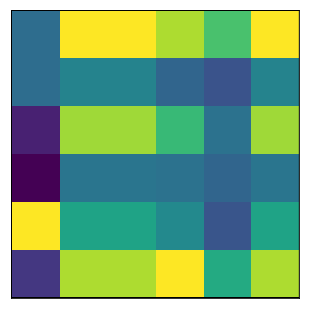

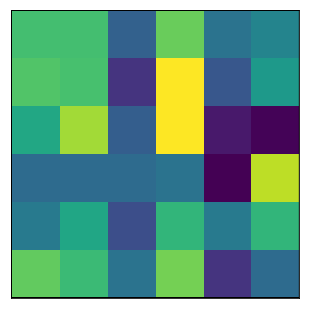

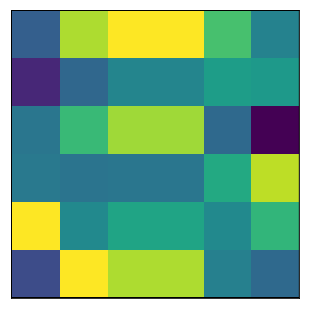

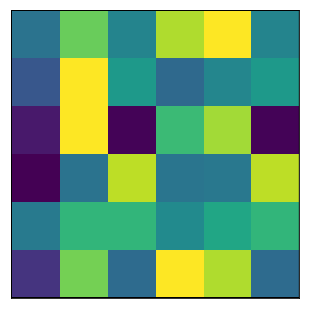

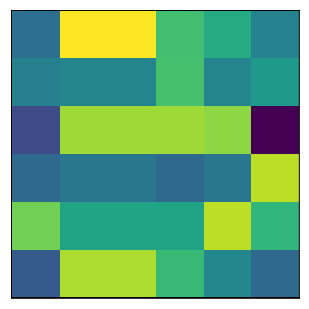

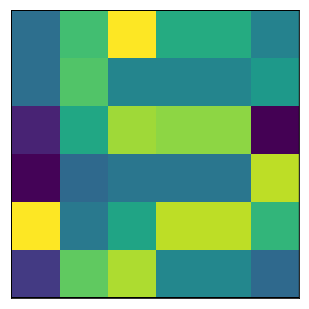

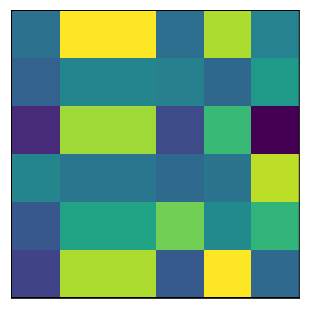

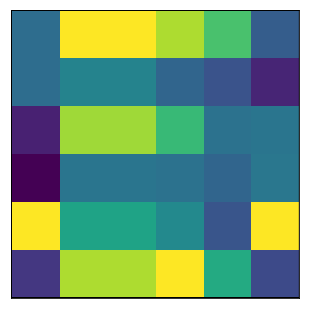

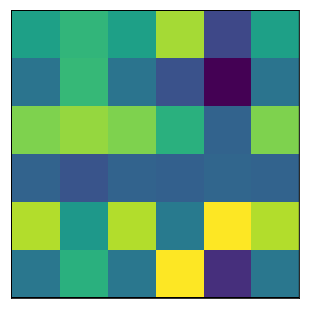

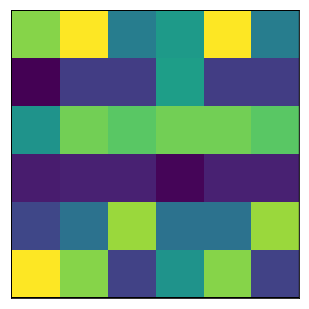

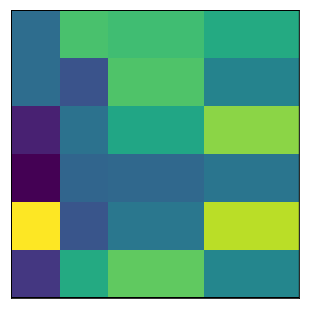

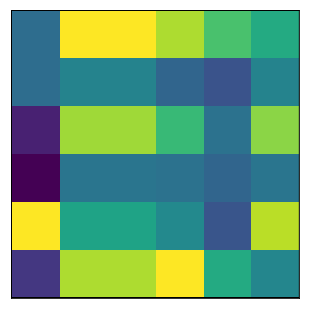

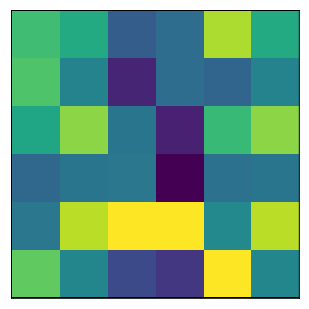

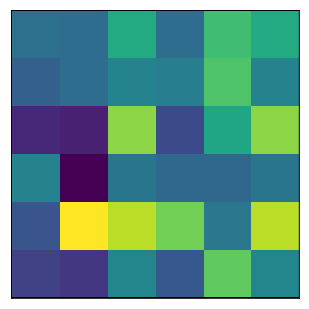

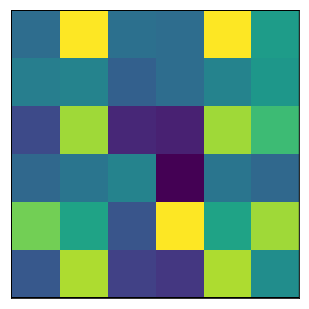

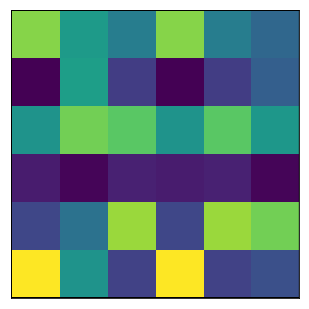

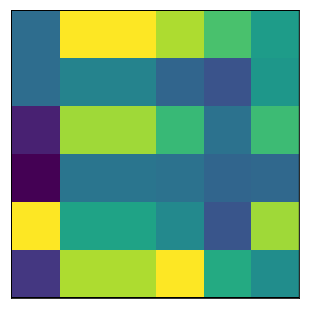

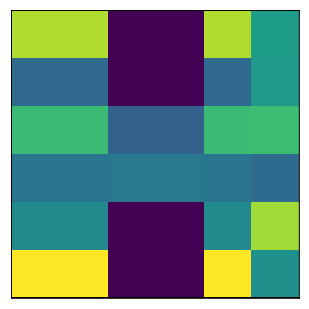

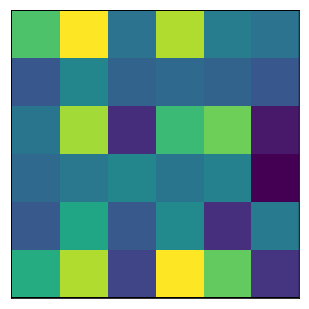

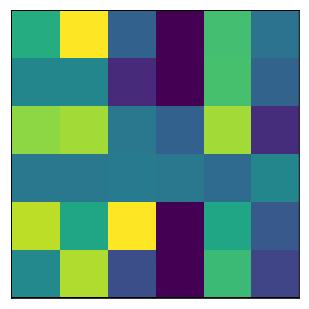

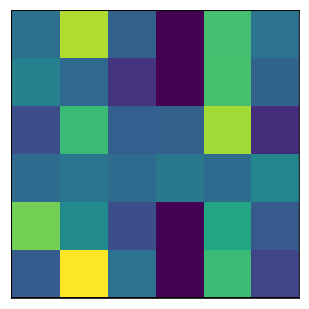

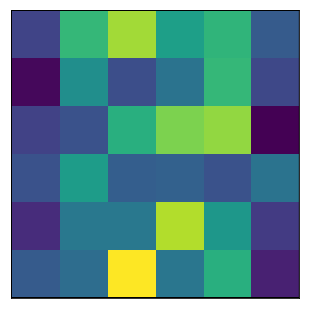

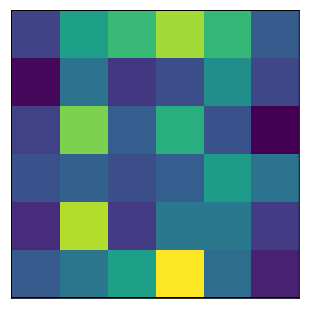

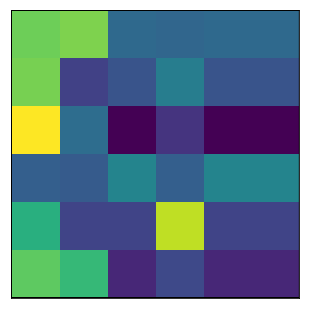

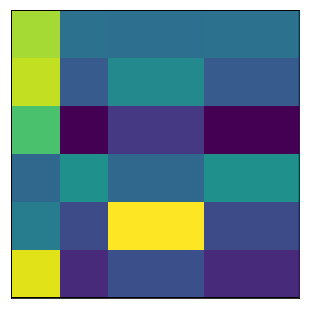

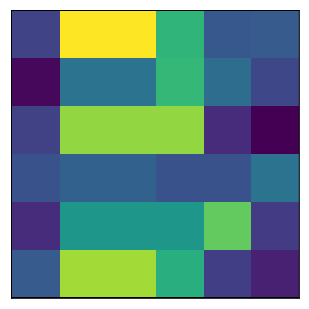

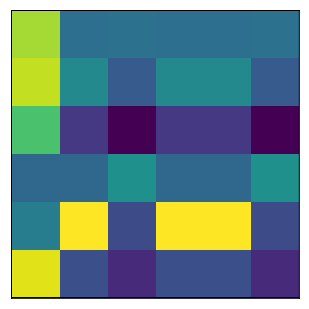

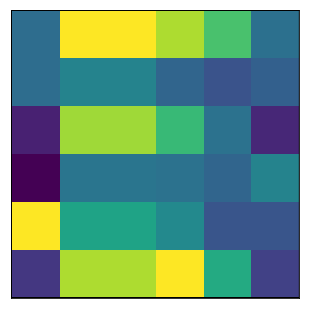

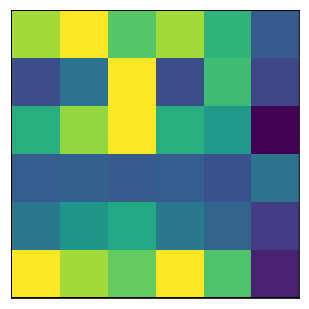

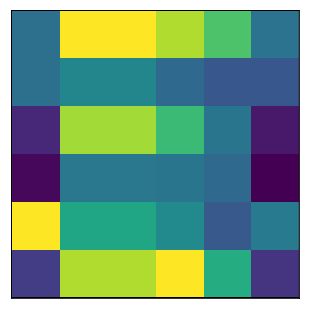

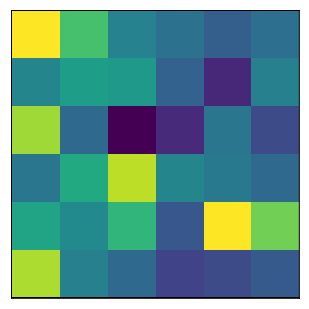

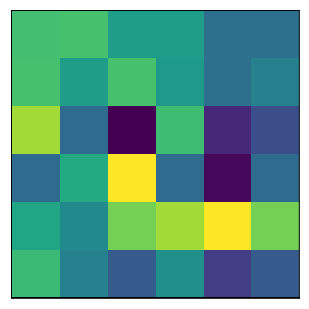

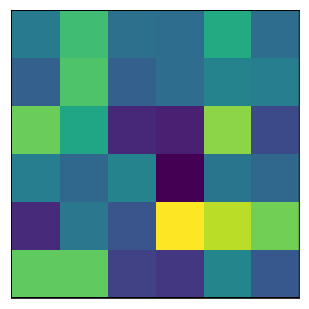

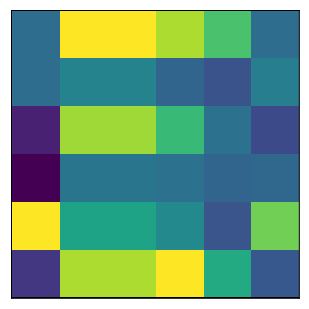

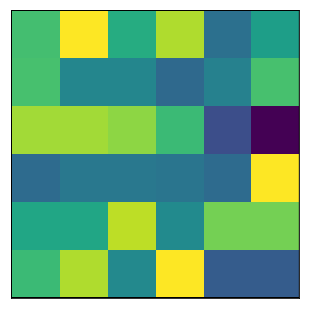

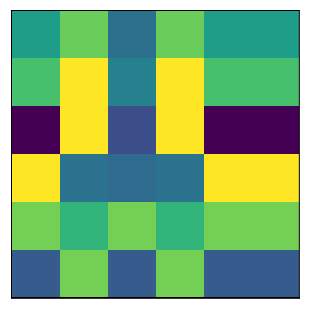

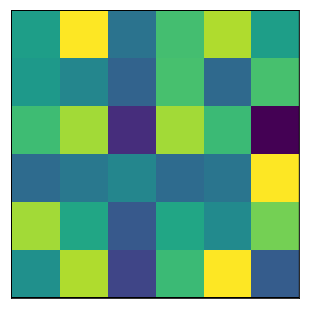

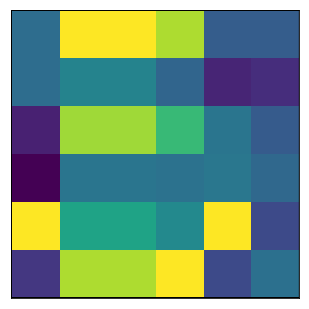

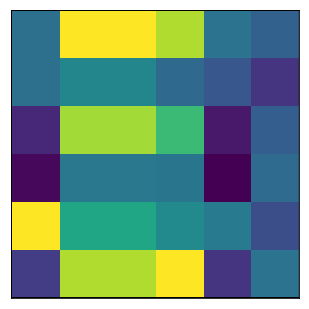

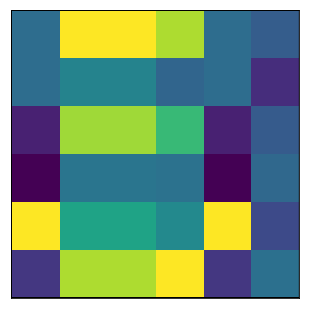

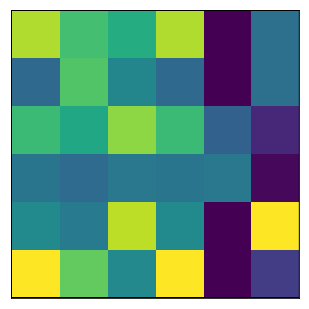

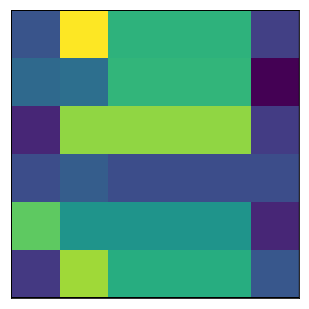

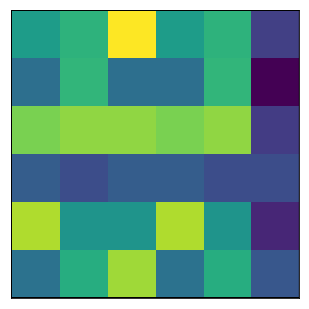

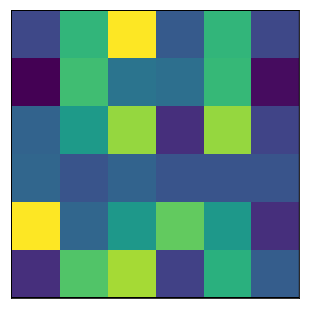

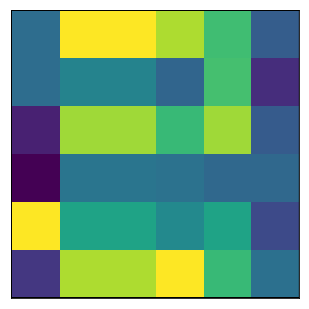

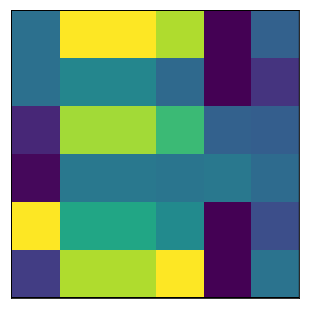

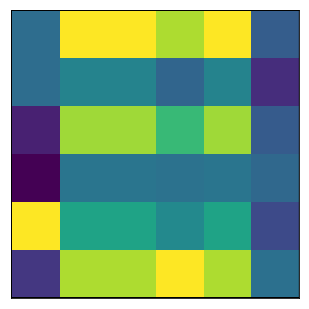

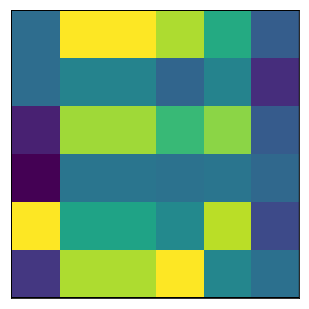

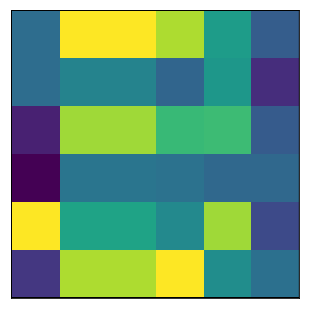

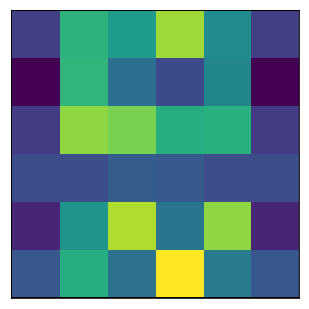

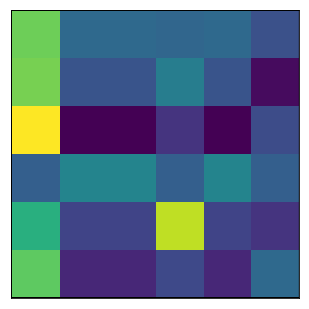

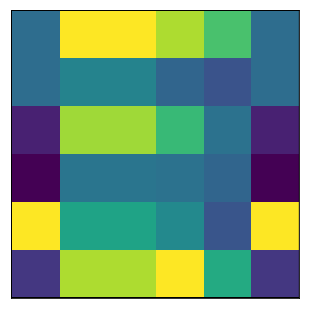

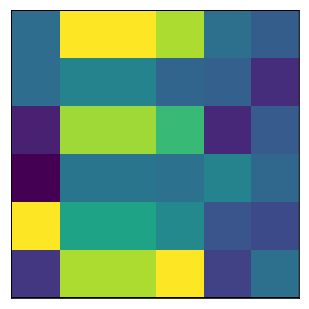

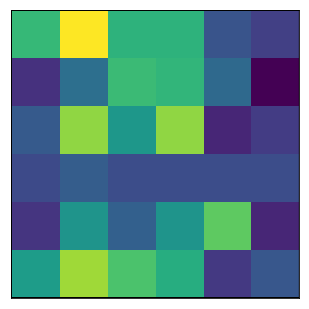

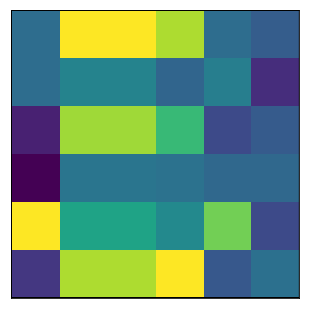

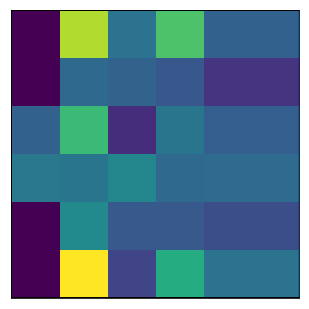

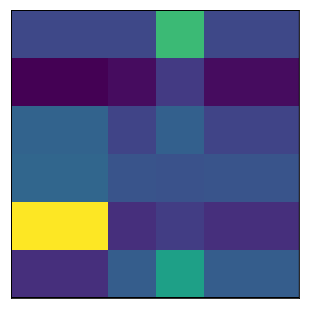

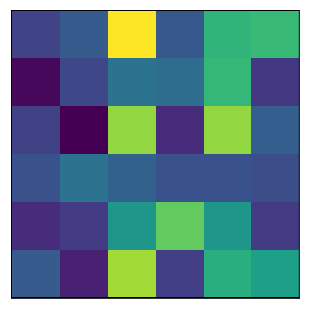

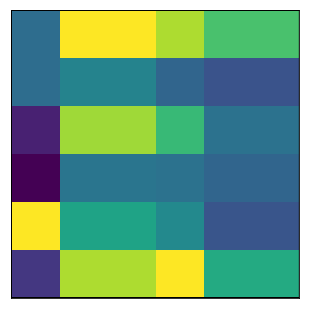

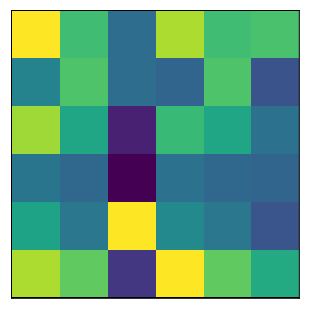

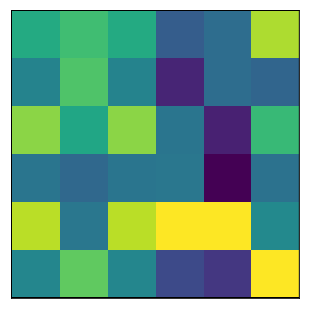

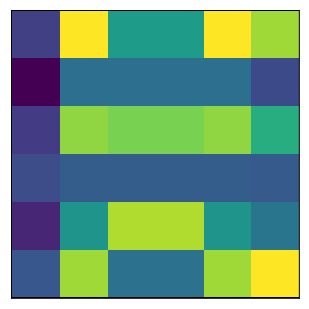

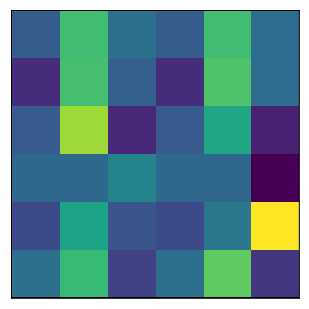

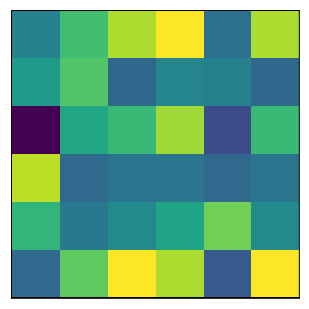

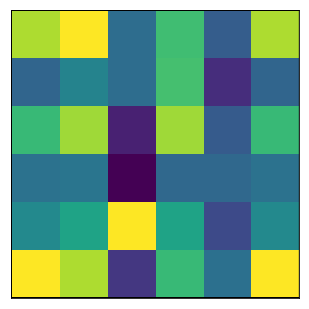

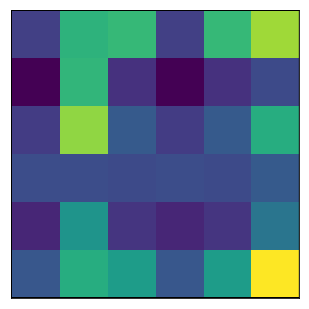

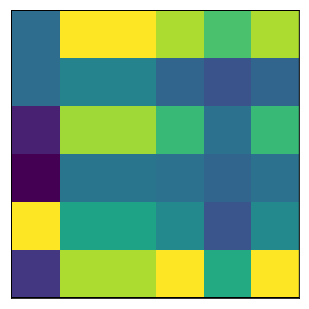

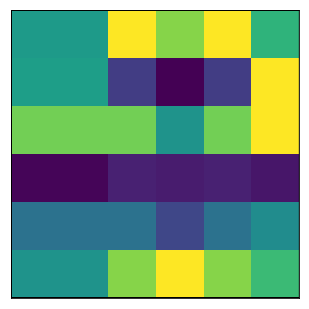

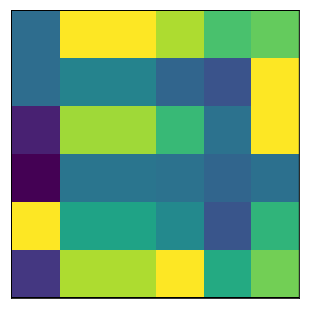

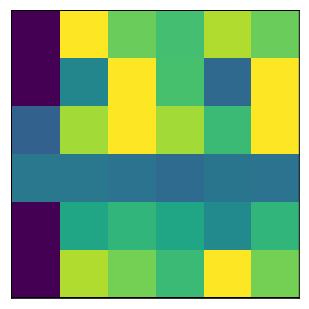

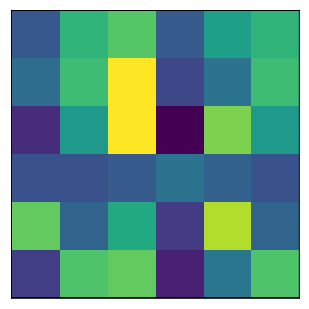

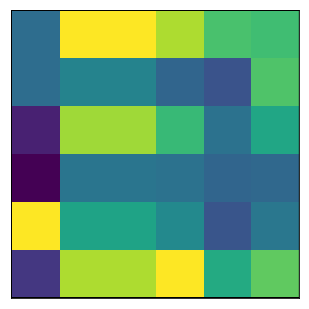

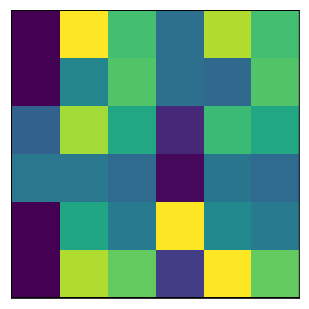

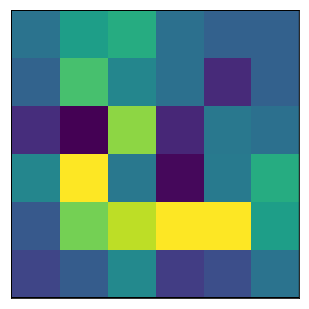

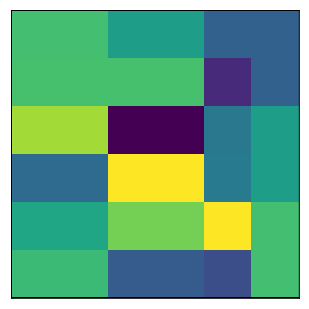

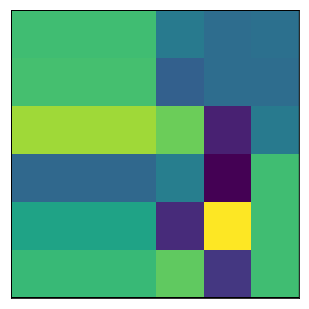

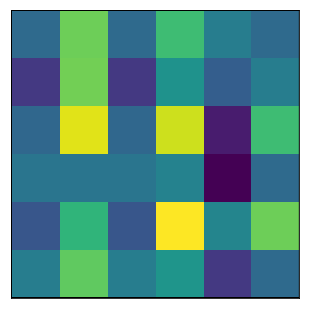

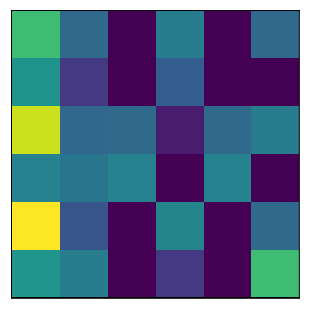

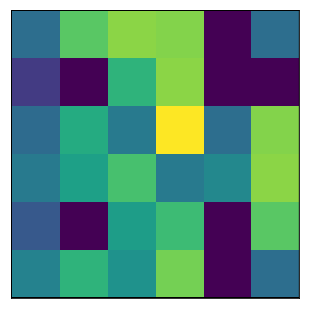

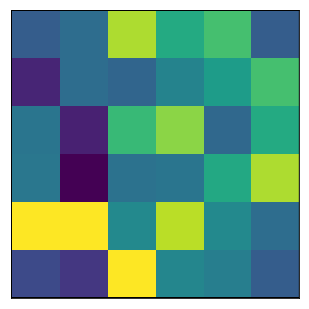

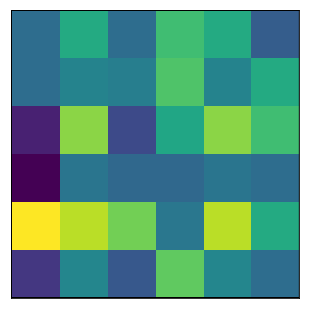

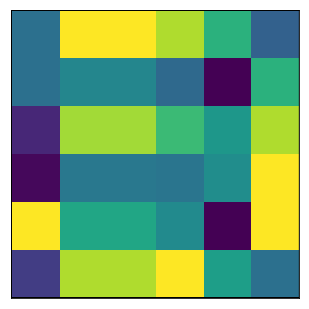

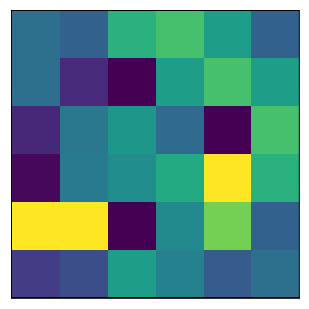

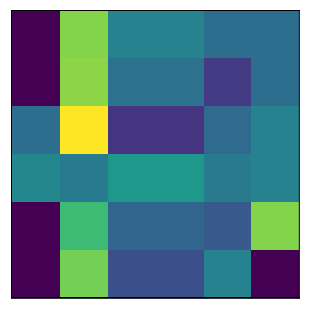

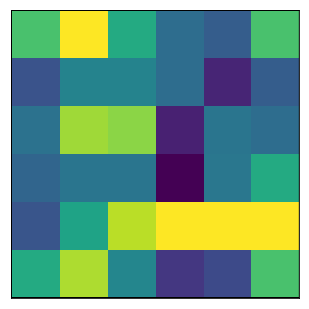

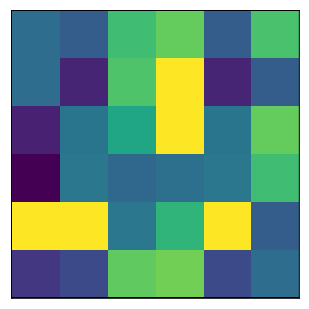

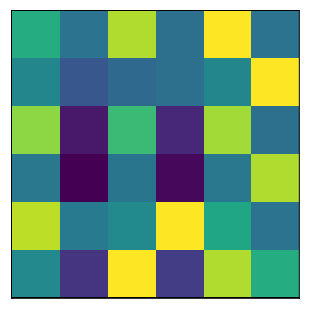

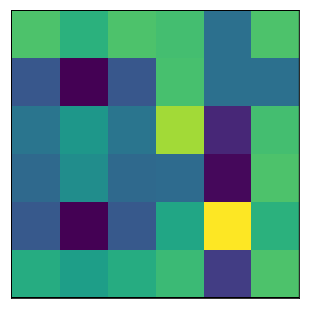

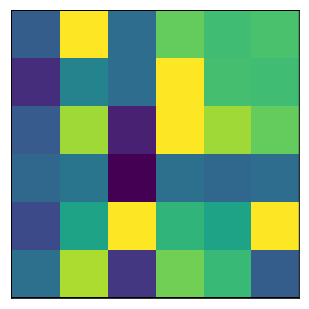

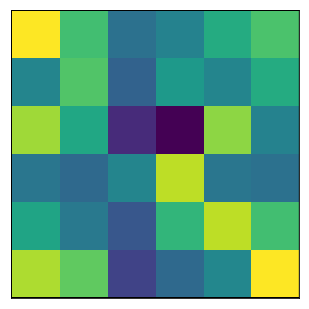

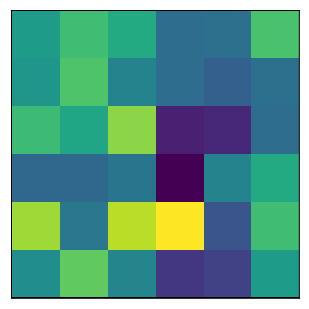

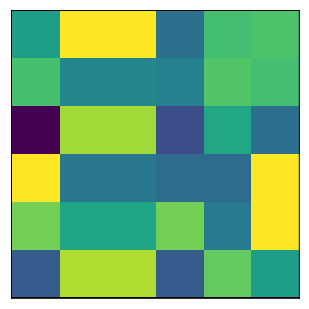

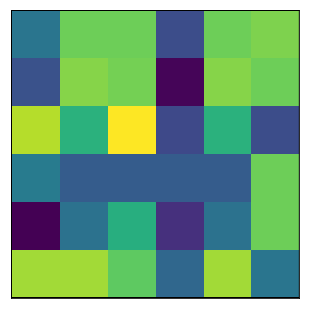

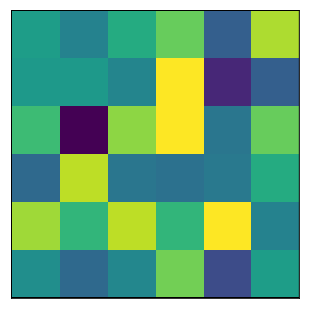

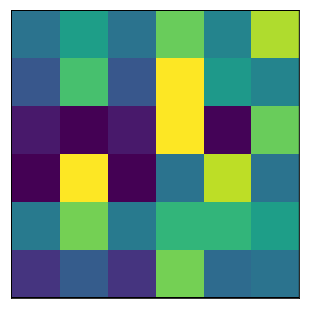

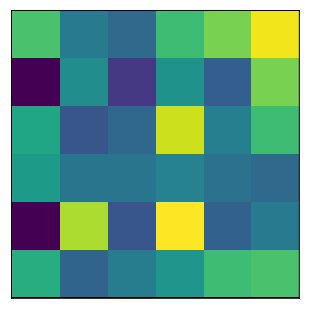

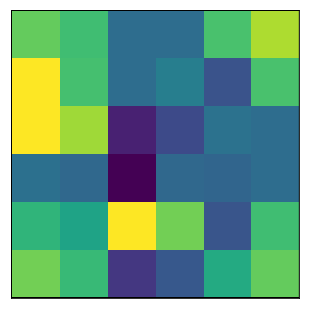

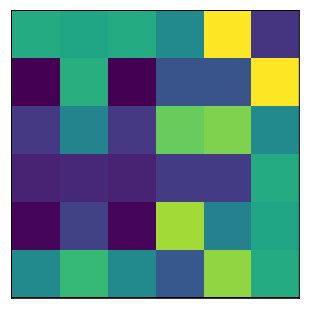

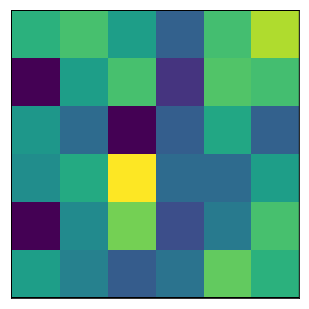

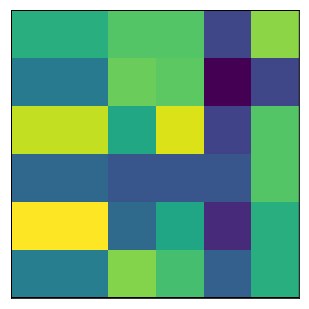

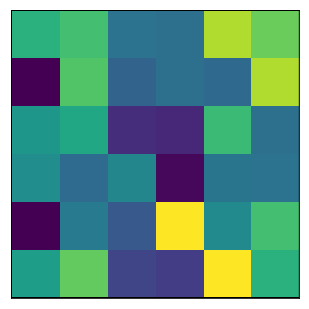

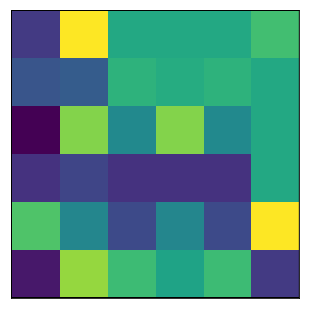

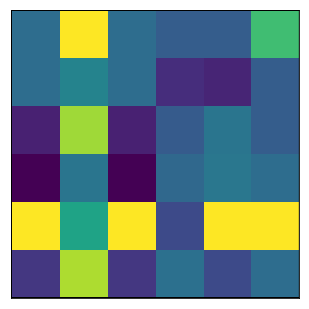

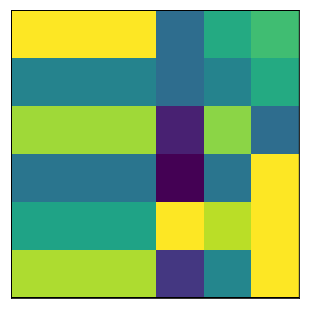

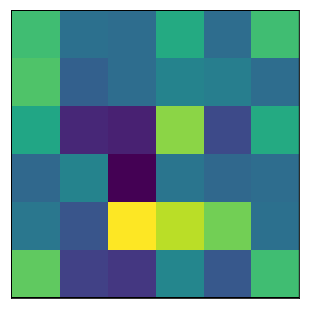

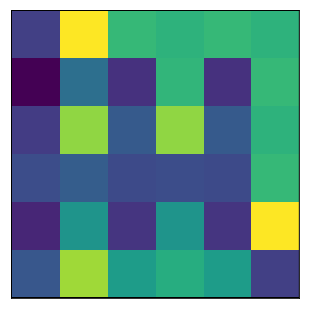

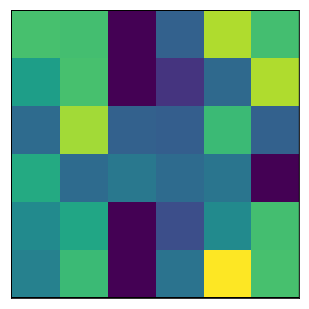

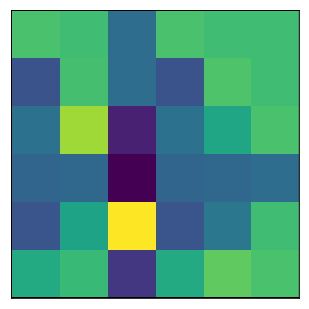

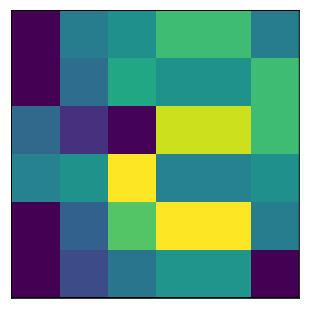

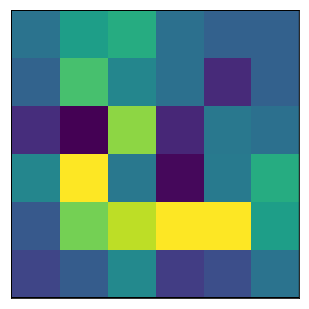

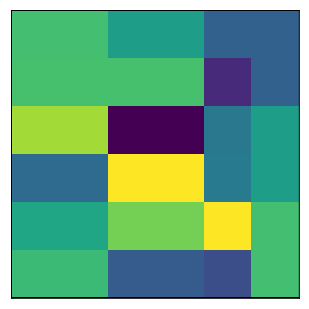

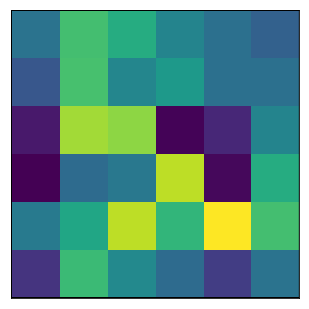

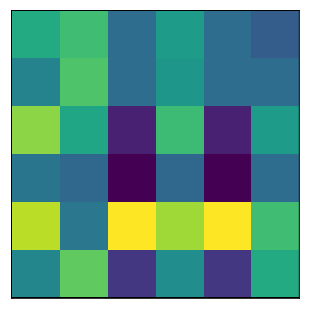

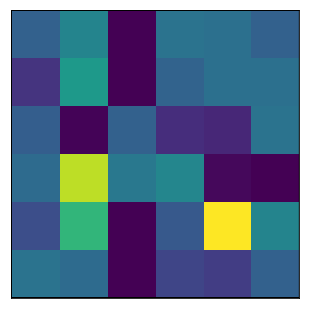

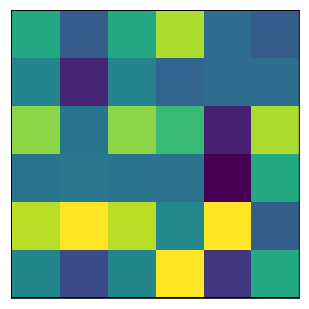

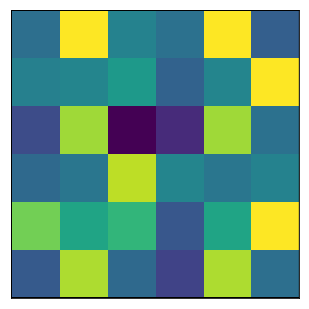

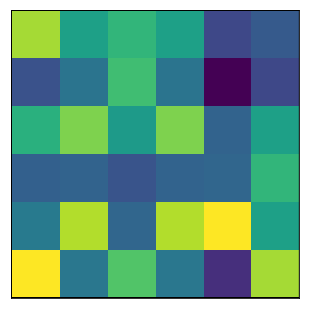

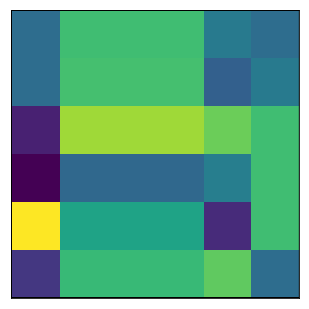

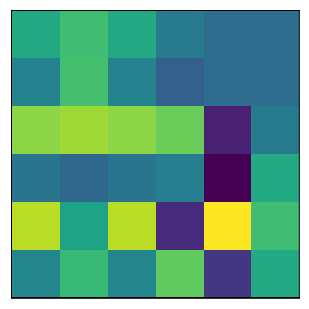

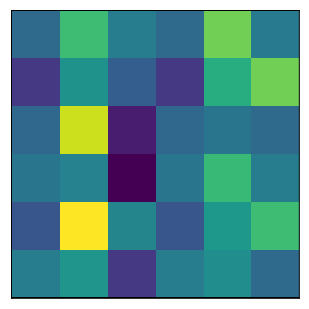

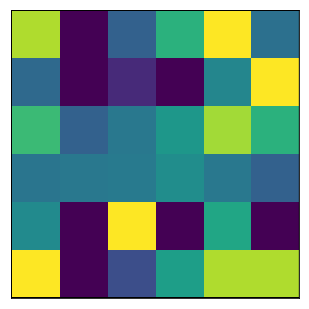

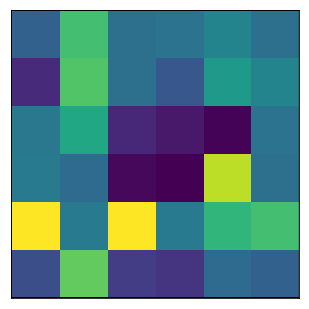

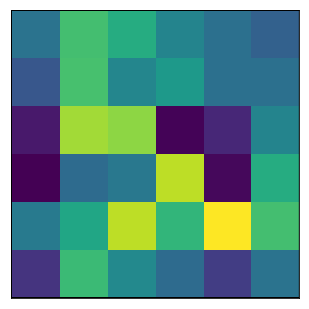

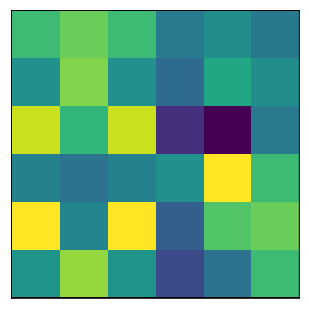

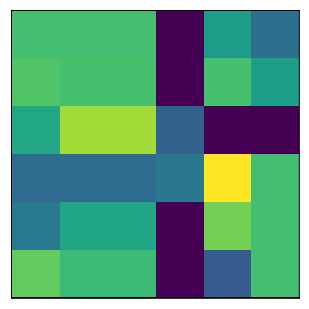

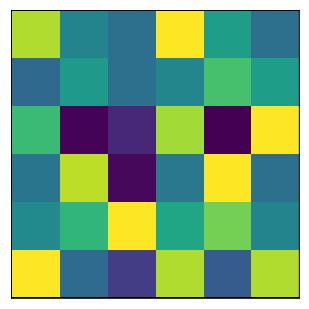

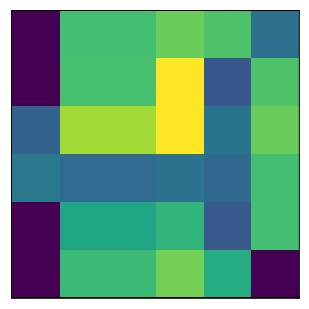

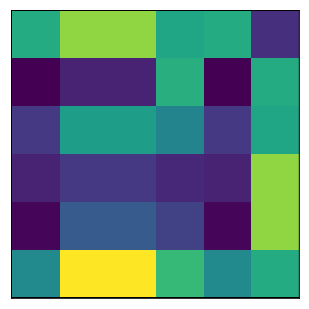

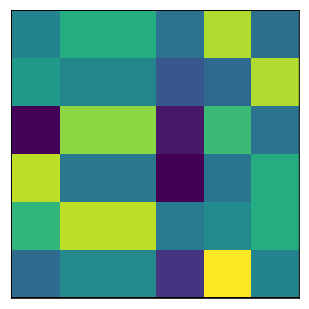

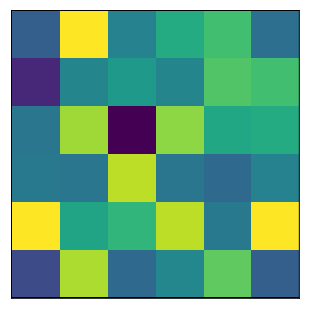

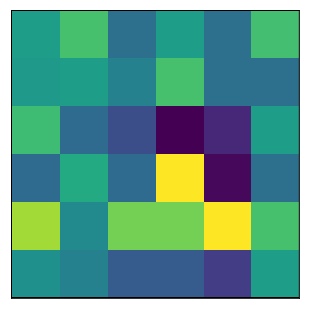

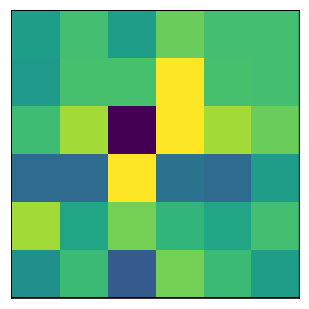

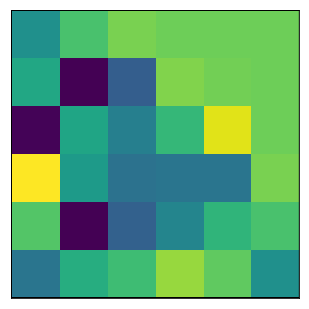

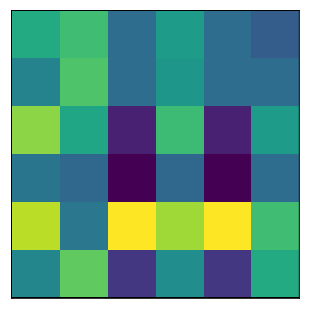

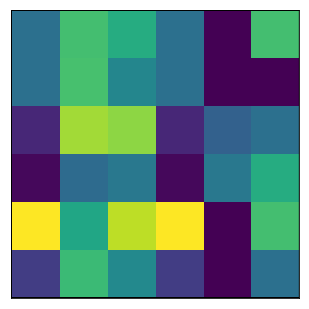

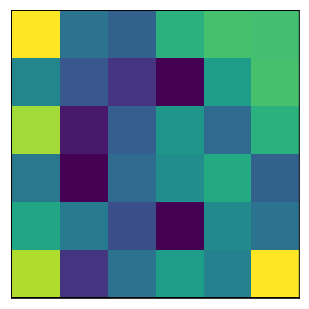

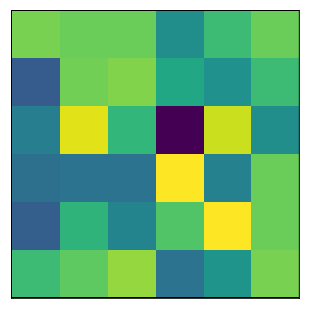

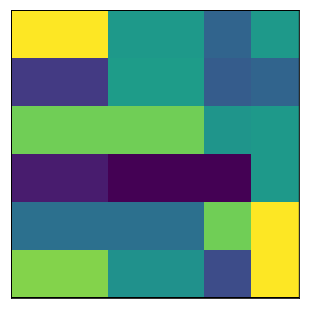

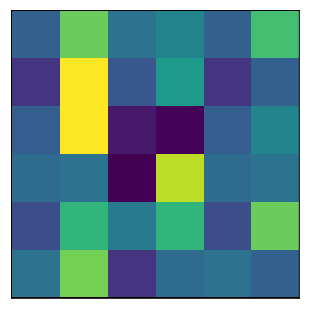

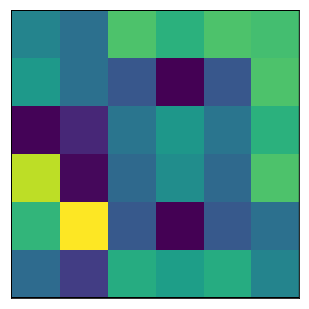

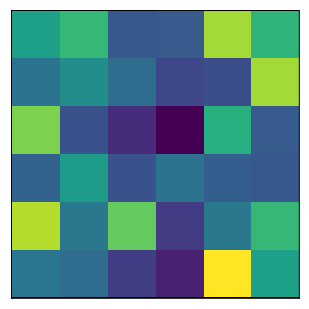

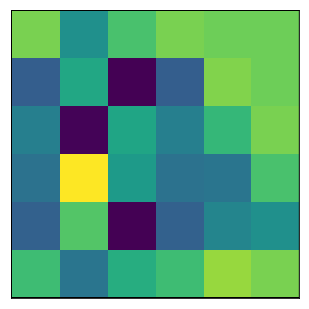

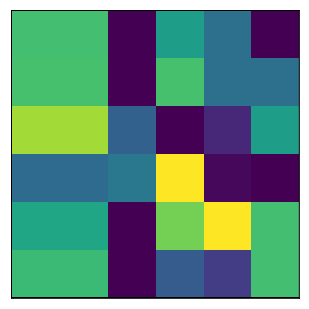

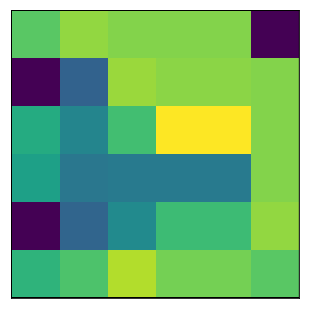

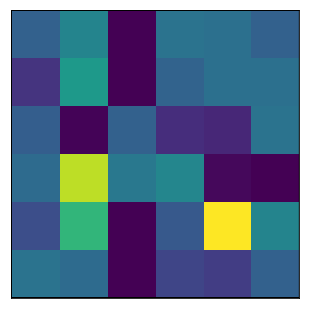

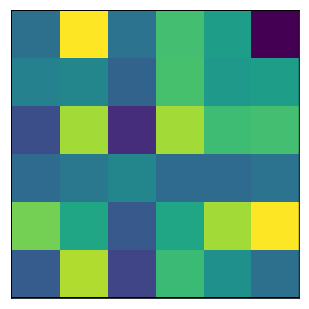

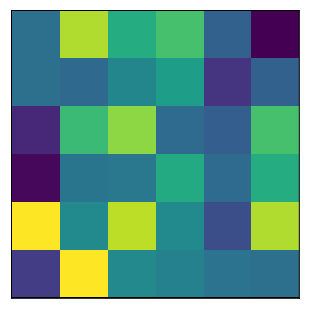

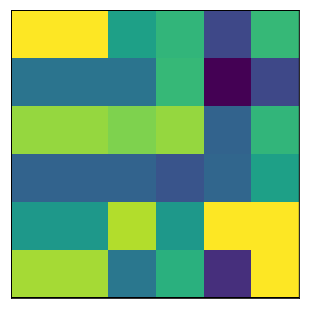

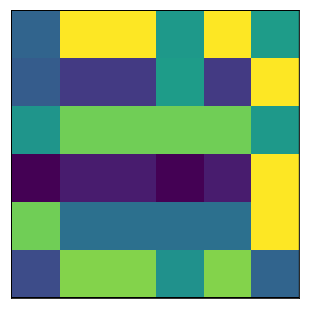

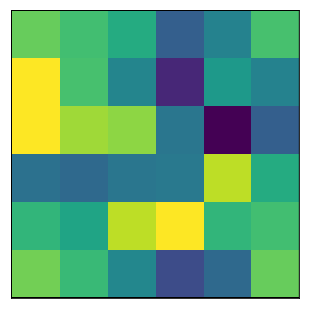

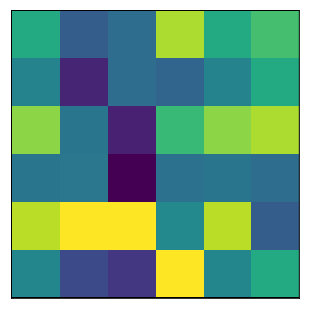

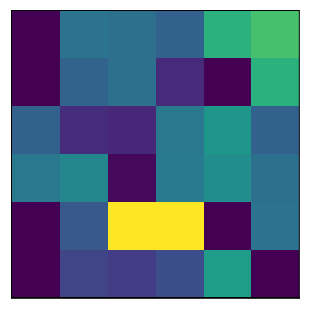

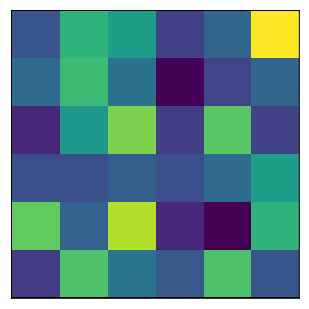

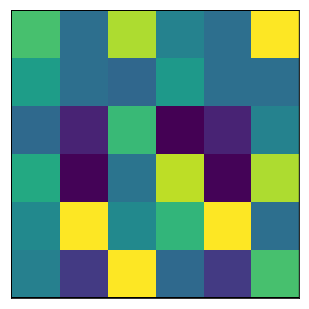

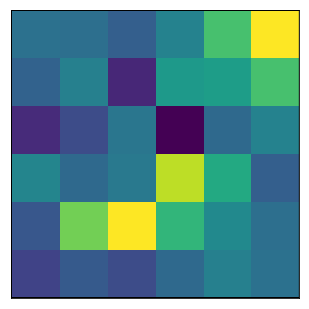

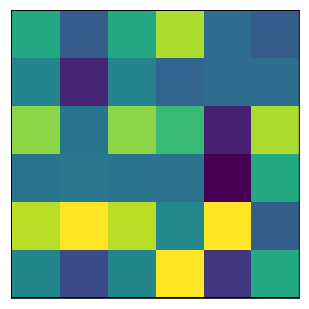

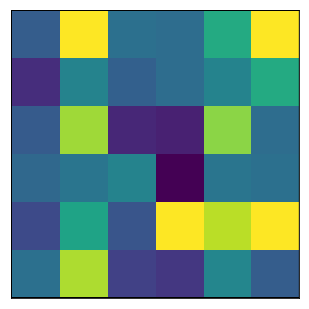

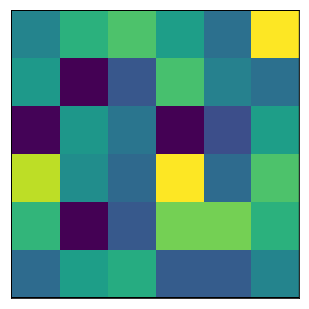

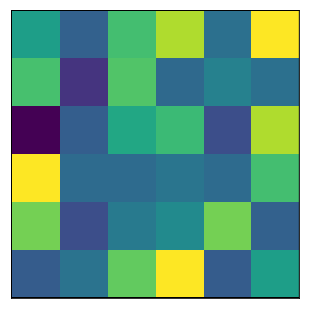

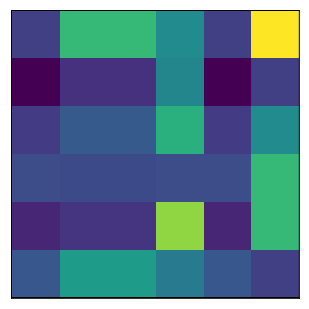

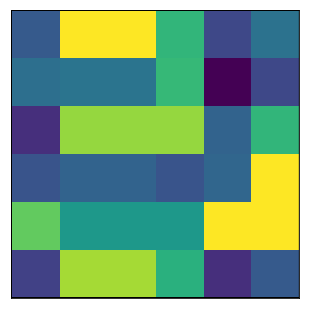

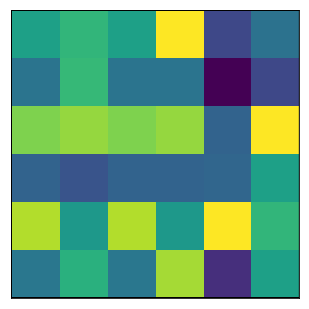

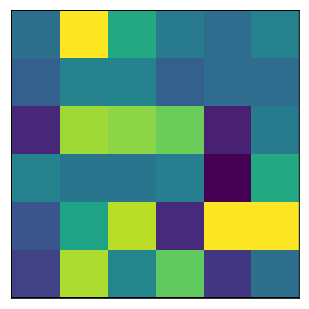

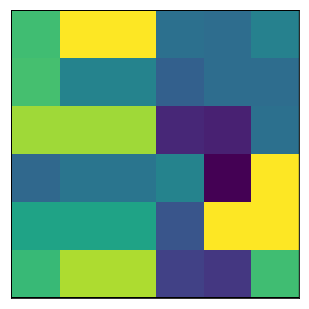

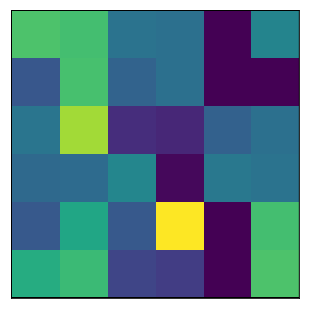

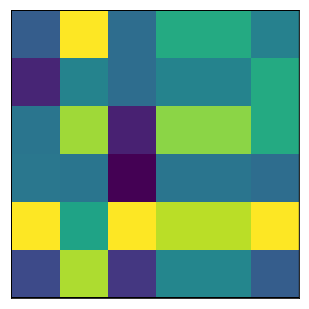

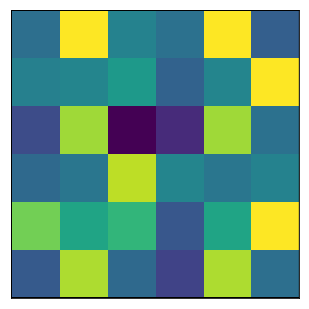

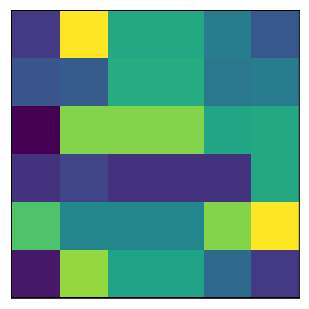

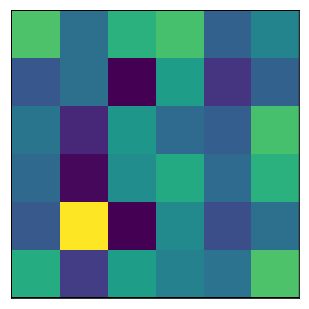

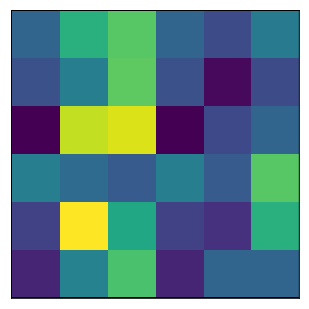

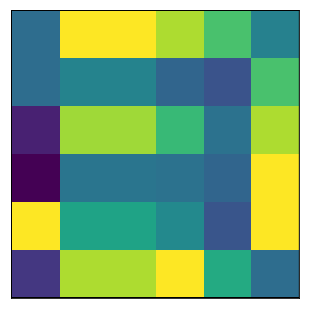

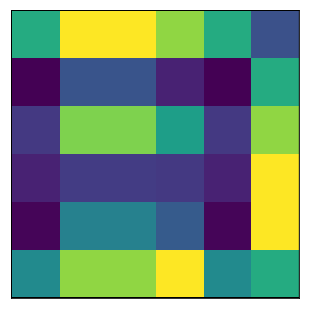

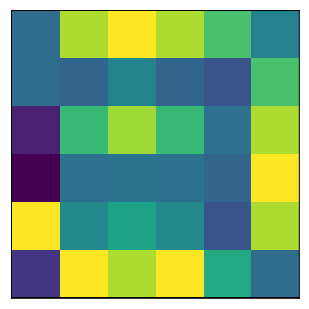

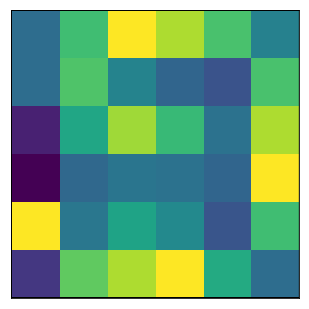

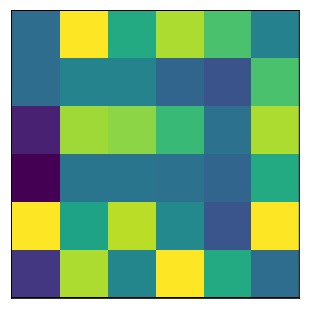

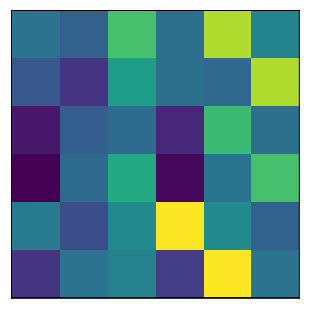

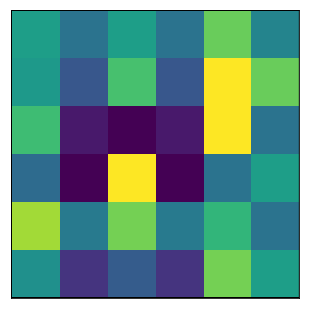

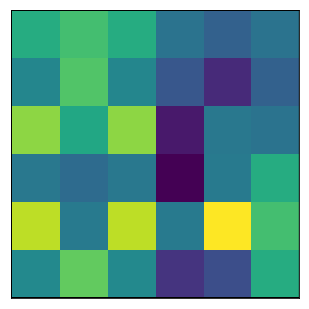

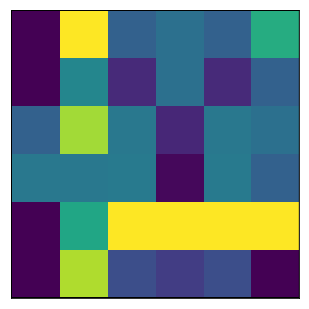

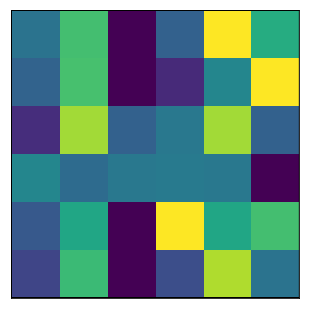

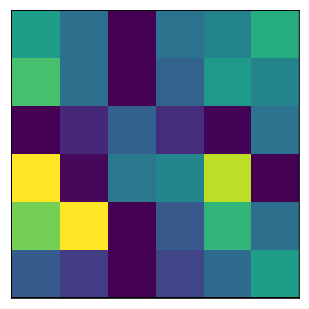

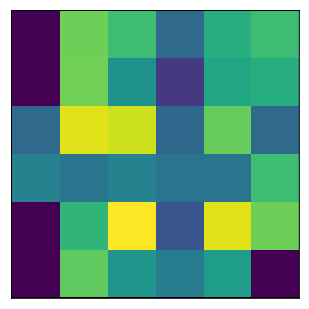

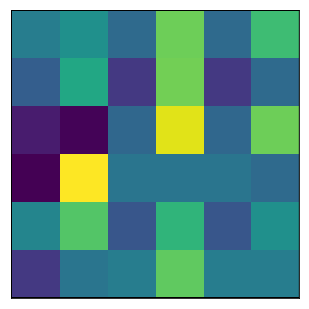

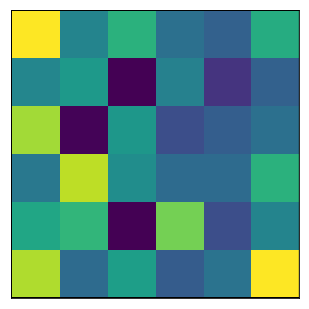

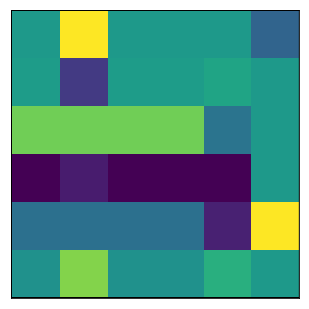

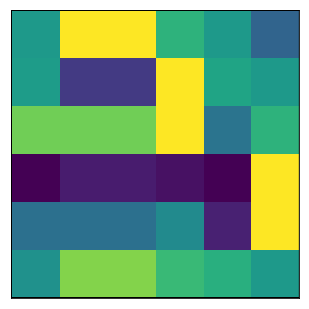

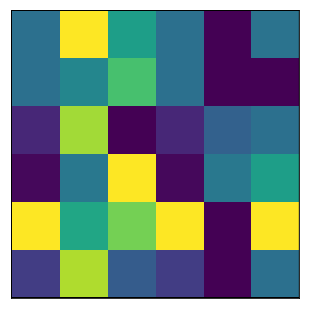

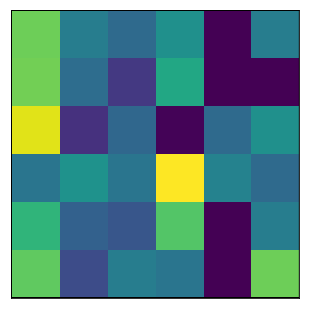

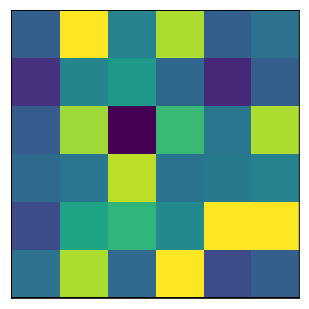

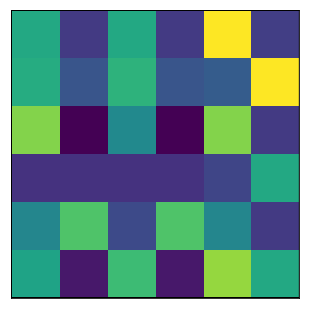

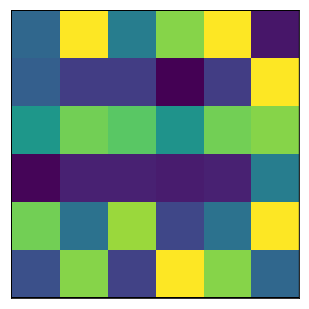

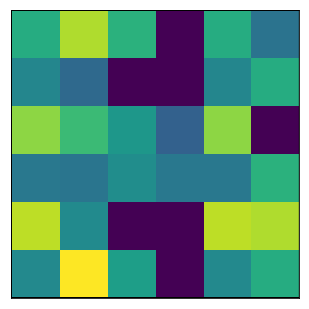

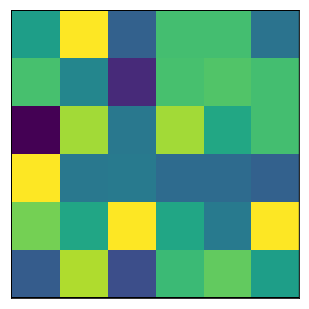

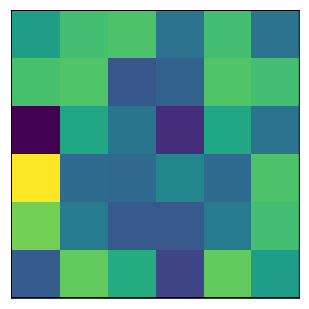

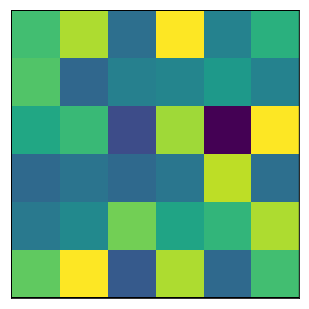

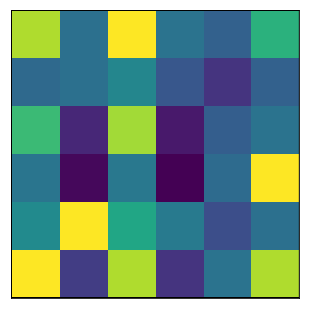

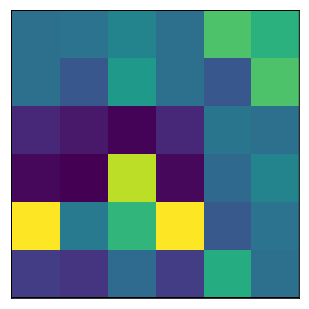

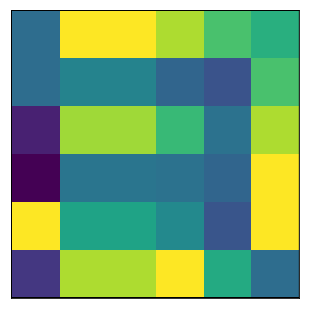

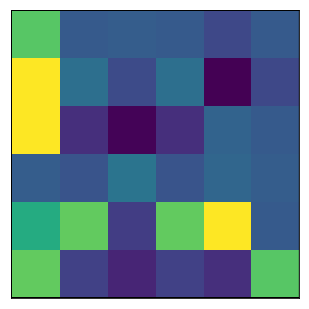

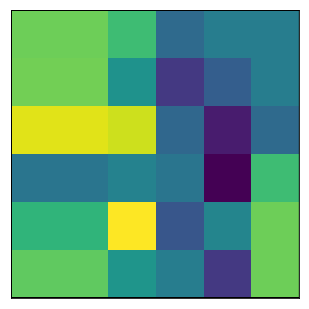

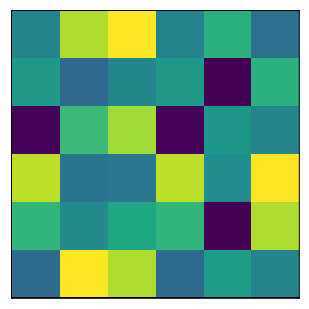

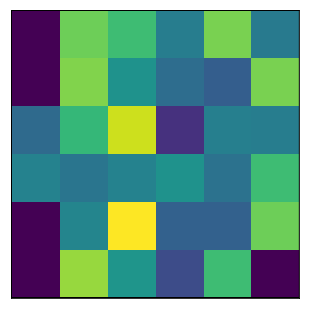

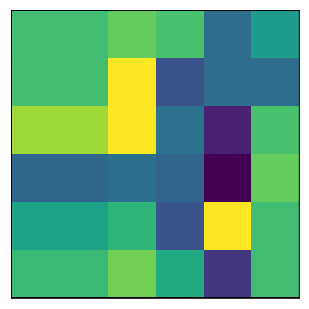

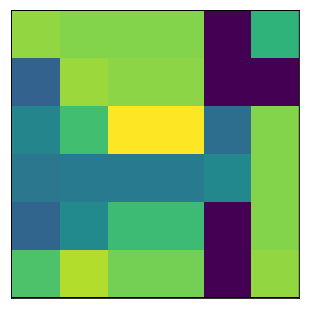

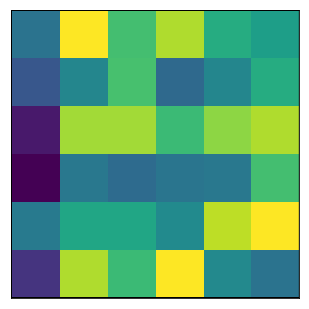

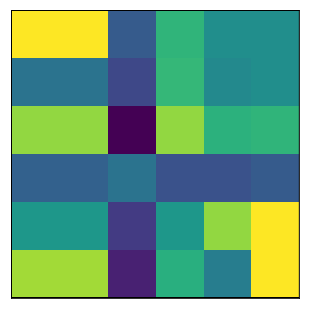

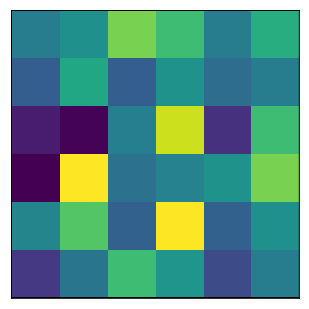

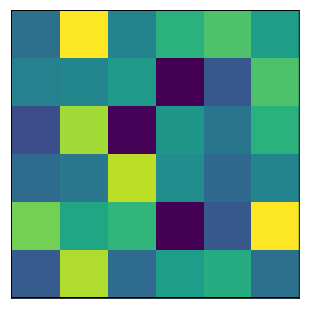

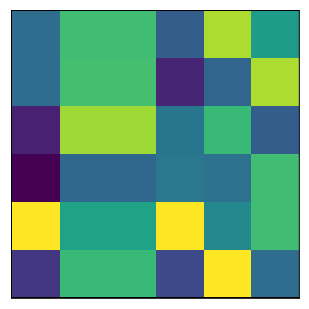

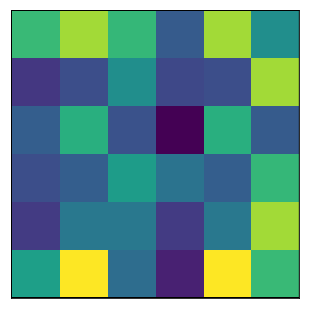

In [15]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/*.png'
df_list=[]
book_dict = {}


for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip/90_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Rotate 180 for clockwise in Image/Whole and save in Image/Whole_rotateflip directory

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_0.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_1.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_10.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_100.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_101.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_11.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_13.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_14.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_15.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_16.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_17.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_18.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_19.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whol

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_115.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_116.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_117.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_118.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_119.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_120.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_121.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_122.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_123.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_124.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_125.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_126.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_127.png
C:/Users/user/OneDriv

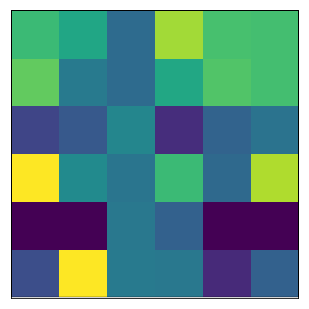

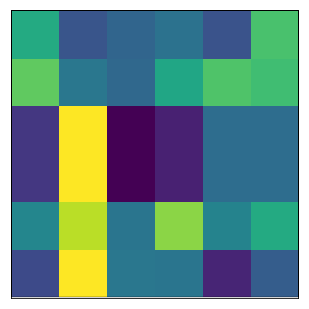

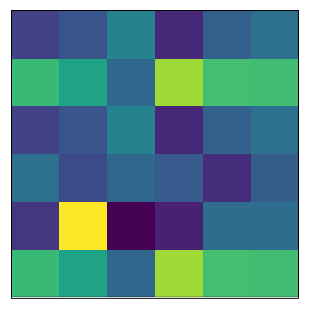

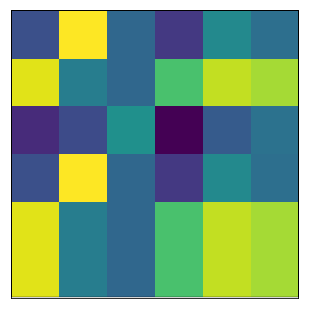

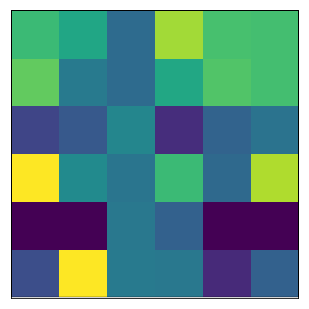

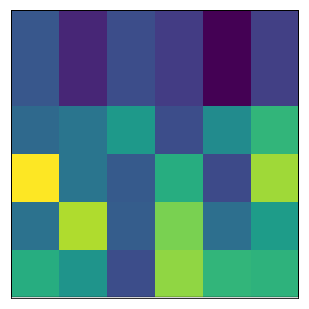

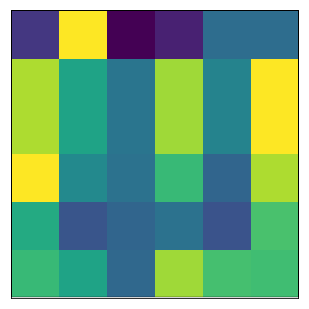

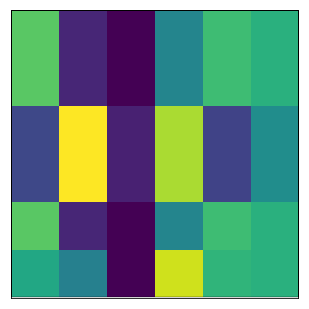

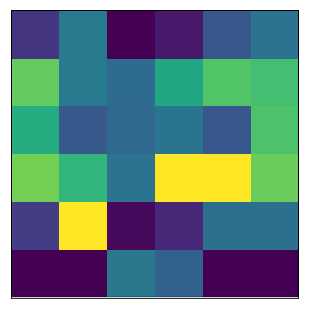

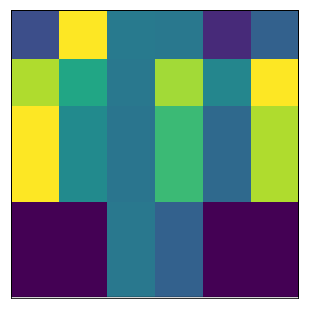

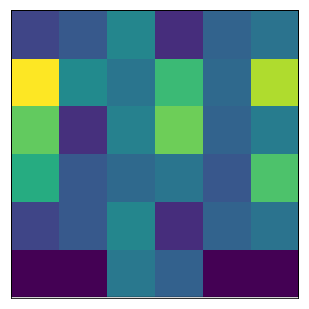

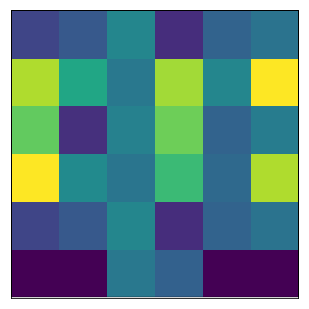

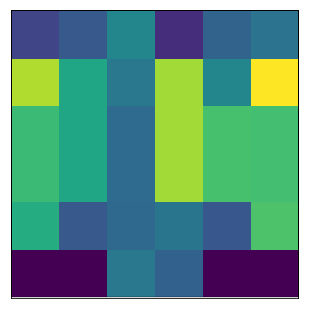

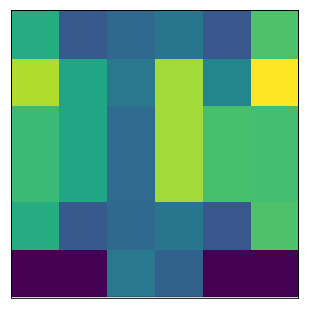

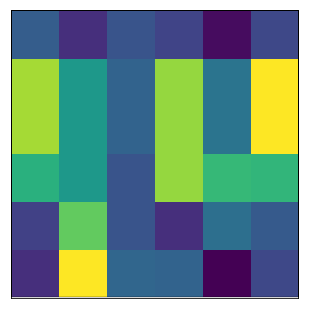

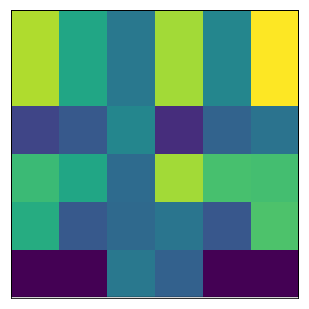

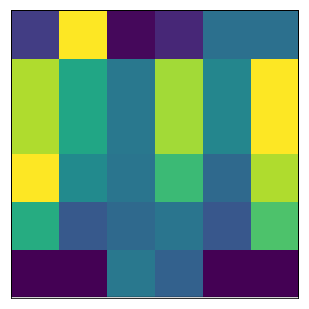

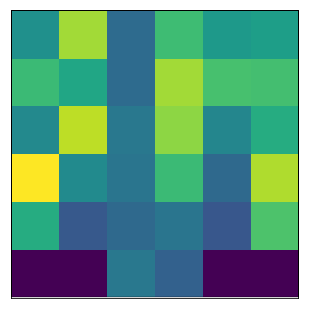

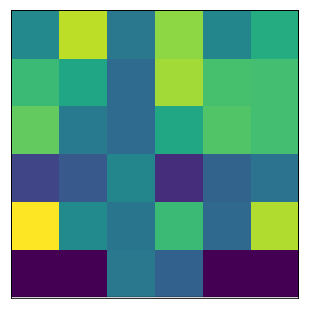

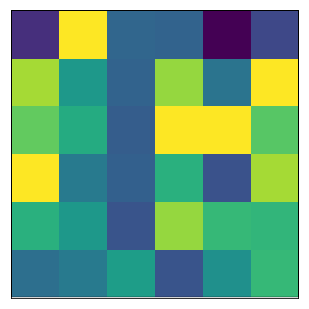

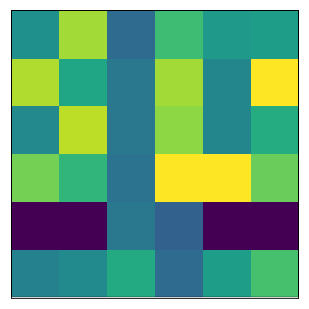

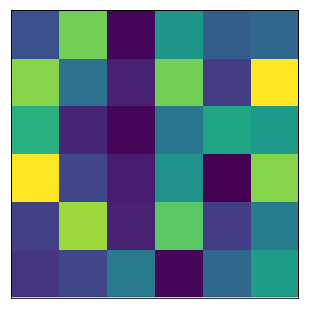

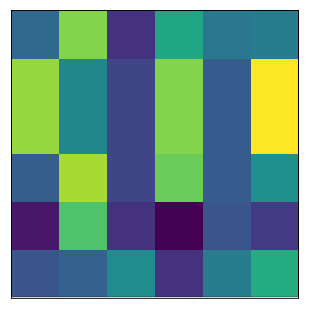

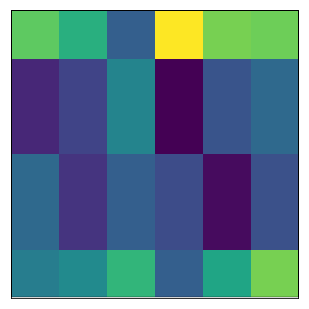

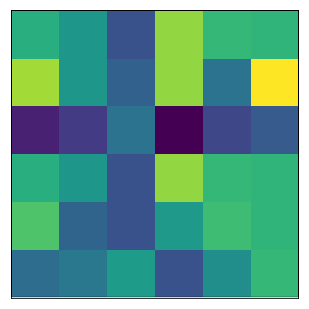

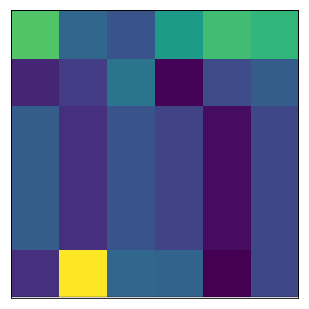

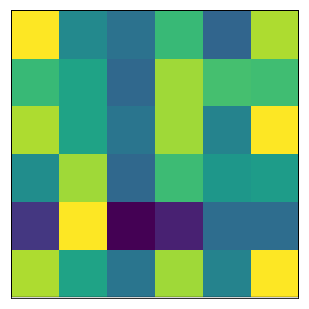

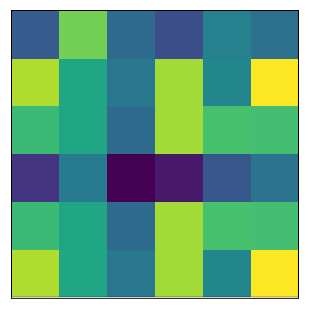

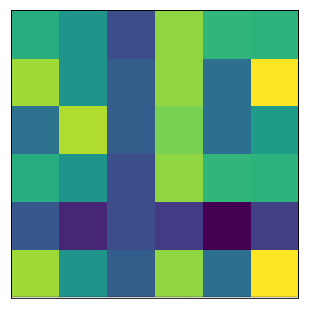

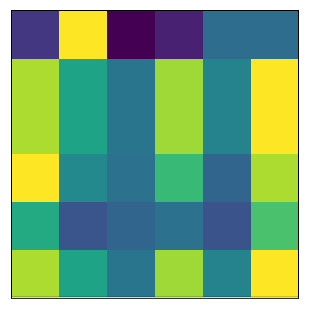

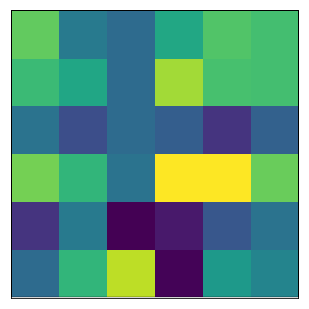

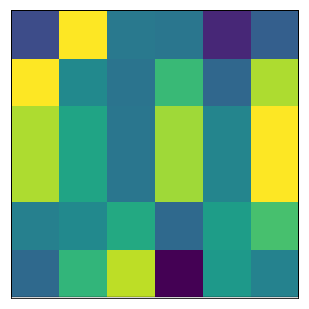

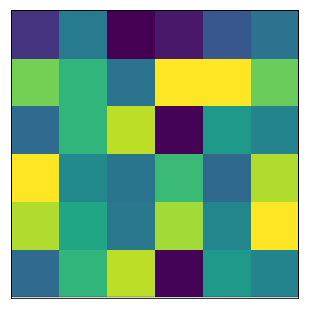

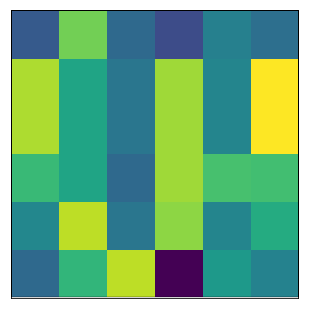

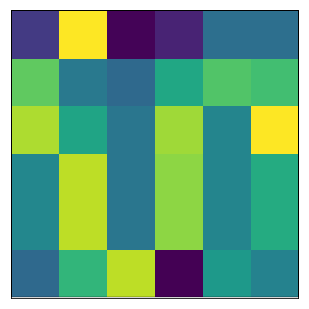

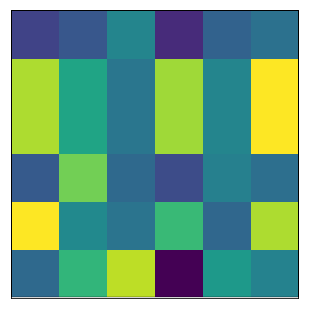

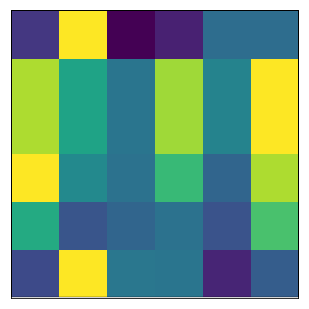

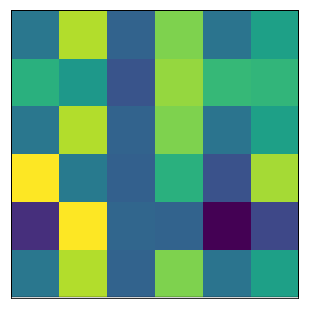

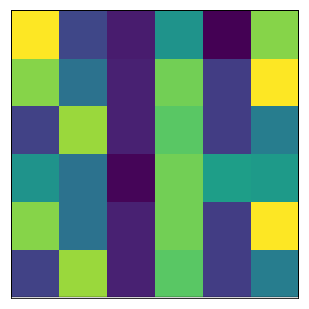

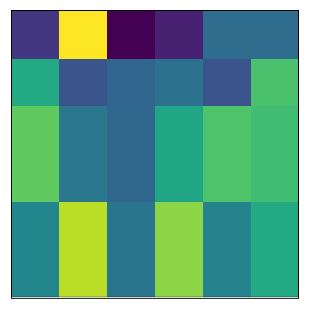

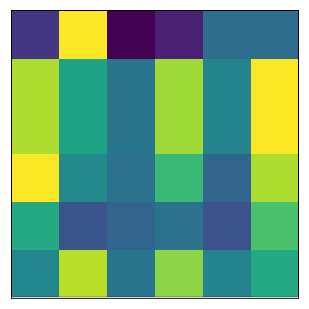

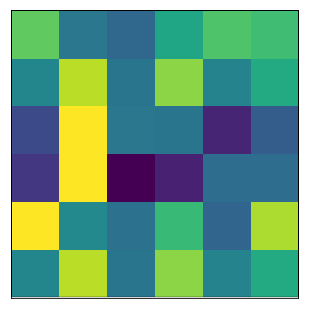

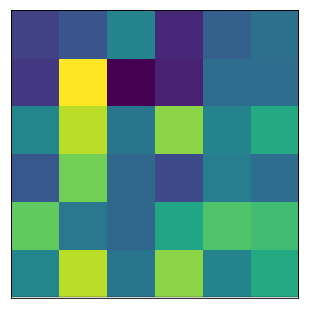

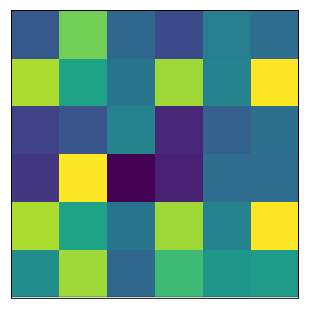

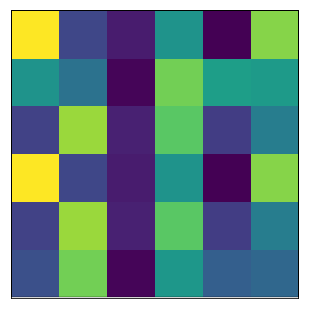

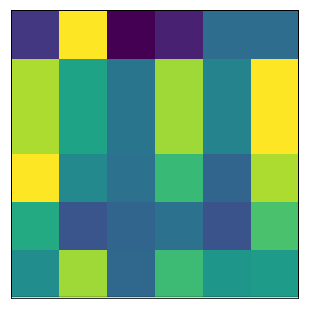

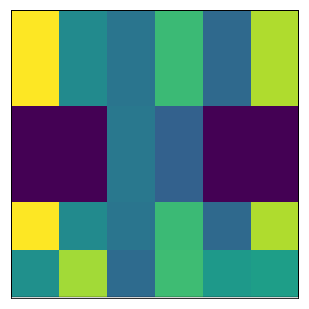

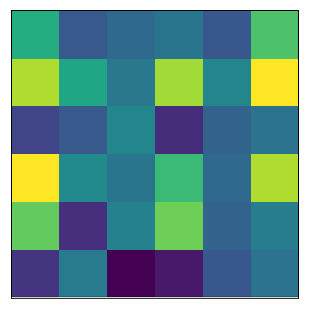

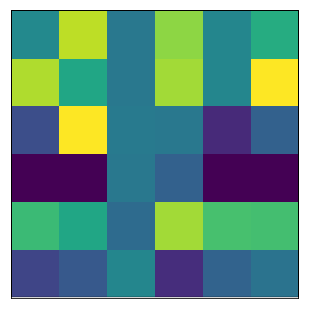

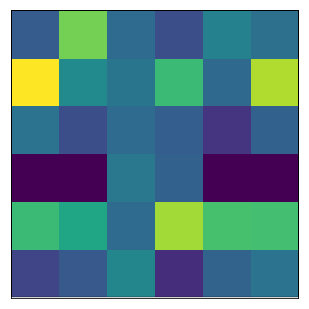

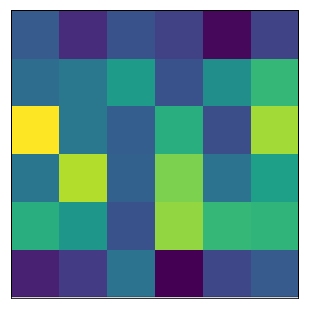

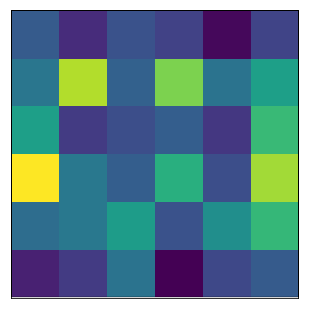

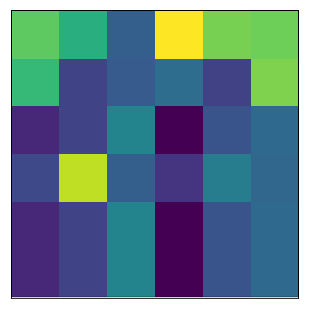

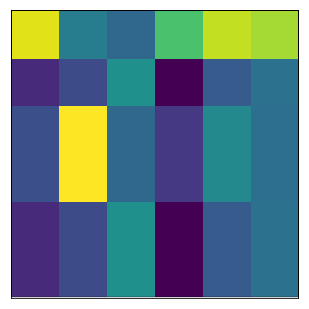

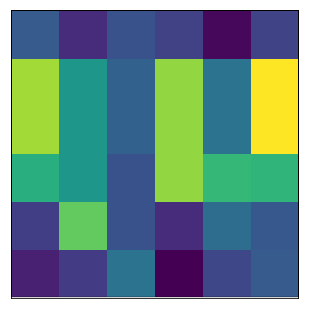

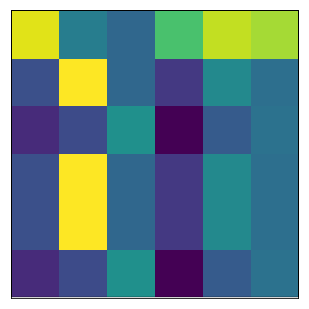

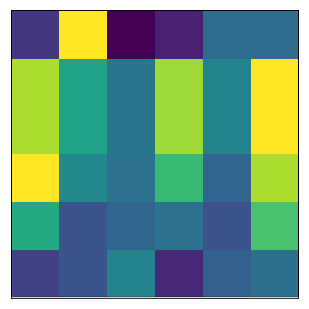

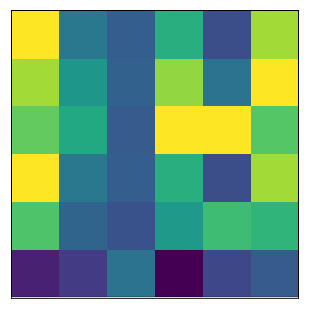

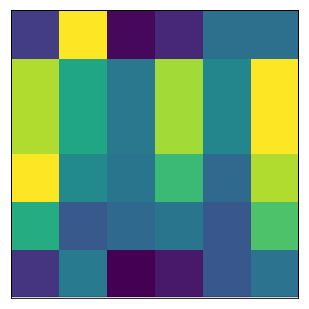

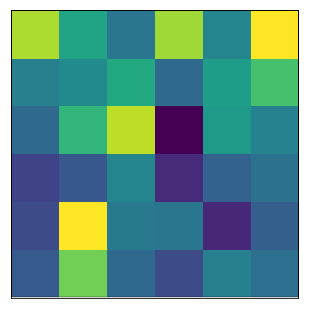

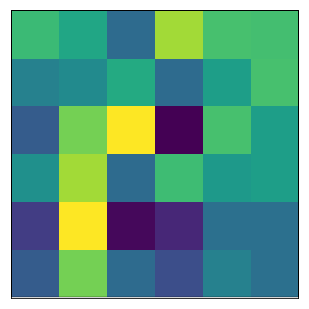

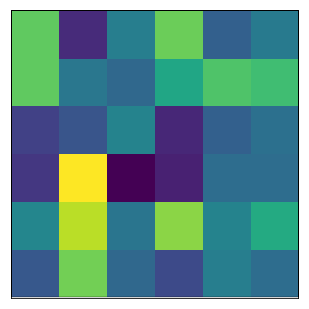

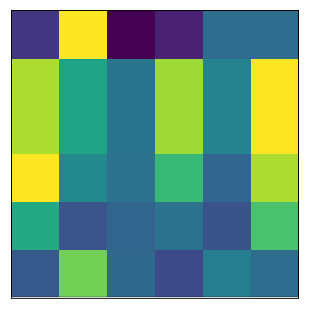

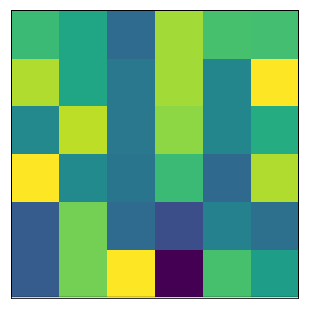

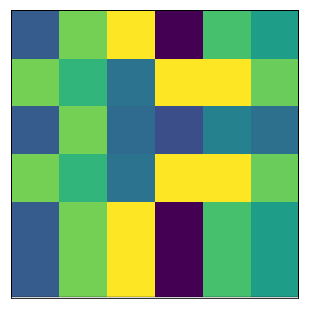

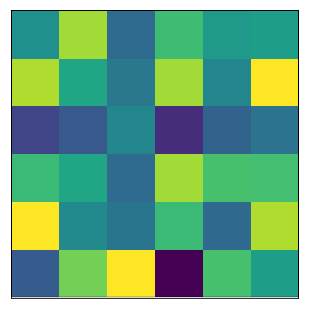

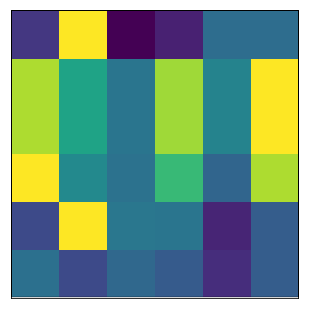

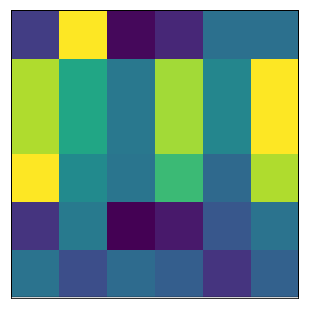

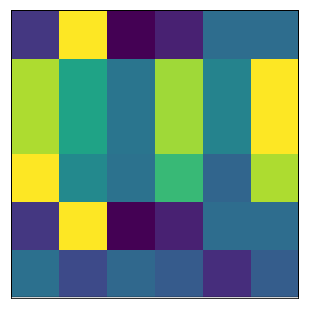

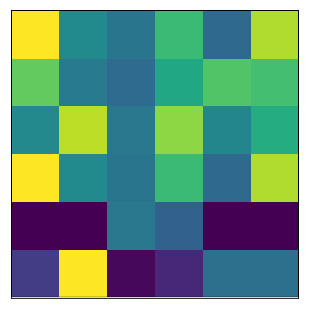

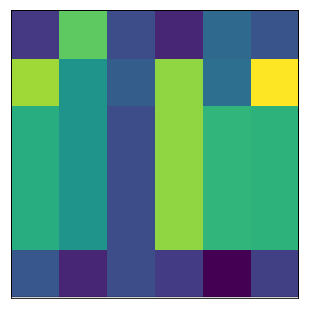

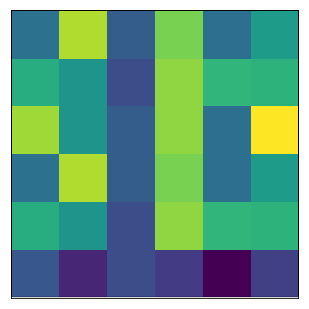

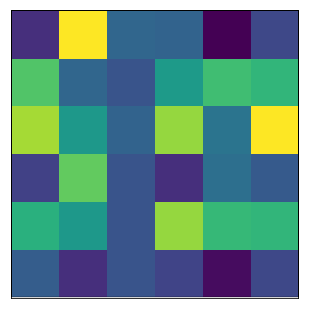

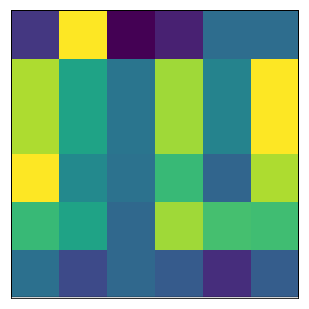

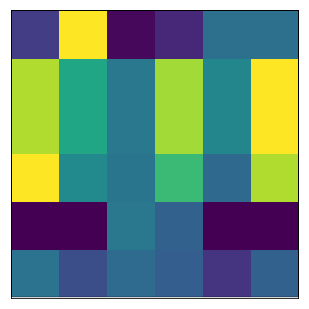

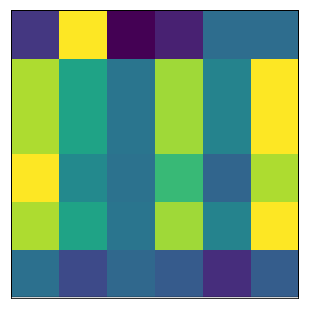

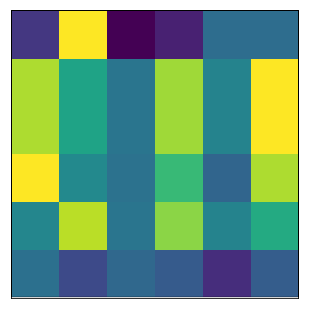

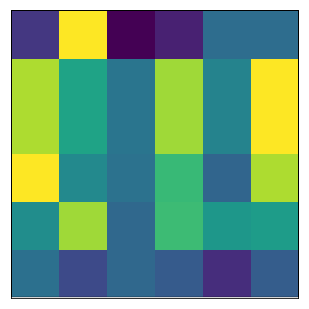

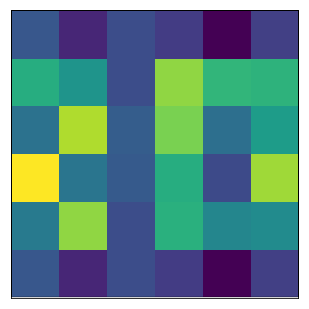

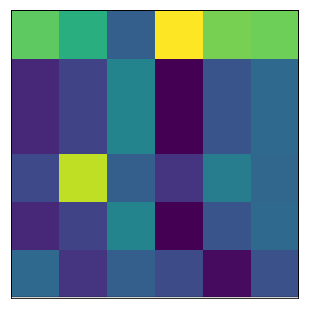

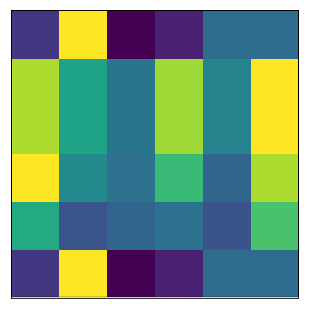

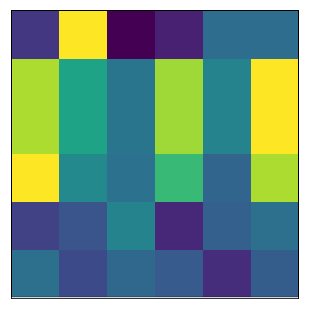

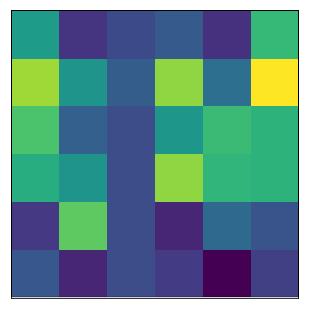

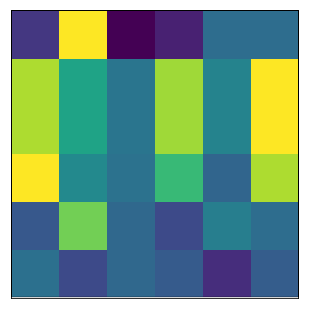

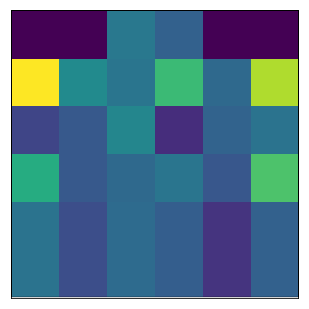

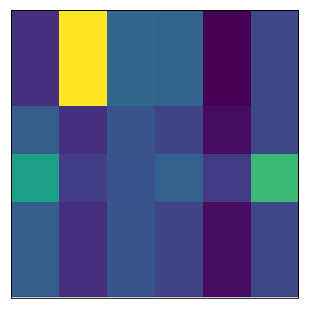

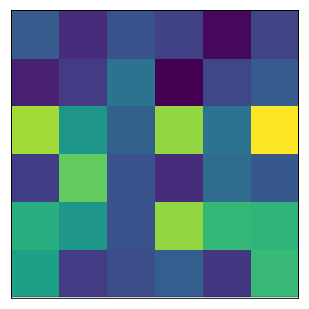

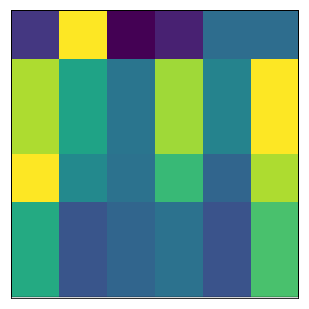

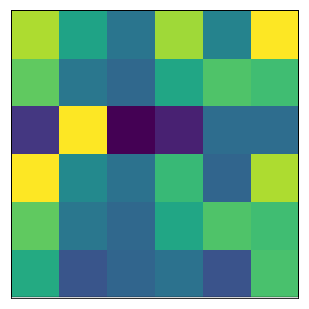

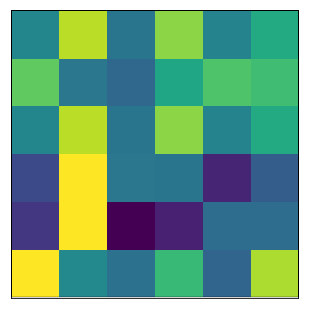

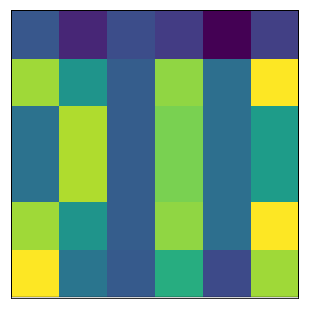

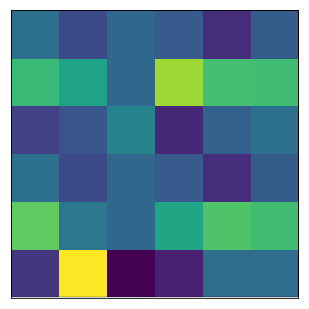

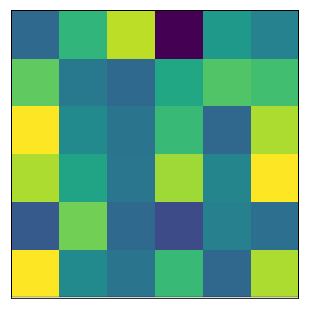

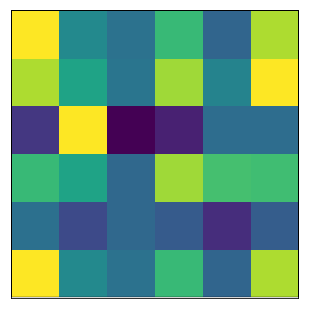

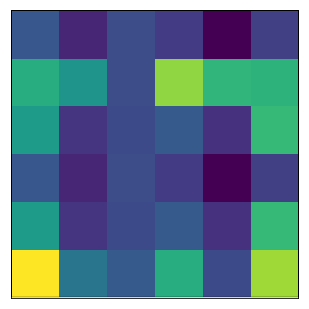

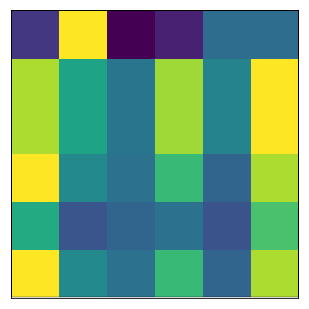

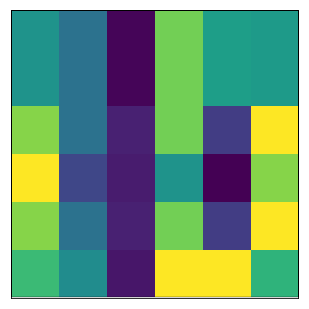

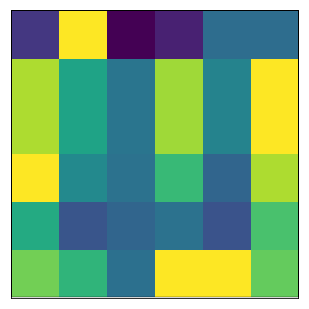

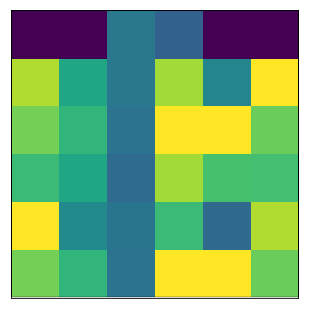

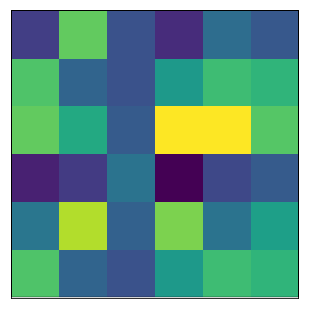

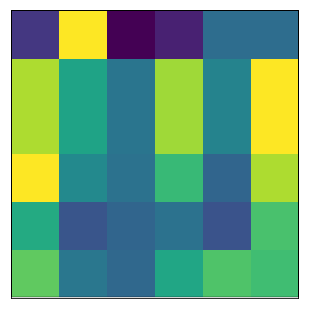

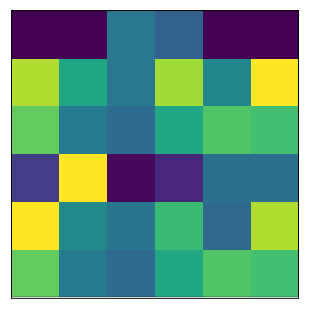

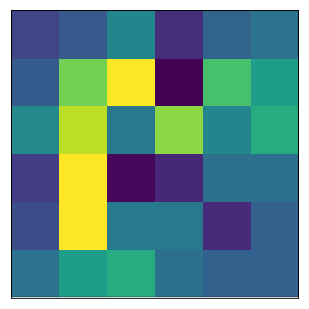

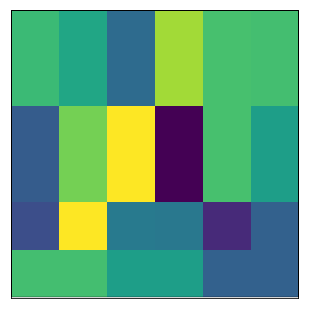

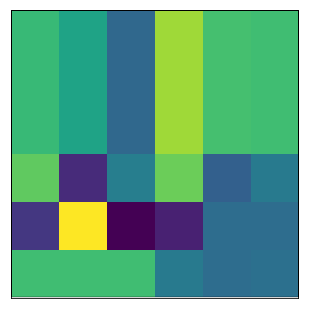

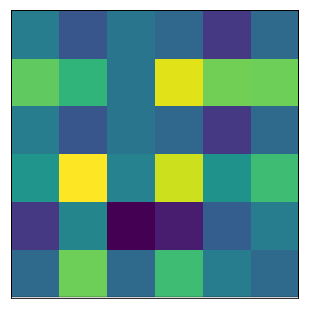

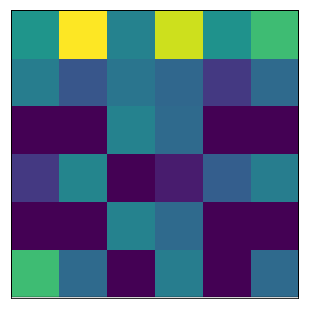

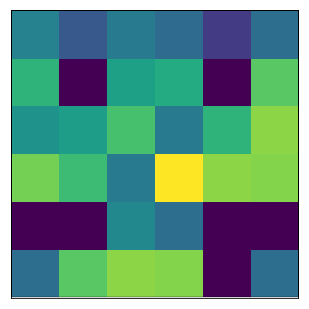

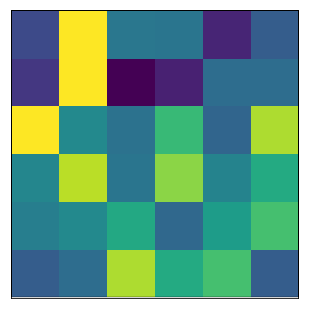

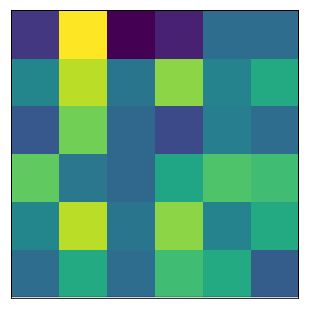

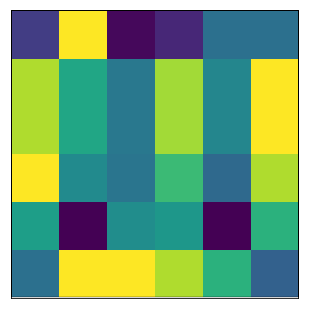

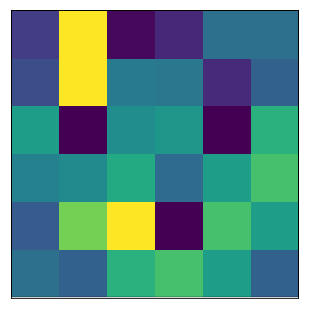

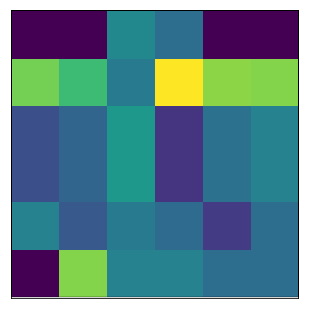

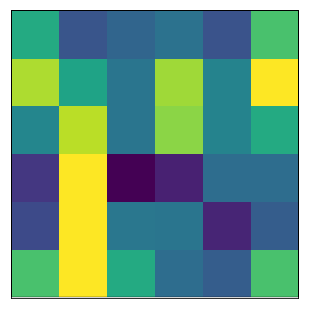

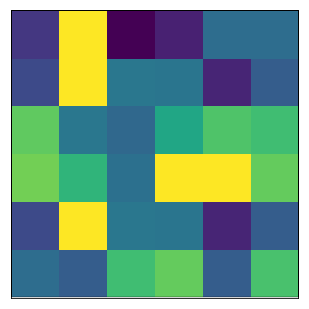

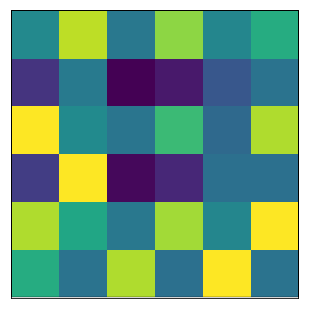

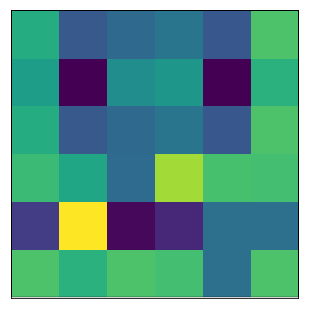

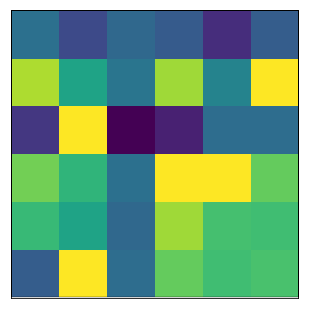

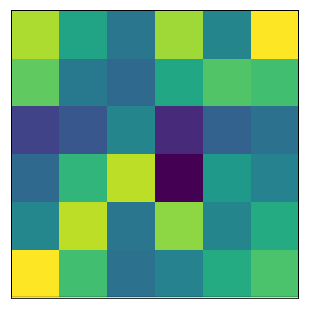

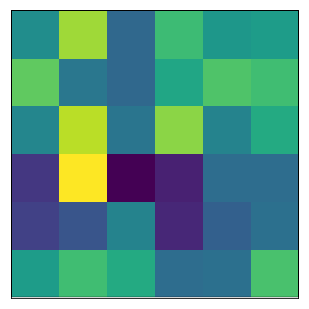

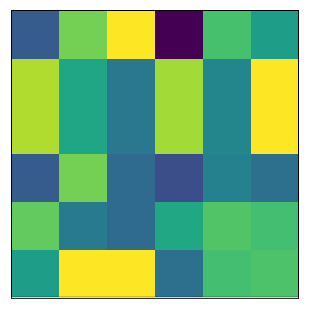

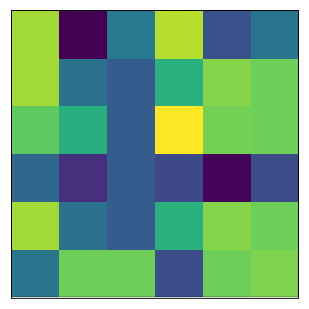

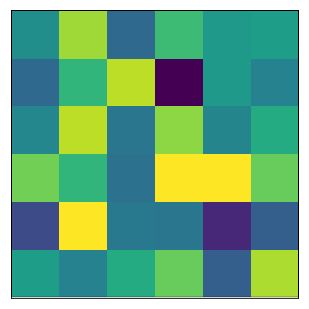

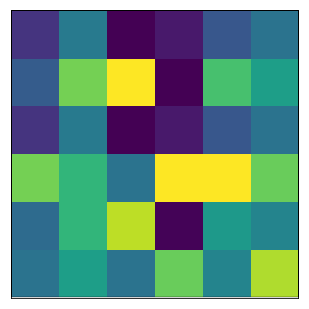

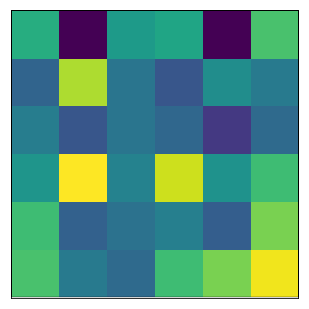

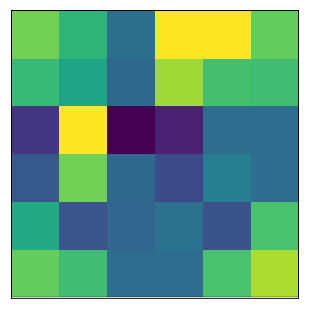

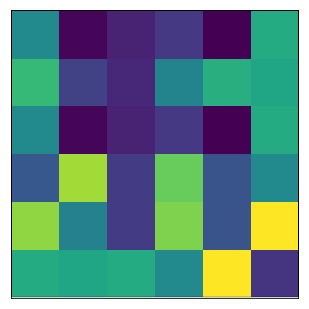

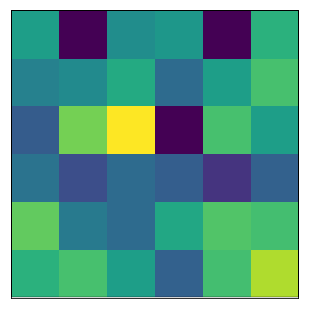

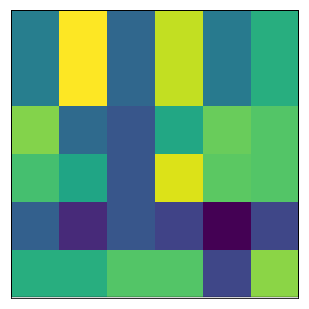

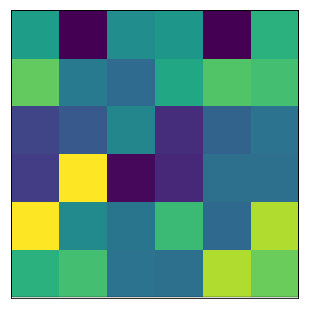

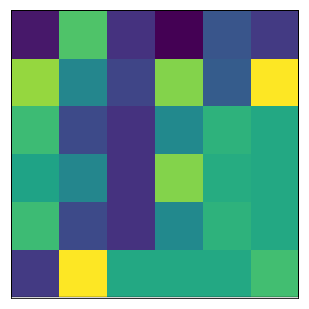

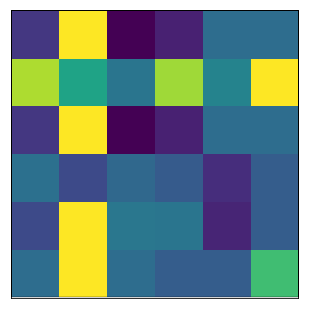

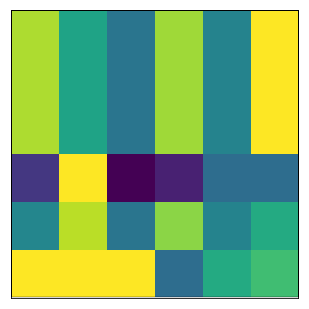

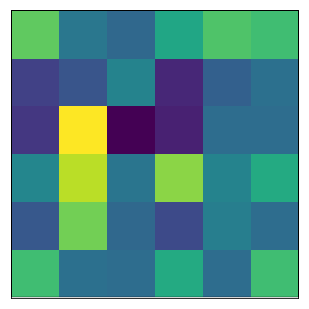

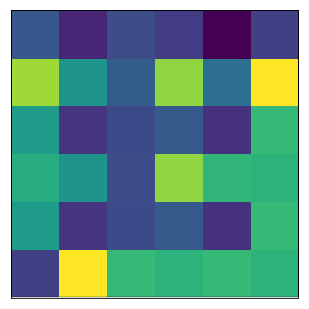

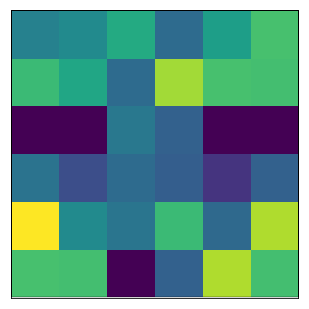

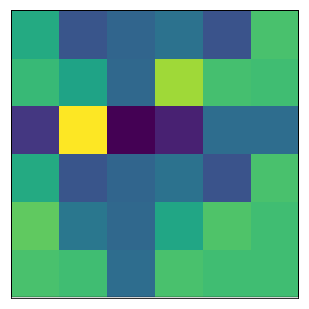

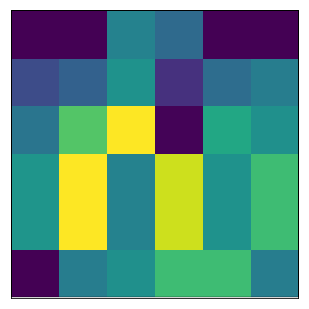

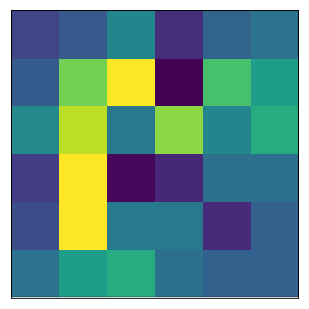

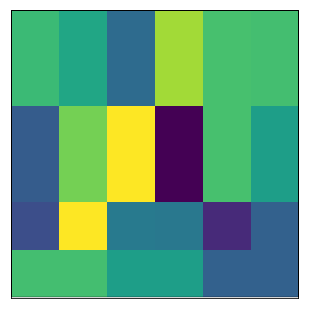

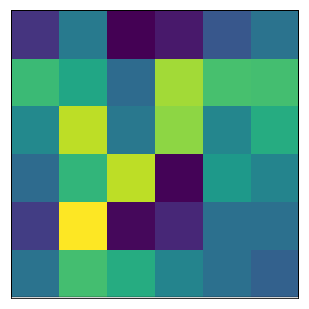

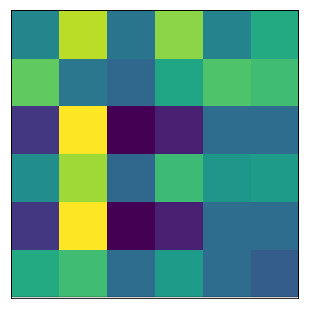

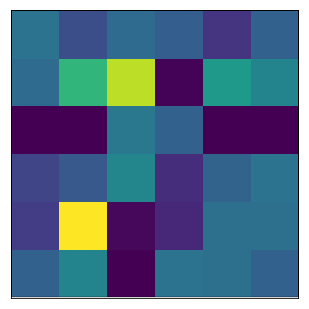

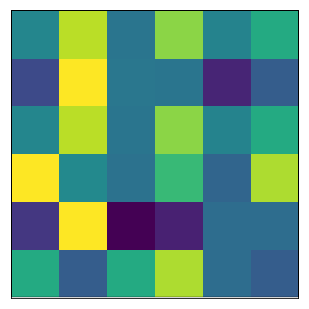

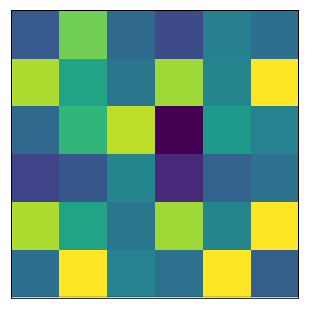

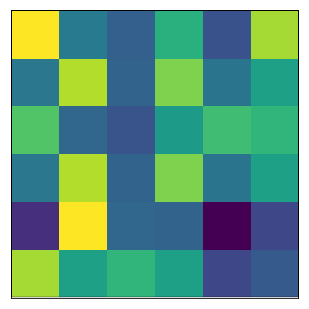

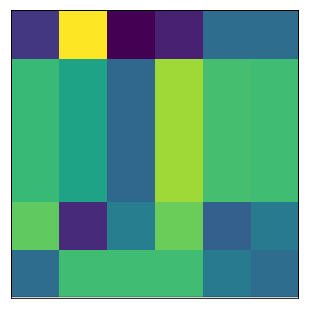

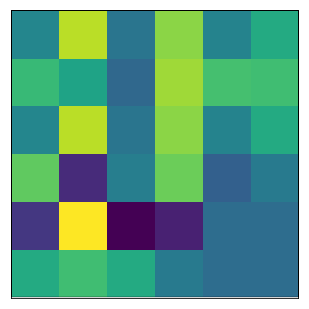

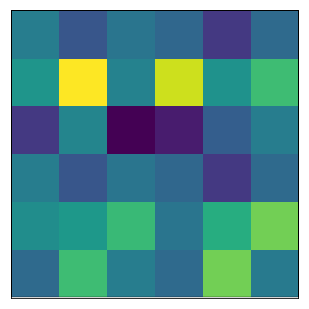

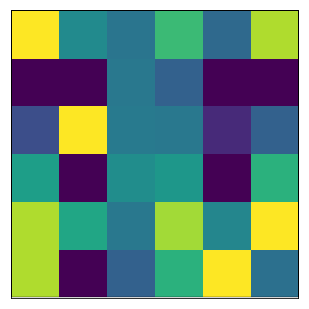

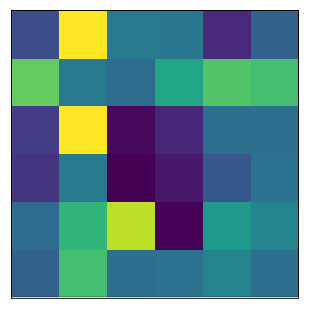

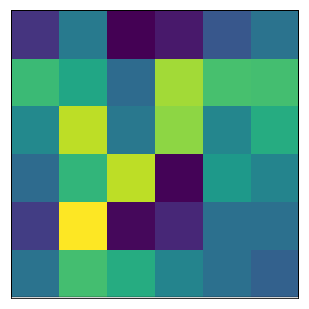

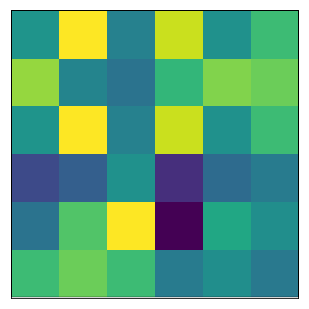

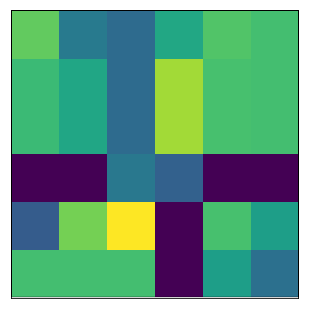

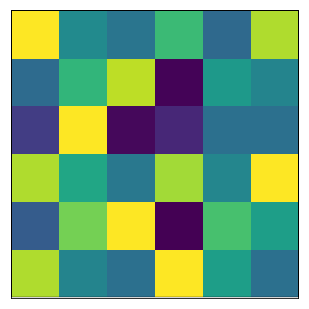

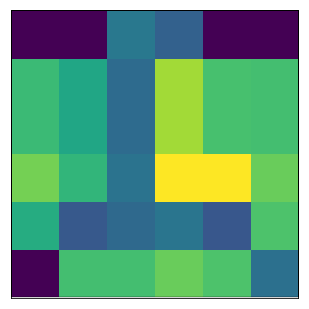

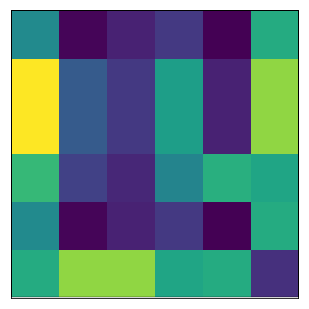

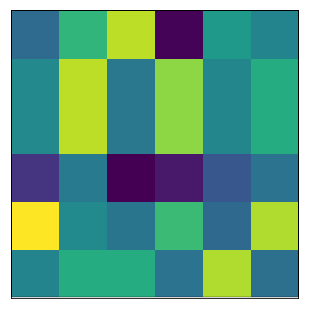

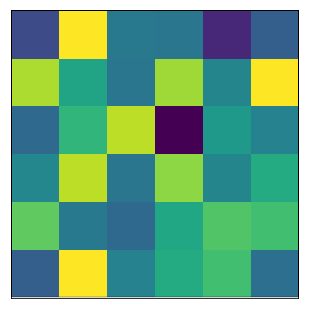

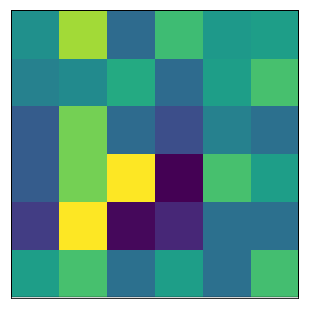

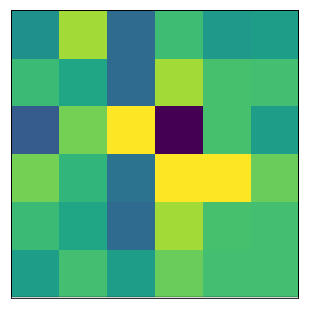

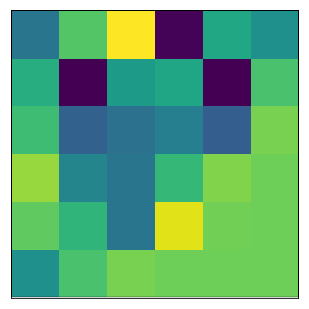

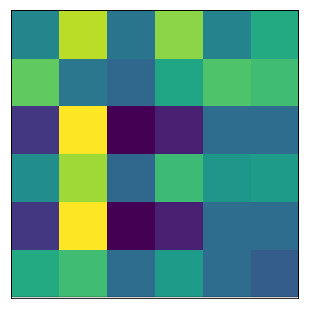

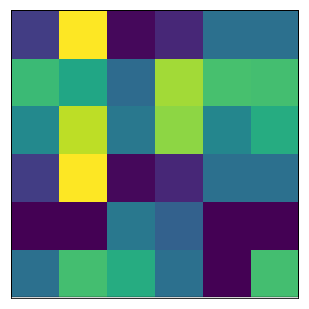

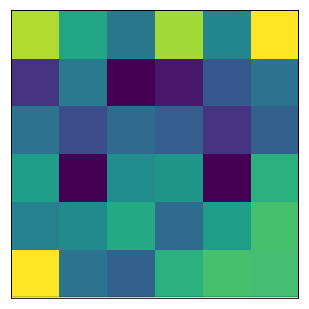

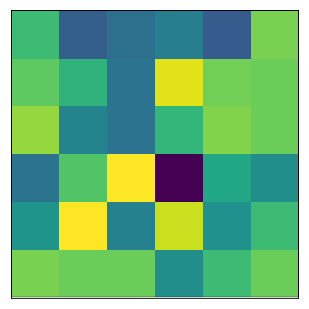

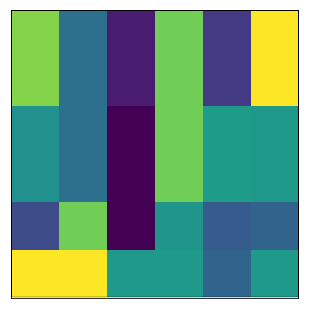

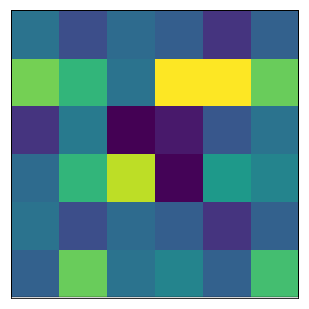

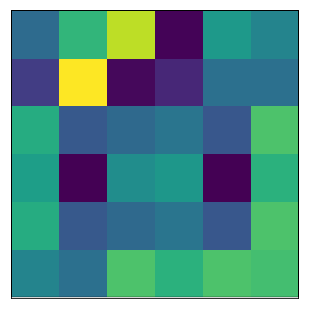

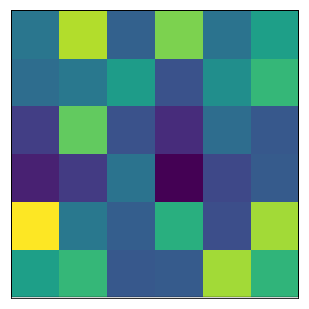

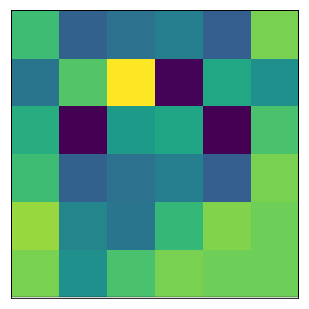

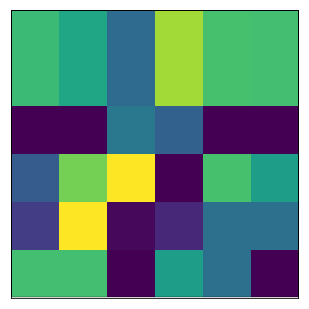

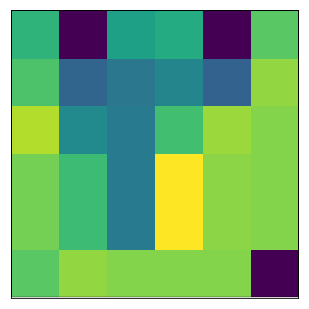

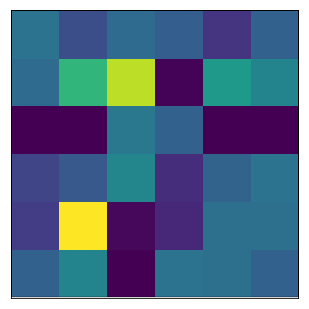

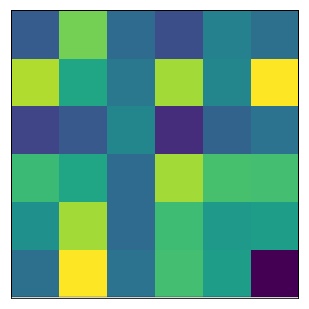

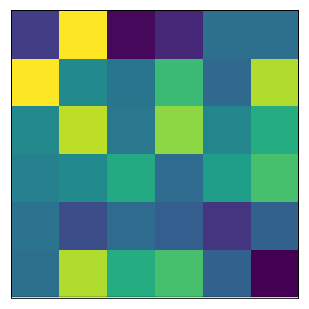

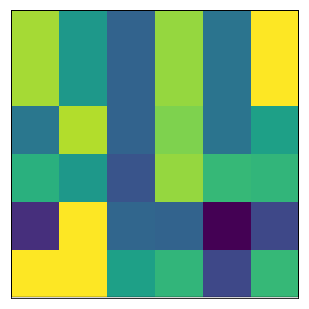

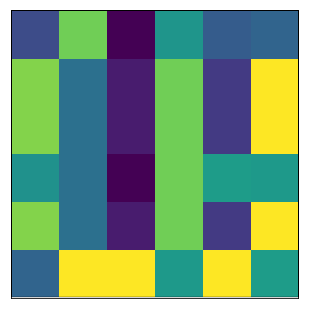

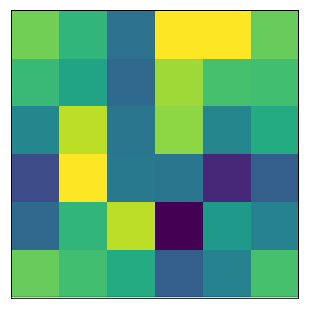

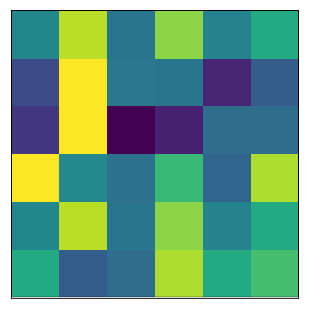

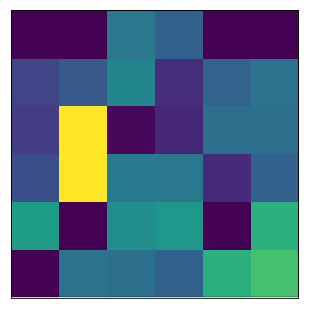

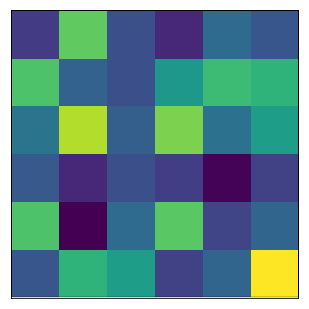

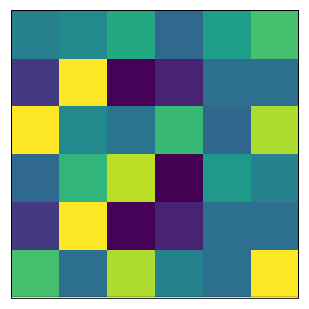

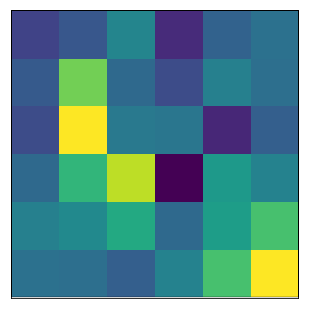

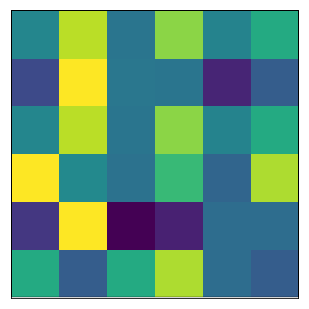

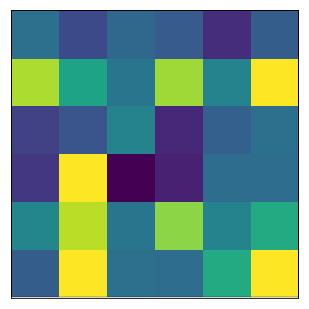

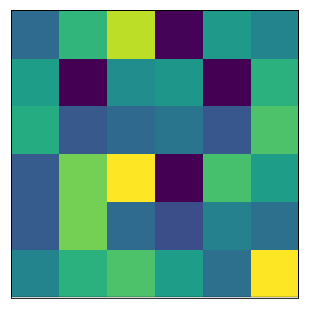

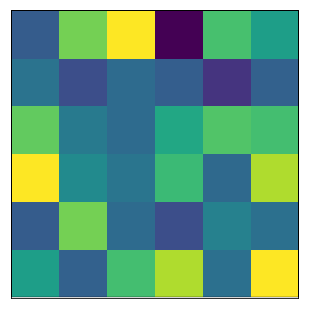

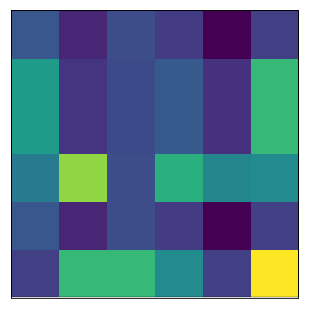

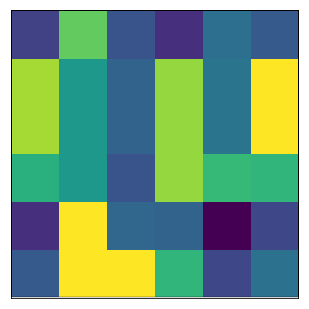

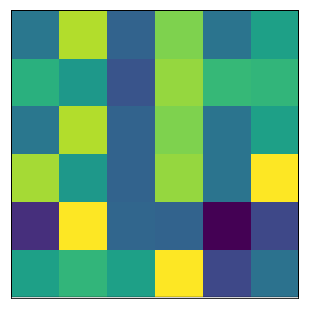

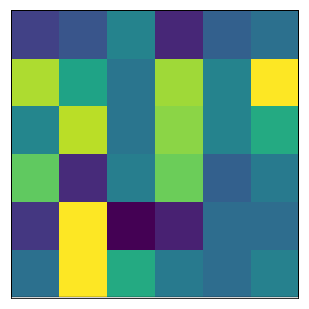

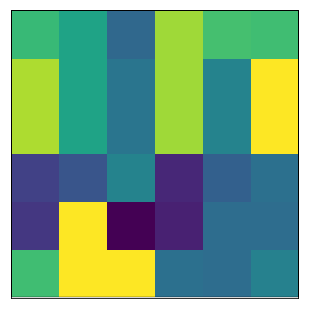

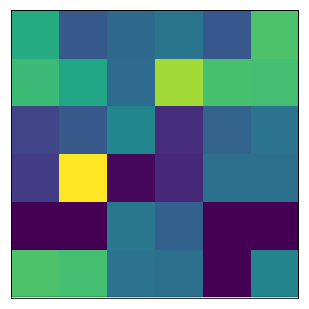

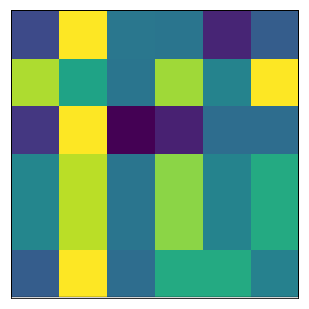

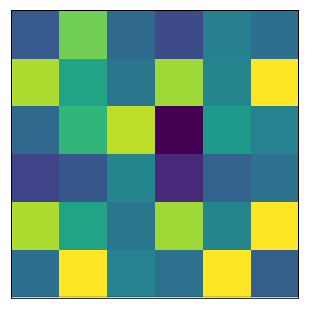

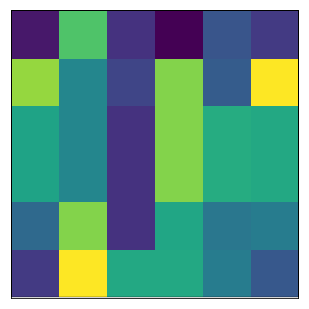

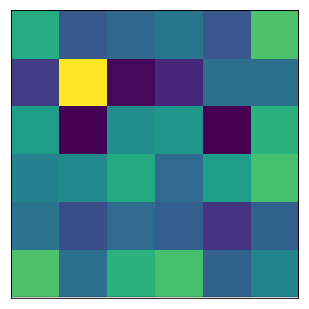

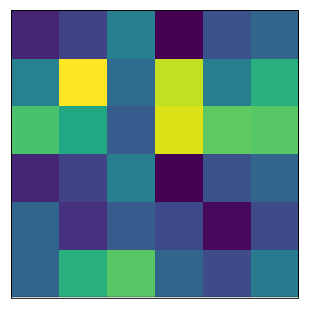

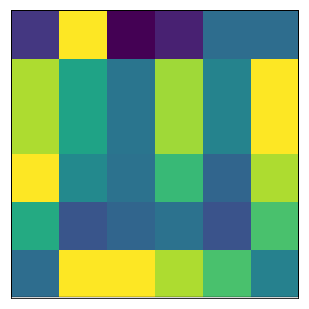

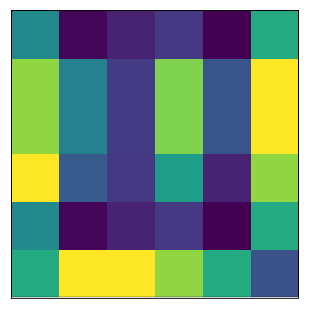

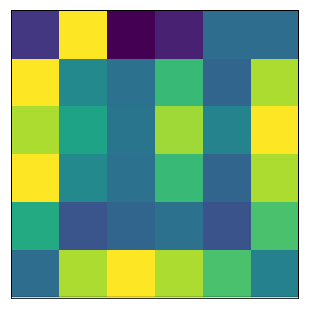

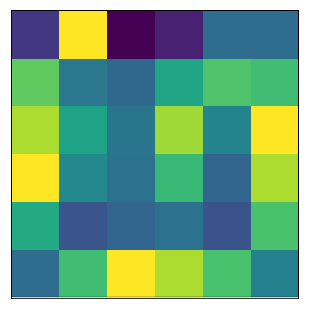

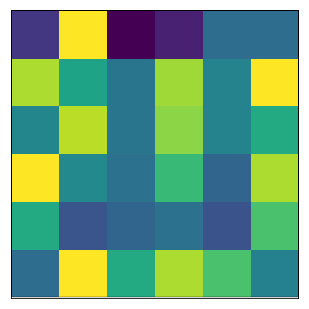

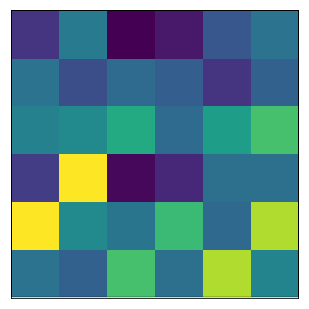

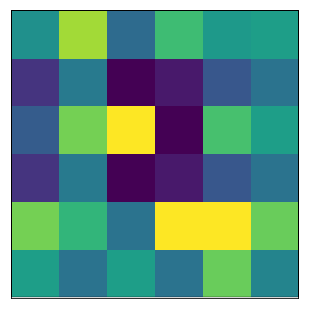

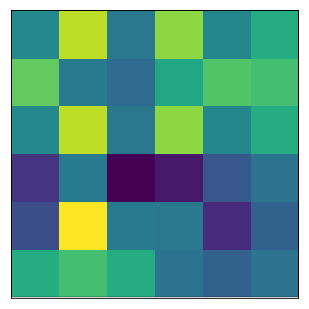

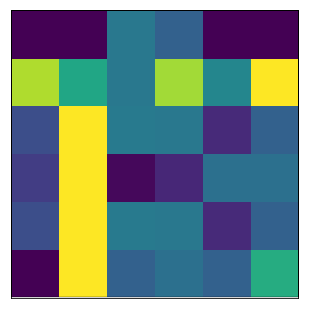

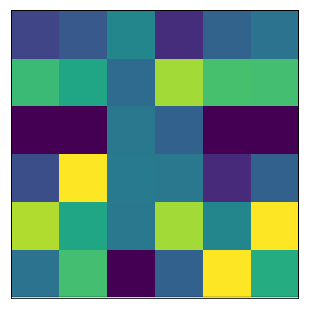

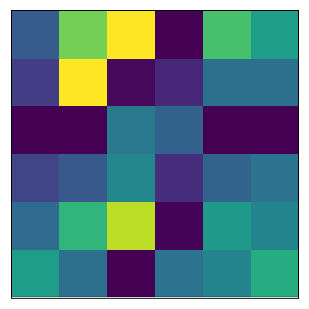

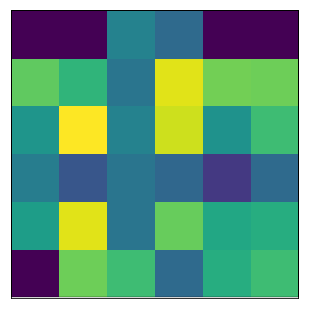

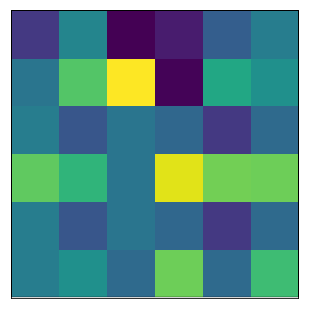

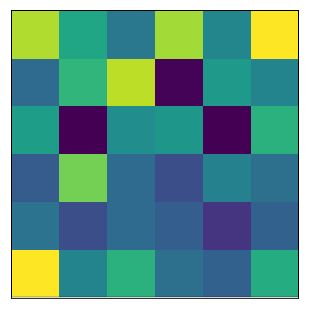

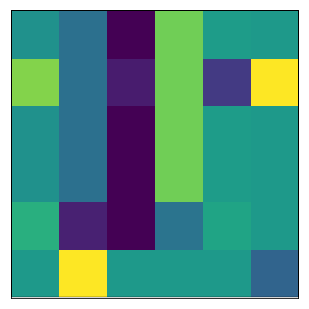

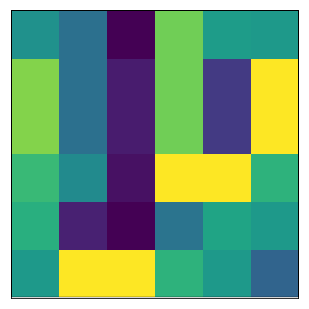

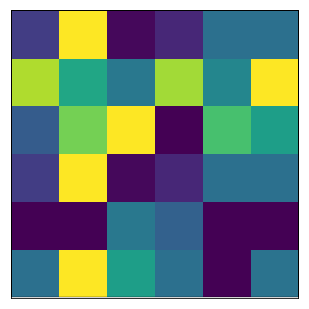

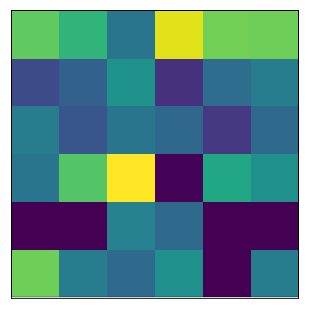

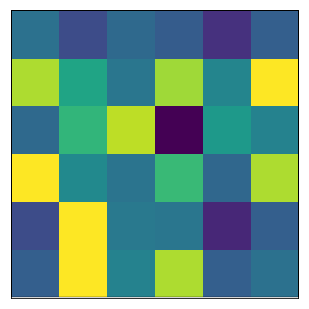

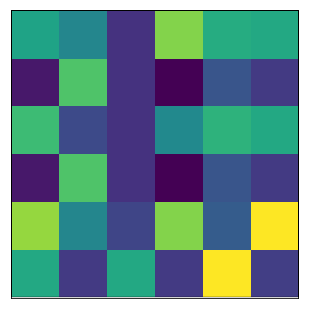

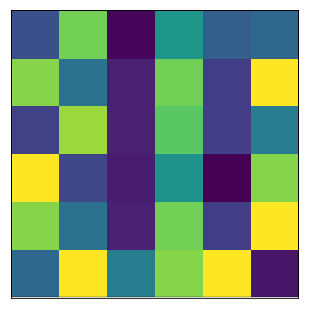

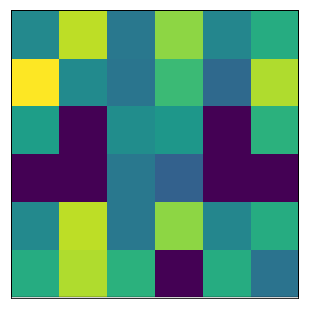

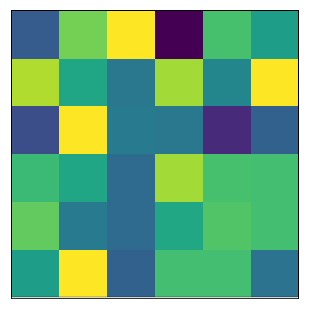

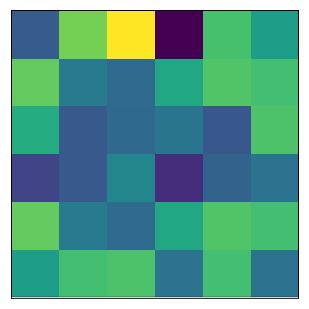

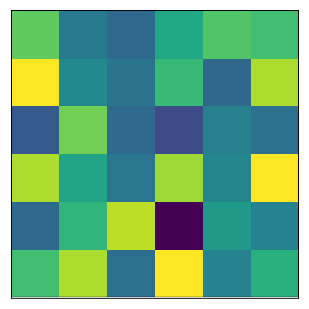

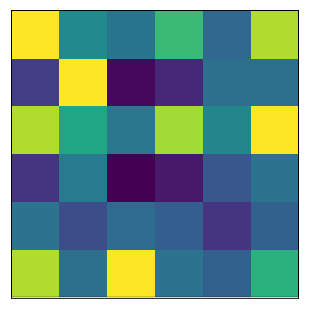

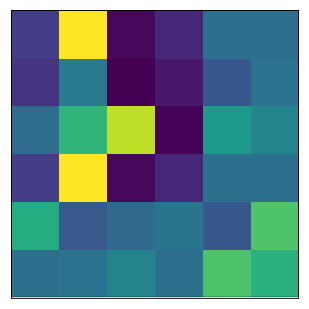

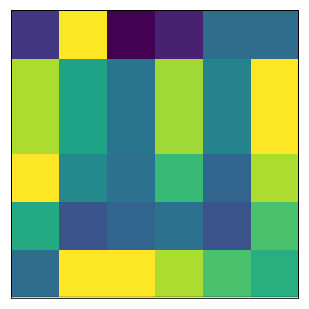

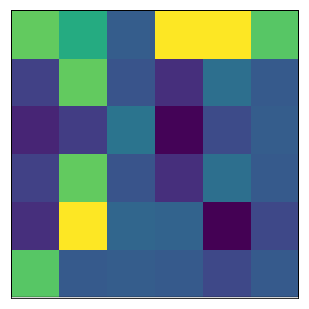

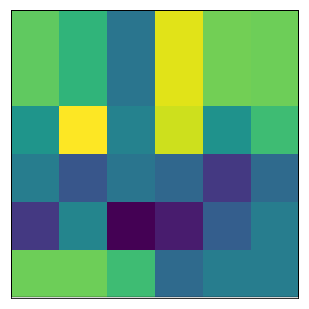

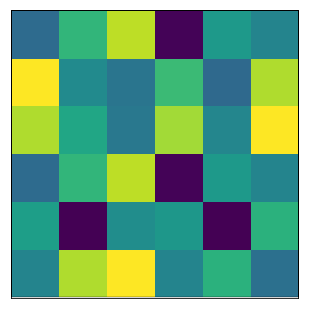

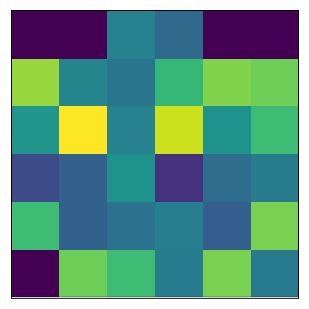

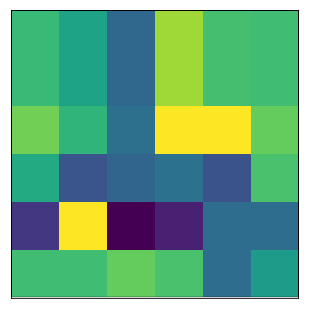

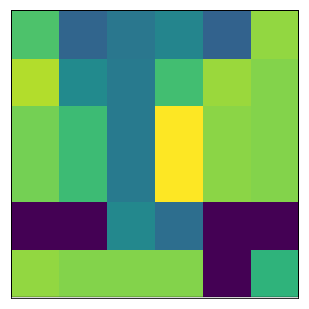

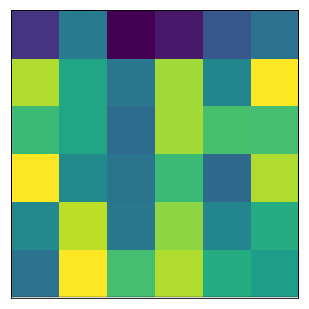

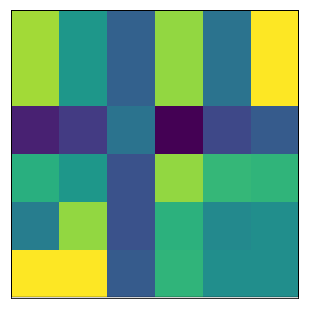

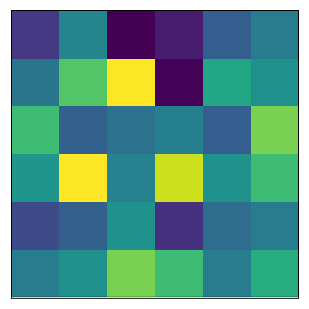

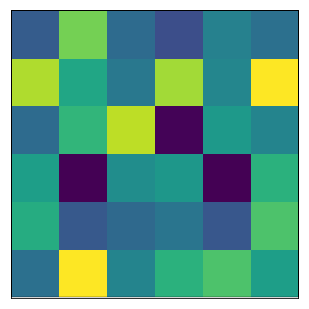

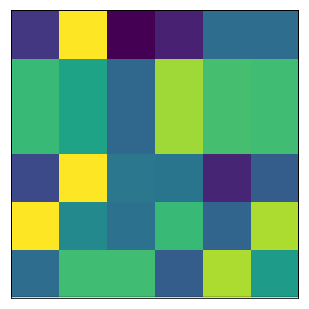

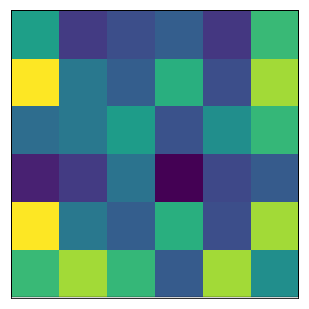

In [16]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/*.png'
df_list=[]
book_dict = {}


for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_180)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip/180_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Rotate 270 for clockwise in Image/Whole and save in Image/Whole_rotateflip directory

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_0.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_1.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_10.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_100.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_101.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_11.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_13.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_14.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_15.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_16.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_17.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_18.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_19.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whol

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_115.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_116.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_117.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_118.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_119.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_120.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_121.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_122.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_123.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_124.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_125.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_126.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_127.png
C:/Users/user/OneDriv

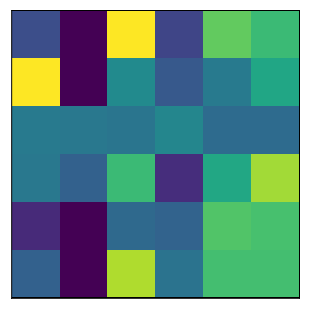

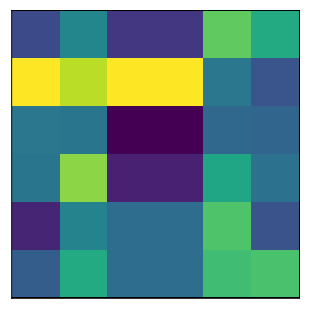

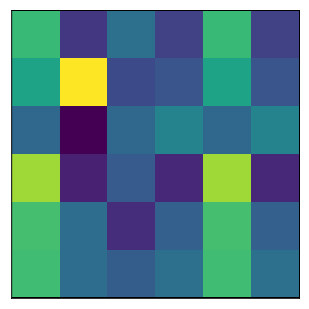

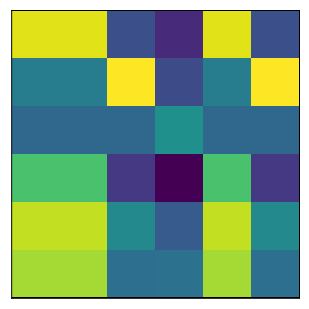

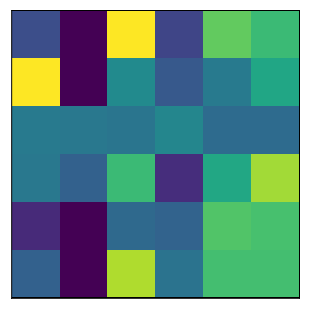

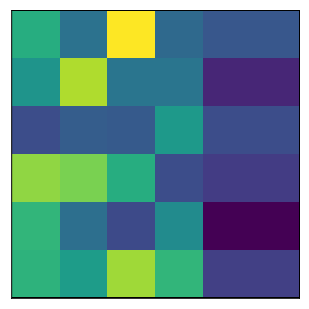

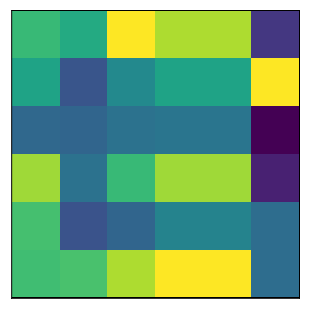

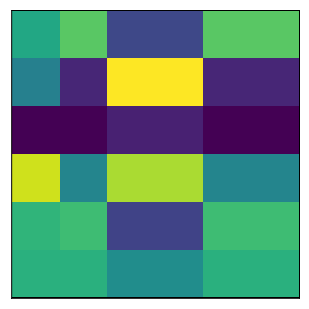

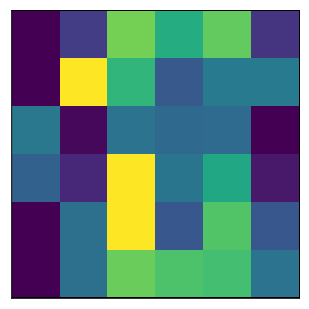

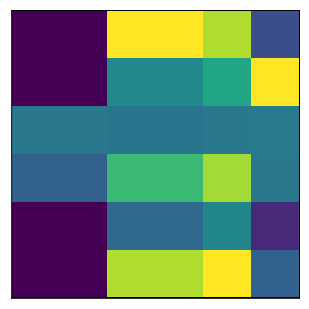

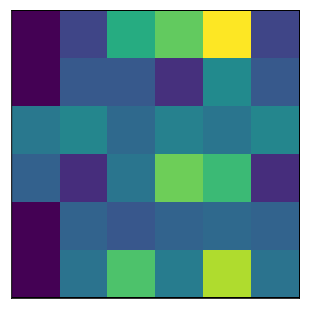

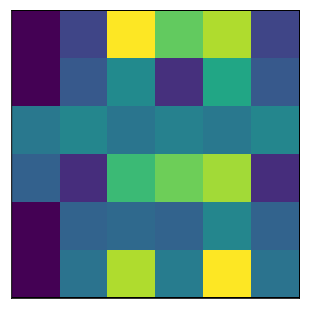

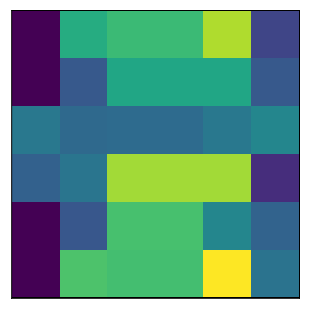

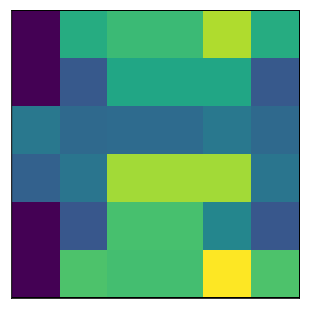

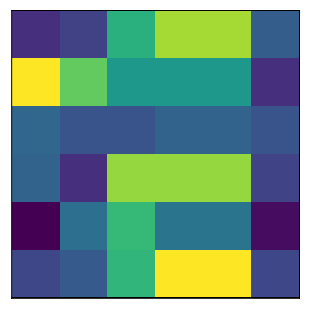

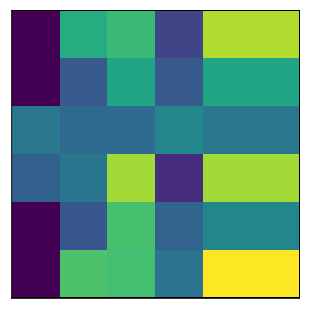

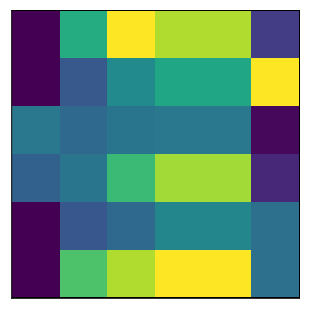

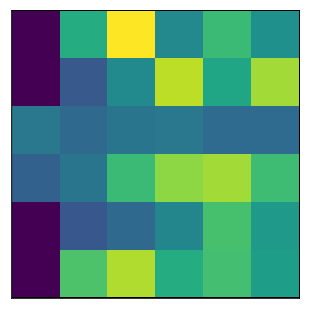

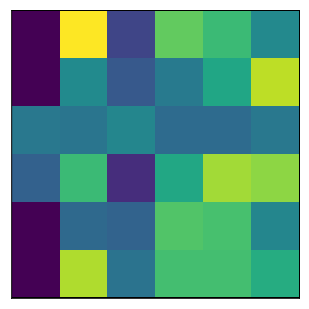

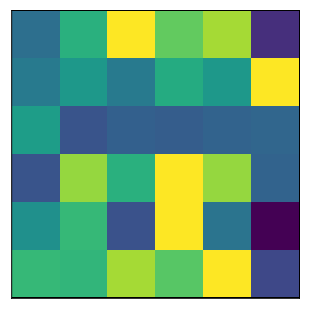

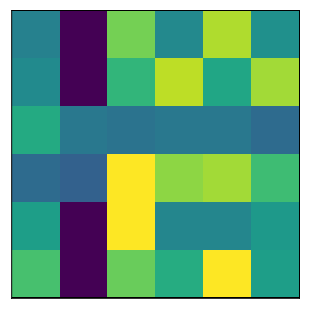

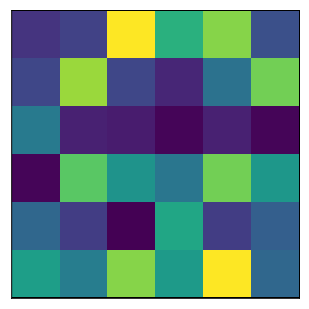

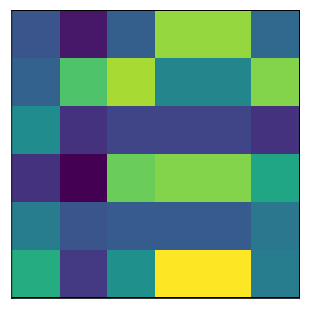

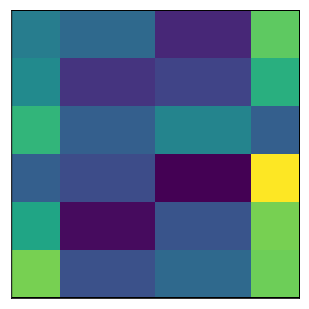

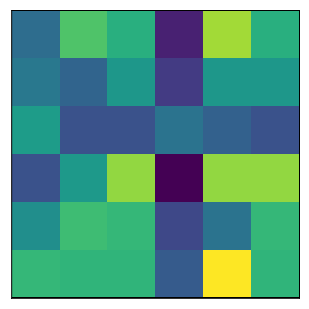

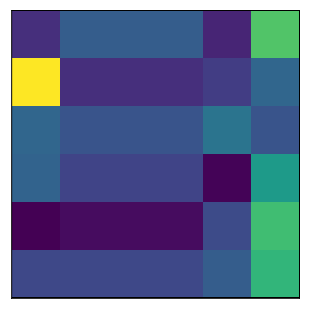

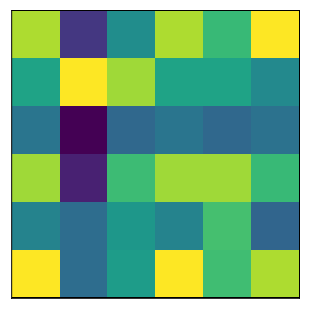

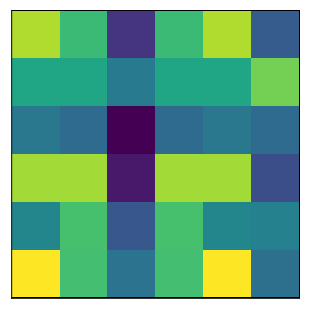

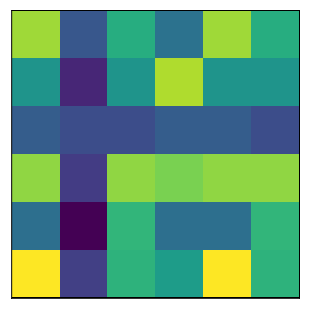

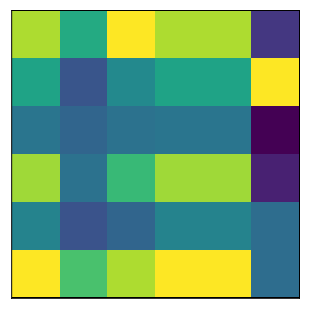

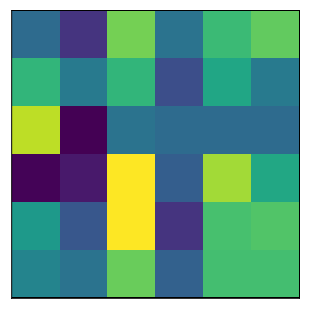

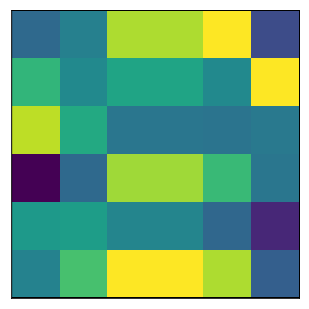

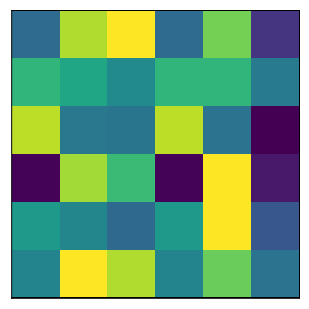

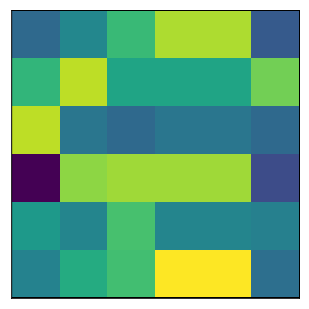

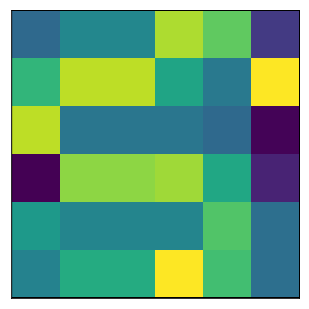

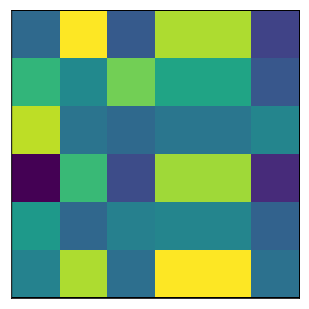

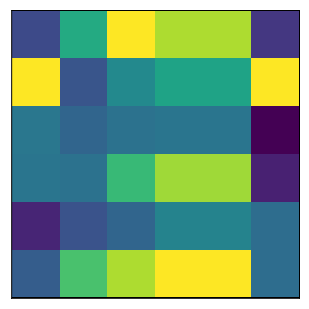

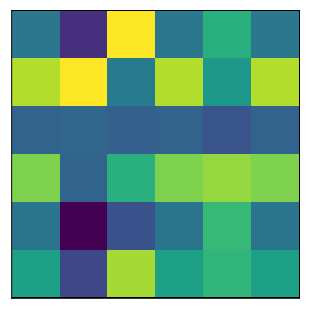

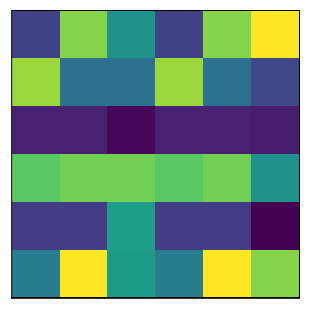

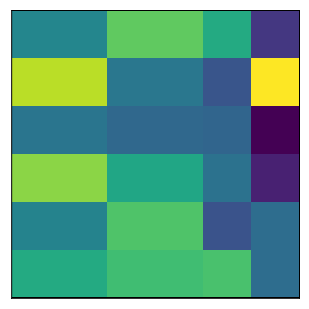

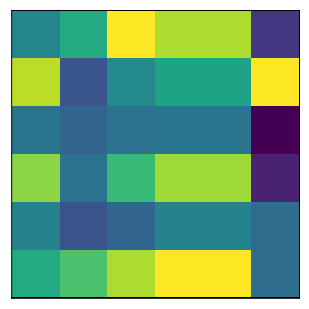

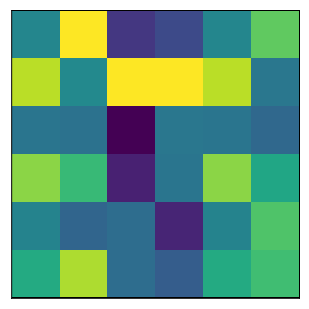

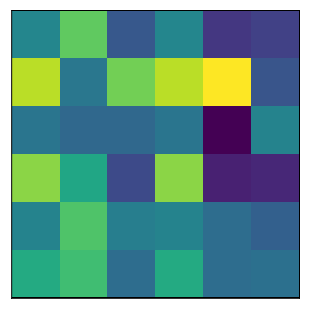

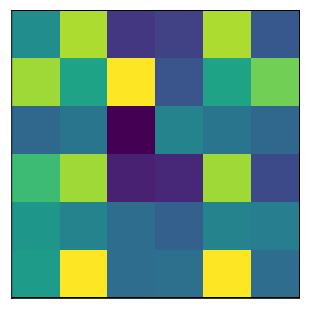

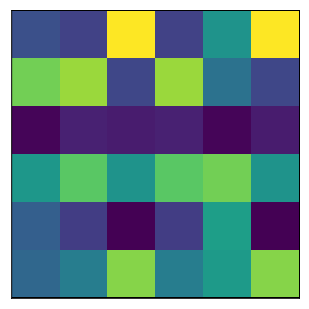

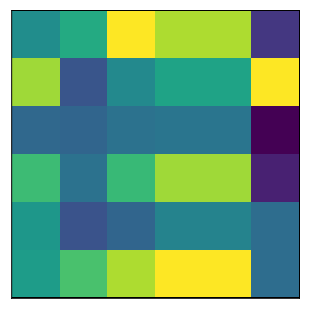

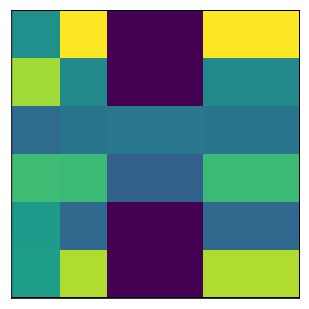

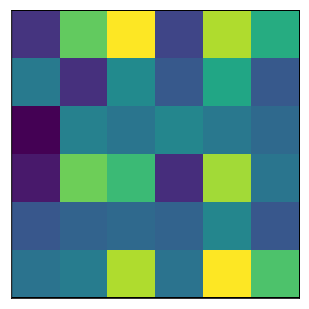

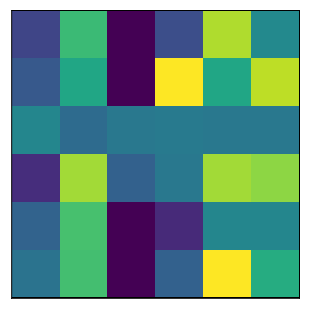

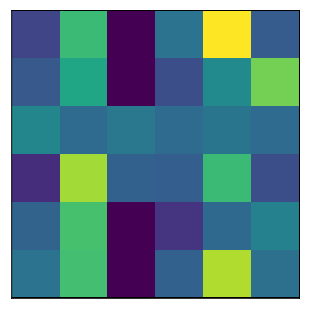

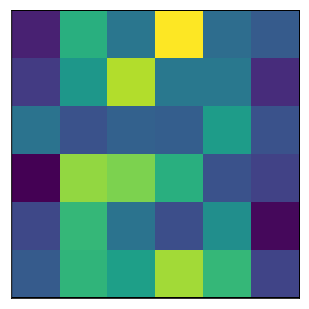

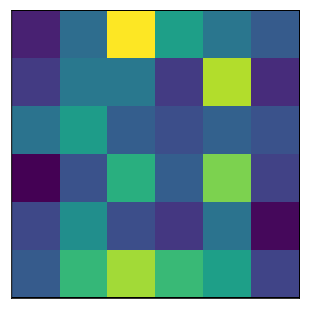

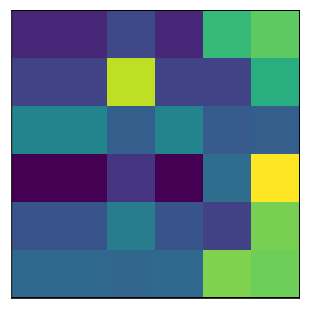

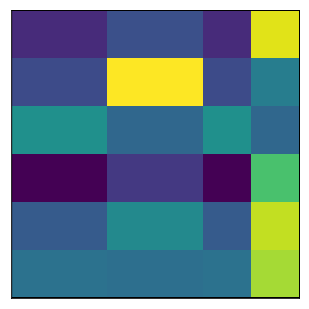

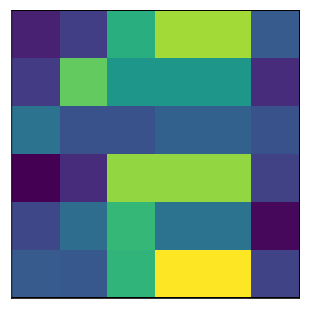

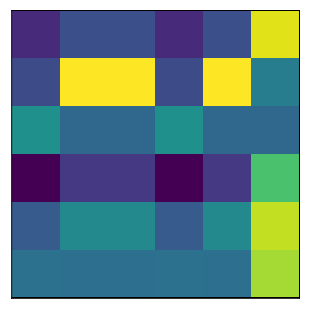

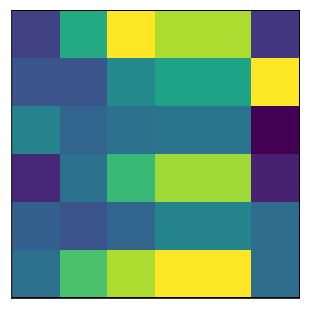

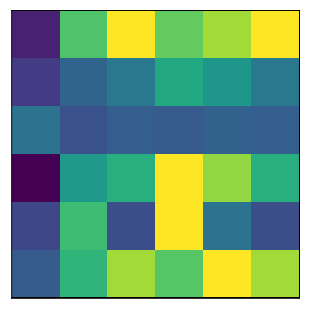

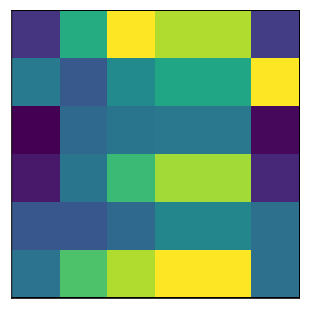

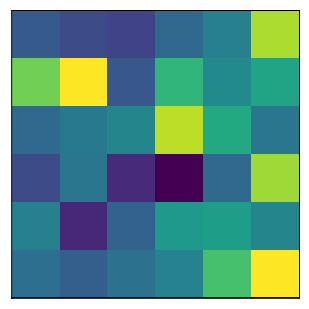

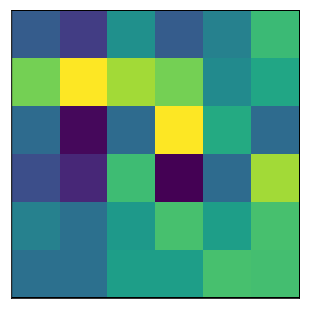

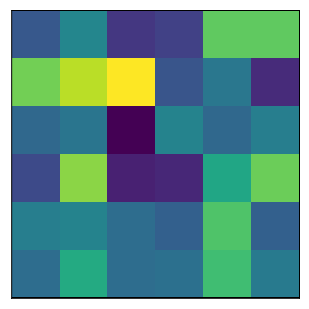

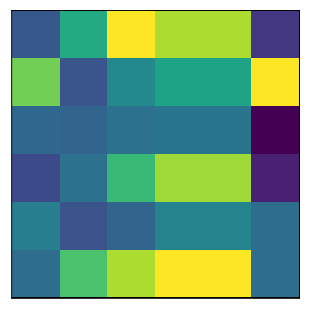

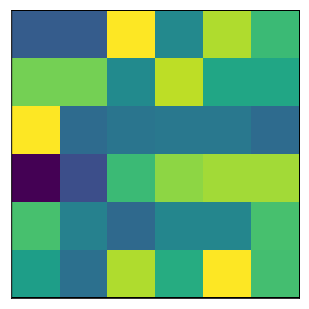

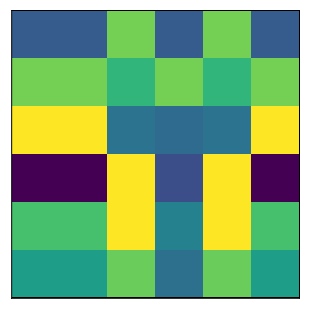

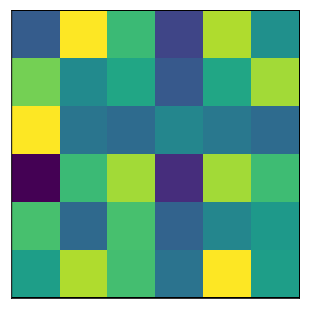

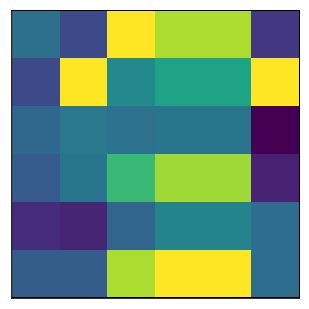

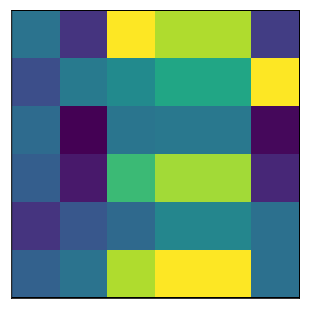

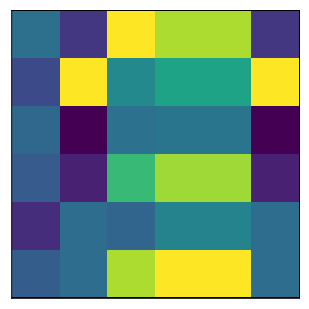

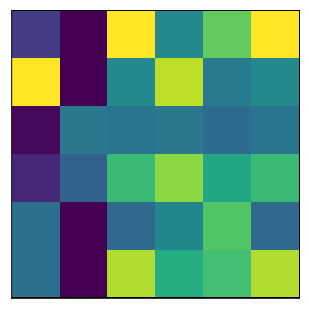

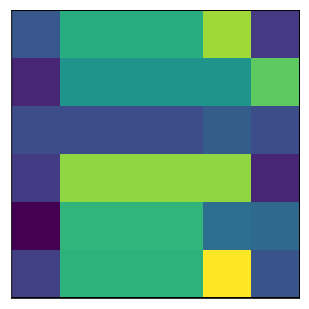

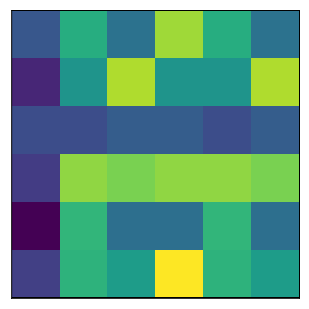

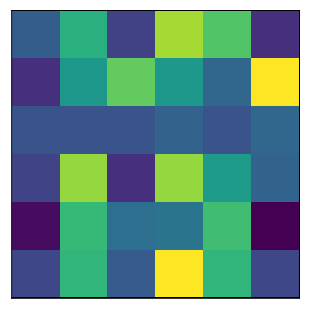

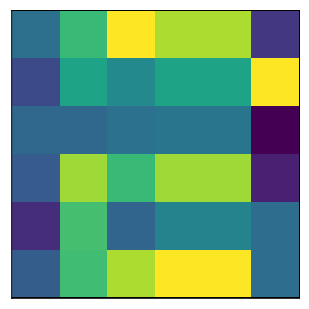

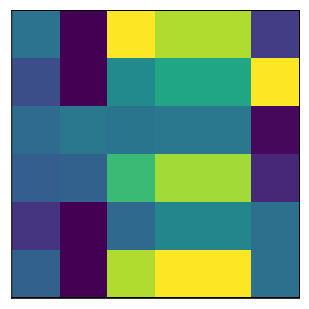

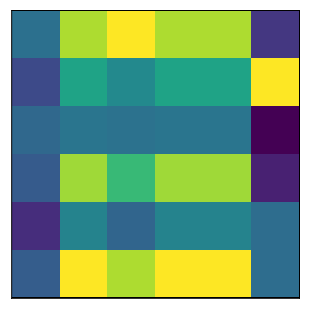

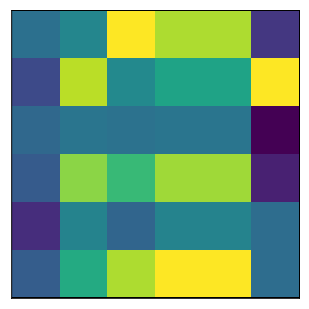

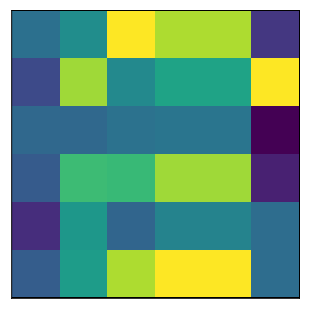

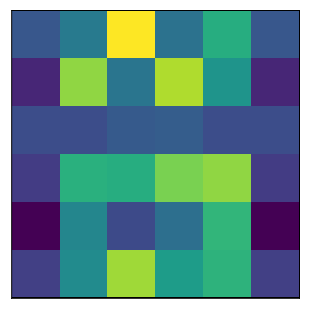

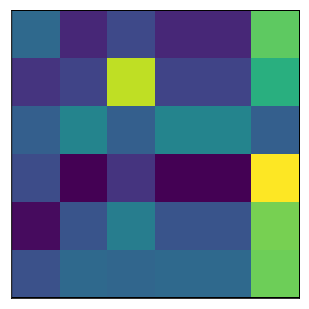

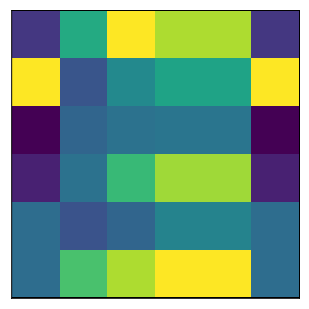

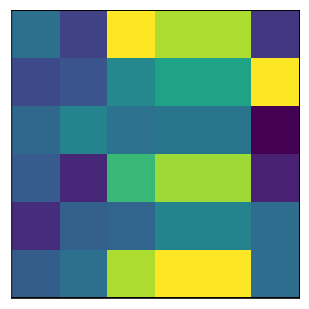

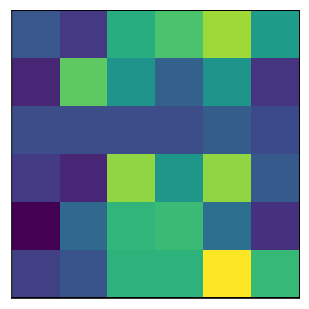

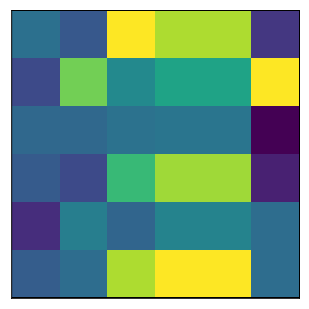

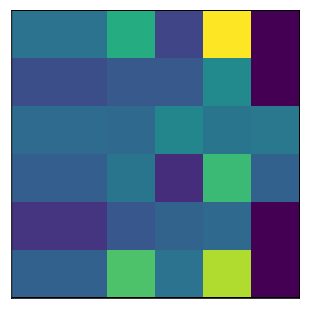

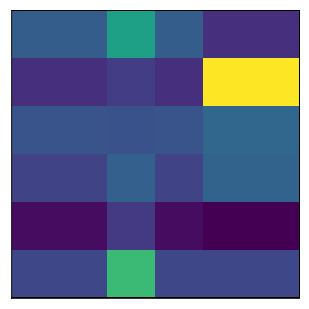

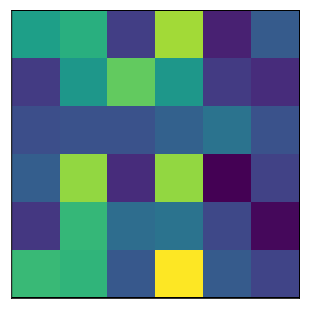

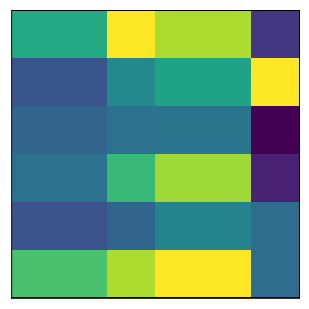

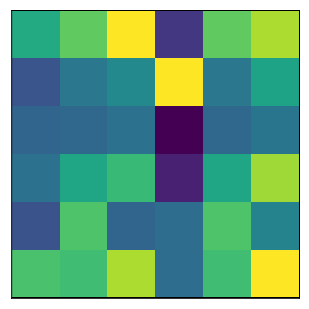

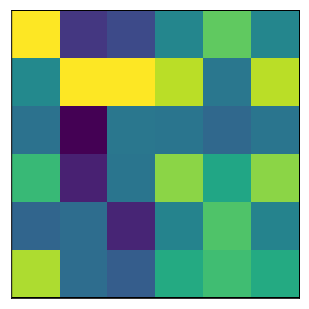

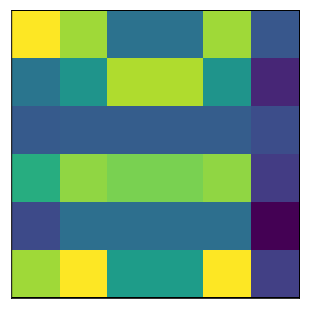

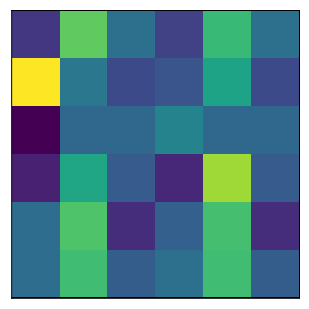

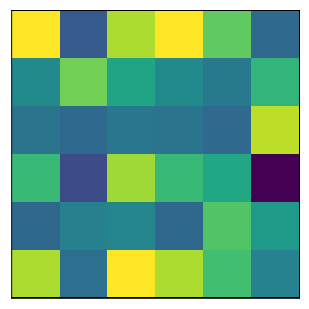

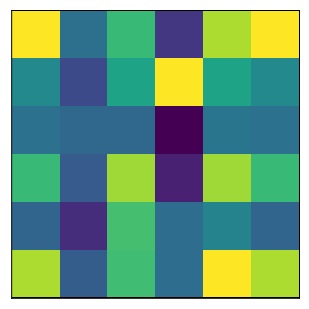

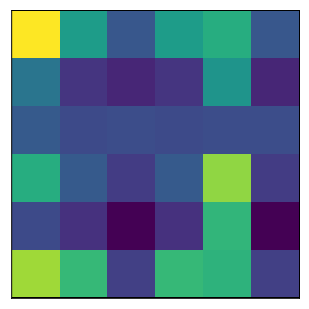

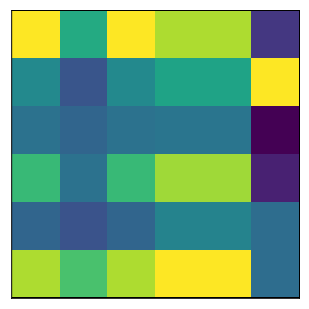

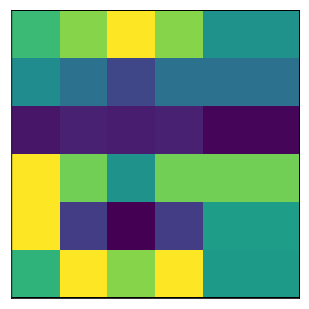

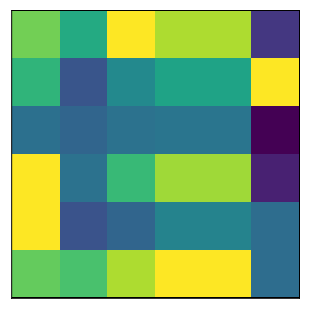

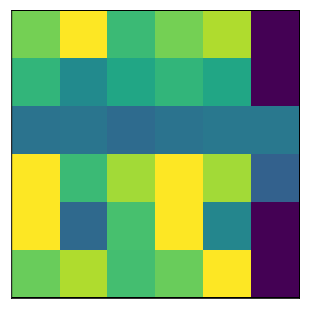

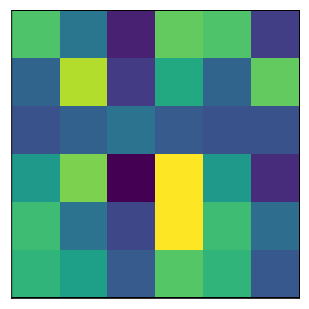

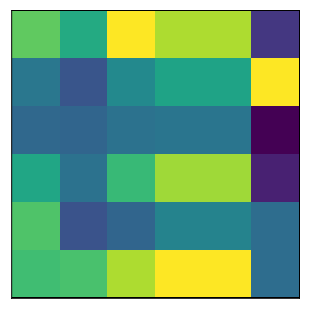

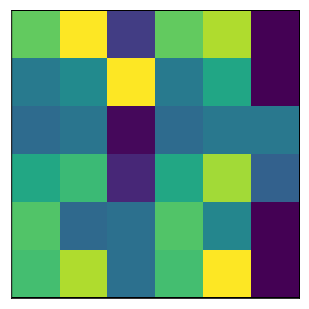

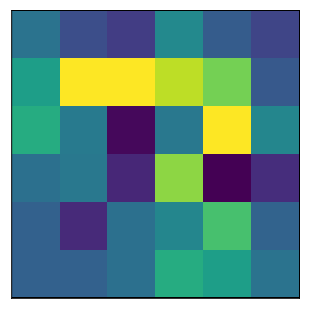

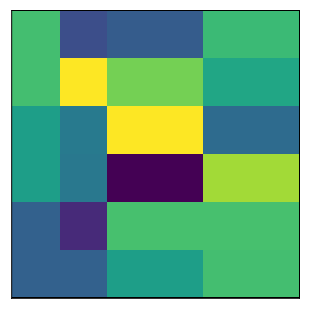

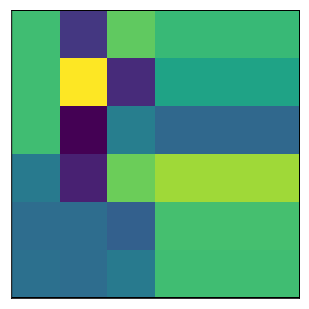

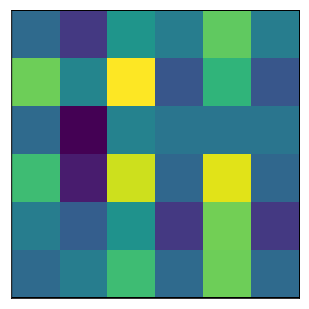

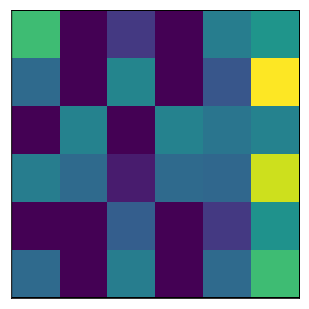

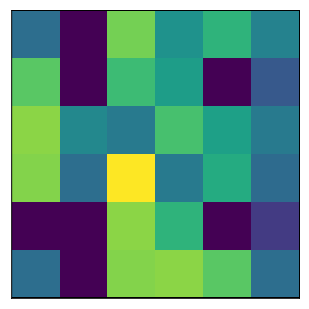

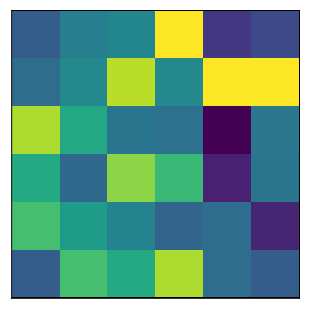

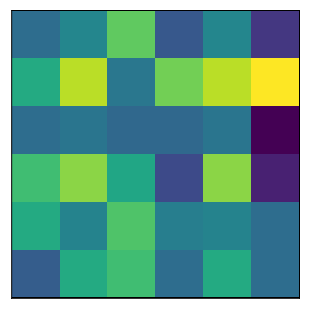

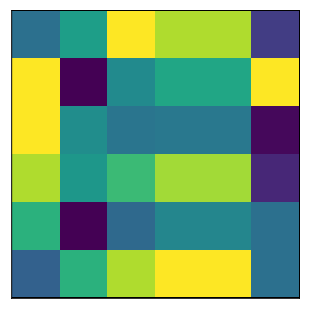

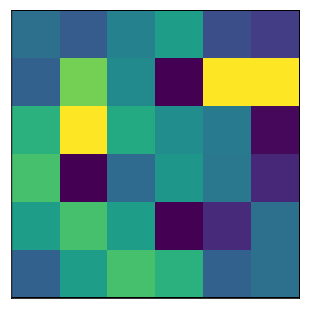

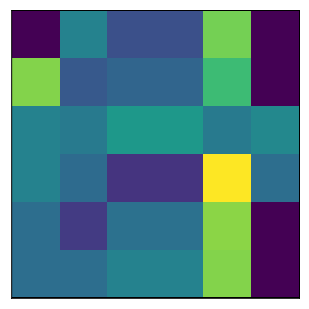

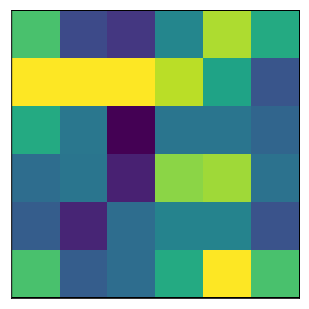

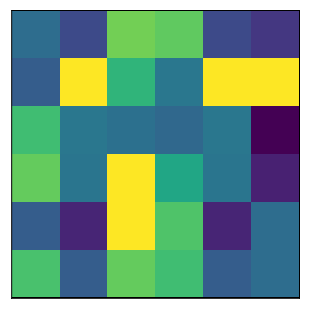

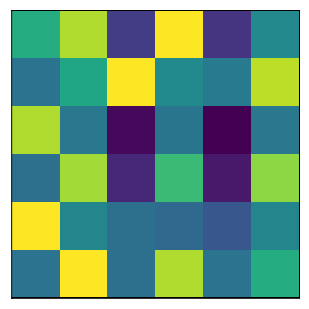

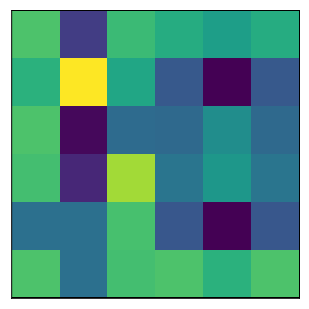

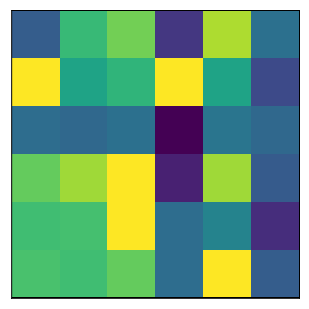

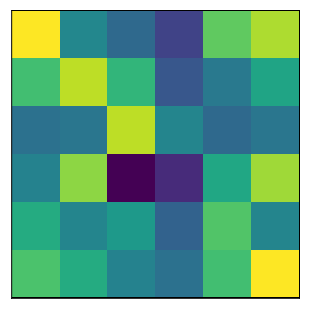

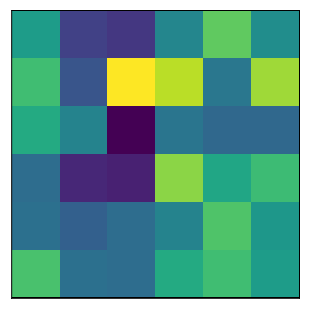

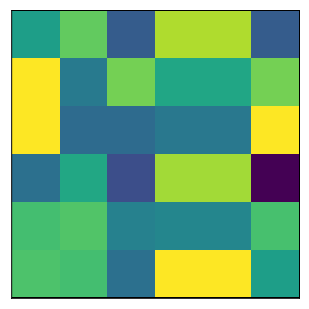

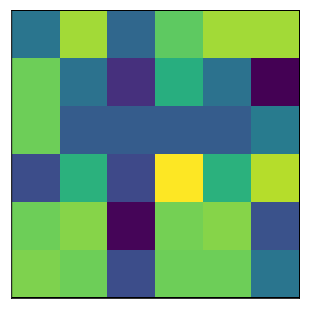

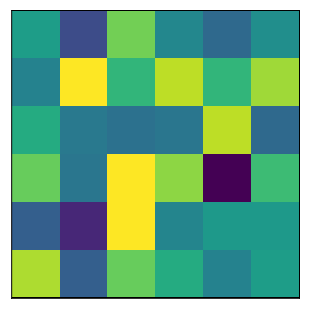

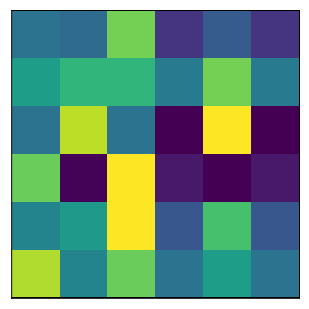

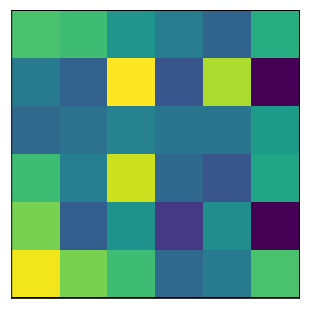

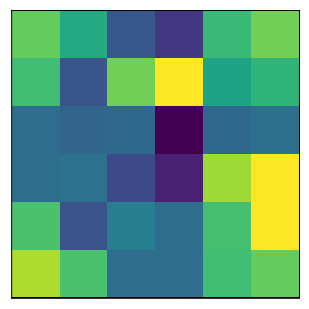

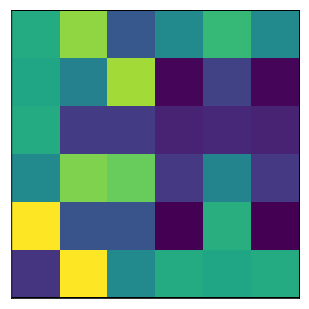

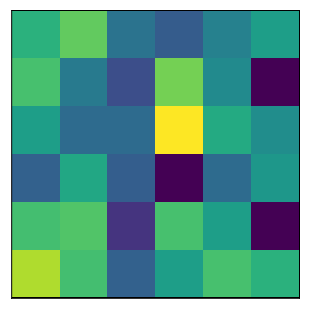

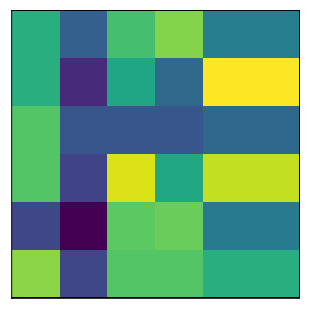

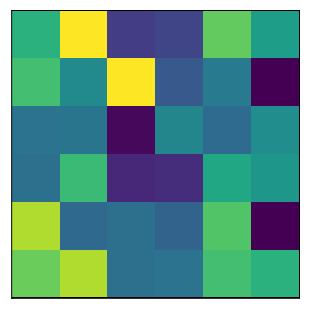

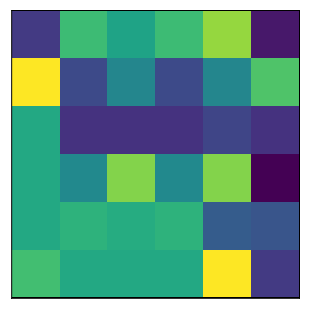

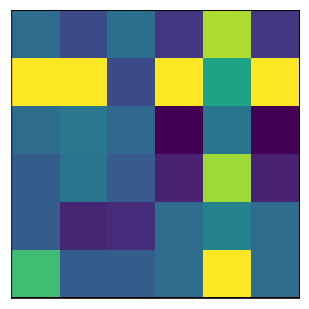

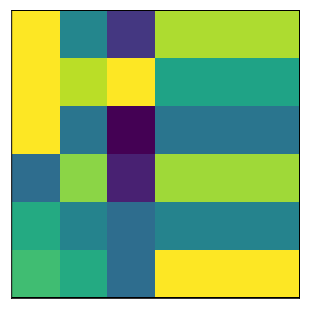

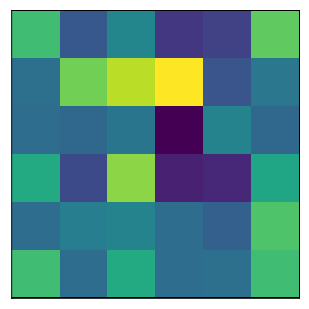

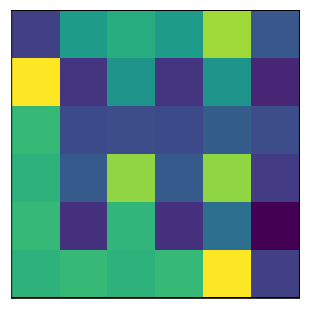

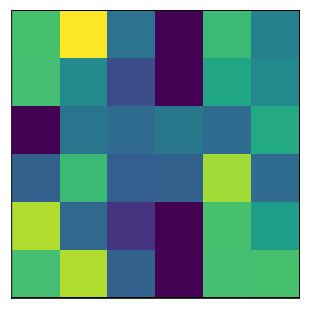

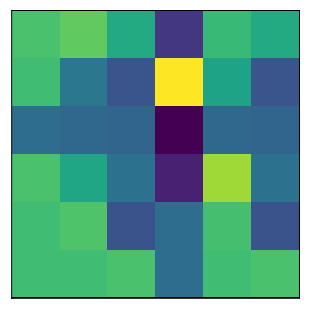

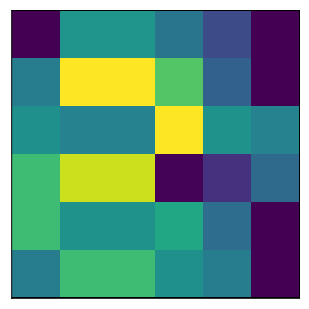

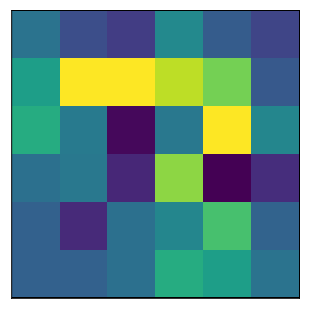

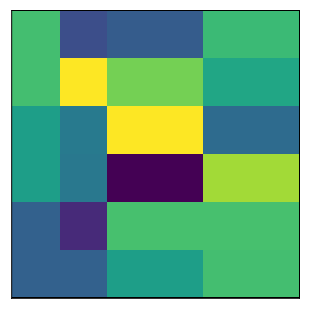

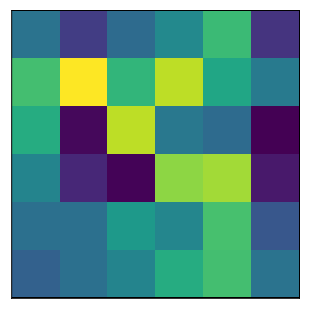

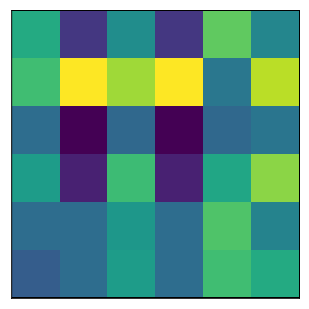

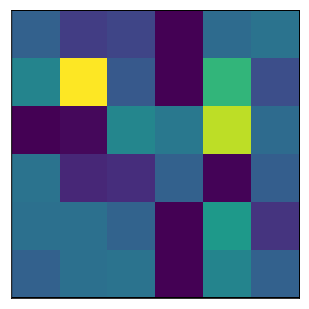

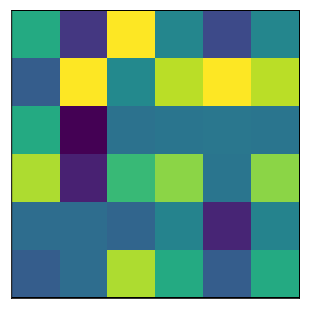

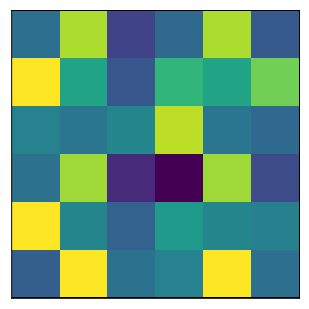

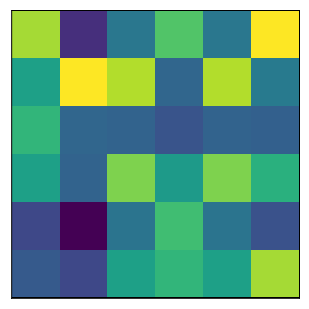

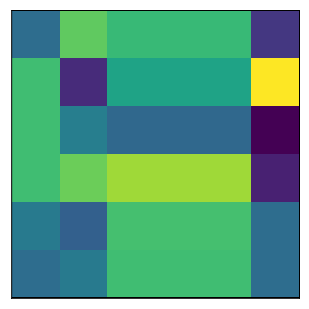

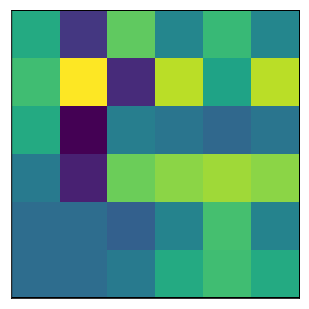

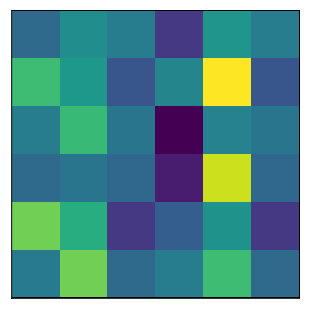

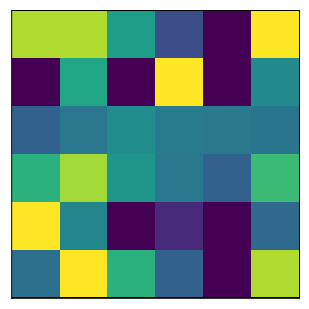

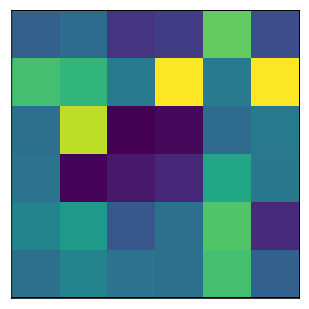

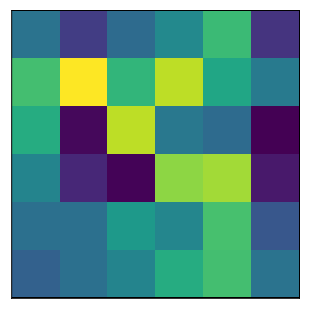

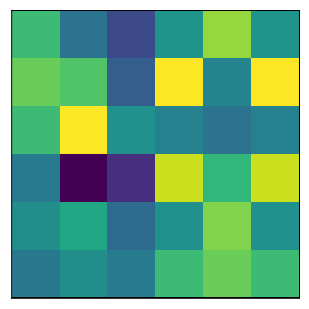

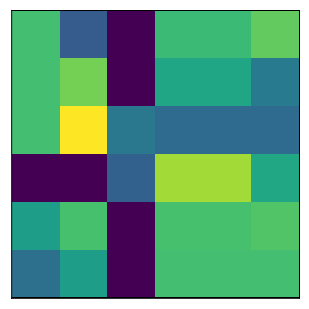

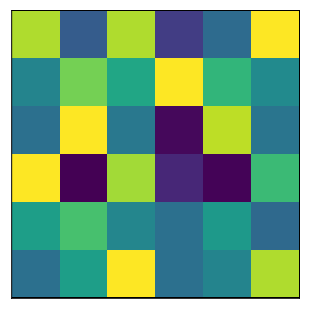

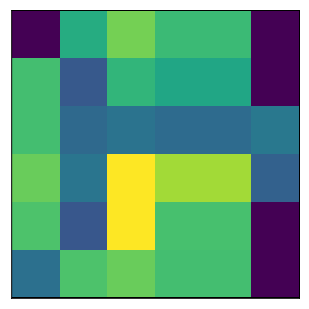

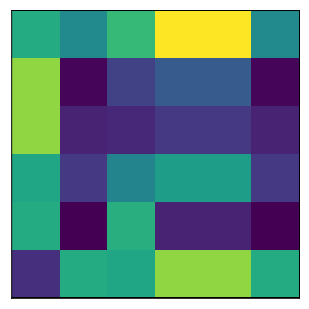

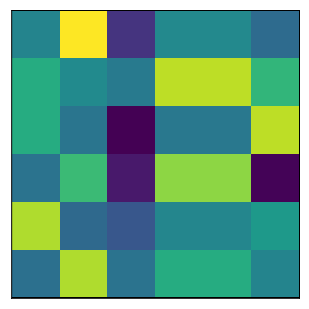

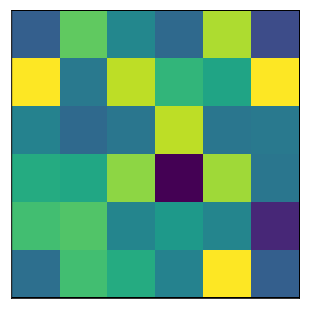

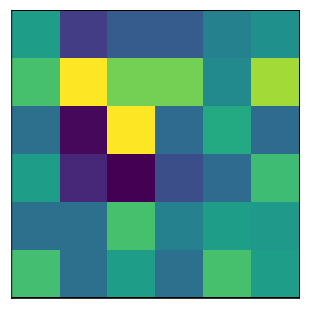

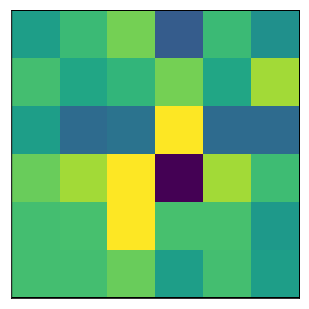

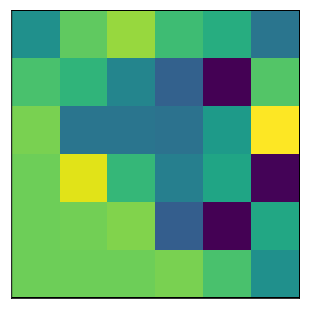

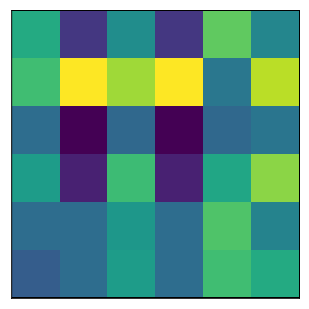

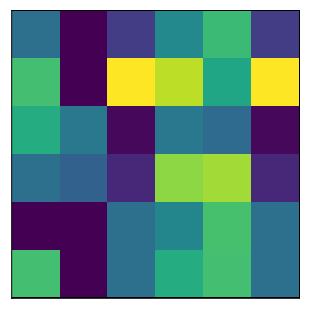

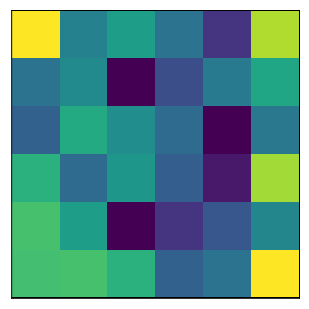

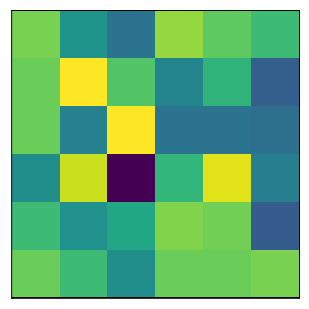

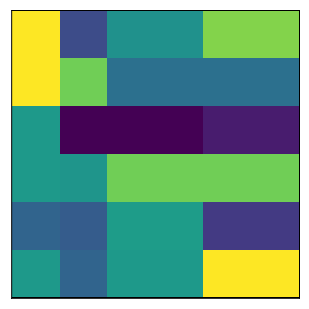

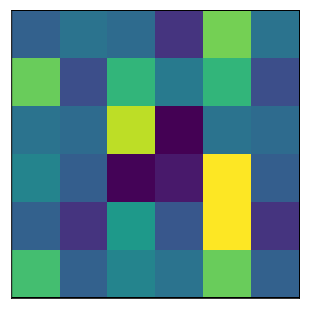

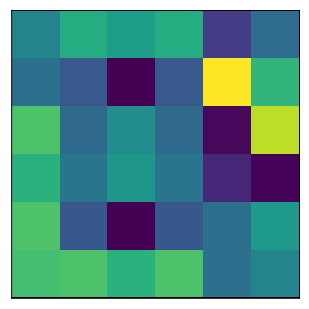

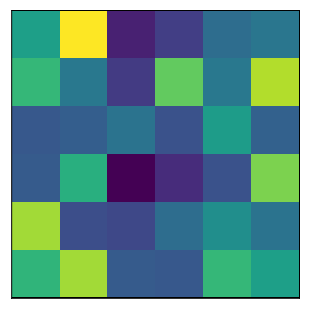

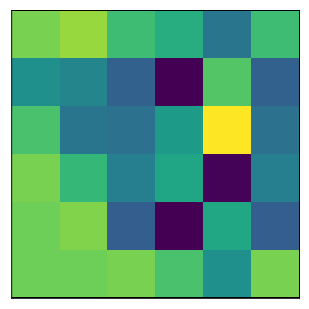

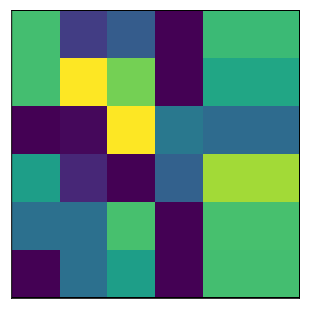

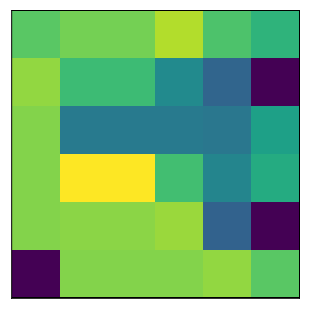

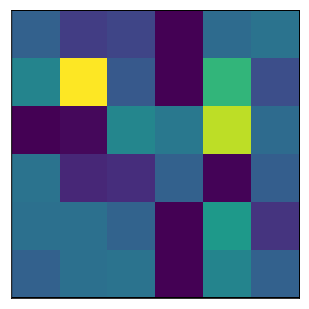

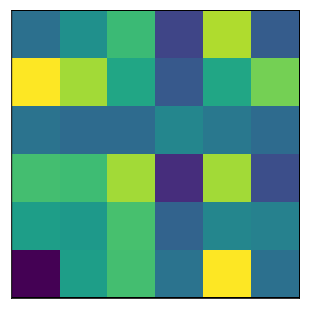

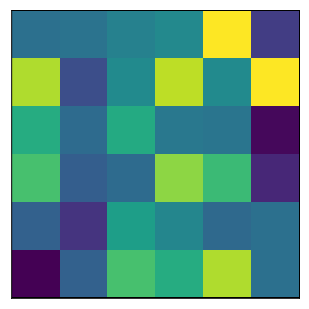

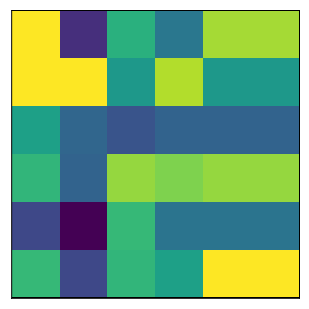

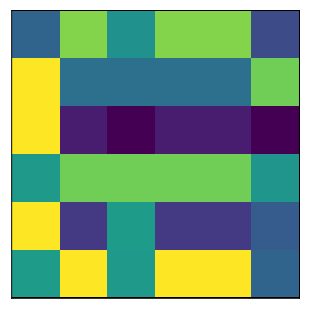

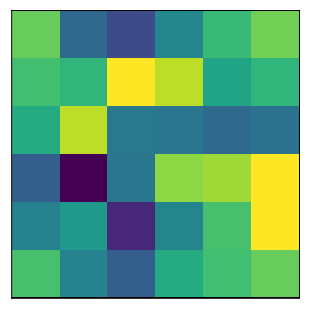

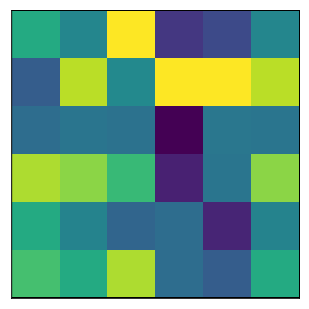

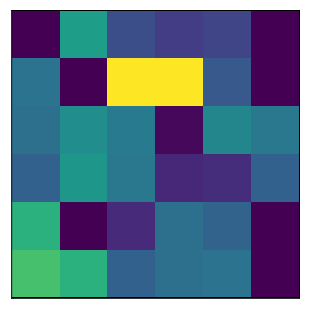

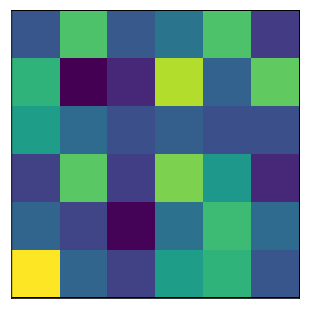

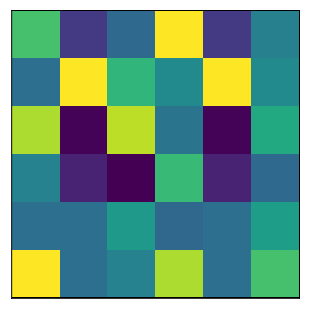

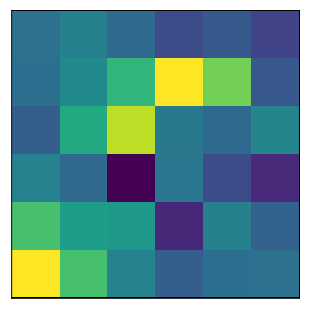

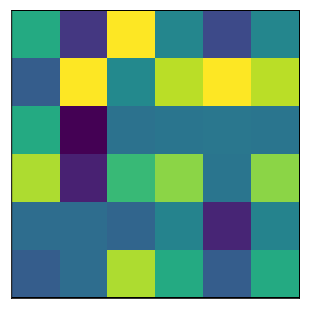

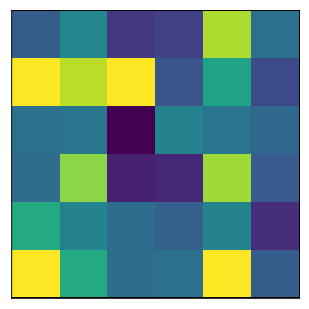

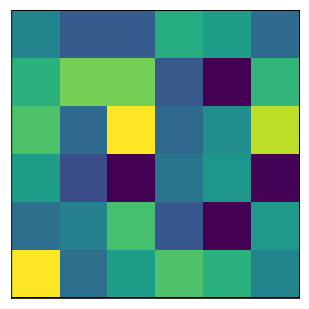

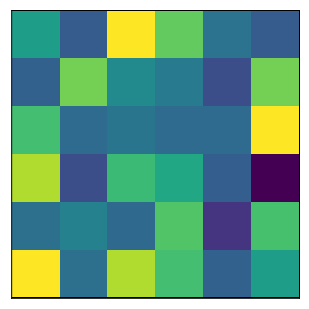

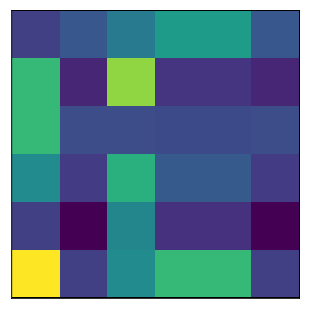

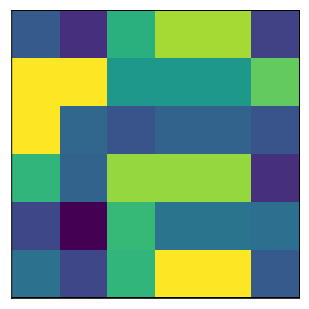

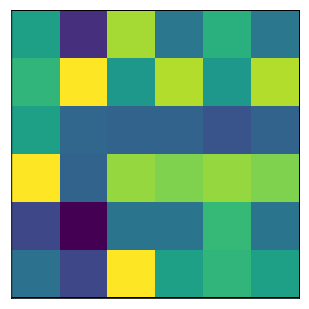

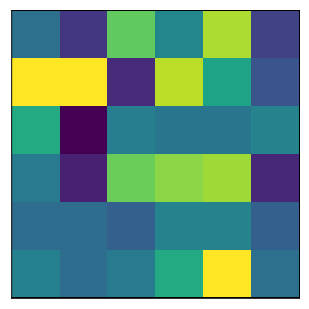

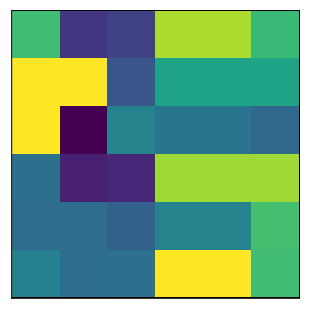

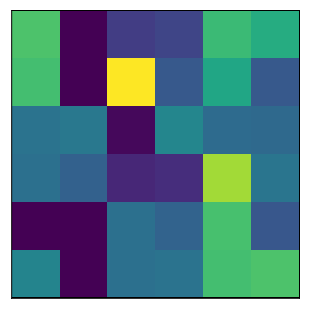

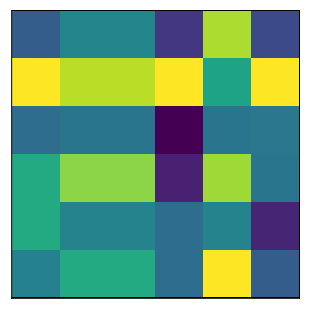

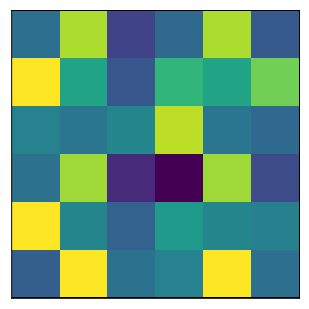

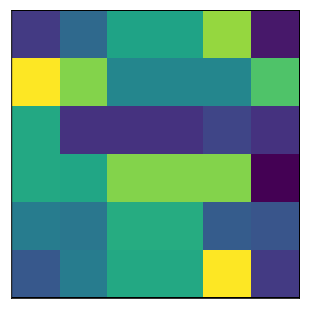

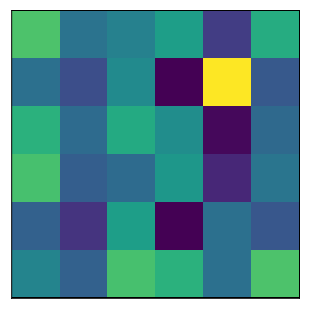

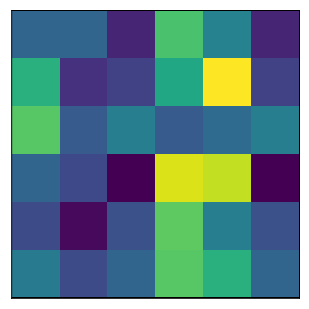

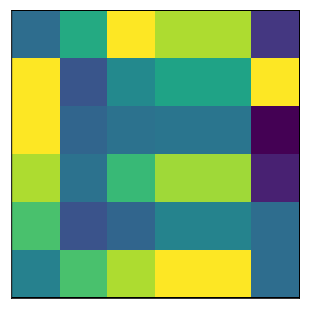

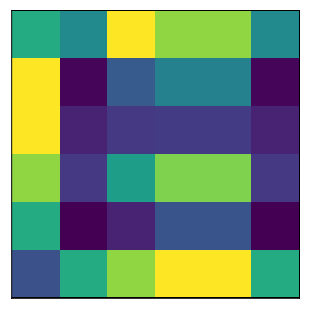

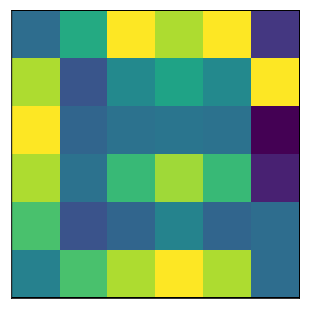

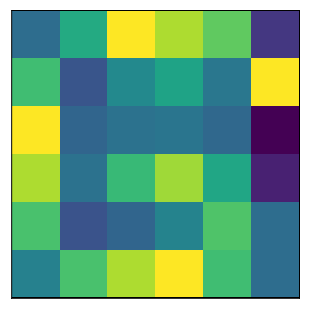

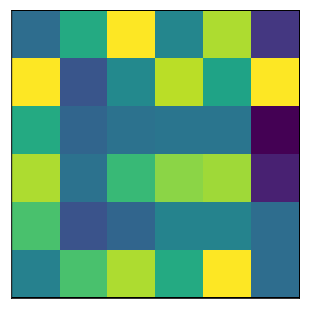

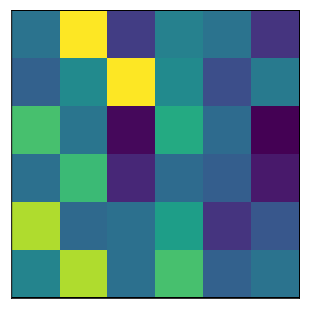

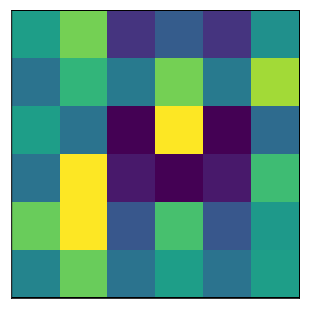

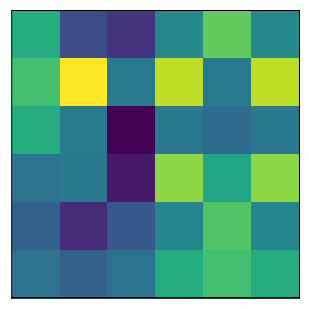

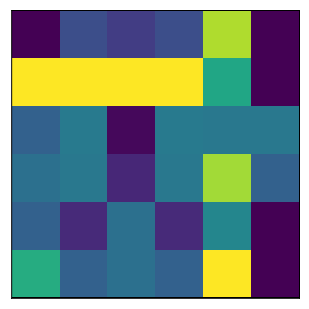

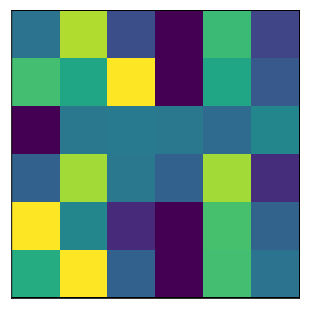

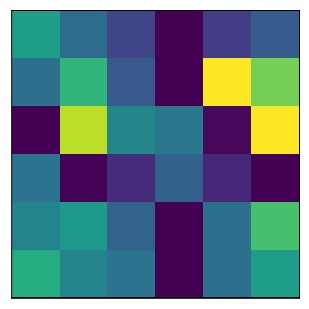

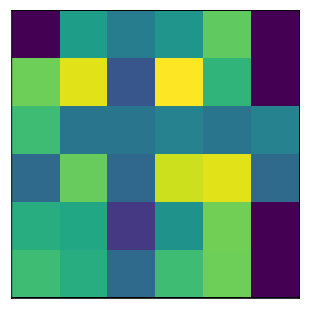

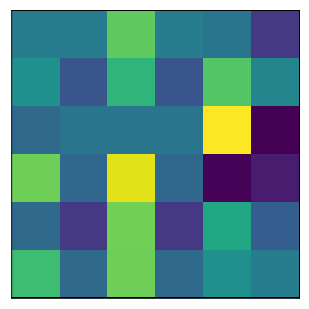

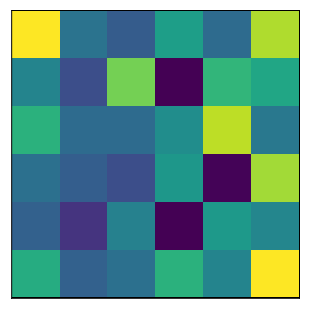

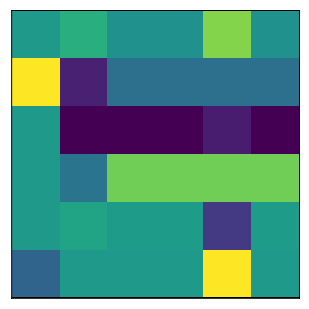

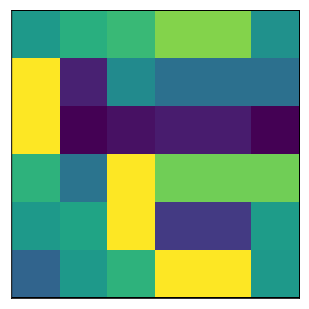

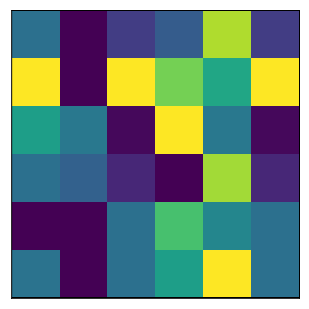

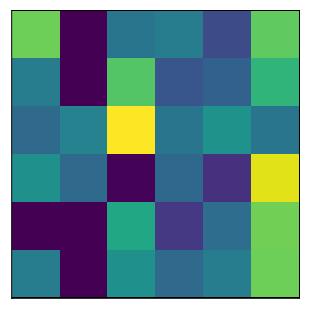

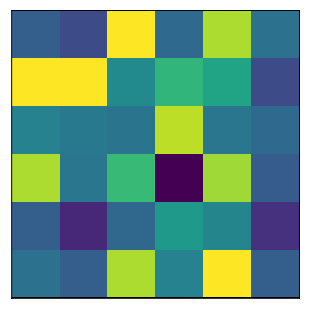

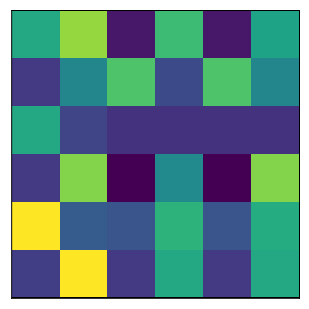

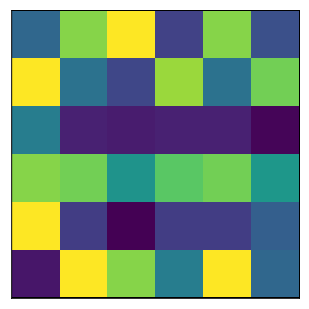

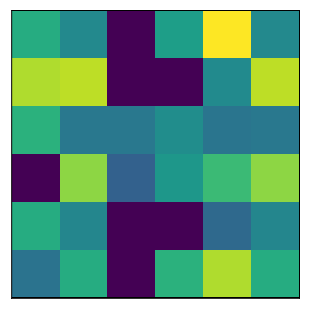

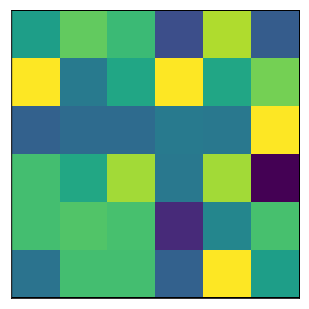

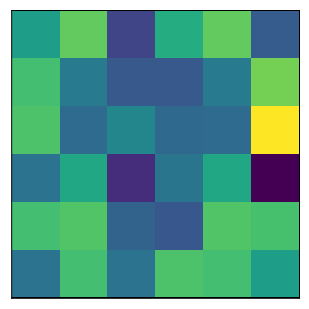

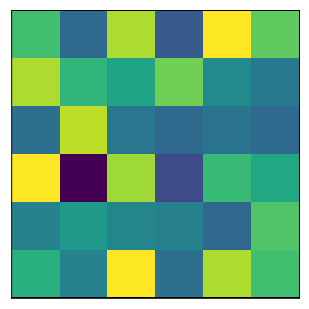

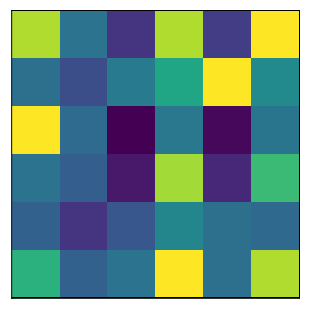

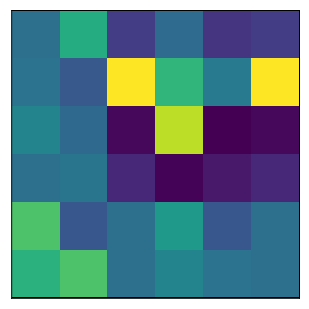

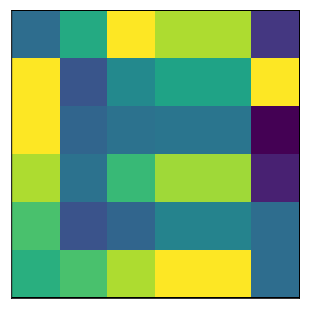

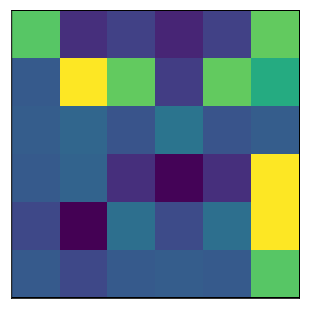

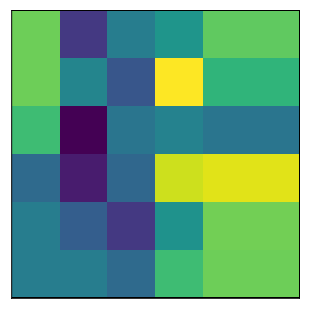

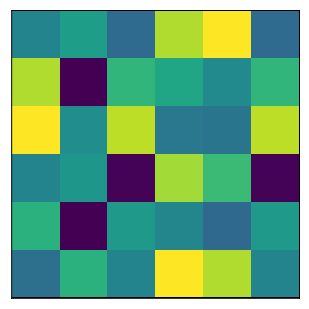

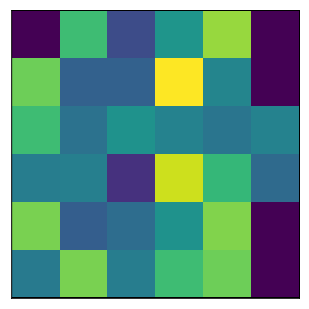

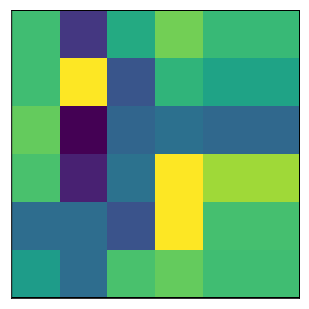

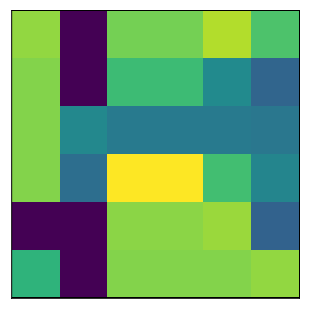

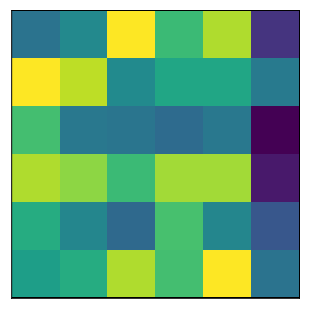

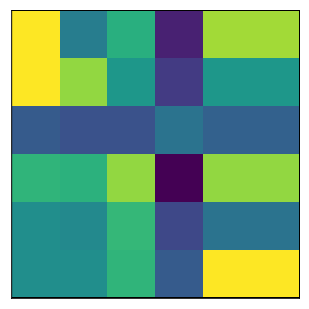

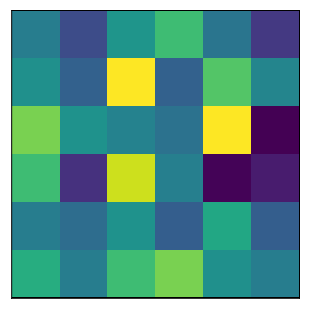

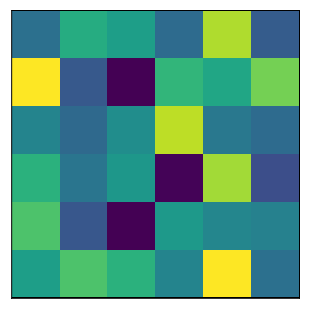

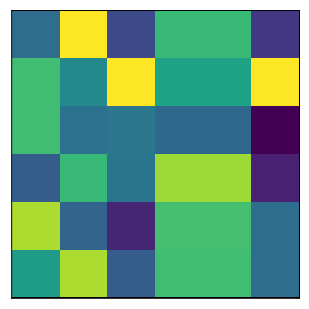

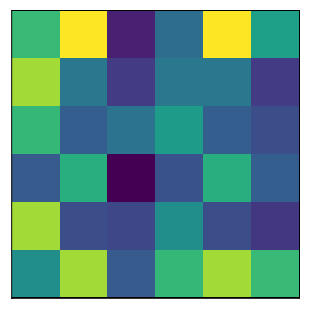

In [17]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/*.png'
df_list=[]
book_dict = {}


for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip/270_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Flip Up-down
https://note.nkmk.me/python-opencv-numpy-rotate-flip/

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_0.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_1.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_10.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_100.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_101.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_11.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_13.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_14.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_15.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_16.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_17.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_18.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_19.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whol

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_115.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_116.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_117.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_118.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_119.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_120.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_121.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_122.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_123.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_124.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_125.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_126.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_127.png
C:/Users/user/OneDriv

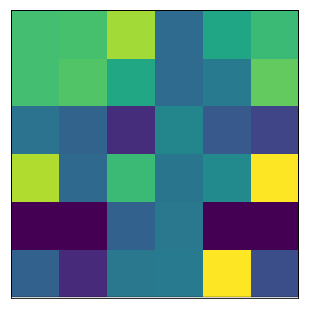

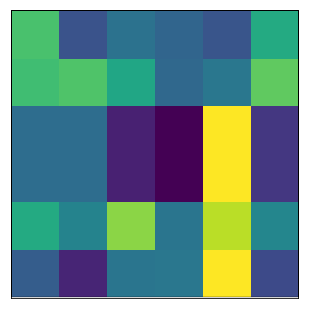

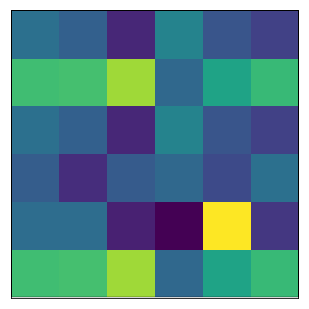

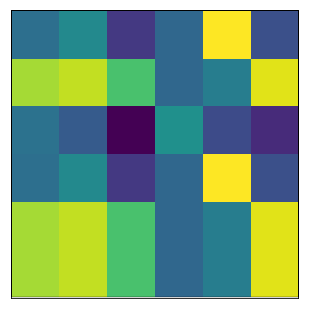

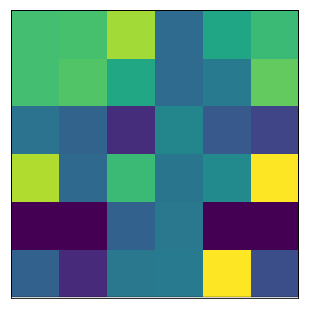

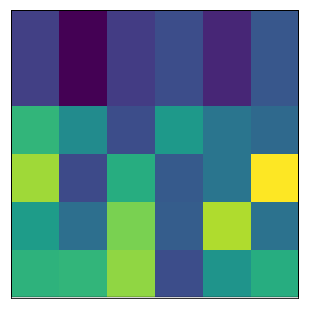

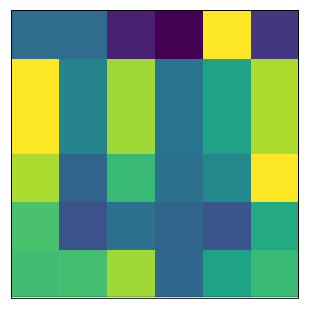

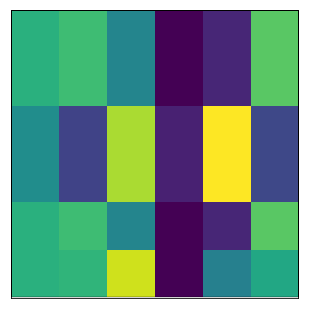

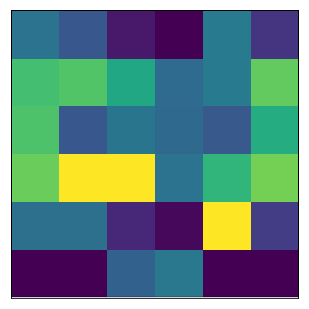

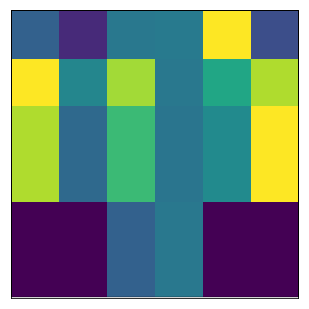

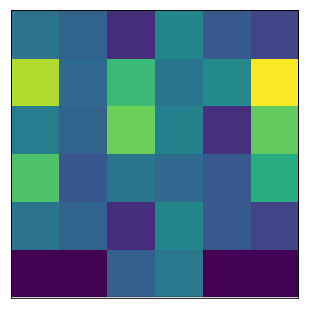

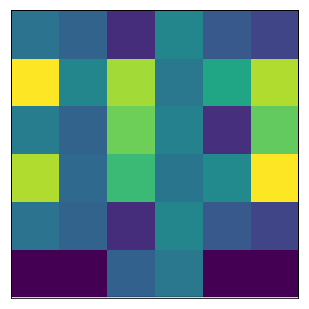

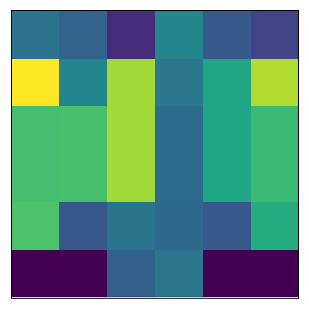

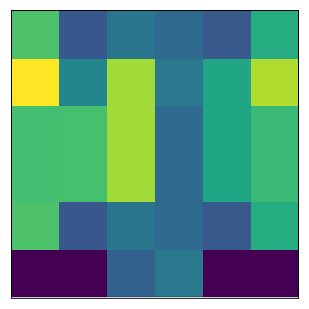

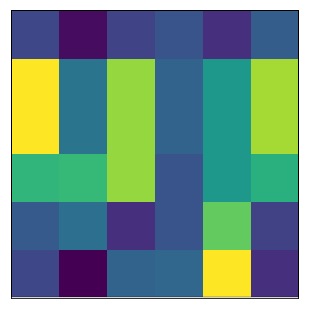

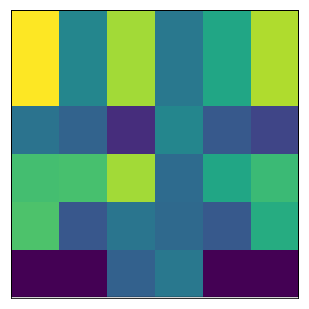

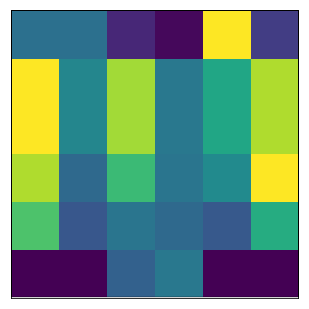

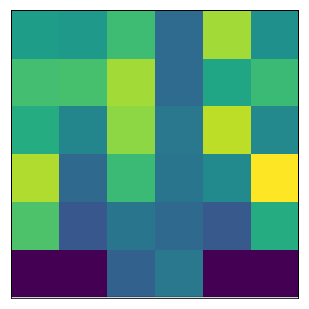

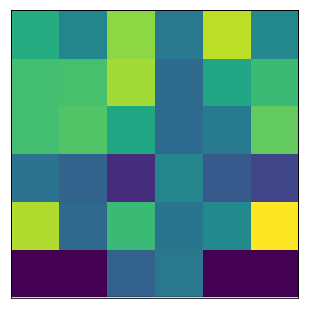

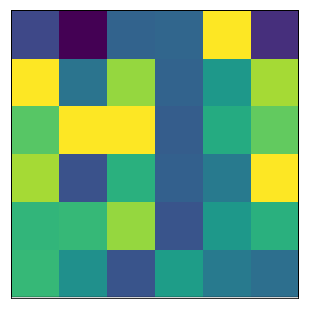

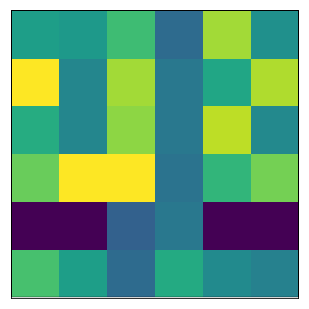

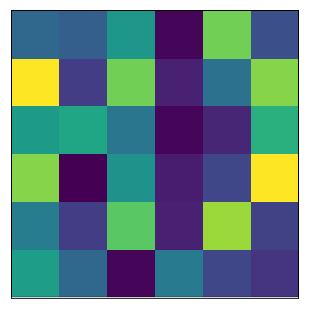

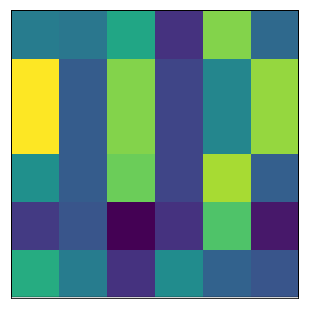

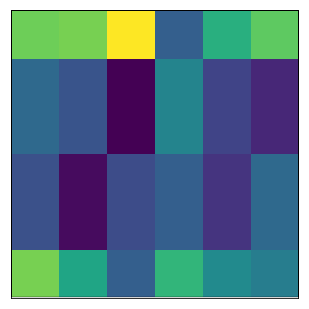

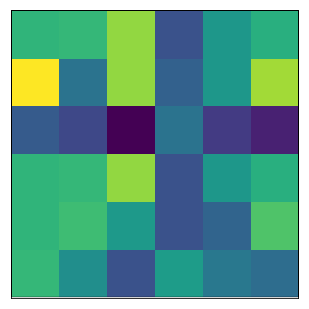

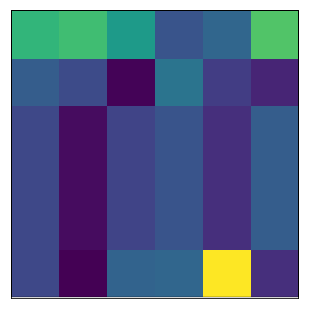

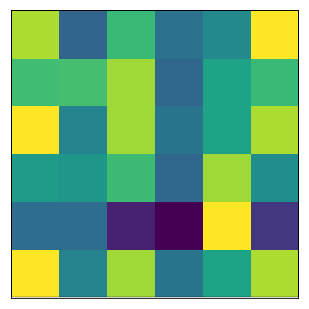

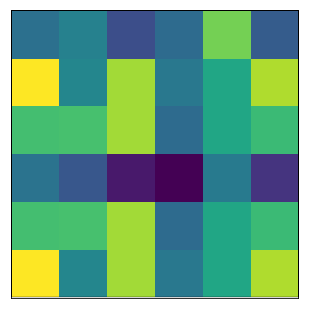

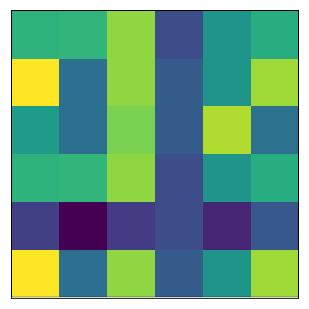

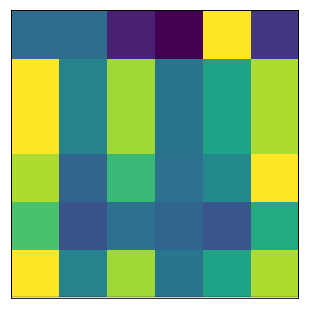

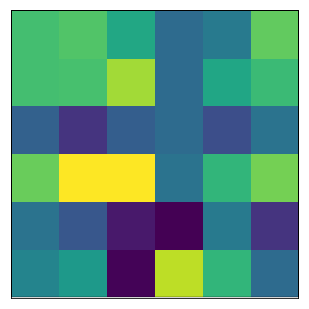

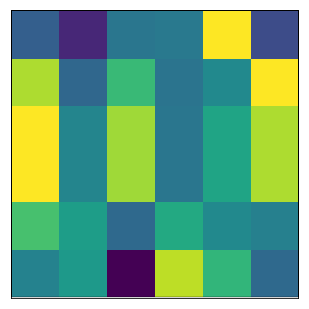

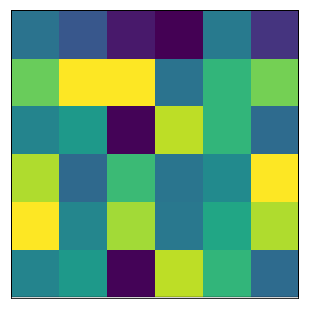

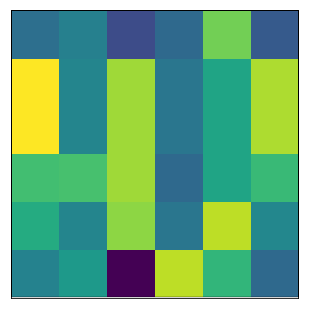

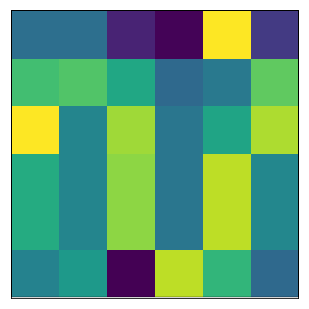

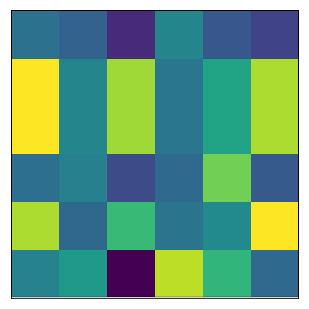

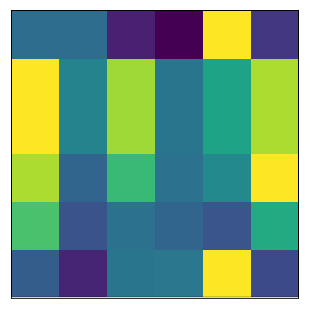

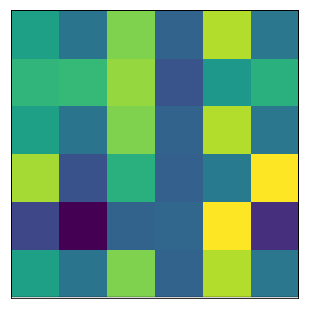

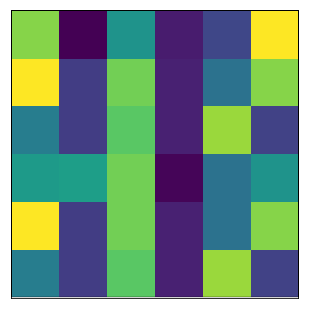

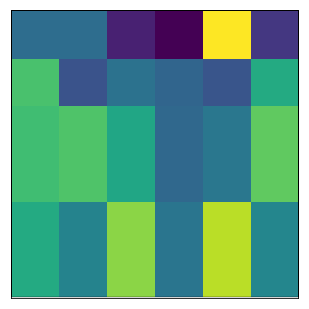

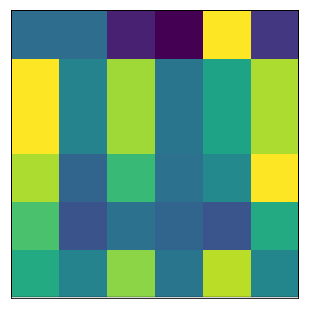

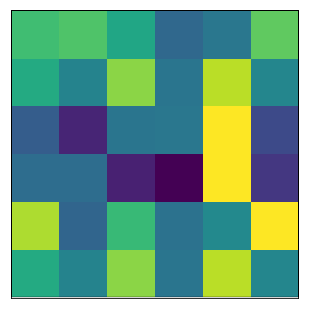

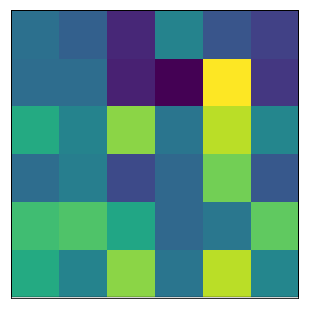

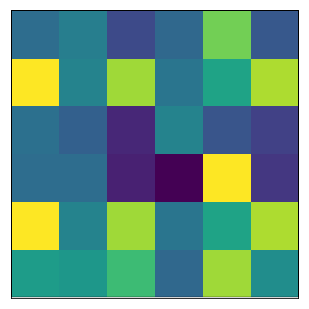

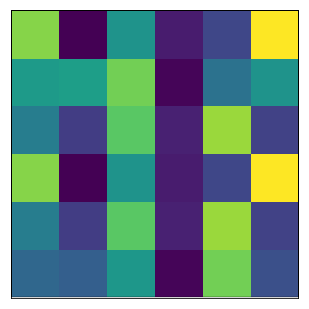

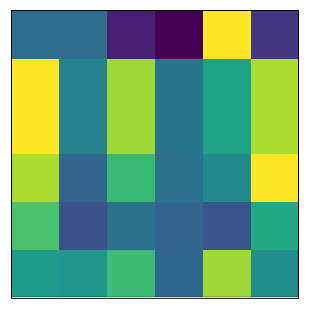

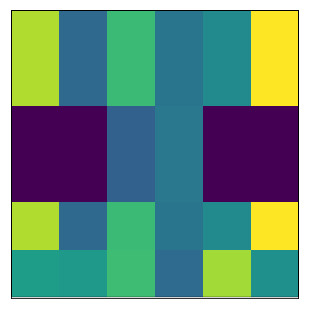

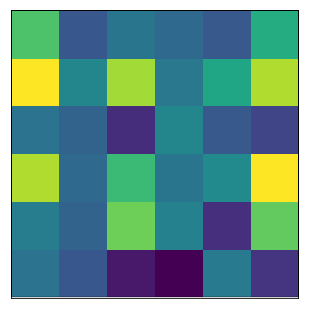

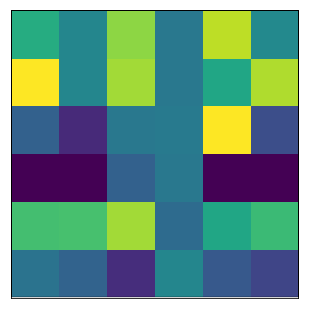

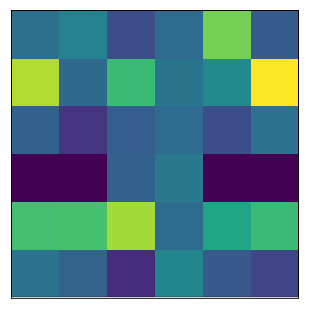

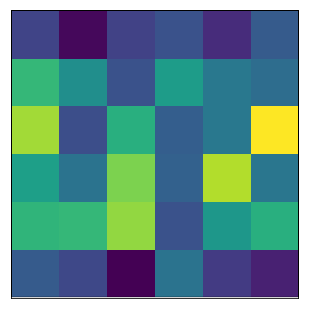

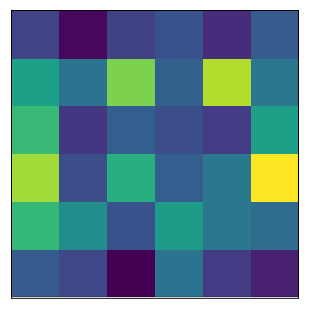

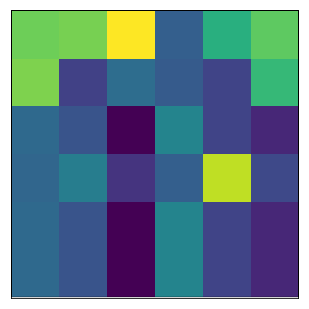

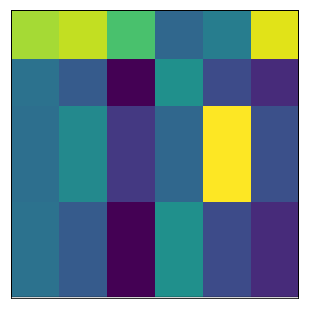

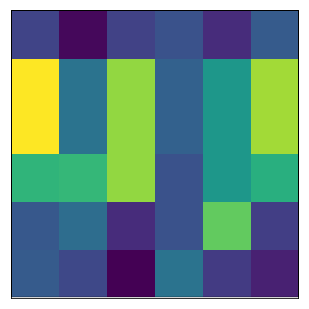

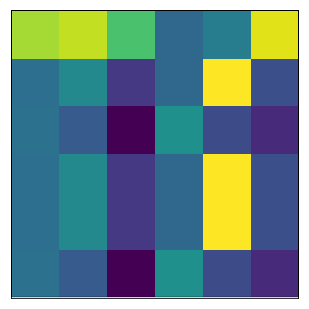

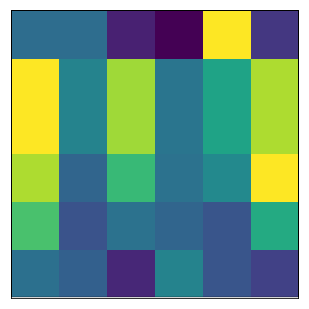

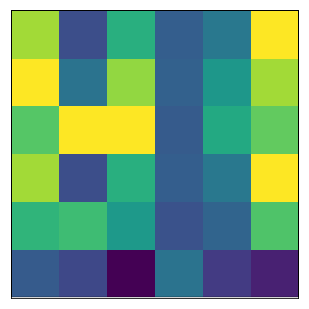

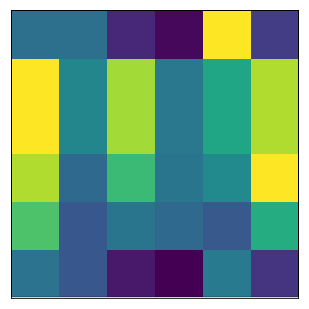

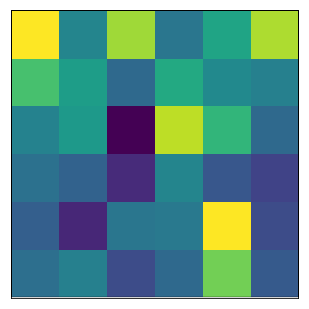

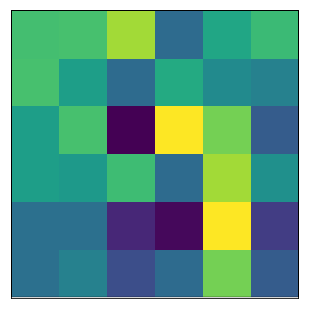

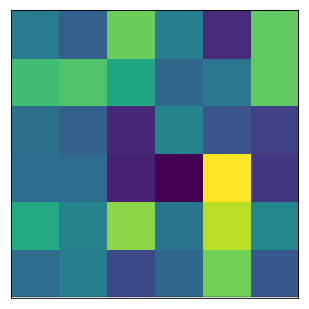

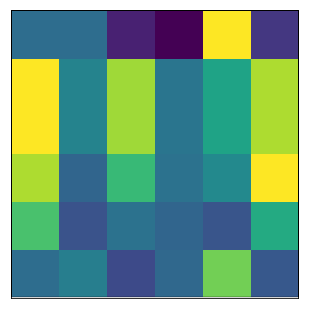

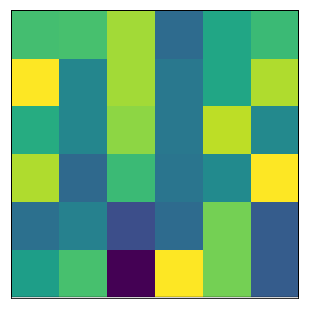

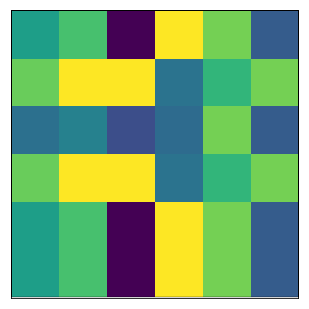

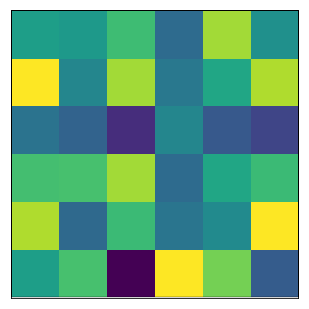

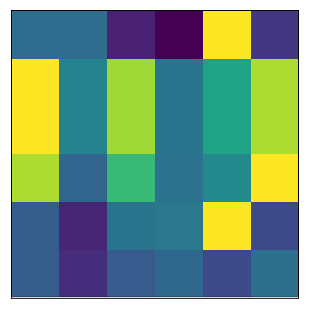

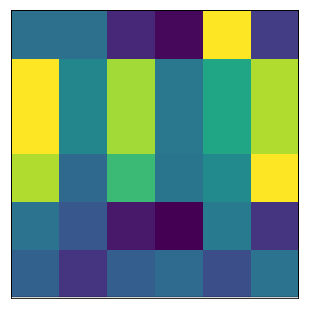

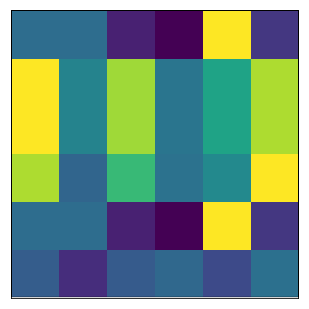

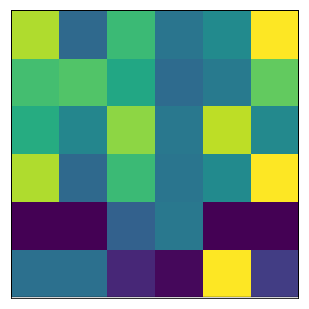

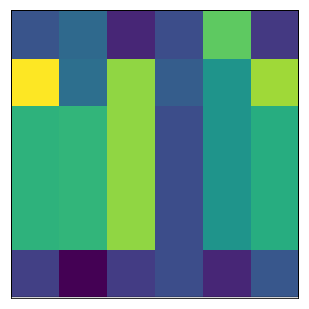

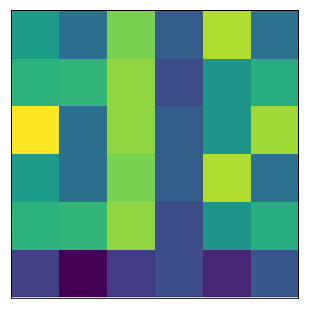

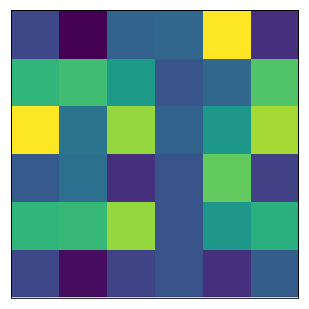

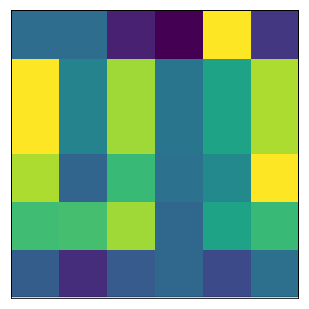

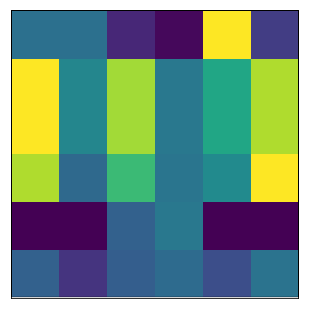

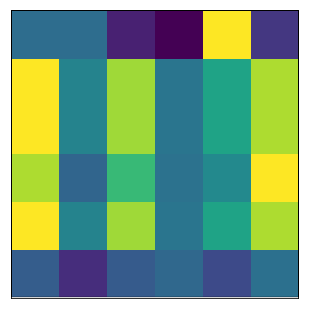

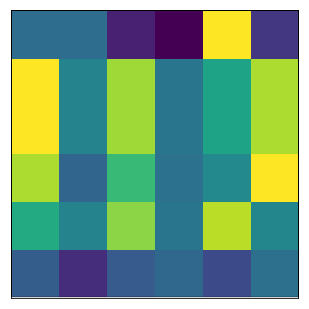

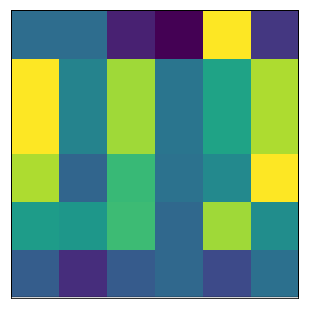

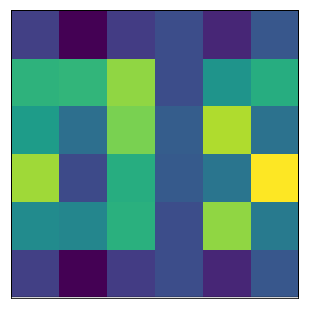

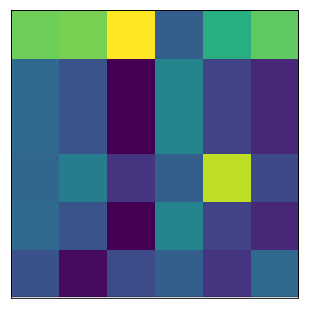

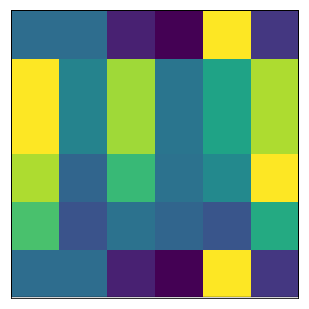

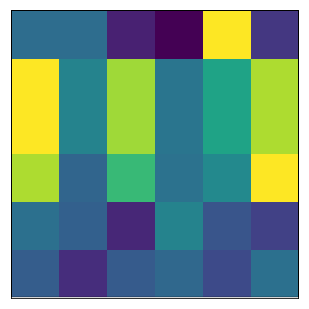

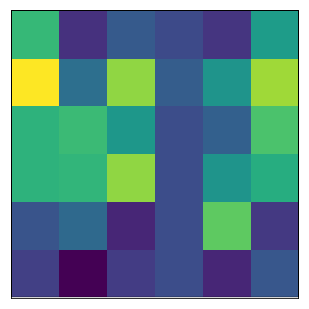

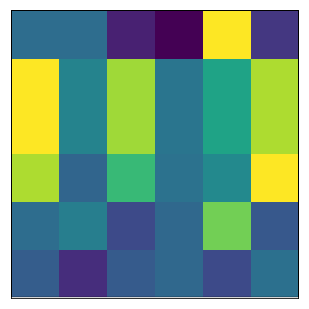

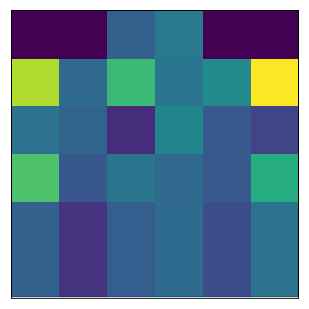

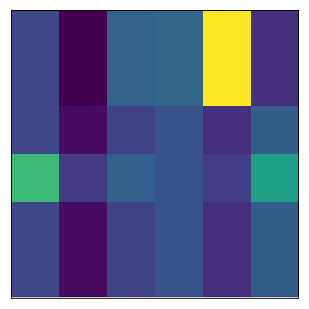

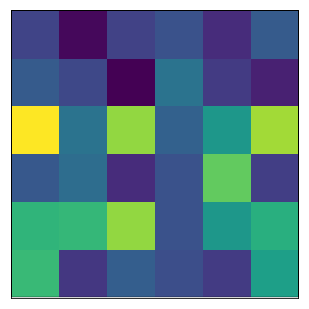

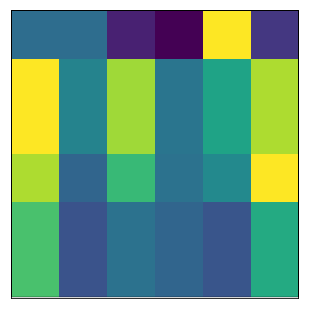

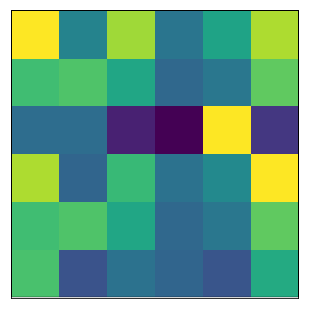

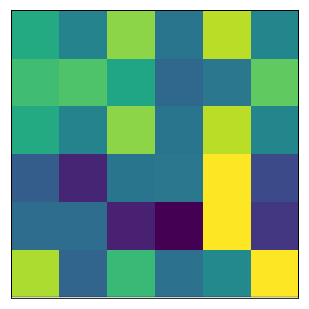

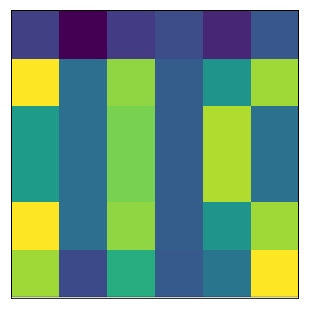

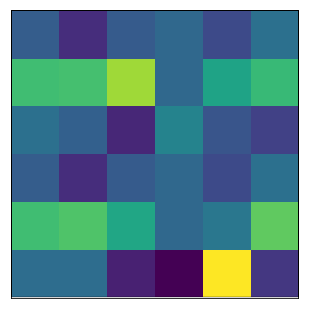

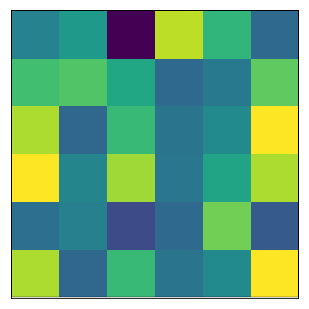

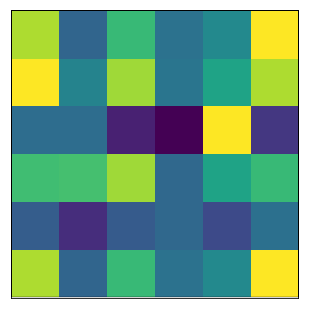

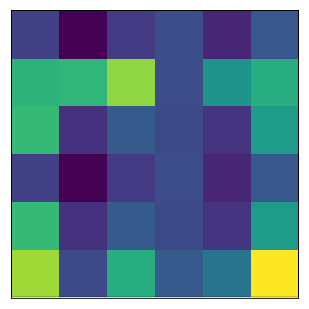

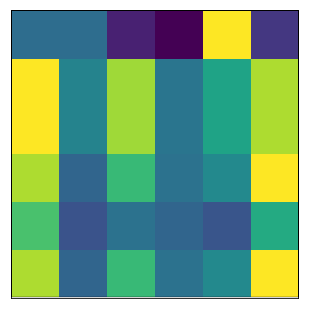

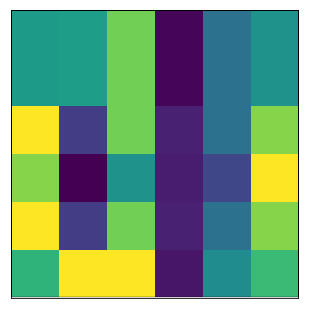

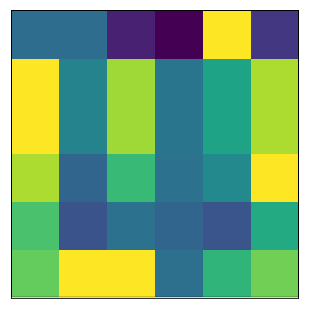

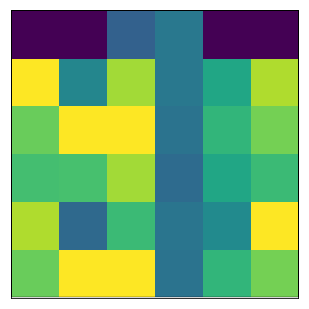

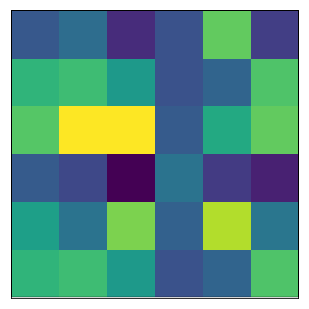

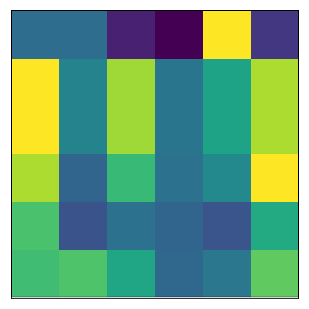

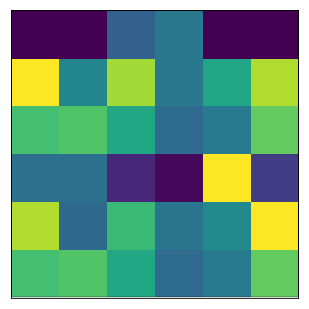

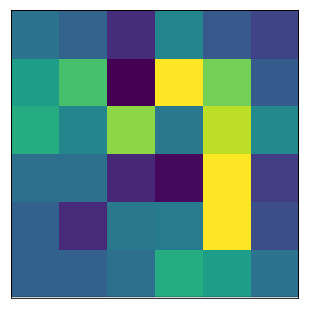

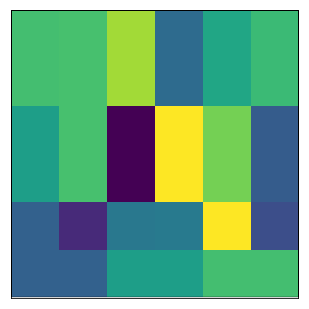

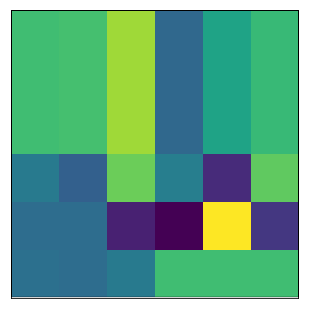

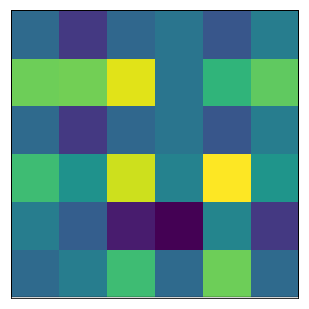

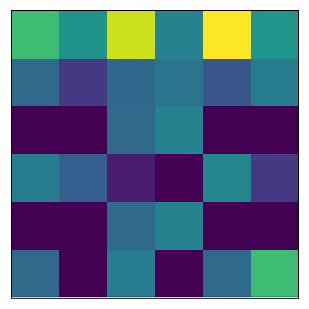

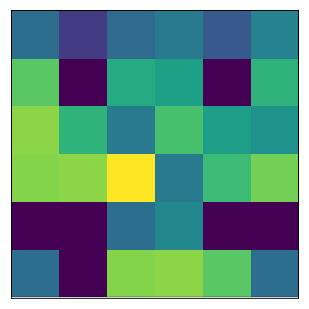

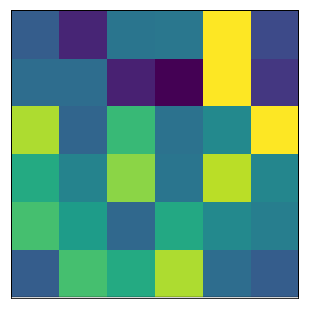

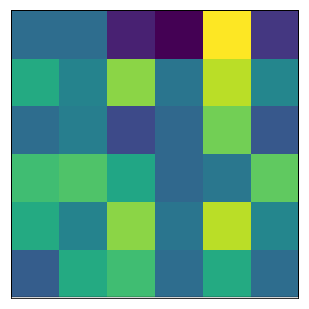

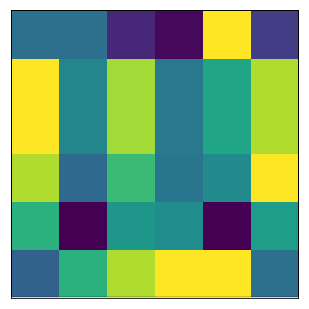

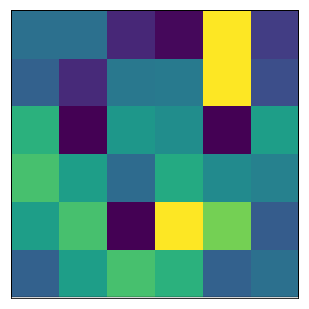

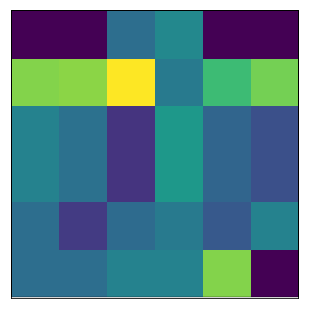

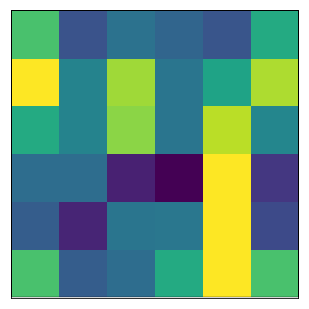

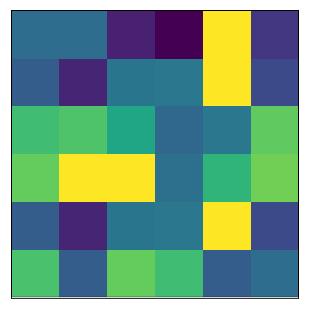

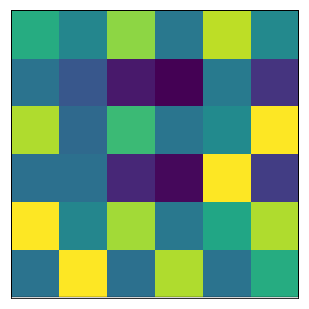

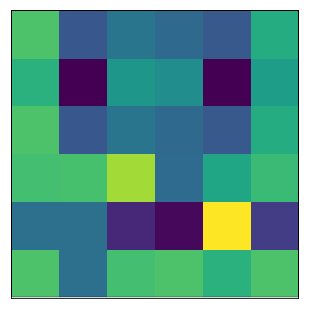

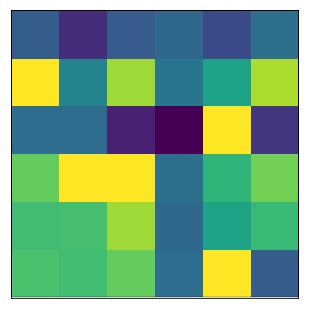

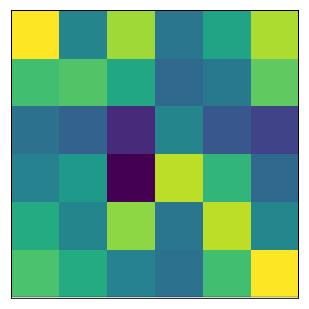

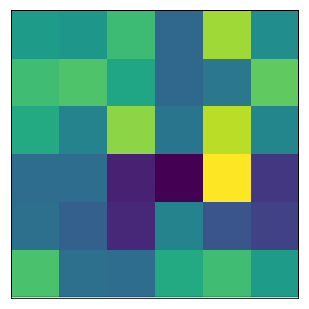

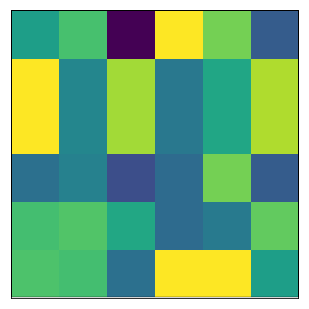

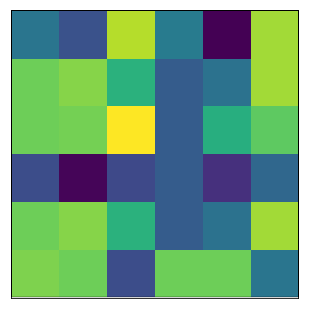

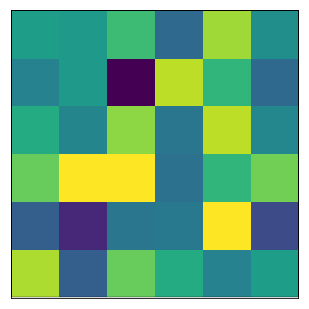

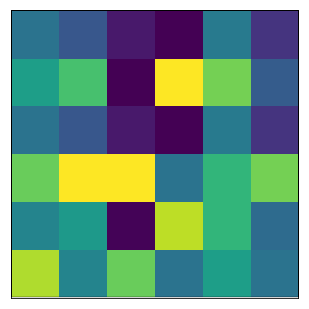

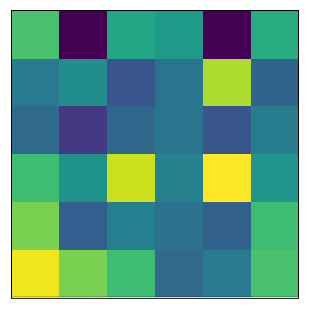

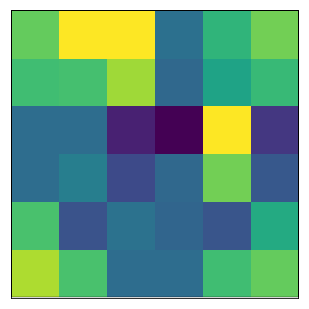

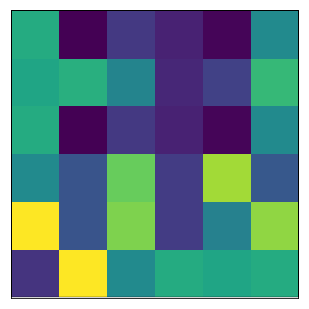

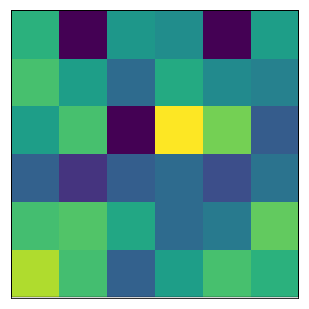

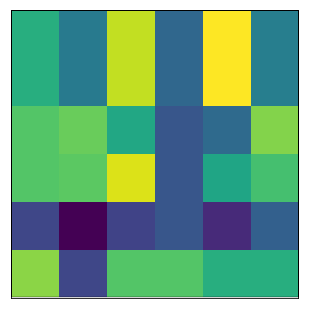

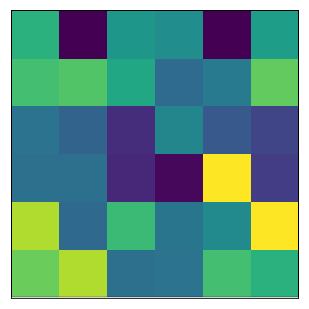

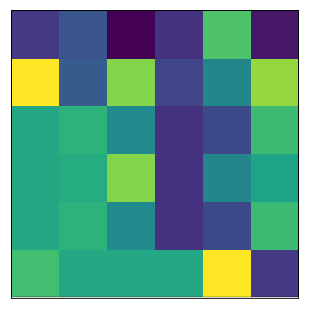

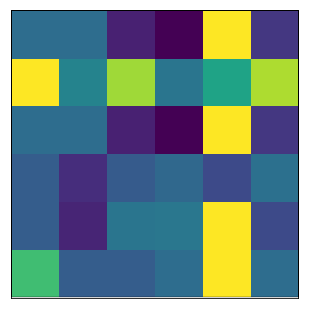

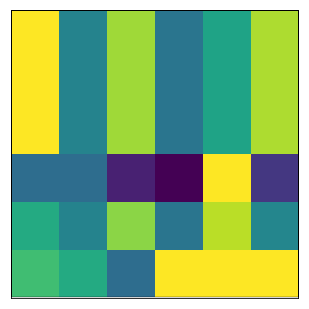

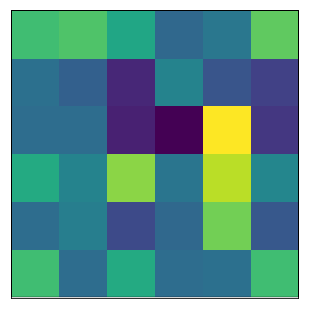

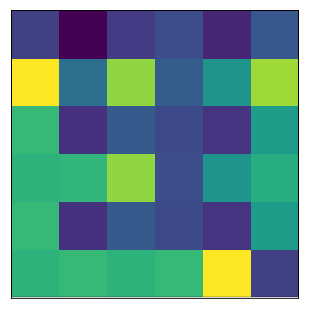

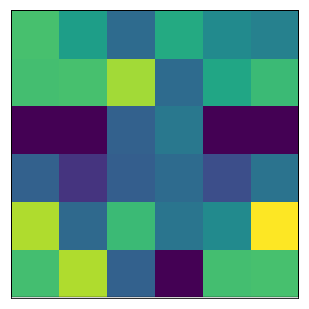

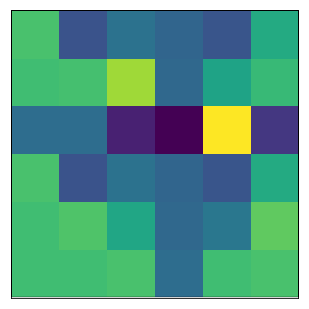

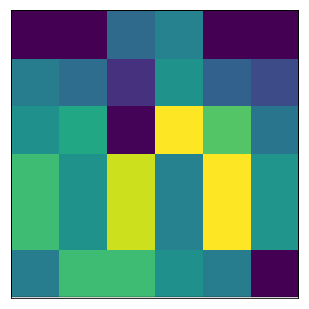

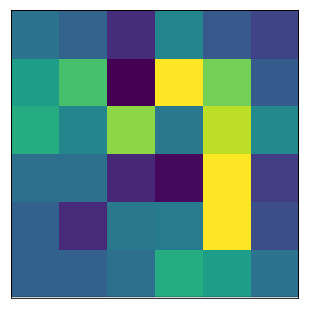

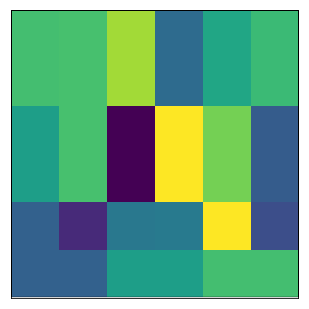

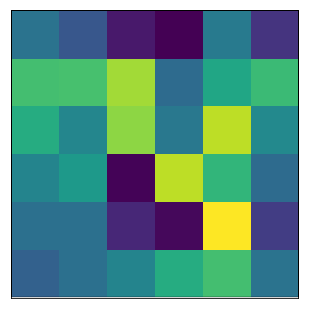

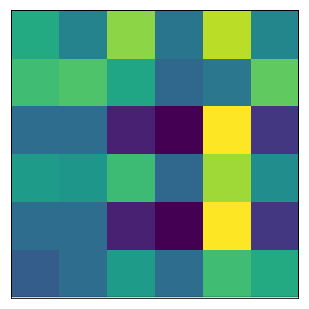

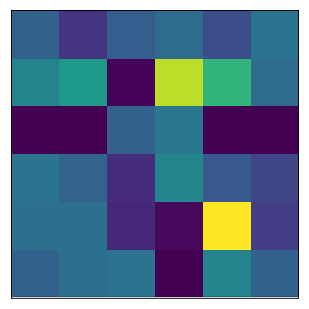

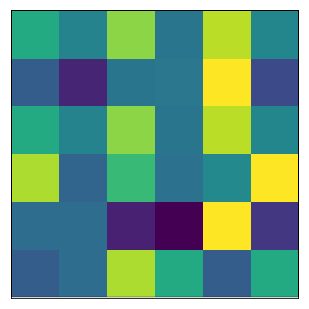

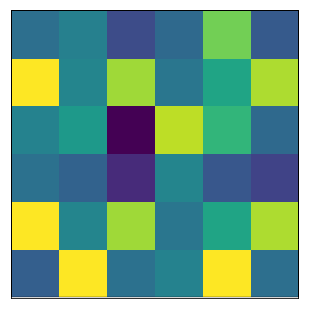

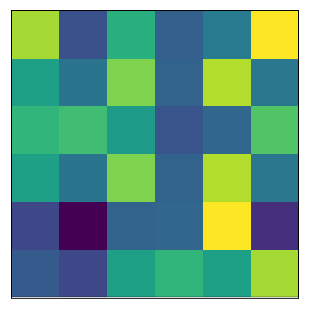

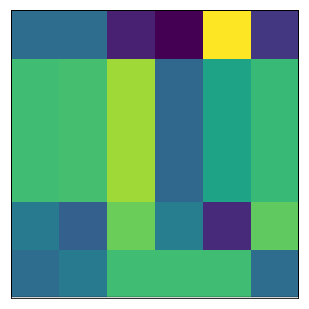

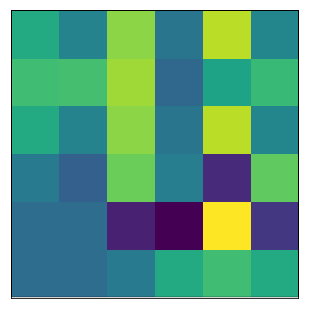

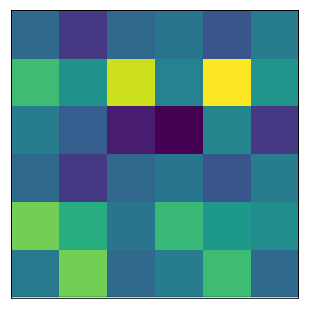

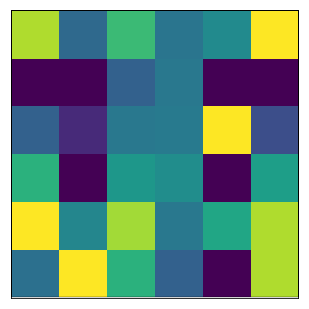

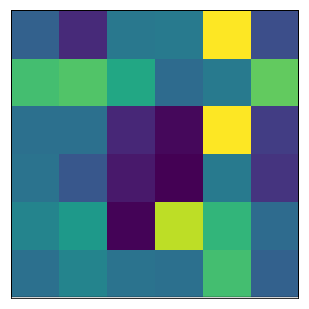

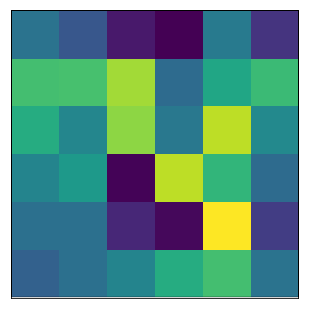

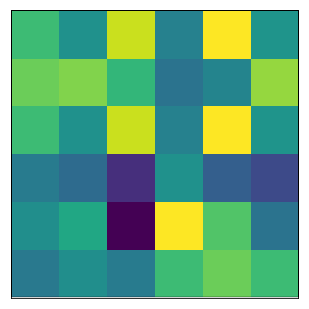

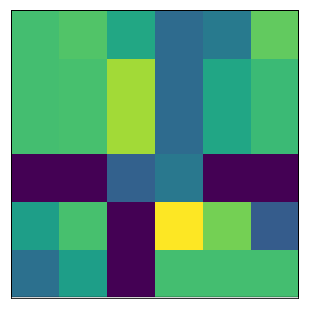

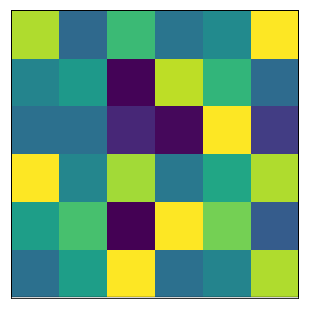

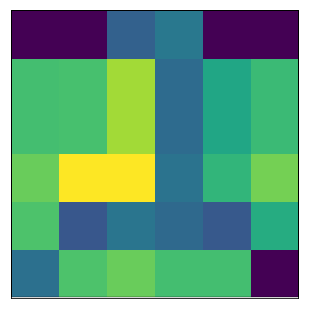

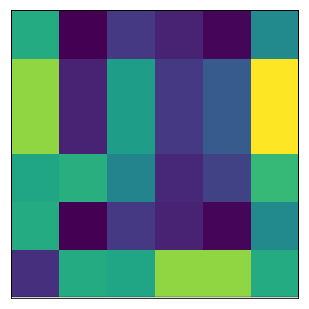

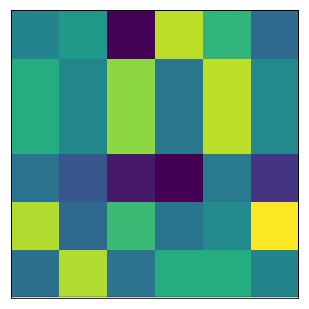

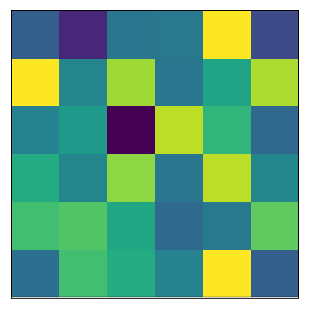

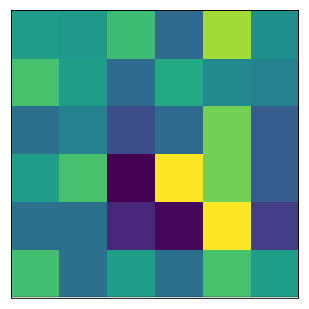

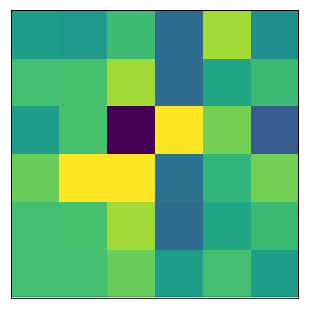

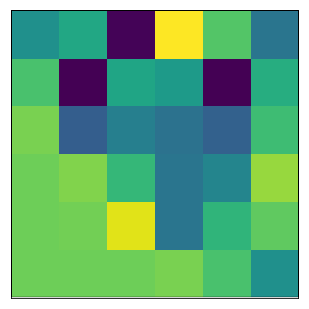

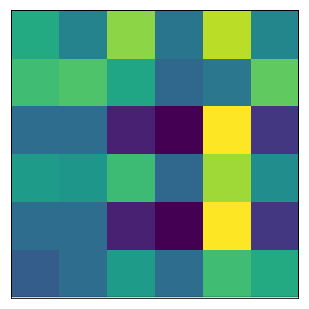

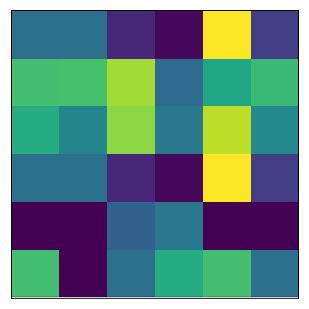

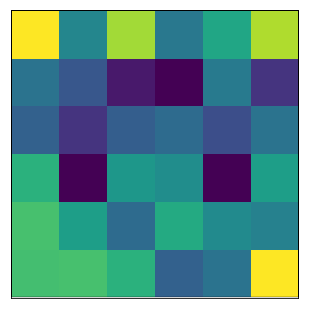

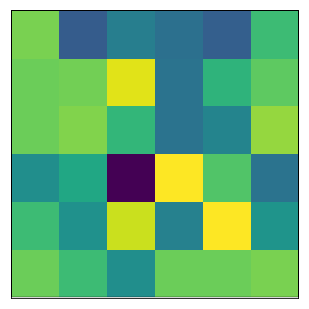

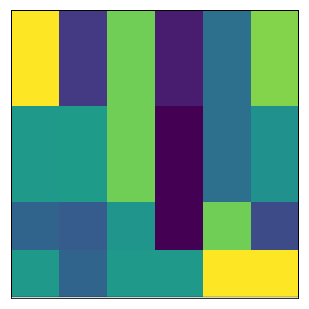

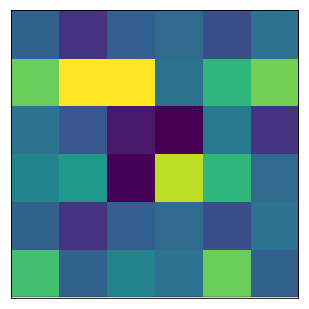

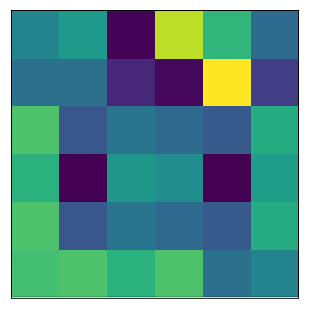

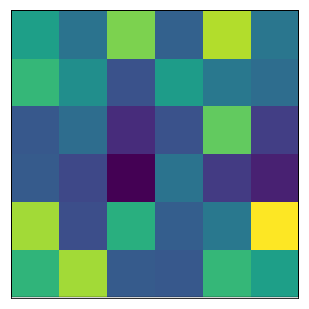

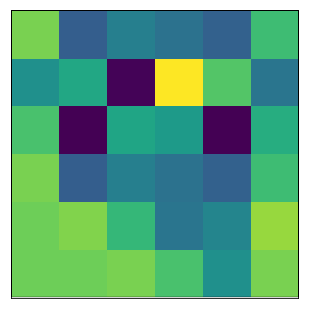

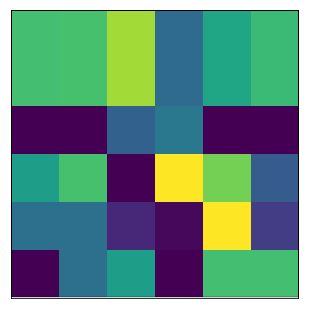

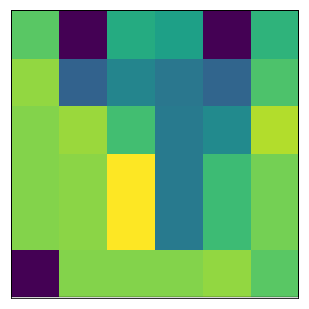

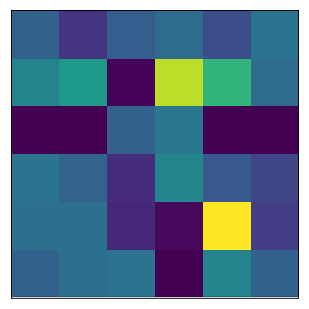

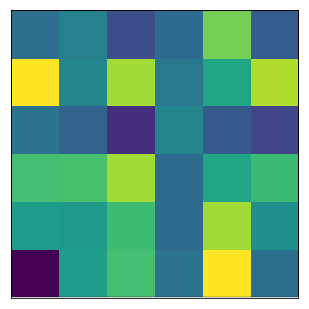

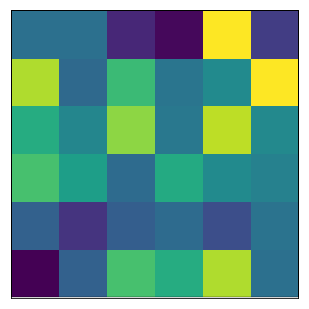

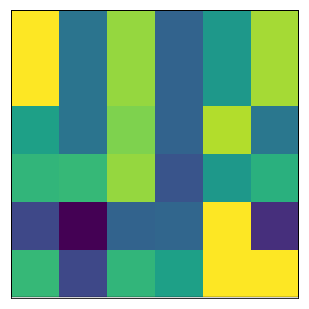

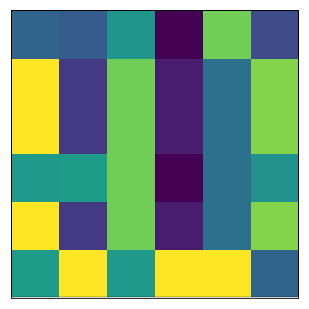

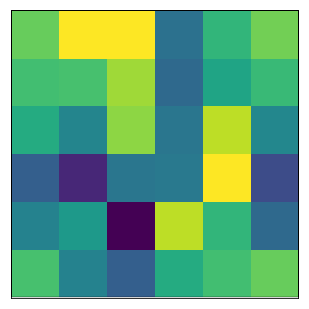

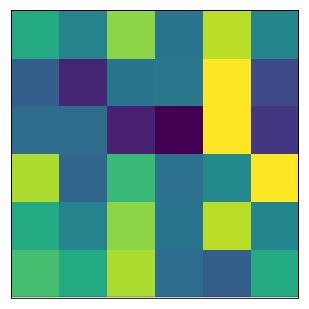

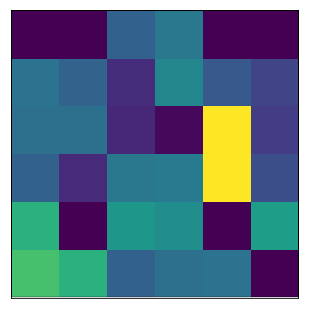

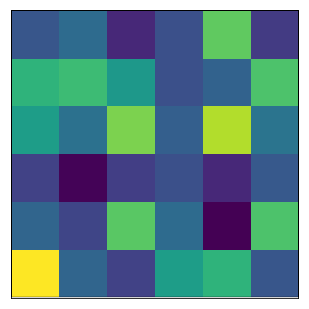

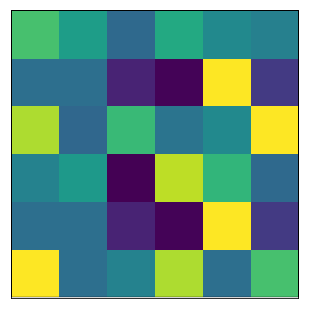

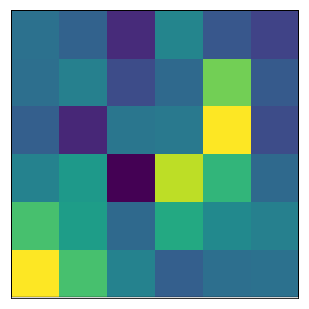

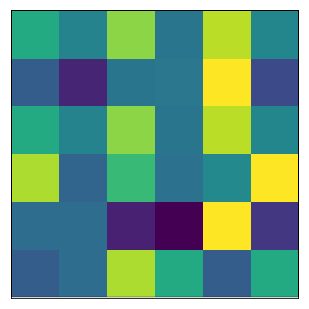

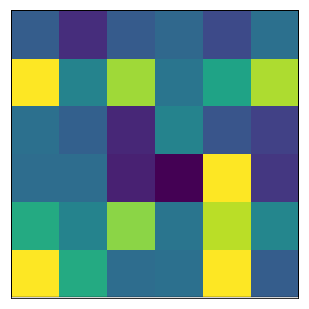

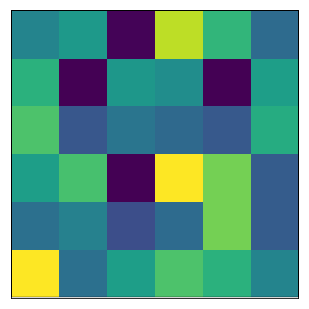

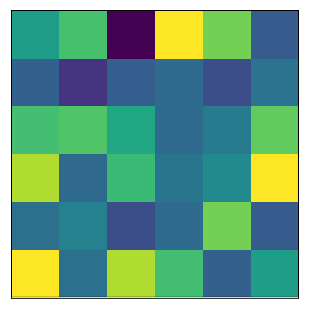

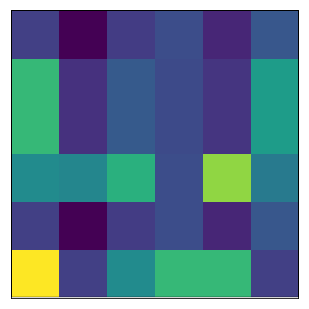

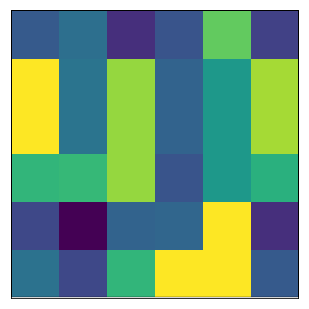

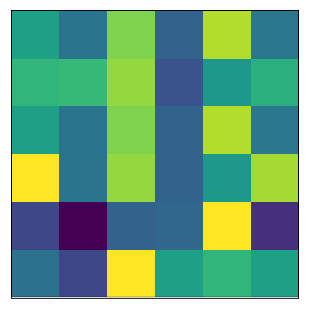

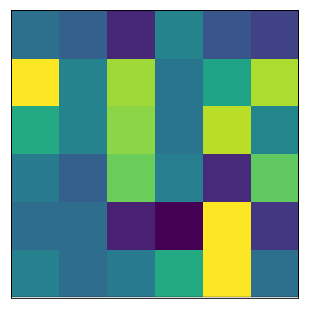

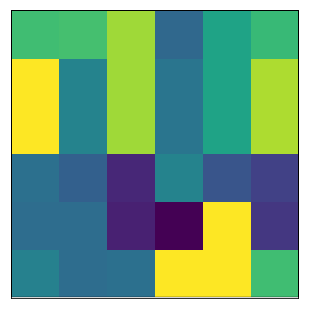

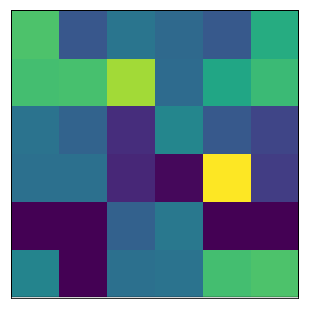

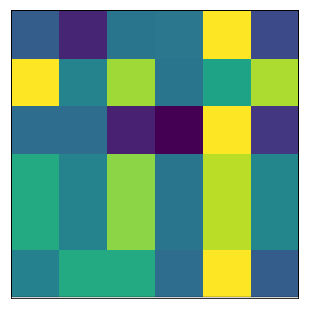

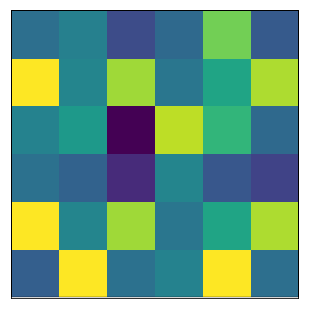

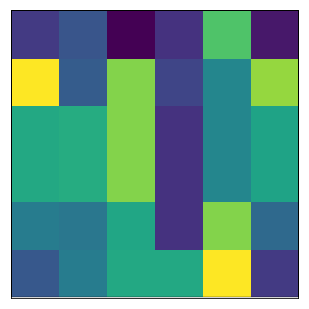

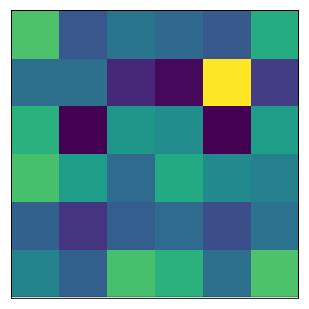

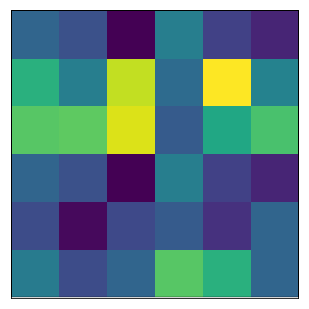

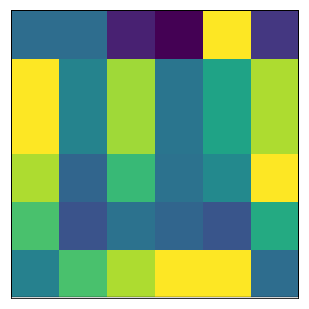

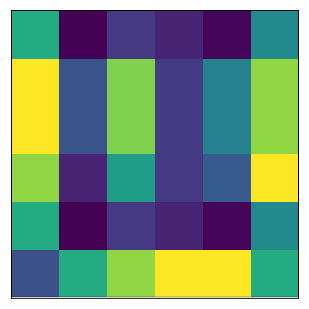

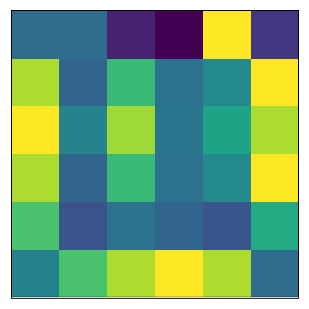

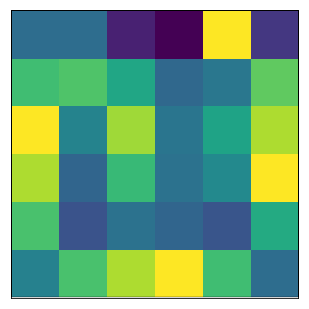

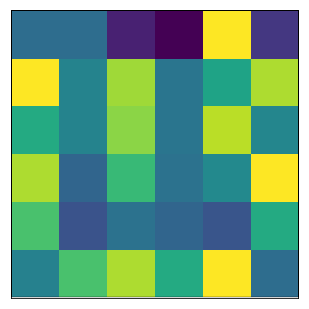

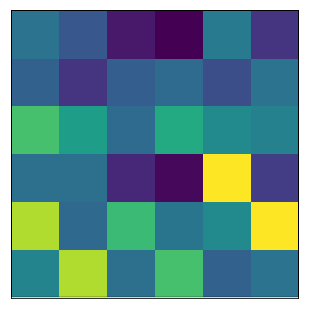

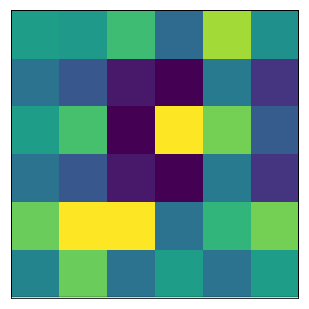

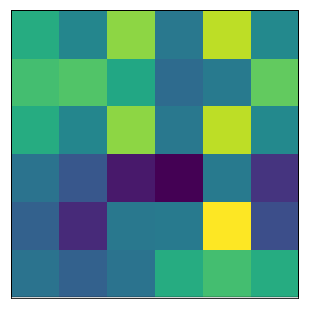

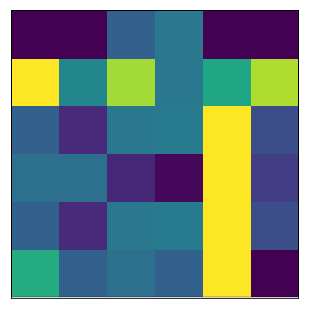

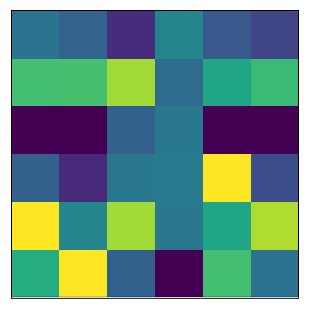

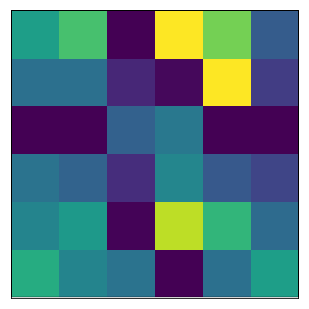

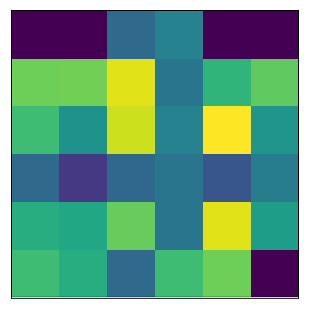

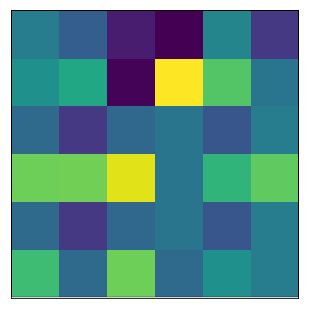

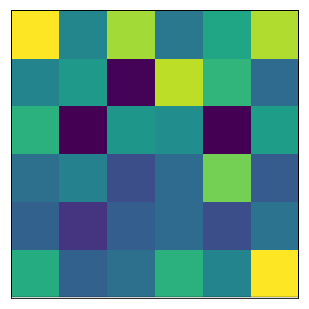

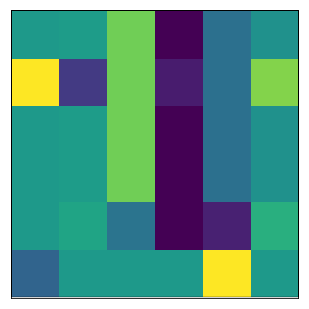

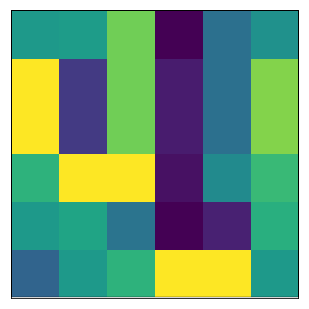

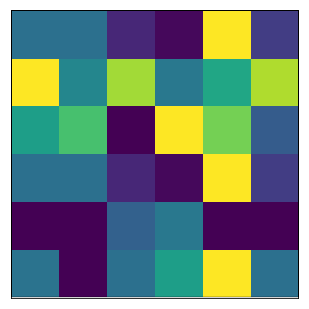

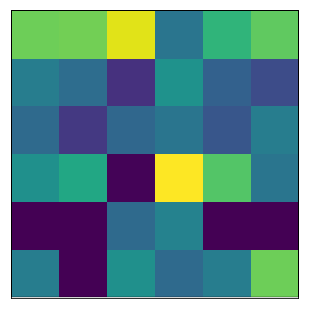

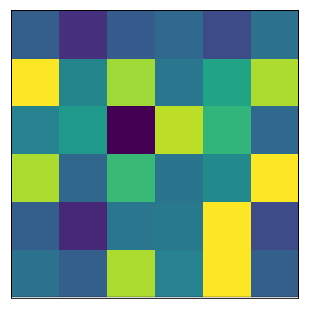

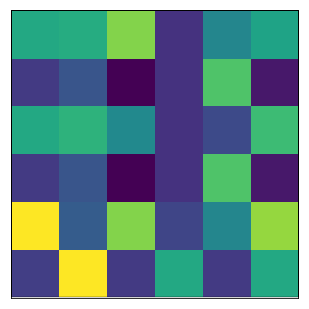

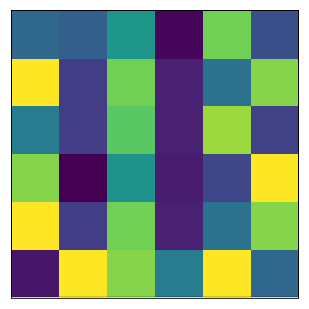

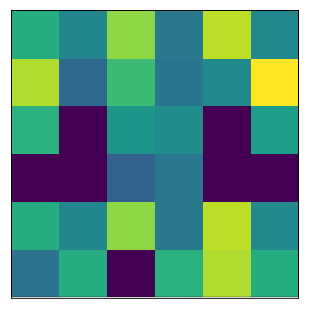

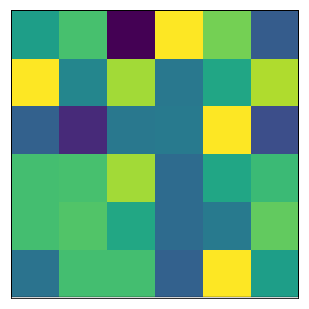

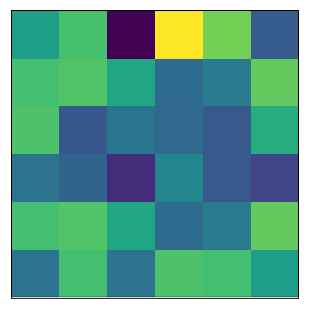

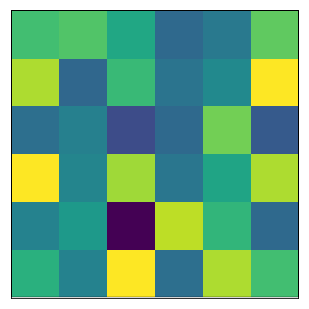

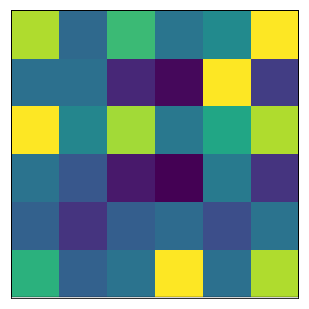

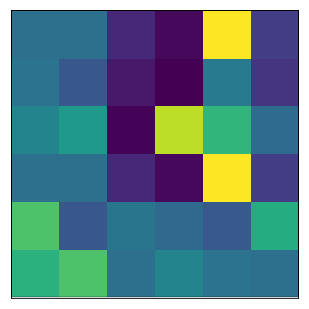

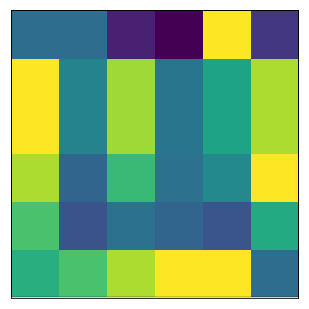

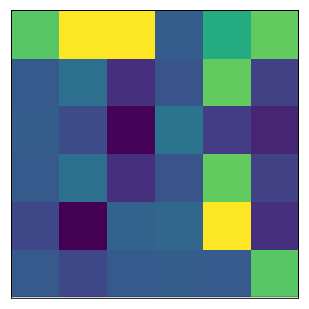

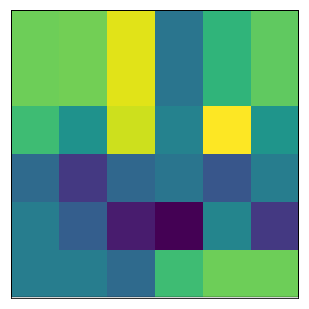

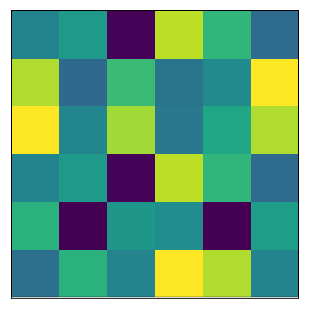

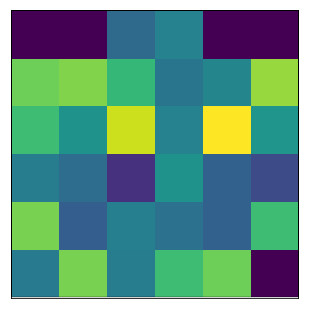

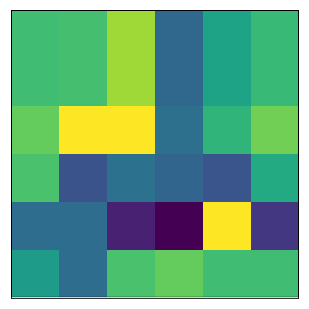

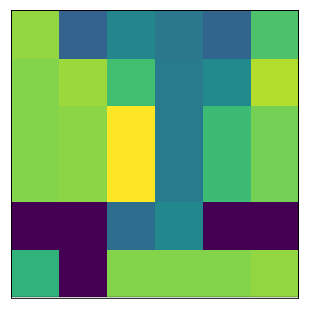

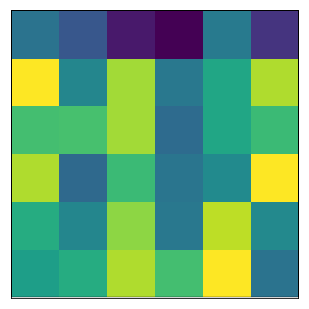

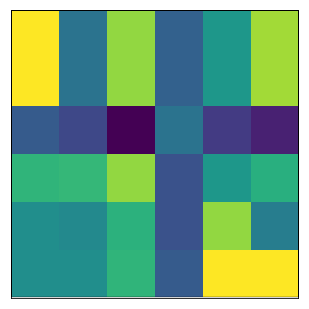

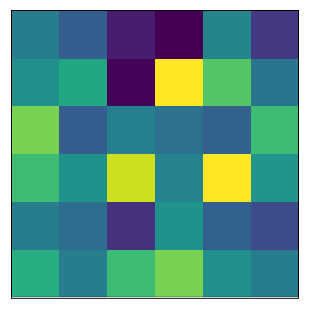

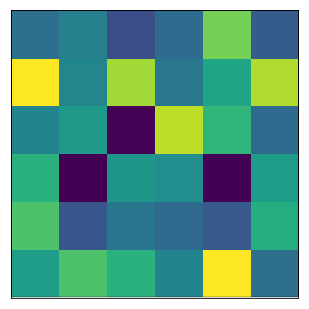

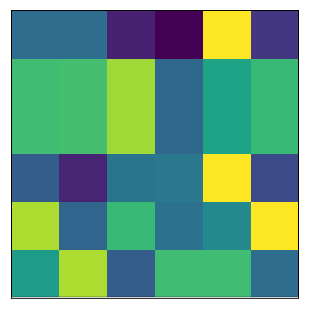

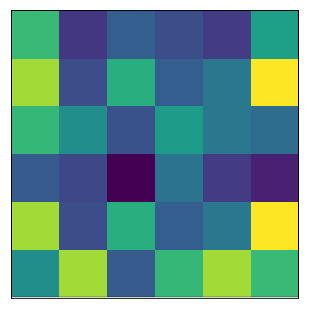

In [18]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/*.png'
df_list=[]
book_dict = {}


for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.flip(img, 0)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    
    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip/flipUD_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Flip Left-Right

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_0.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_1.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_10.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_100.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_101.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_11.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_13.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_14.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_15.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_16.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_17.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_18.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_One_19.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whol

C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_115.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_116.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_117.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_118.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_119.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_12.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_120.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_121.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_122.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_123.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_124.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_125.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_126.png
C:/Users/user/OneDrive/Jupyter/Github/Image/Whole\matrix_Zero_127.png
C:/Users/user/OneDriv

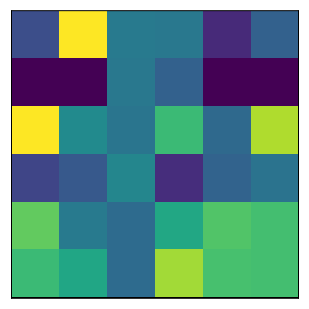

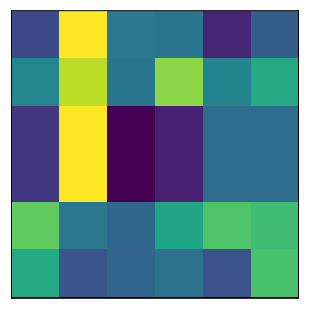

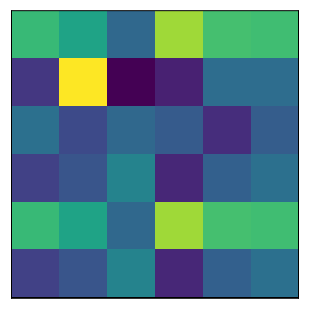

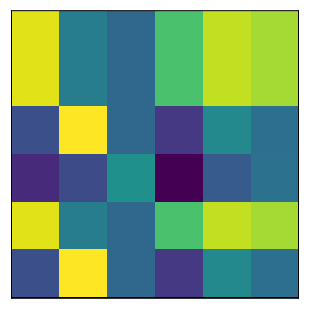

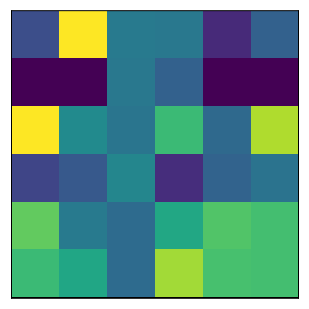

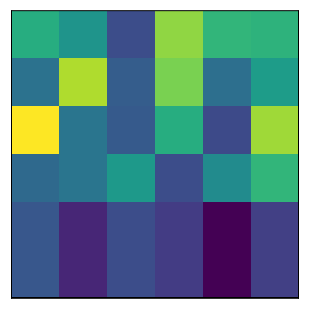

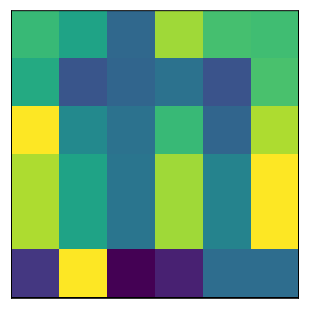

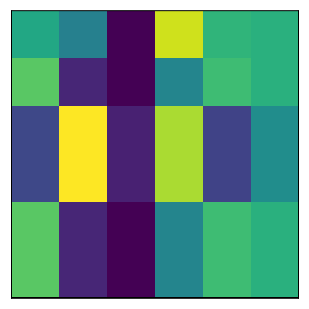

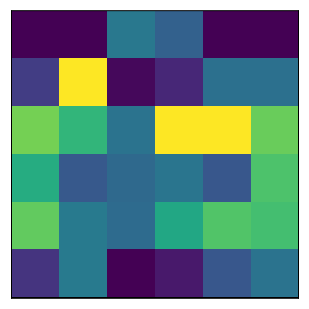

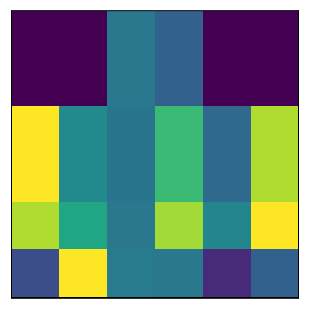

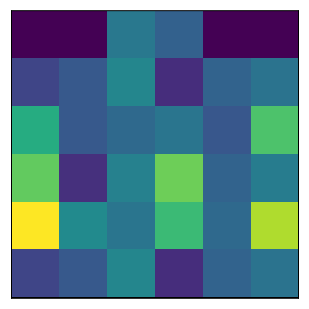

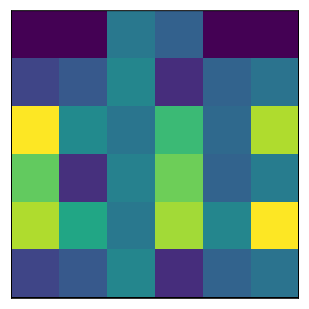

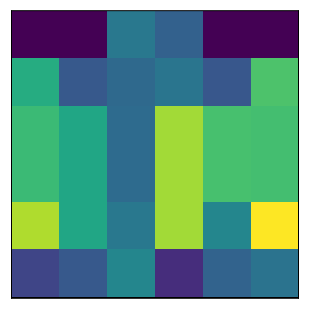

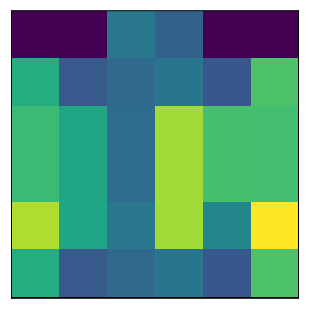

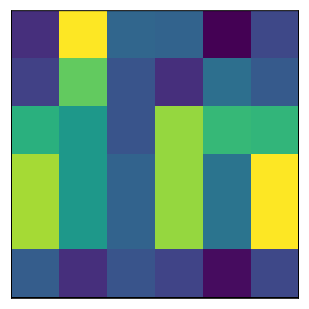

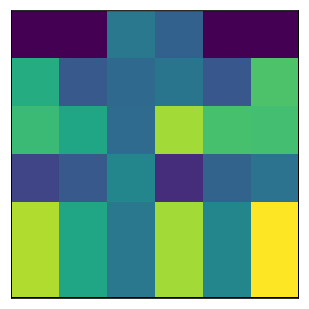

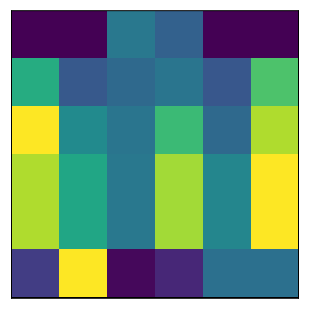

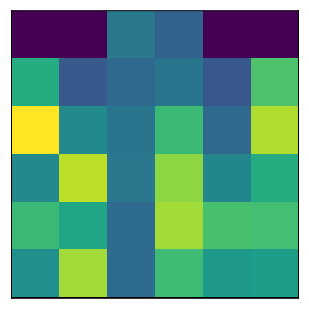

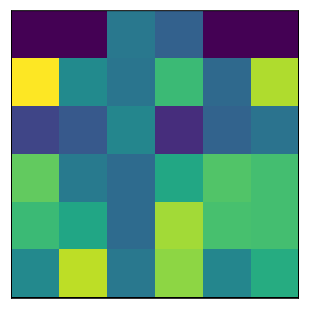

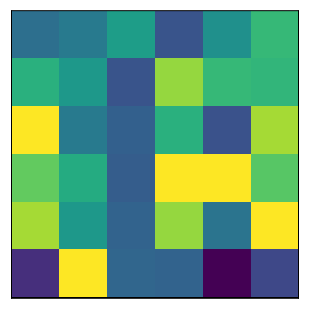

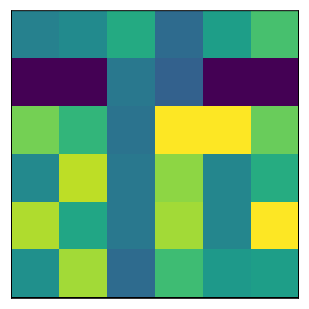

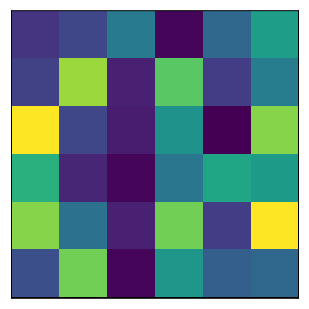

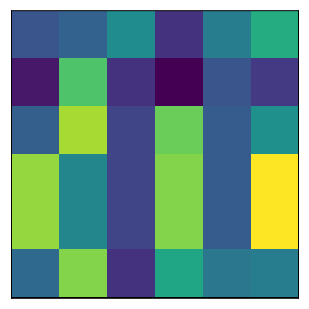

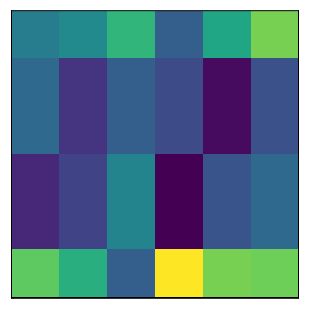

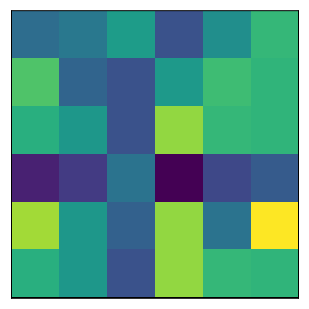

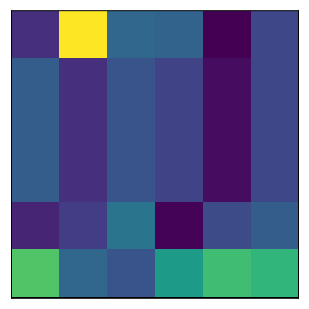

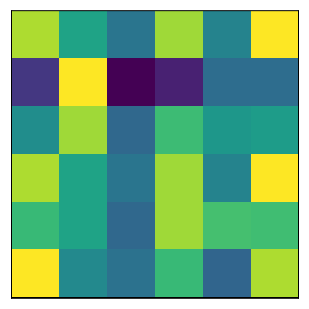

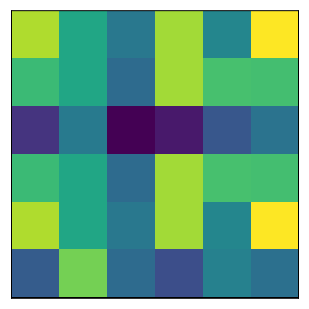

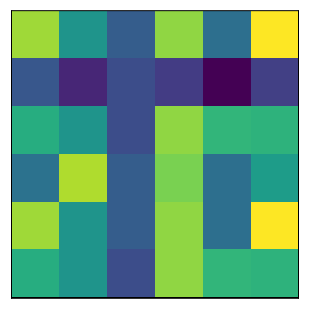

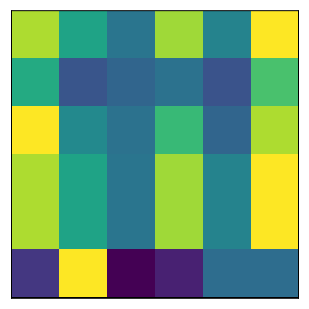

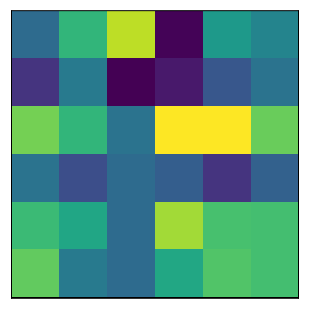

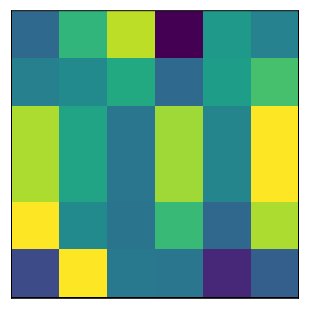

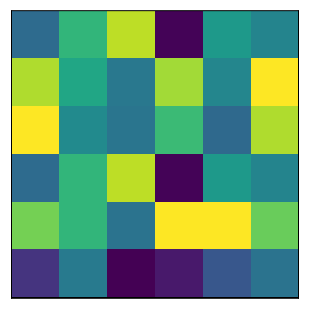

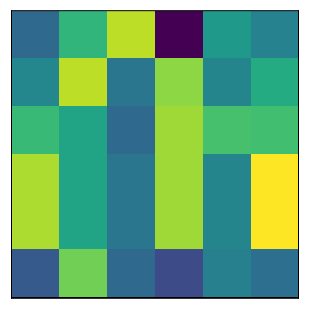

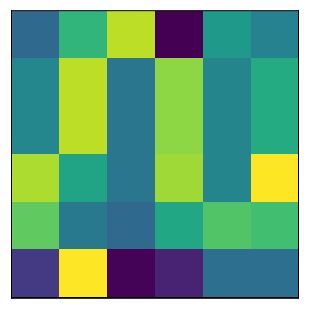

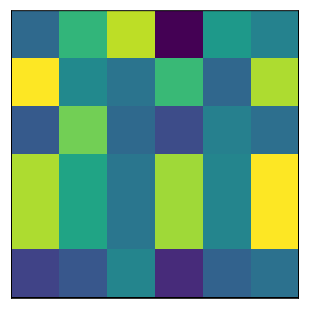

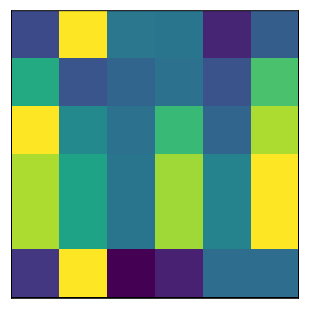

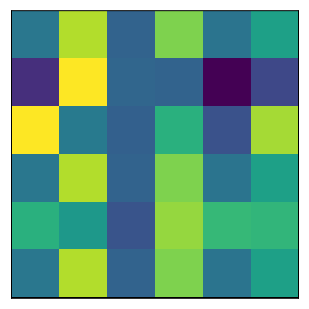

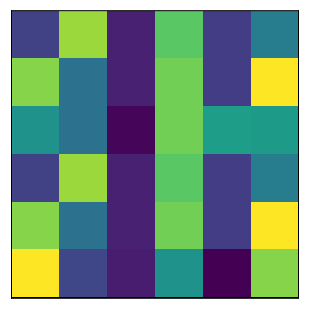

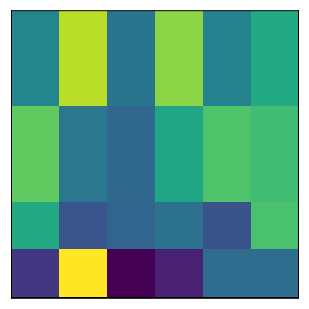

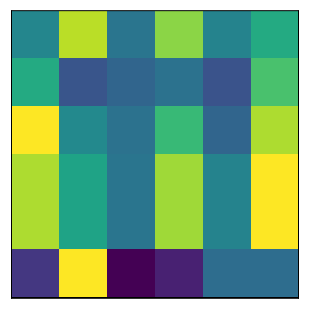

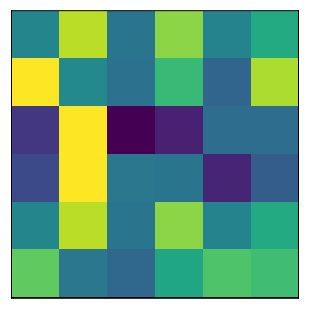

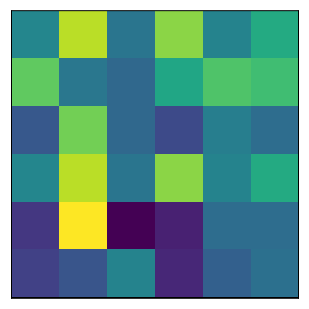

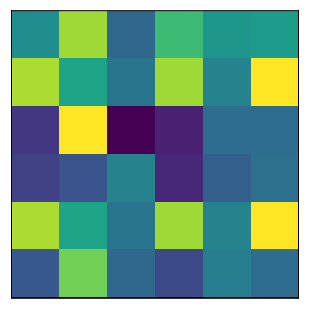

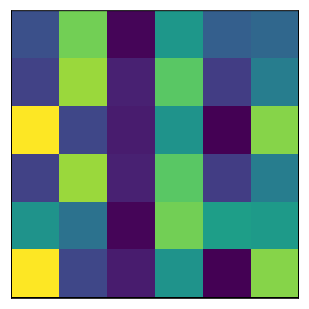

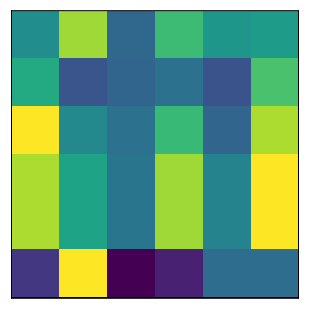

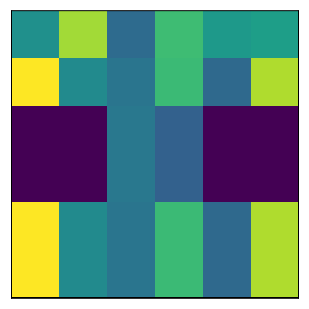

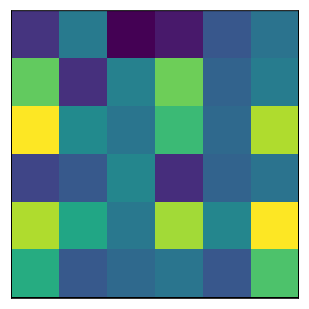

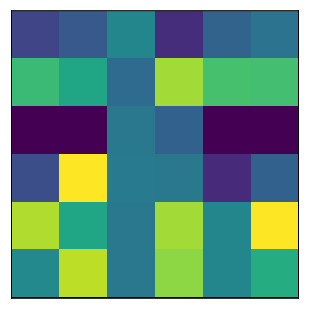

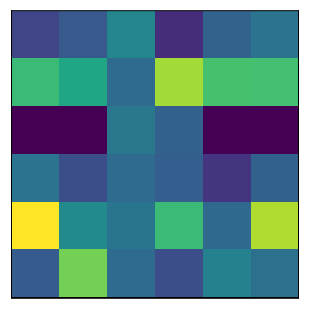

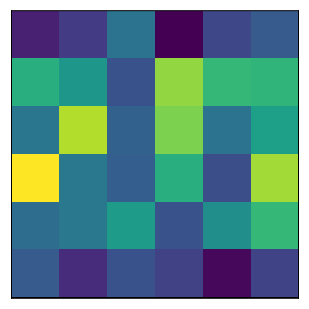

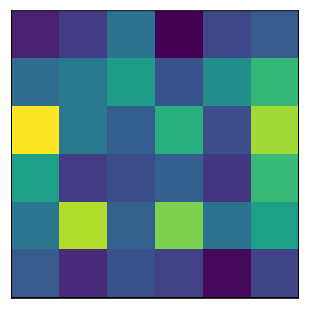

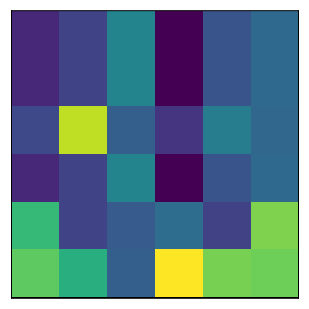

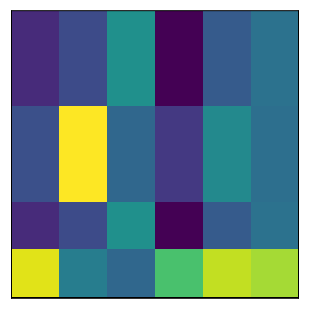

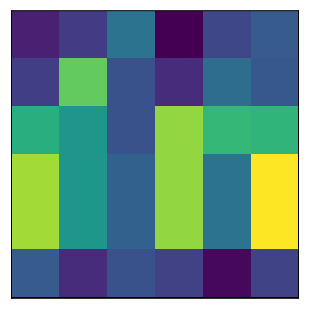

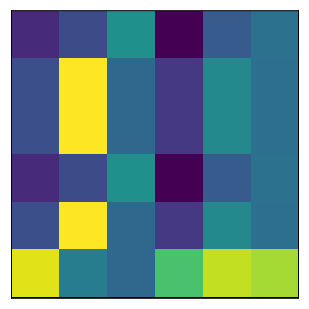

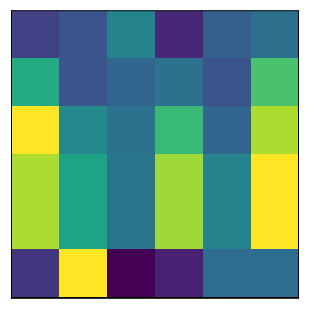

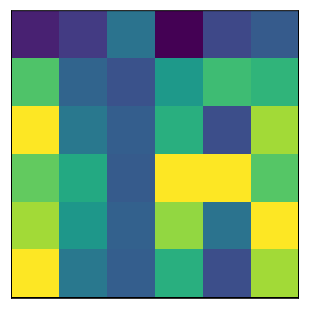

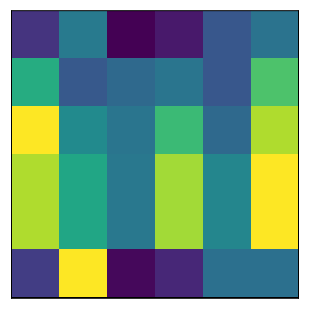

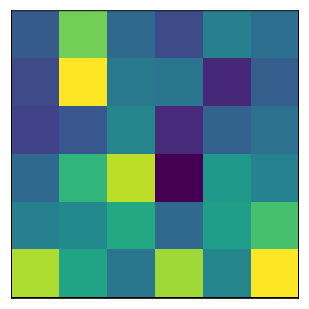

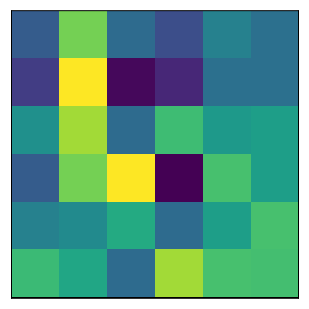

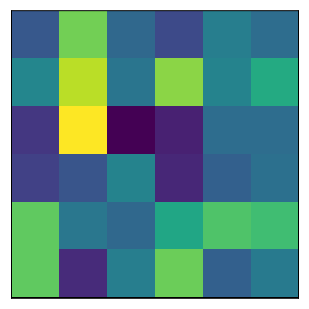

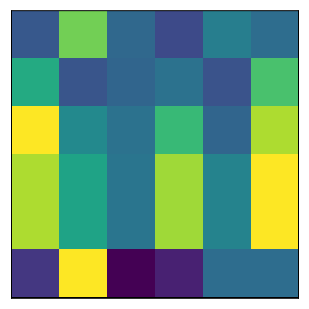

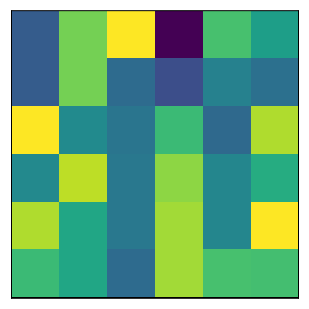

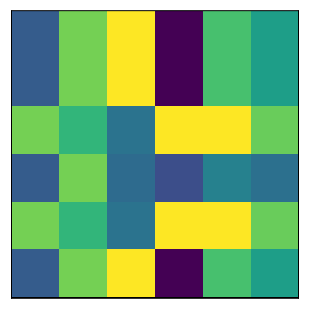

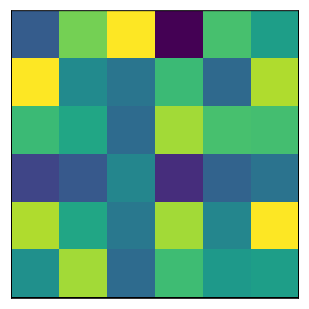

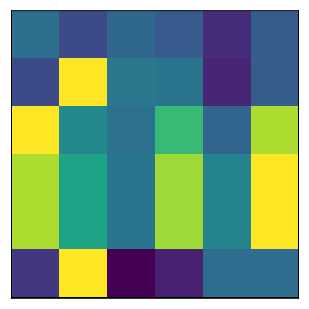

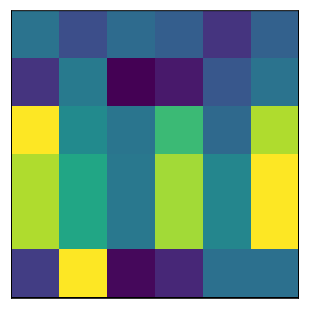

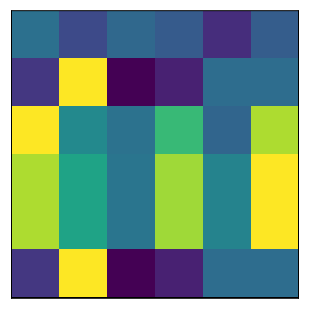

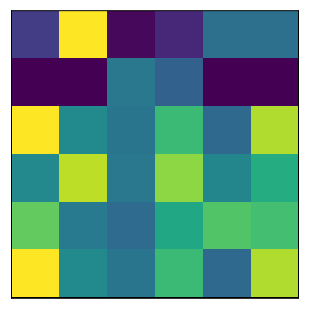

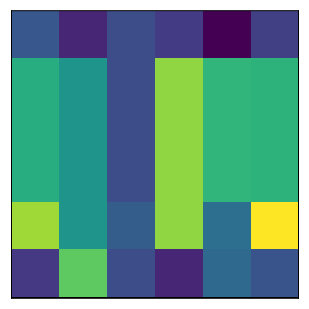

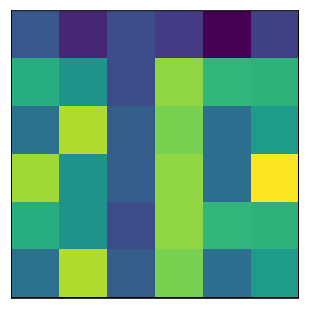

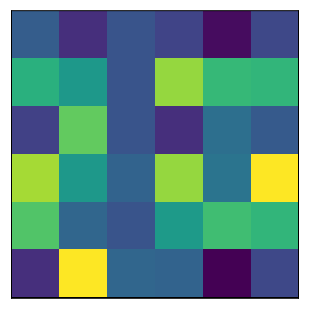

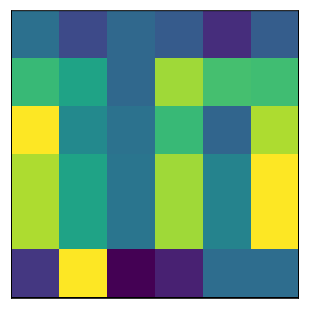

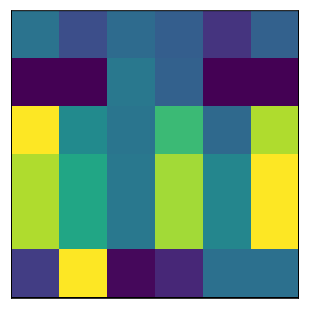

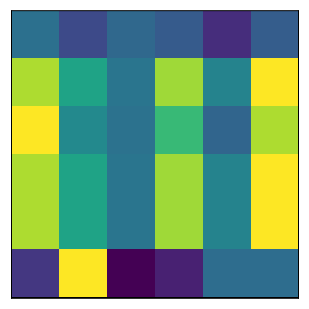

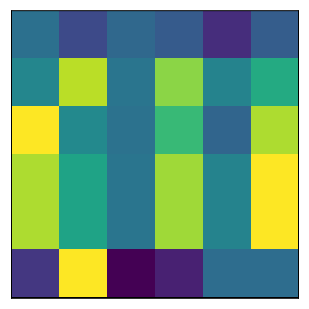

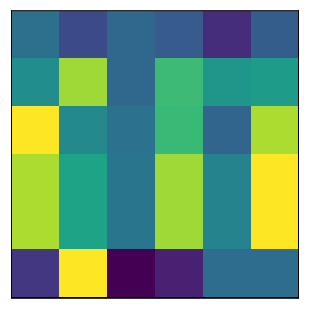

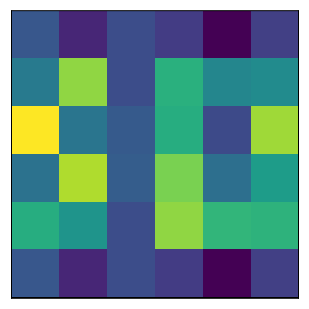

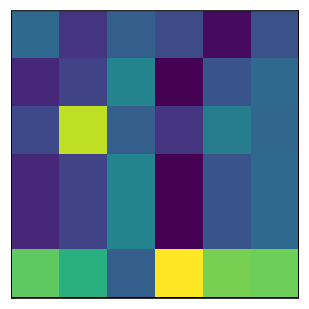

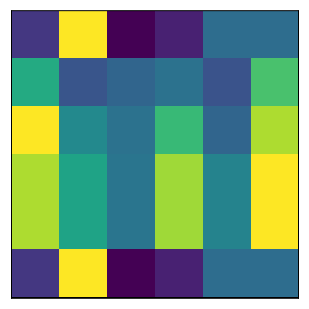

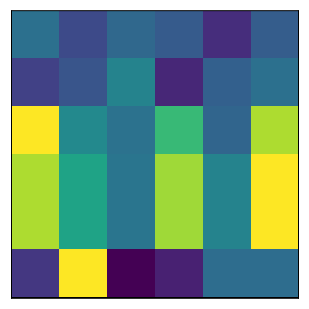

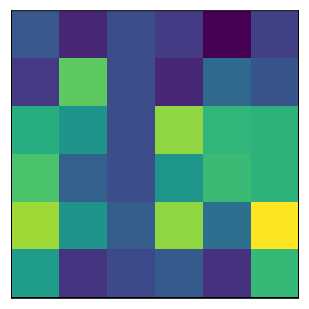

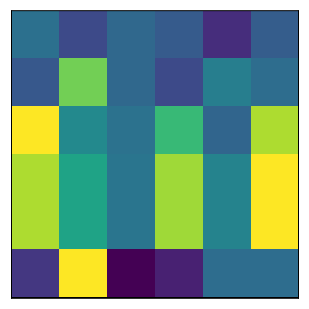

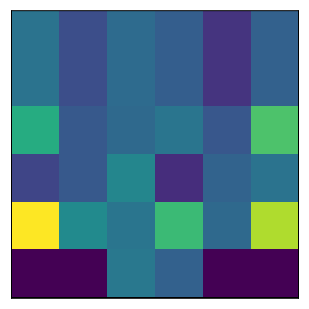

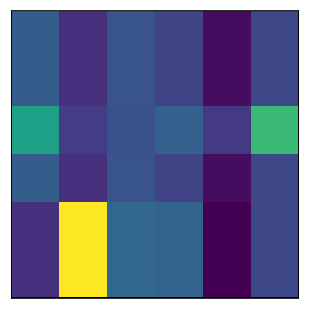

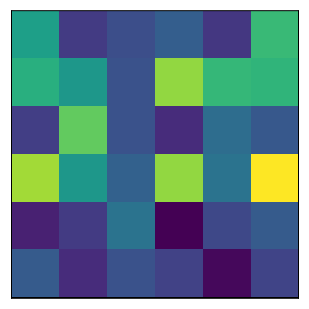

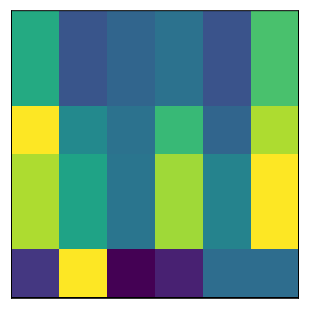

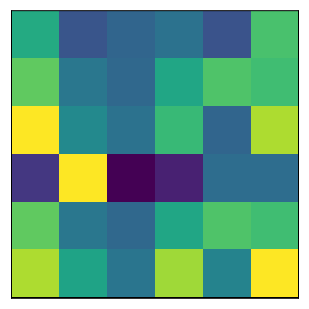

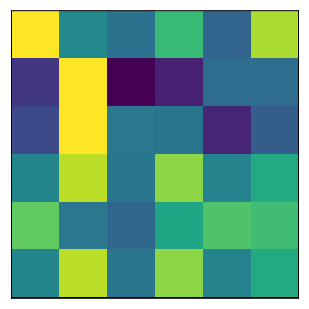

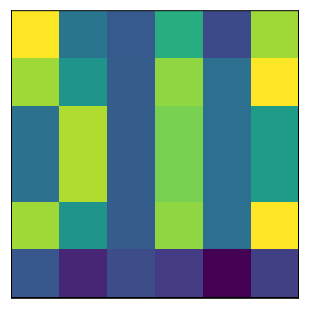

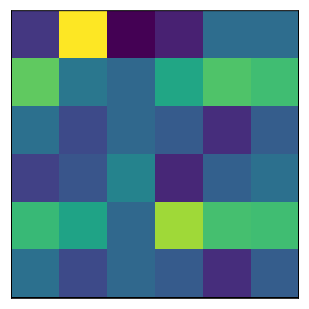

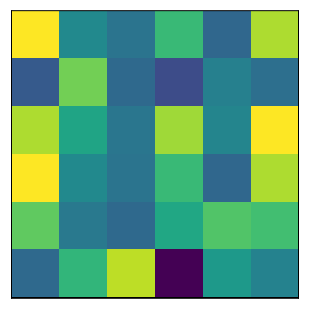

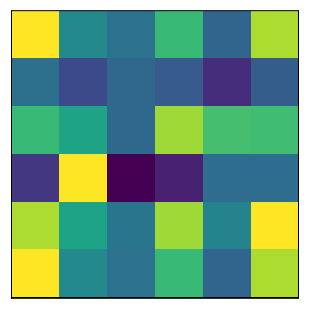

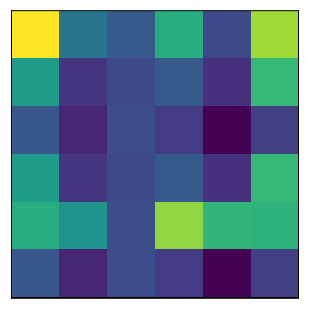

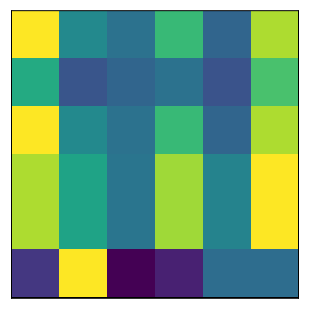

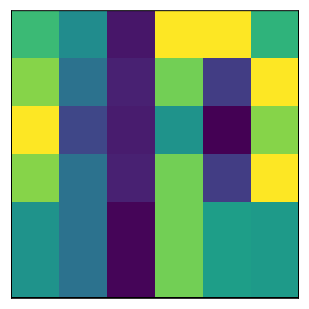

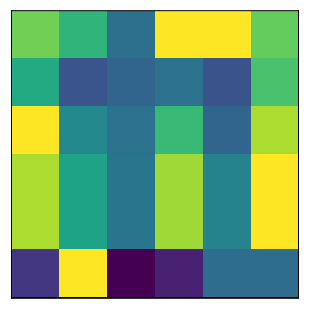

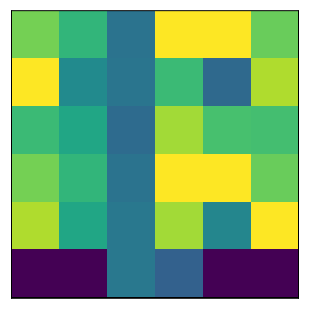

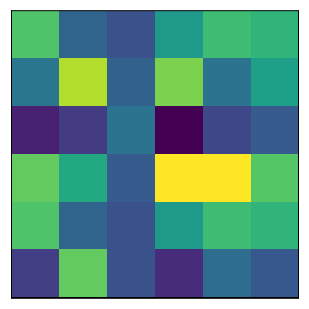

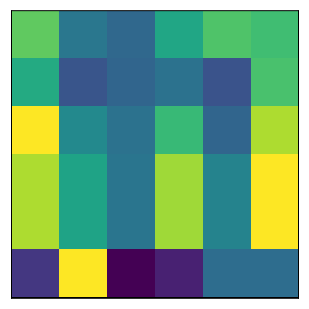

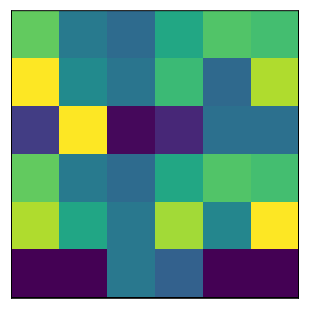

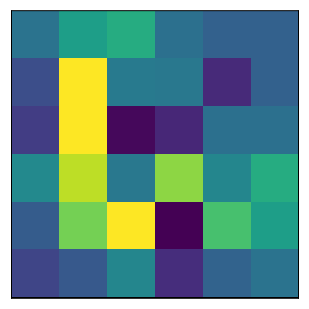

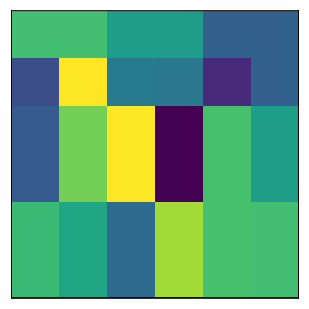

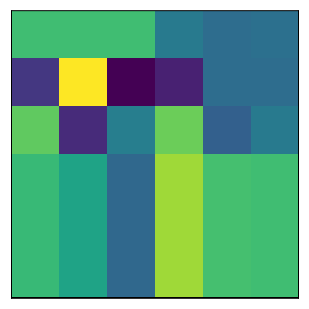

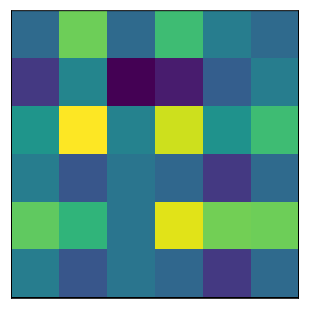

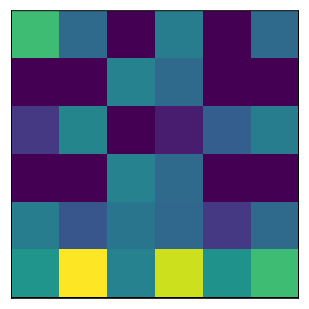

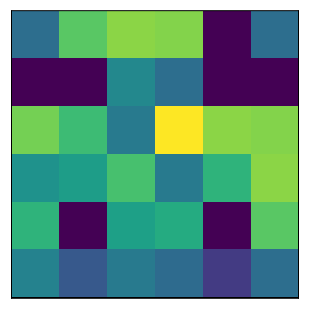

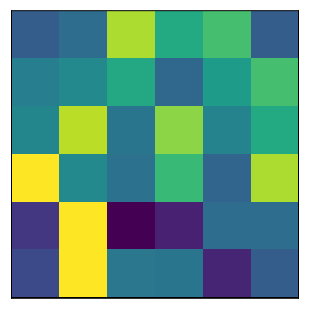

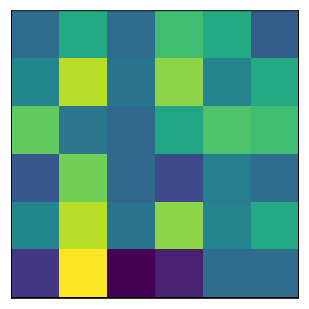

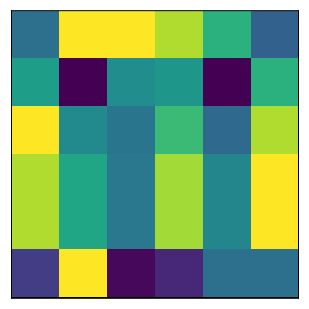

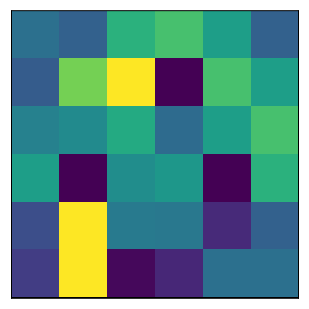

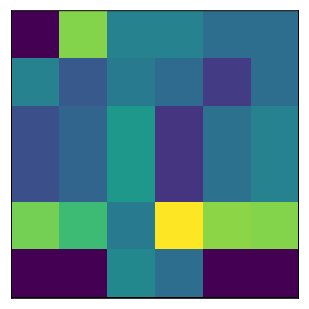

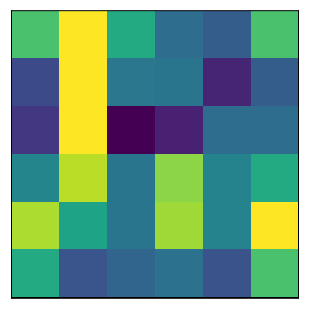

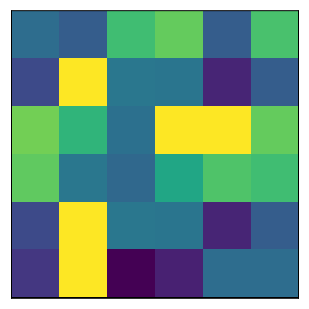

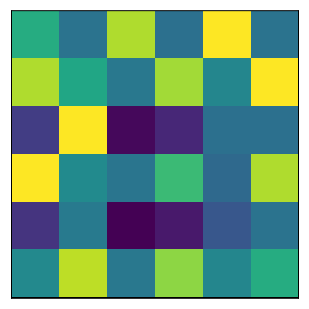

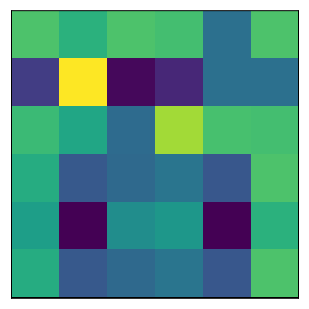

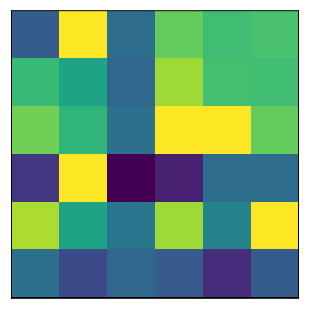

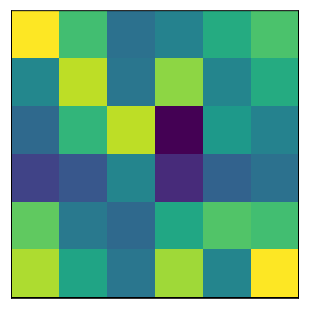

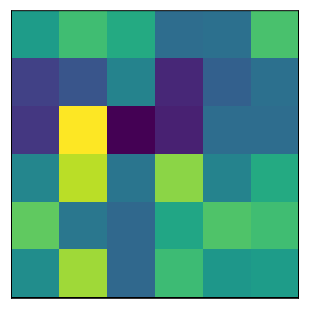

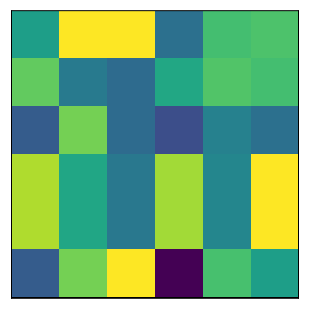

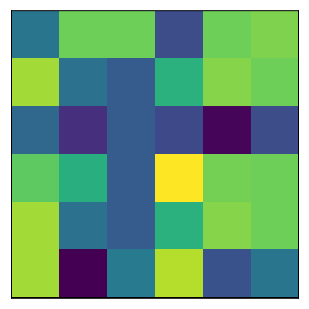

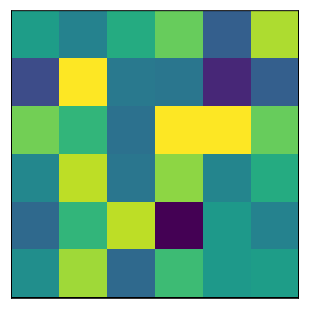

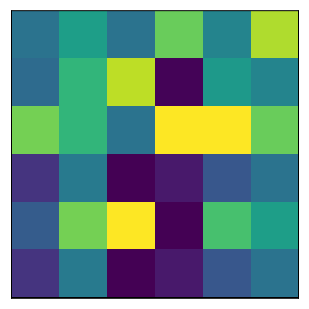

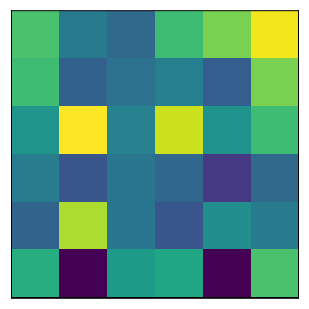

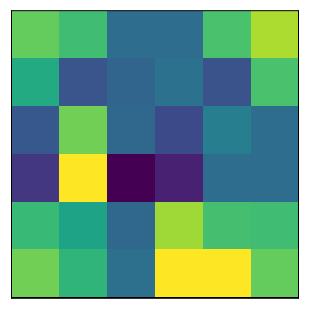

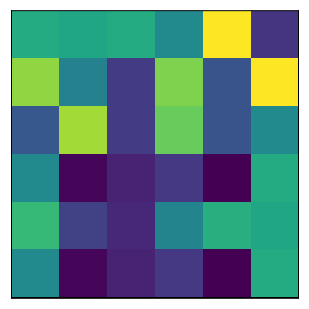

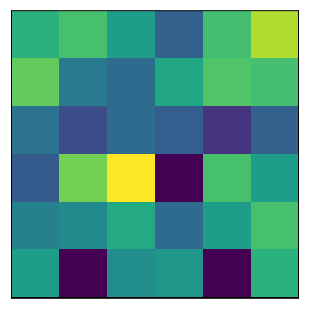

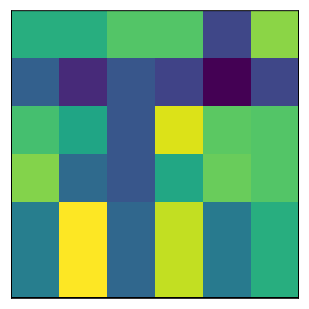

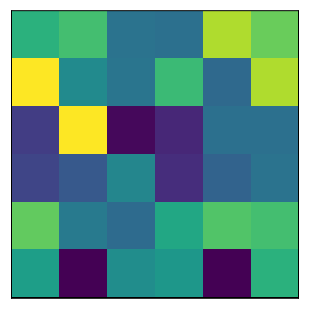

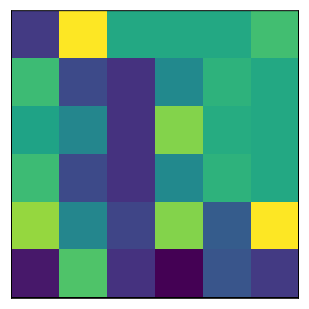

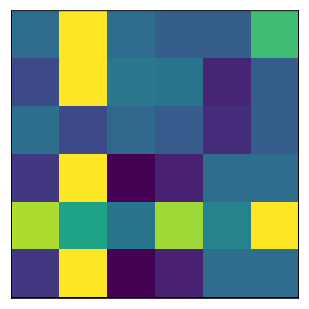

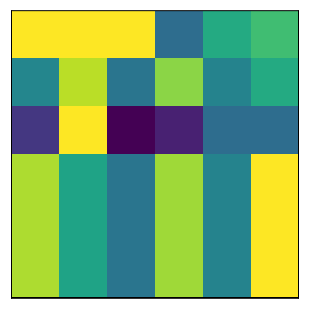

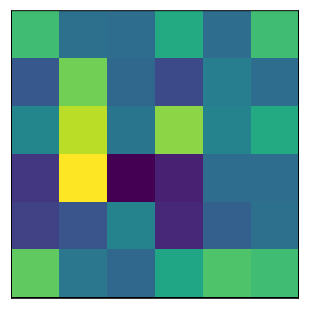

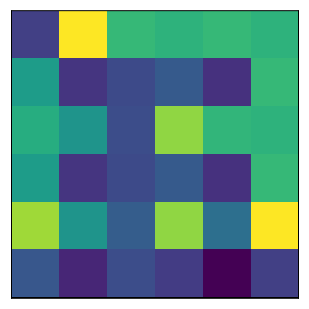

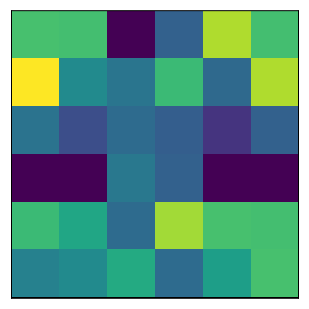

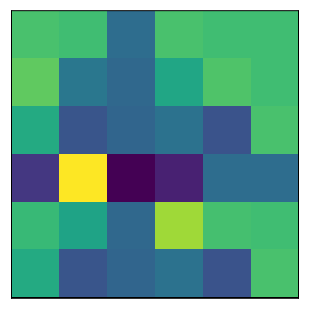

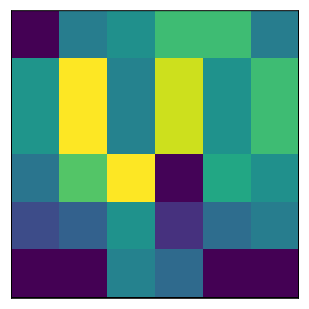

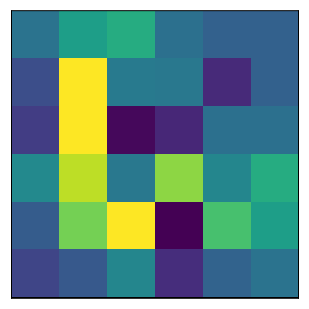

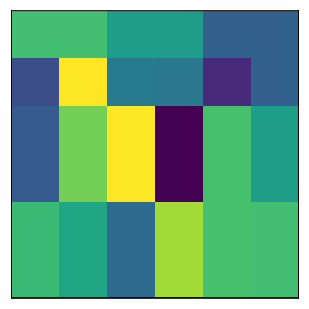

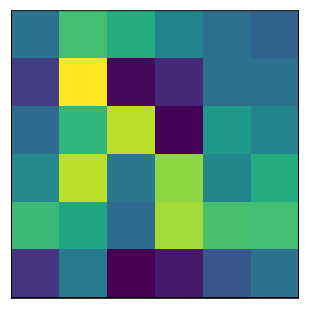

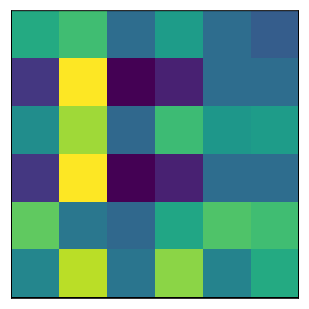

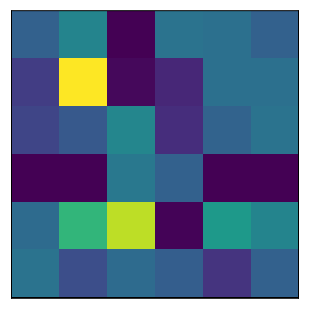

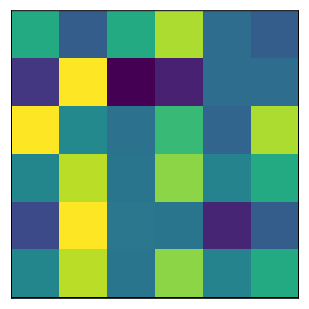

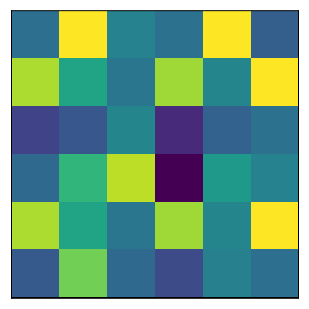

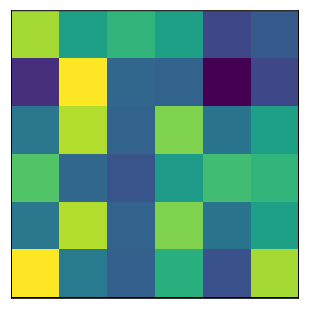

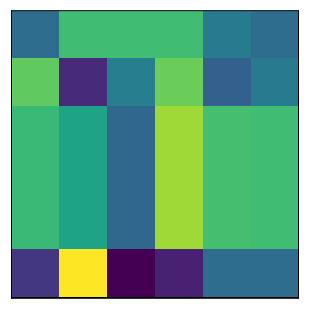

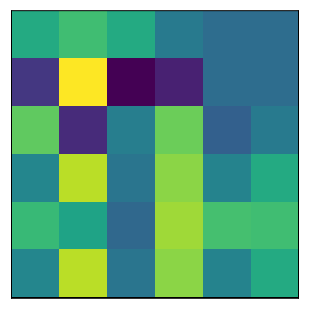

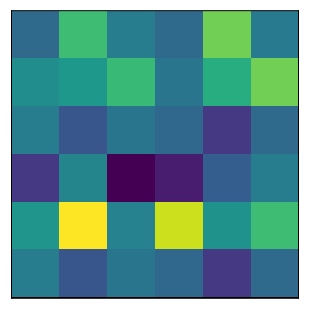

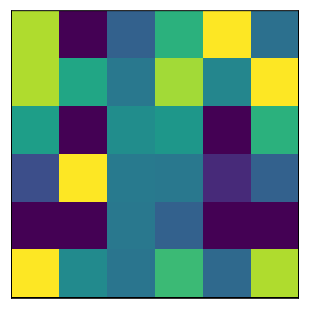

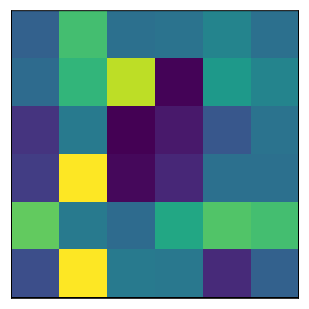

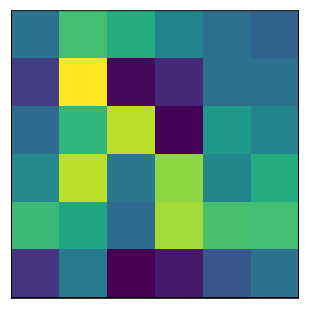

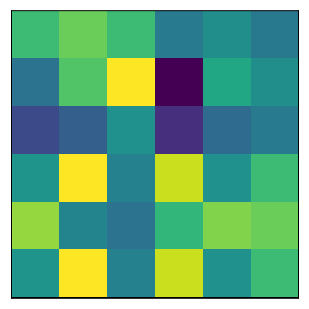

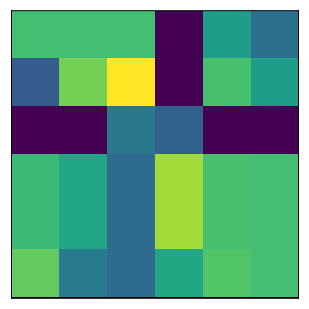

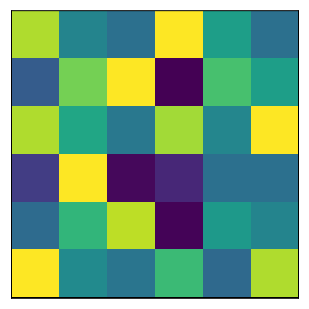

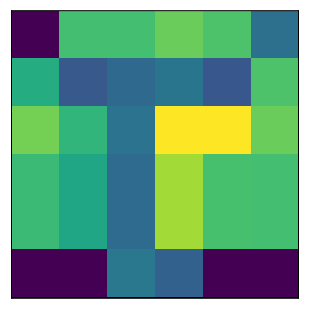

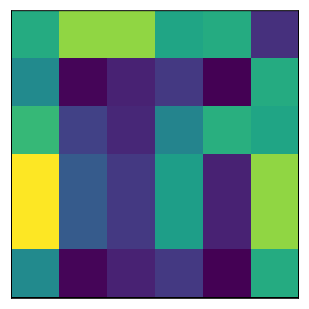

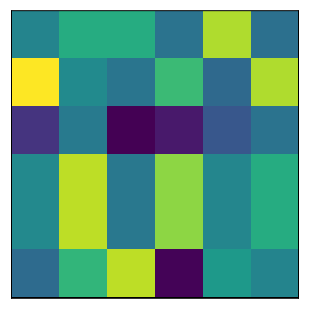

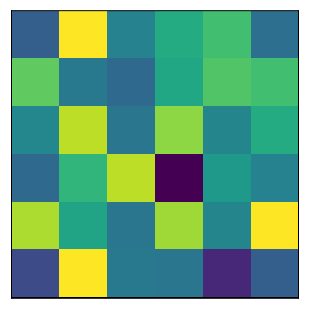

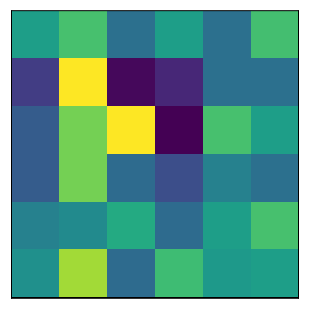

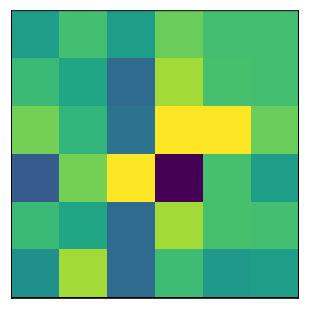

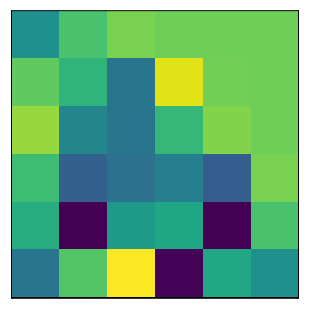

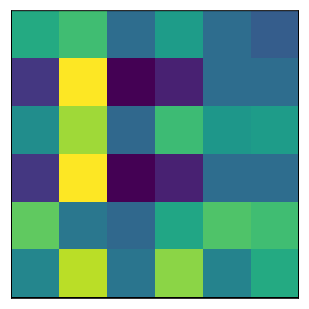

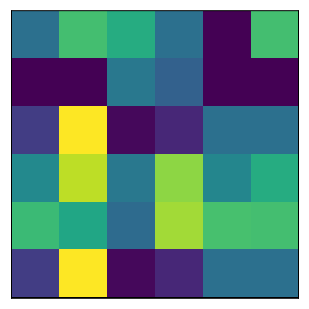

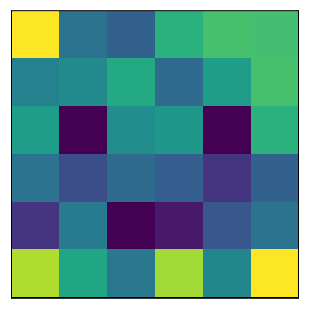

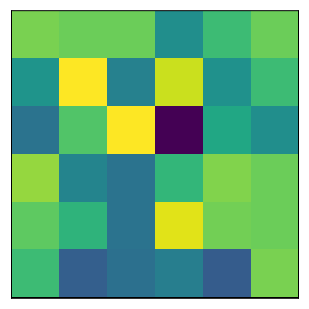

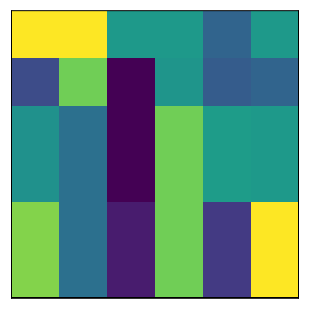

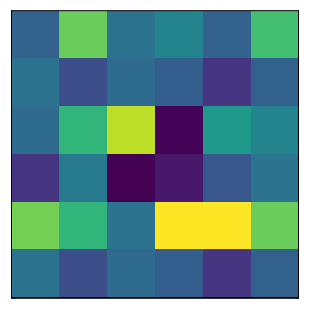

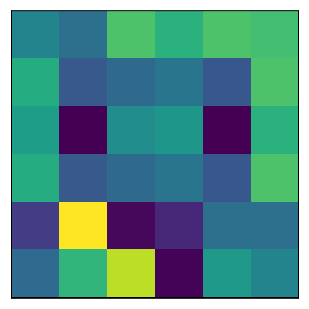

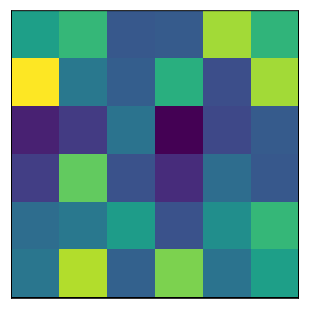

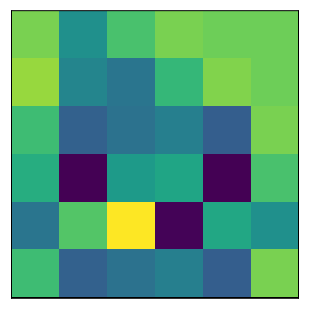

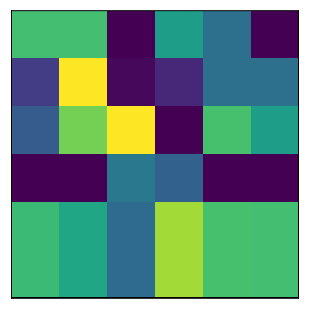

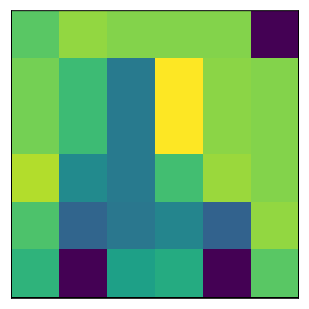

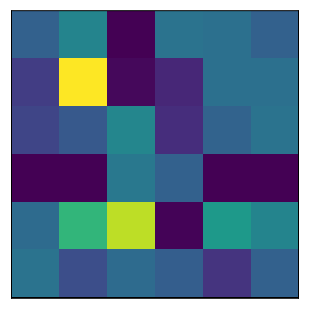

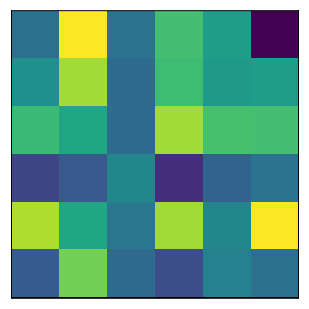

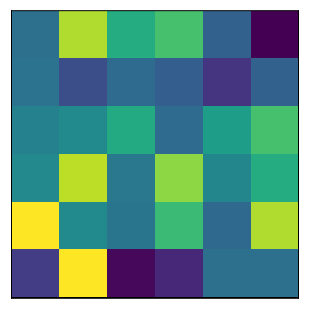

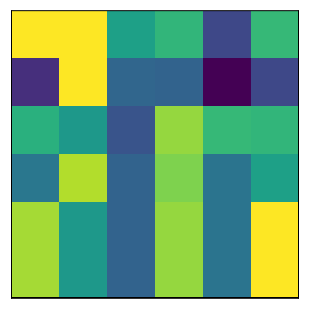

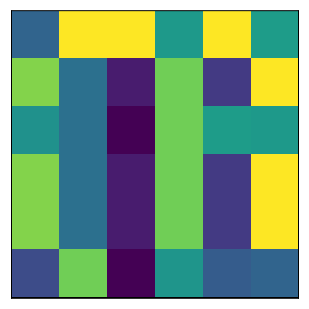

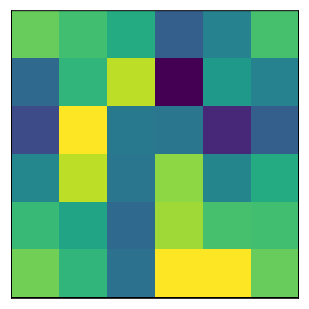

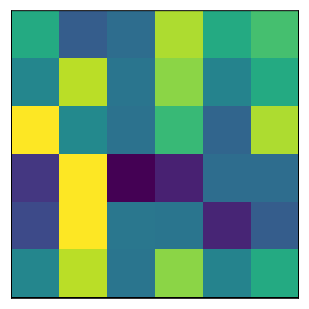

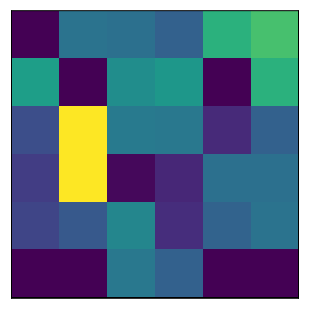

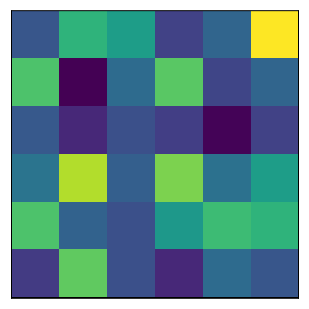

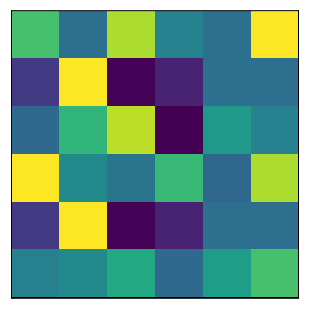

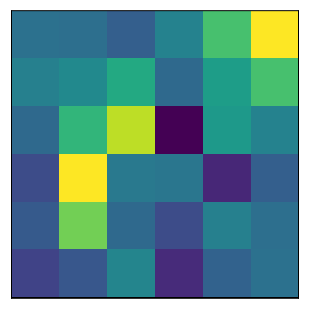

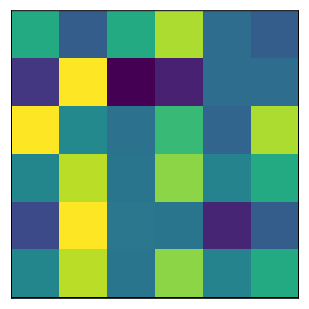

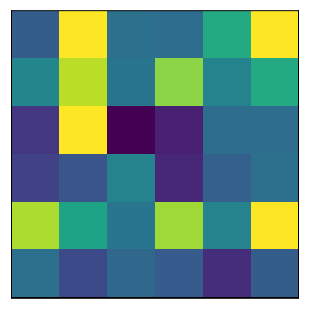

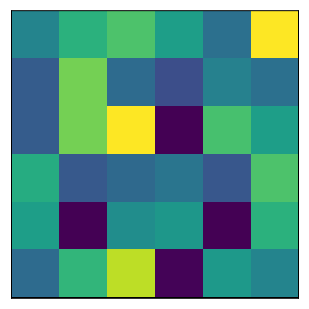

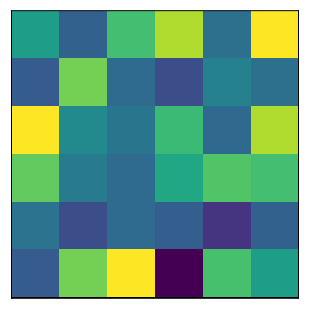

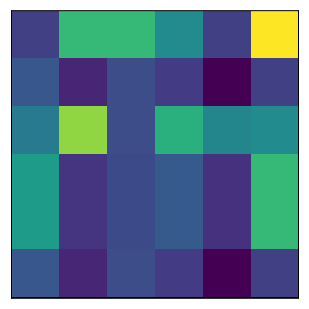

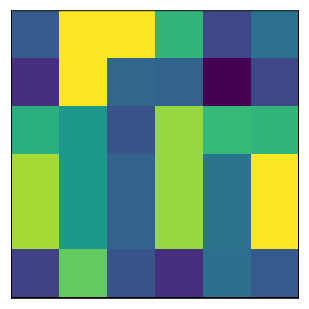

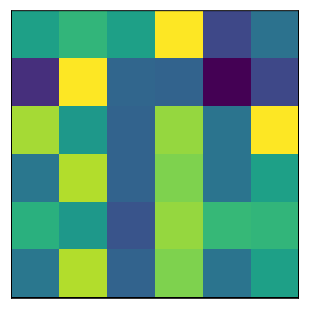

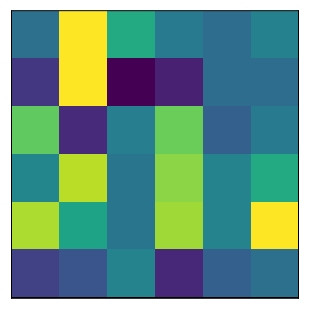

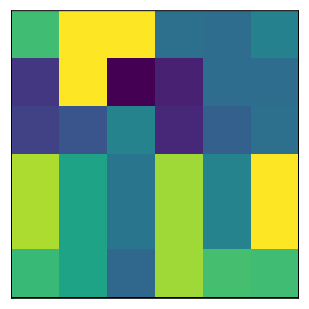

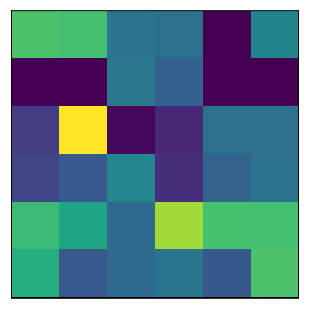

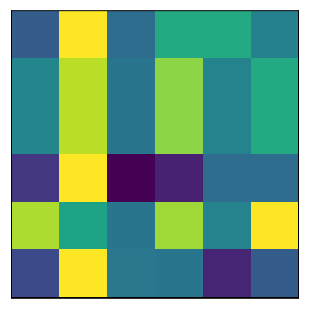

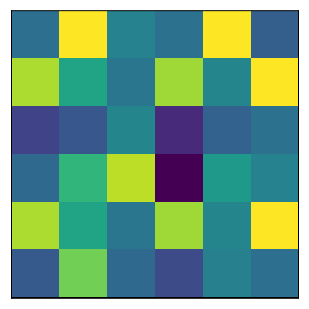

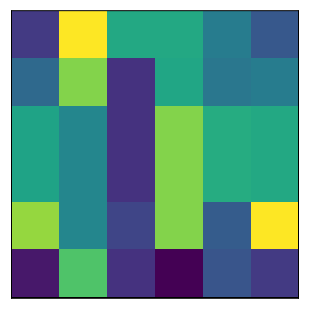

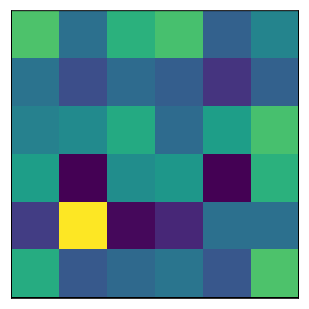

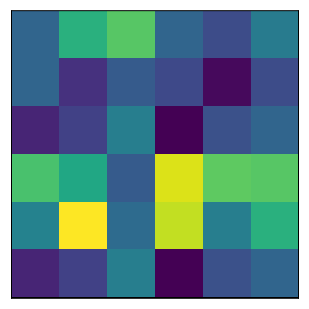

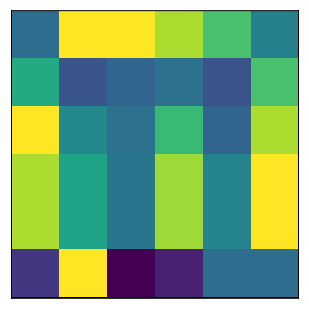

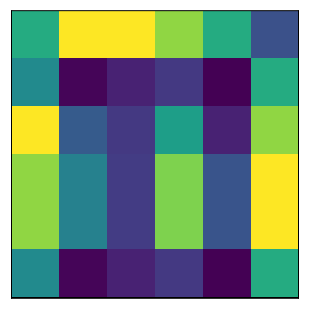

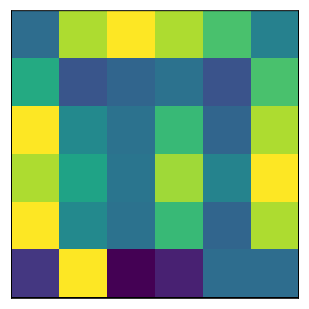

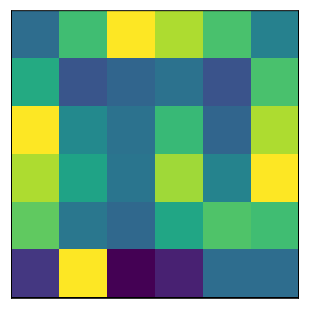

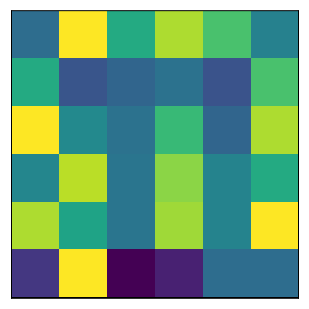

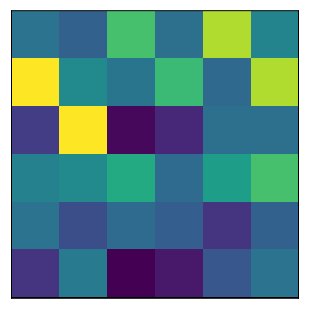

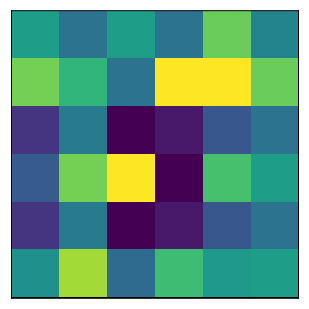

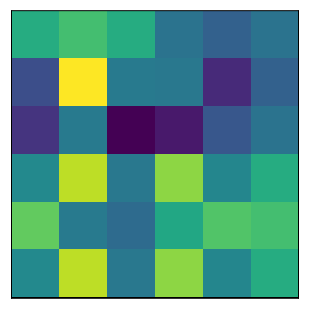

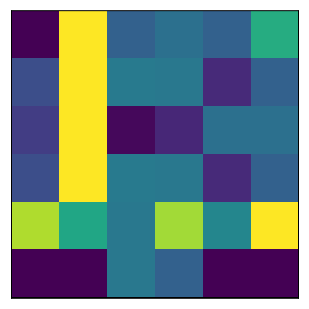

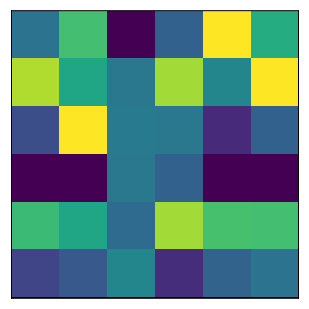

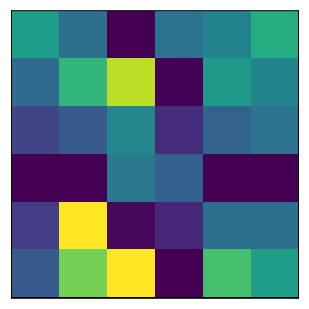

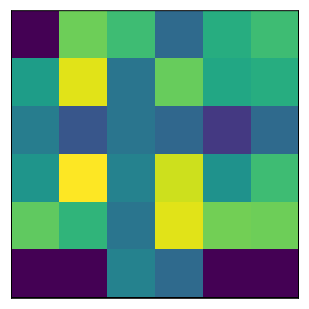

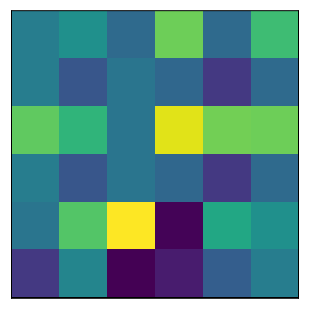

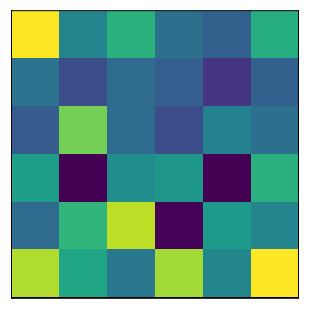

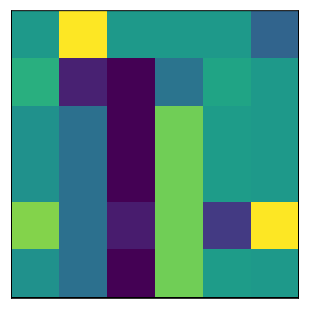

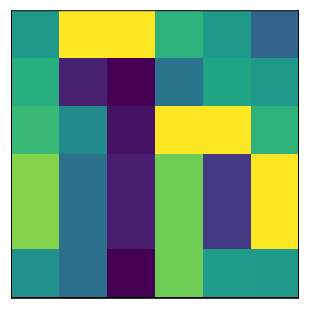

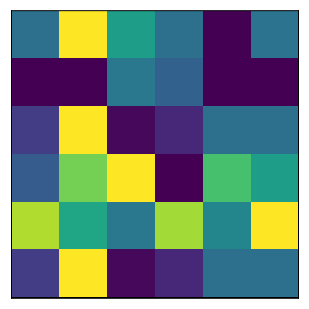

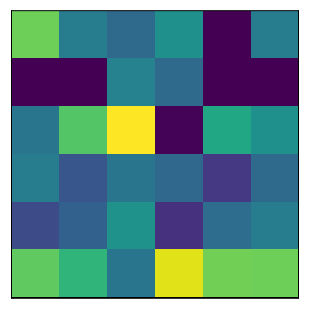

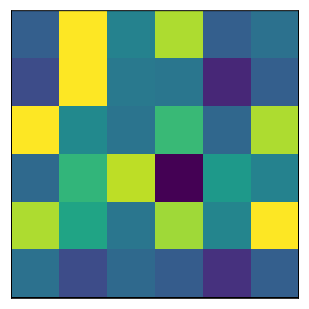

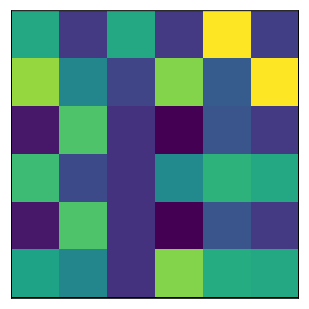

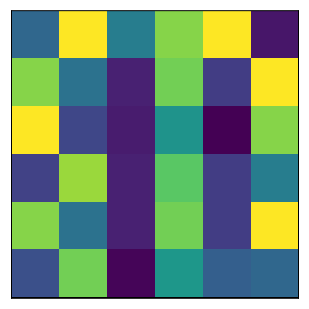

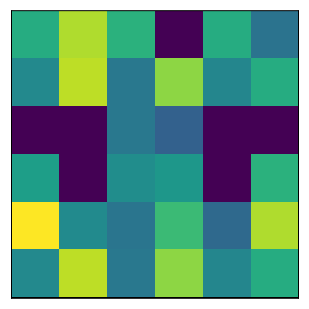

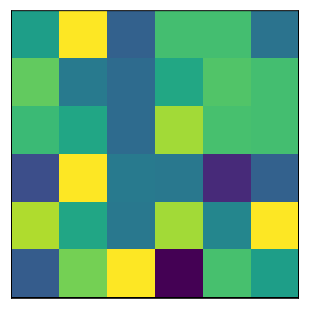

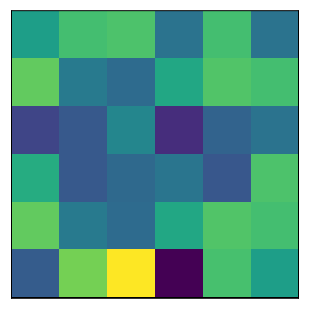

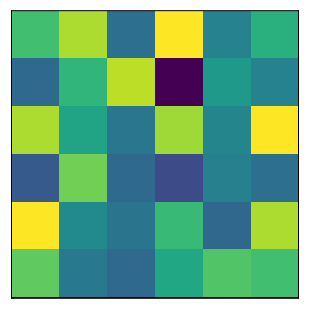

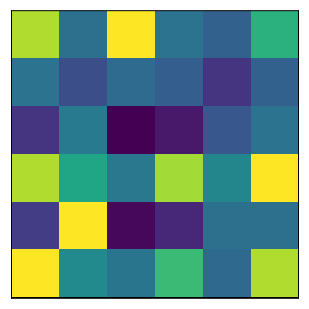

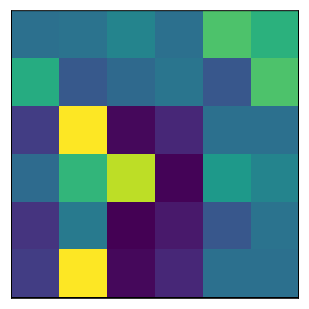

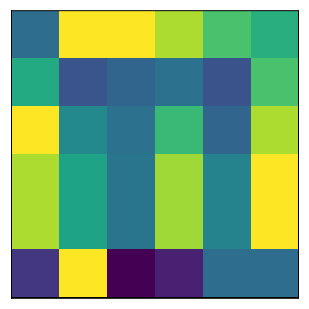

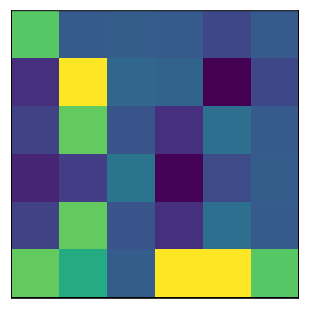

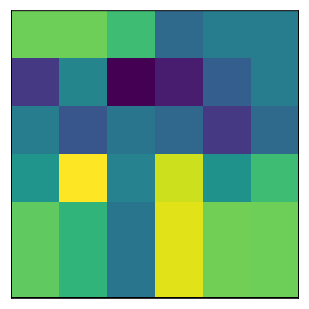

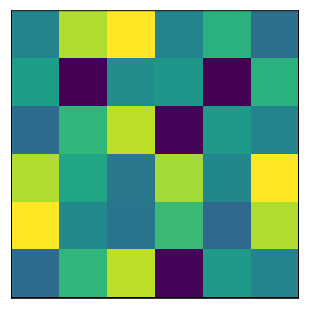

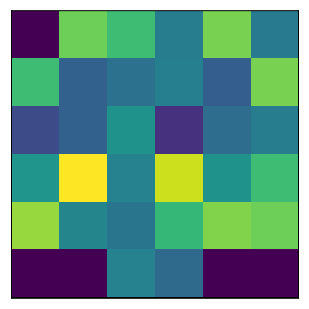

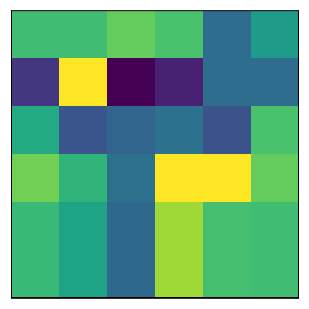

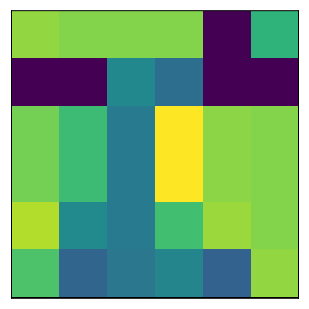

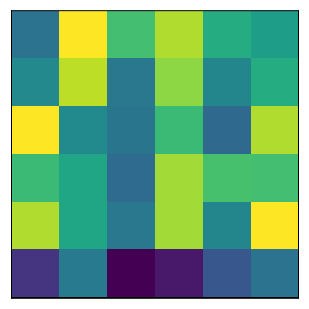

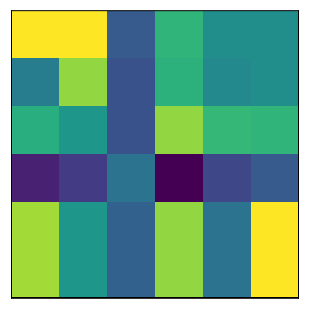

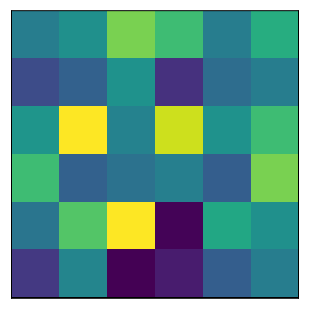

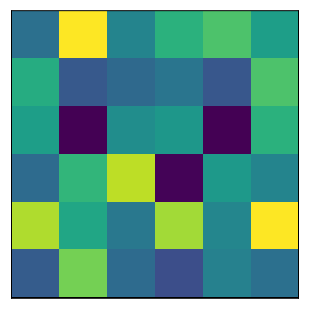

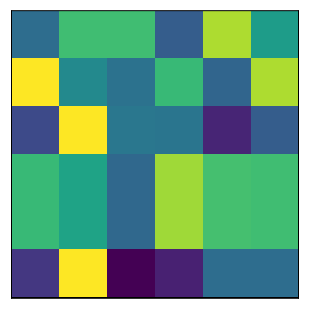

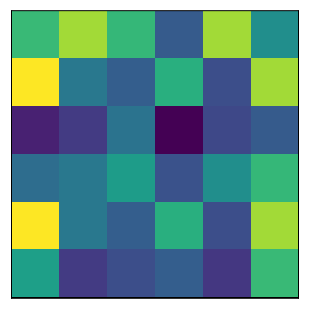

In [19]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/Jupyter/Github/Image/Whole/*.png'
df_list=[]
book_dict = {}


for i in glob.glob(dir):
    file_name = os.path.basename(i) 
    basename,_=os.path.splitext(file_name) 
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.flip(img, 1)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") 
    ax.tick_params(labelleft="off",left="off") 
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)

    plt.savefig(f"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip/flipLR_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)